## 0. Importing packages

In [2]:
# Pandas
import pandas as pd

# Numpy
import numpy as np 

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# Beautiful Soup
from bs4 import BeautifulSoup

# Regex
import re

# Requests
import requests
import os
import tqdm
import time
from newspaper import Article

# Yahoo finance and business days calender
import yfinance as yf
from pandas.tseries.offsets import BDay

# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools
import itertools as it

# Machine Learning
import statsmodels.api as sm
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.ticker as mtick
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve

# Wordcloud
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmagabriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Download and processing of the data for the EFT Procure Disaster Recovery Strategy (FIXT)

### 1.1 Downloading the data using the yfinance package

In [2]:
# Defining the stock symbol
stock_symbol = 'FIXT'

# Defining the date range for historical data
start_date = '2023-02-01'
end_date = '2023-07-31'

# Fecthing historical data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)['Adj Close']

# Converting the data into a pandas DataFrame
stock_df = pd.DataFrame(stock_data)

# Displaying the DataFrame
stock_df

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2023-02-01,26.914906
2023-02-02,27.286684
2023-02-03,26.959881
2023-02-06,26.646069
2023-02-07,26.822964
...,...
2023-07-24,29.215000
2023-07-25,29.264999
2023-07-26,29.299999


### 1.2 Processing the data

In [3]:
# Calculating the index values starting from index 100 and saving this into a Dataframe
stock_df['index FIXT'] = (stock_data / stock_data.iloc[0]) * 100

# Displaying the DataFrame
stock_df

,Adj Close,index FIXT
Date,,
2023-02-01,26.914906,100.000000
2023-02-02,27.286684,101.381311
2023-02-03,26.959881,100.167102
2023-02-06,26.646069,99.001160
2023-02-07,26.822964,99.658398
...,...,...
2023-07-24,29.215000,108.545802
2023-07-25,29.264999,108.731570
2023-07-26,29.299999,108.861609


In [4]:
# Calculating daily returns
stock_df['Daily_Return'] = stock_df['Adj Close'].pct_change()

# Creating a new column with binary values (1 for positive return, 0 for negative or zero return)
stock_df['Binary_Return'] = (stock_df['Daily_Return'] > 0).astype(int)

# Displaying the DataFrame with the new column
stock_df

,Adj Close,index FIXT,Daily_Return,Binary_Return
Date,,,,
2023-02-01,26.914906,100.000000,NaN,0
2023-02-02,27.286684,101.381311,0.013813,1
2023-02-03,26.959881,100.167102,-0.011977,0
2023-02-06,26.646069,99.001160,-0.011640,0
2023-02-07,26.822964,99.658398,0.006639,1
...,...,...,...,...
2023-07-24,29.215000,108.545802,-0.000103,0
2023-07-25,29.264999,108.731570,0.001711,1
2023-07-26,29.299999,108.861609,0.001196,1


### 1.3 Plotting the performance of the portfolio

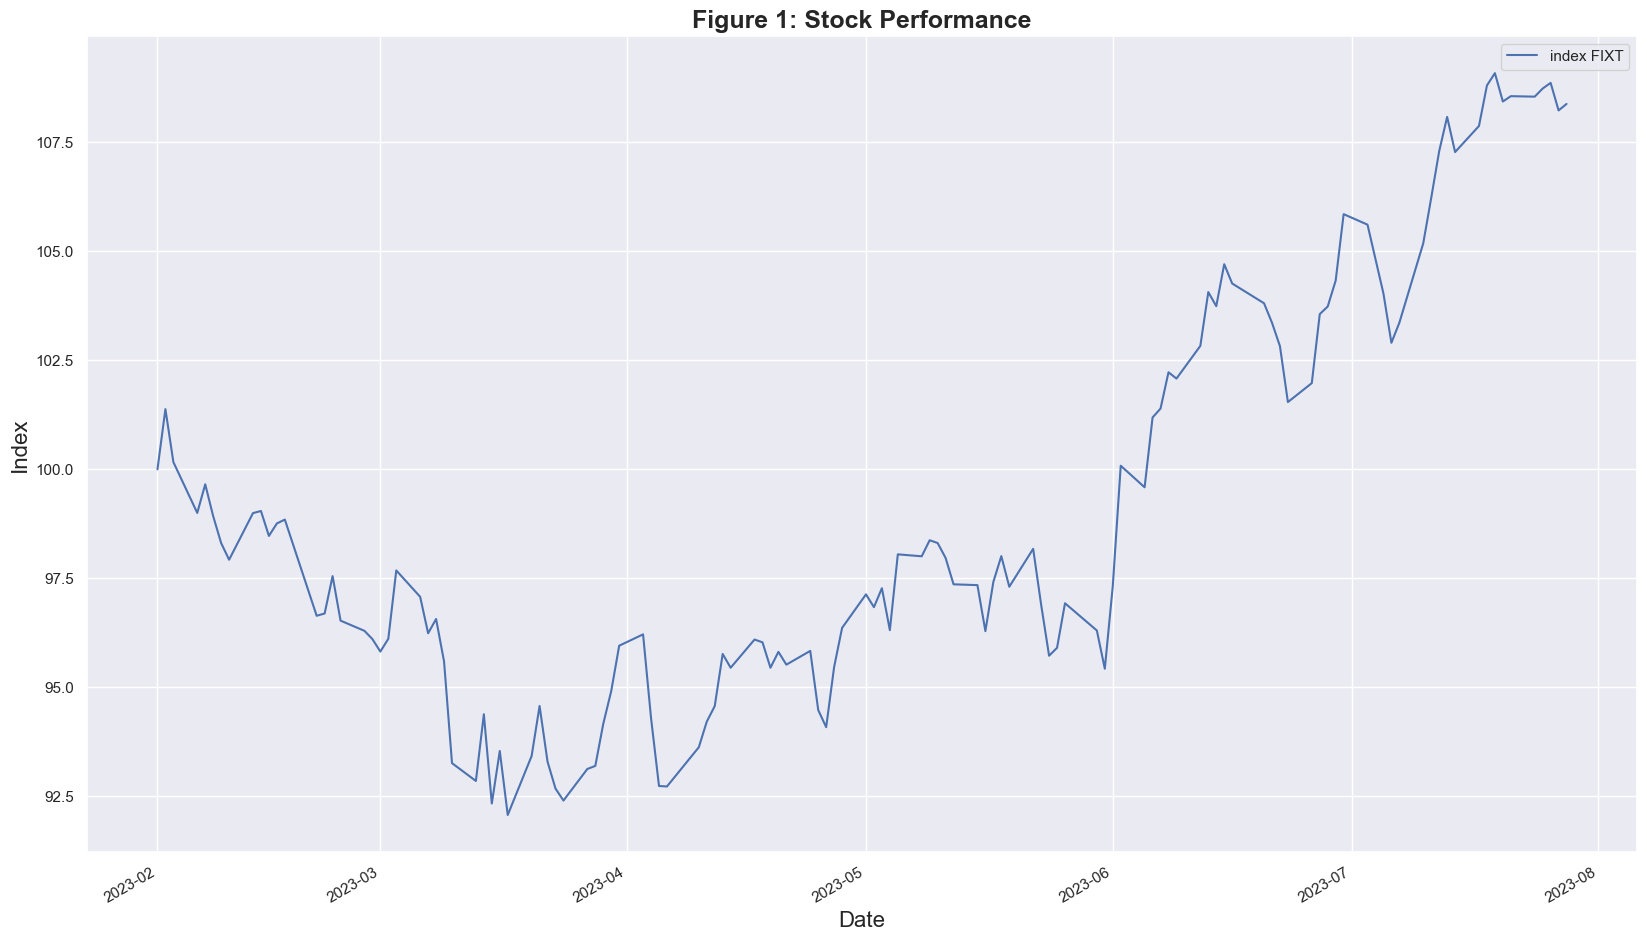

In [5]:
# Creating the plot
ax = stock_df.plot(y=['index FIXT'], figsize=(20, 12))
ax.set_title('Figure 1: Stock Performance', fontsize=18, fontweight='bold')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Index', fontsize=16)

# Displaying the plot
plt.show()

# Saving the plot (if needed)
#plt.savefig("1_stock_perfomance.png", bbox_inches='tight')

## 2. SCRAPING NEWS ARTICLES

In [6]:
# Defining the newspapers by URL
usatoday = 'eu.usatoday.com/'
nytimes ='www.nytimes.com'
wsj = 'www.wsj.com/'
torontostar = 'www.thestar.com'
globeandmail = 'www.theglobeandmail.com'
torontosun = 'www.torontosun.com/'

# Defining the date range
feb23_start=20230201
feb23_end=20230229

mar23_start=20230301
mar23_end=20230332

apr23_start=20230401
apr23_end=20230431

may23_start=20230501
may23_end=20230532

jun23_start=20230601
jun23_end=20230631

jul23_start=20230701
jul23_end=20230732

# Loops
news=[usatoday, nytimes, wsj, torontostar, globeandmail, torontosun]
links = []

for date in it.chain(range(feb23_start,feb23_end,1), range(mar23_start,mar23_end,1), range(apr23_start,apr23_end,1), range(may23_start,may23_end,1), range(jun23_start,jun23_end,1), range(jul23_start,jul23_end,1)):
    for i in news:
        url = f'https://web.archive.org/web/{date}000258/https://{i}'
        links.append([date, url])

# Displaying URL's
links

[[20230201,
  'https://web.archive.org/web/20230201000258/https://eu.usatoday.com/'],
 [20230201,
  'https://web.archive.org/web/20230201000258/https://www.nytimes.com'],
 [20230201, 'https://web.archive.org/web/20230201000258/https://www.wsj.com/'],
 [20230201,
  'https://web.archive.org/web/20230201000258/https://www.thestar.com'],
 [20230201,
  'https://web.archive.org/web/20230201000258/https://www.theglobeandmail.com'],
 [20230201,
  'https://web.archive.org/web/20230201000258/https://www.torontosun.com/'],
 [20230202,
  'https://web.archive.org/web/20230202000258/https://eu.usatoday.com/'],
 [20230202,
  'https://web.archive.org/web/20230202000258/https://www.nytimes.com'],
 [20230202, 'https://web.archive.org/web/20230202000258/https://www.wsj.com/'],
 [20230202,
  'https://web.archive.org/web/20230202000258/https://www.thestar.com'],
 [20230202,
  'https://web.archive.org/web/20230202000258/https://www.theglobeandmail.com'],
 [20230202,
  'https://web.archive.org/web/2023020200

### 2. 1 Requesting and parsing links/html

In [7]:
# Finding the all articles and the underlying hrefs. 
articles = []
articles_total = []
for i in tqdm.tqdm(links):
    try:
        request = requests.get(i[1], headers={'student':'Students at UCPH','email':'bdg742@alumni.ku.dk'})
        coverpage = request.content

        soup = BeautifulSoup(coverpage, 'html.parser')
        coverpage_news = soup.find_all('a')
        time.sleep(0.5)
        links_list = [i['href'] for i in coverpage_news]
        for j in links_list:
            articles_total.append([j])
        for j in links_list:
            if j.__contains__('wildfire') or j.__contains__('smoke') or j.__contains__('air pollution') or j.__contains__('fire') or j.__contains__('air-quality alert'):
                articles.append([j])
    except:
        pass

100%|█████████████████████████████████████| 1086/1086 [5:23:32<00:00, 17.88s/it]


### 2.2 Saving the data as a list

In [14]:
# Saving the list of articles and converting to a csv file
# Articles selected on keywords
news_df=pd.DataFrame(articles)
news_df.to_csv('news_df.csv')

# All articles
news_total_df=pd.DataFrame(articles_total)
news_total_df.to_csv('news_total_df.csv')

In [15]:
# Loading csv file
text = pd.read_csv('news_df.csv')
text.rename(columns={'0':'link'}, inplace=True ) # Renaming the column
artic = text['link'].tolist() # Converting to a list
articles= [[x] for x in artic] # Converting each value in the artic list into a list of its own

# Loading csv file
news_total = pd.read_csv('news_total_df.csv')

# Displaying the data
articles

[['/web/20230201001137/https://eu.usatoday.com/story/sports/highschool/2023/01/31/virginia-high-school-jv-girls-basketball-coach-fired-impersonating-player/11153033002/'],
 ['/web/20230201001137/https://eu.usatoday.com/videos/news/have-you-seen/2023/01/30/good-samaritan-cop-rescue-unconscious-driver-before-car-catches-fire/11150851002/'],
 ['/web/20230204013736/https://eu.usatoday.com/story/news/nation/2023/02/03/memphis-police-department-fires-sixth-officer-in-death-of-tyre-nichols/11181593002/'],
 ['/web/20230204000931/http://www.theglobeandmail.com/politics/article-bill-c21-gun-law-amendment-assault-firearms/'],
 ['/web/20230204000931/http://www.theglobeandmail.com/real-estate/article-the-bonfire-of-the-speculators-what-caused-an-abrupt-down-shifting-in/'],
 ['/web/20230204000931/http://www.theglobeandmail.com/politics/article-bill-c21-gun-law-amendment-assault-firearms/'],
 ['/web/20230204000931/http://www.theglobeandmail.com/real-estate/article-the-bonfire-of-the-speculators-what-

In [16]:
# Merging the lists
urls=list(itertools.chain(*articles))

### 2.3 Processing broken URL's

In [17]:
for i in range(len(urls)):
    if urls[i][1:4] == 'web': # If the link starts with 'web' -->
        
        urls[i] = f'https://web.archive.org{urls[i]}' # --> the 'web' is placed in the end of the URL
    else:
        urls[i] = urls[i]

### 2.4 Extracting news articles from online news sources using the newspaper package

In [18]:
rows = []
for url in tqdm.tqdm(urls):
    try:
        a = Article(url,language='id')
        a.download()
        a.parse()
         
        author = a.authors
        date = a.publish_date
        text = a.text
        time.sleep(0.5)
        print(author, date, text)
        row = {'url':url,
               'author':author,
               'data':date,
               'text':text}
        
        rows.append(row)
    except Exception as e:
        print(e)
        row = {'url':url,
        'author':'N/A',
        'data':'N/A',
        'text':'N/A'}
        
        rows.append(row)
        
articles_df = pd.DataFrame(rows)

  0%|                                        | 1/1028 [00:07<2:08:37,  7.51s/it]

['Steve Gardner'] 2023-01-31 00:00:00 Assistant HS girls basketball coach relieved of duties for impersonating 13-year-old player

An assistant girls basketball coach in Virginia has been relieved of her duties after being accused of impersonating a 13-year-old JV basketball player on her team and participating in a game last week.

Arlisha Boykins, 22, suited up for Churchland High School in Portsmouth, Virginia, for a Jan. 21 game against Nansemond River, while the missing player was out of town for a club tournament, the girl's parents told WAVY-TV in Norfolk.

"Coaches always preach to the kids about integrity and those types of things, so I was just shocked," the girl's father said.

He also told the TV station his daughter is not planning to return to Churchland next school year, and the family is seeking a formal apology.

Arlisha Boykins, a 22-year-old former assistant coach on the Churchland JV girls basketball team, impersonated a 13-year-old player that played for the Trucke

  0%|                                        | 2/1028 [00:18<2:38:28,  9.27s/it]

[] 2023-01-30 00:00:00 Good Samaritan, cop rescue unconscious driver before car catches fire

A good Samaritan and a Las Vegas Metropolitan police officer rescued an unconscious driver seconds before the car catches fire.

Anthony Jackson, Associated Press


  0%|                                        | 3/1028 [00:22<1:59:09,  6.97s/it]

['Laura Testino'] 2023-02-03 00:00:00 6th Memphis police officer fired in beating, death of Tyre Nichols

Show Caption Hide Caption Tyre Nichols' funeral: Kamala Harris, Al Sharpton speak in Memphis Tyre Nichols was honored by his family along with Vice President Kamala Harris during a memorial service in Memphis, Tennessee. Anthony Jackson, Associated Press

A sixth Memphis Police Department officer was fired on Friday for his role in the brutal beating and death of Tyre Nichols, the 29-year-old Black man who died in January three days after a traffic stop.

The officer, Preston Hemphill, was placed on leave at the start of the department's investigation. MPD announced his termination Friday, nearly a month after Nichols was beaten. Hemphill has not been charged with a crime.

Calls for Hemphill's dismissal grew after Memphis released over an hour of body camera and surveillance footage of officers beating, kicking, pepper spraying and using a Taser on Nichols.

According to attorney 

  0%|▏                                       | 4/1028 [00:27<1:49:27,  6.41s/it]

['Marieke Walsh', 'Marsha Mcleod'] 2023-02-03 10:13:43-05:00 The gun room of Ellwood Epps Sporting Goods in Orillia, Ont., on Dec. 22, 2022.TANNIS TOOHEY/The Globe and Mail

In a major retreat on Friday, the federal government withdrew controversial amendments to its gun-control bill. The now-removed changes would have cemented bans on thousands of assault-style firearms, but had been widely criticized for also targeting guns used by hunters.

Public Safety Minister Marco Mendicino said his government would try to refine and reintroduce the prohibitions on assault-style guns – a move for which the Bloc Québécois signalled its support.

Liberal House Leader Mark Holland wouldn’t say whether the aim was for that to be done through a new round of amendments to the bill, known as C-21, or through an entirely new law.

“We didn’t get it right,” Mr. Holland told reporters.

The amendments, which expanded the scope of Bill C-21 beyond its original focus on handguns, were tabled by the Liberal

  0%|▏                                       | 5/1028 [00:32<1:38:56,  5.80s/it]

['John Lorinc'] 2023-02-03 10:02:37-05:00 The CN Tower behind a condominium development project, in downtown Toronto, on Oct. 28, 2022.Fred Lum/the Globe and Mail

In the last few years, Frank Giralico, a sales representative for Capital North Realty, was doing a brisk trade in the Greater Toronto Area’s “preconstruction assignment market,” in which investors ante up a down-payment on an as-yet unbuilt condo and then flip the rights to purchase it for a profit before the unit is constructed, never actually intending to own it.

That market hums along when prices are going up, and seizes up when they’re coming down, or when interest rates have spiked. “I focused a lot of my business on that because the market was geared that way,” he admits. Things are different now: “I’ve seen investors who are now faced with the reality that they’re either going to have to come up with extra funds because the mortgage rate has increased so much that they may not be able to close.”

The frothy trade in

  1%|▏                                       | 6/1028 [00:35<1:21:08,  4.76s/it]

['Marieke Walsh', 'Marsha Mcleod'] 2023-02-03 10:13:43-05:00 The gun room of Ellwood Epps Sporting Goods in Orillia, Ont., on Dec. 22, 2022.TANNIS TOOHEY/The Globe and Mail

In a major retreat on Friday, the federal government withdrew controversial amendments to its gun-control bill. The now-removed changes would have cemented bans on thousands of assault-style firearms, but had been widely criticized for also targeting guns used by hunters.

Public Safety Minister Marco Mendicino said his government would try to refine and reintroduce the prohibitions on assault-style guns – a move for which the Bloc Québécois signalled its support.

Liberal House Leader Mark Holland wouldn’t say whether the aim was for that to be done through a new round of amendments to the bill, known as C-21, or through an entirely new law.

“We didn’t get it right,” Mr. Holland told reporters.

The amendments, which expanded the scope of Bill C-21 beyond its original focus on handguns, were tabled by the Liberal

  1%|▎                                       | 7/1028 [00:39<1:15:26,  4.43s/it]

['John Lorinc'] 2023-02-03 10:02:37-05:00 The CN Tower behind a condominium development project, in downtown Toronto, on Oct. 28, 2022.Fred Lum/the Globe and Mail

In the last few years, Frank Giralico, a sales representative for Capital North Realty, was doing a brisk trade in the Greater Toronto Area’s “preconstruction assignment market,” in which investors ante up a down-payment on an as-yet unbuilt condo and then flip the rights to purchase it for a profit before the unit is constructed, never actually intending to own it.

That market hums along when prices are going up, and seizes up when they’re coming down, or when interest rates have spiked. “I focused a lot of my business on that because the market was geared that way,” he admits. Things are different now: “I’ve seen investors who are now faced with the reality that they’re either going to have to come up with extra funds because the mortgage rate has increased so much that they may not be able to close.”

The frothy trade in

  1%|▎                                       | 8/1028 [00:49<1:46:28,  6.26s/it]

[] 2023-02-04 00:00:00 


  1%|▎                                       | 9/1028 [00:53<1:33:18,  5.49s/it]

['Eduardo Medina'] 2023-02-04 00:00:00 A train derailment caused a huge fire to erupt in eastern Ohio on Friday night, prompting officials to order about half of a town’s residents to evacuate as crews assessed whether the cargo contained toxic material, the authorities said.

Roughly 50 cars derailed around 9 p.m. in East Palestine, Ohio, which has 4,700 residents and is about 50 miles northwest of Pittsburgh, Pa.

On Saturday, local and federal officials and Norfolk Southern, the rail operator, were still investigating the cause of the derailment, which led to a fire that swept much of the town in smoke and cast a red glow over homes in the area overnight.

There were no reports of injuries or deaths, Trent Conaway, the mayor of East Palestine, said at a news conference on Saturday. But 1,500 to 2,000 residents were asked to evacuate the area near the derailment, officials said.


  1%|▍                                      | 10/1028 [00:55<1:19:44,  4.70s/it]

['The Associated Press'] 2023-02-04 00:00:00 SANTIAGO, Chile — At least 13 people have been reported dead as a result of more than 150 wildfires burning across Chile that have destroyed homes and thousands of acres of forest while the South American country is in the midst of a scorching heat wave.

President Gabriel Boric of Chile, who suspended a vacation to travel to the affected areas on Friday, said there was “evidence” that some fires had been caused by unauthorized burnings. “The full force of the state will be deployed to, first of all, fight the fires and to accompany all the victims,” Mr. Boric said.

As of midday Friday, the fires had blazed through nearly 35,000 acres, and 65 fires were declared under control. It remained unclear how many homes and other structures had been burned.

Most of the wildfires were in Biobío region and the neighboring Ñuble region, where the government has declared states of catastrophe, a designation that allows greater coordination with the mil

  1%|▍                                      | 11/1028 [01:03<1:32:40,  5.47s/it]

['A.J. Baime', 'Photographs Justin Clemons For The Wall Street Journal'] None David Graves , 66, a retired oil-field services facility manager living outside Dallas, on his 1955 Chevrolet Bel Air, as told to A.J. Baime.

In May of 1955, my father, Hugh, bought a new 1955 Chevrolet, and when I was born, this was the car in which I came home from the hospital. Something must have happened during that car ride, because I have been a fan of the 1955 Chevrolet ever since.


  1%|▍                                      | 12/1028 [01:06<1:23:39,  4.94s/it]

['A.J. Baime', 'Photographs Justin Clemons For The Wall Street Journal'] None David Graves , 66, a retired oil-field services facility manager living outside Dallas, on his 1955 Chevrolet Bel Air, as told to A.J. Baime.

In May of 1955, my father, Hugh, bought a new 1955 Chevrolet, and when I was born, this was the car in which I came home from the hospital. Something must have happened during that car ride, because I have been a fan of the 1955 Chevrolet ever since.


  1%|▍                                      | 13/1028 [01:11<1:22:52,  4.90s/it]

['A.J. Baime', 'Photographs Justin Clemons For The Wall Street Journal'] None David Graves , 66, a retired oil-field services facility manager living outside Dallas, on his 1955 Chevrolet Bel Air, as told to A.J. Baime.

In May of 1955, my father, Hugh, bought a new 1955 Chevrolet, and when I was born, this was the car in which I came home from the hospital. Something must have happened during that car ride, because I have been a fan of the 1955 Chevrolet ever since.


  1%|▌                                      | 14/1028 [01:16<1:23:35,  4.95s/it]

['John Lorinc'] 2023-02-03 10:02:37-05:00 The CN Tower behind a condominium development project, in downtown Toronto, on Oct. 28, 2022.Fred Lum/the Globe and Mail

In the last few years, Frank Giralico, a sales representative for Capital North Realty, was doing a brisk trade in the Greater Toronto Area’s “preconstruction assignment market,” in which investors ante up a down-payment on an as-yet unbuilt condo and then flip the rights to purchase it for a profit before the unit is constructed, never actually intending to own it.

That market hums along when prices are going up, and seizes up when they’re coming down, or when interest rates have spiked. “I focused a lot of my business on that because the market was geared that way,” he admits. Things are different now: “I’ve seen investors who are now faced with the reality that they’re either going to have to come up with extra funds because the mortgage rate has increased so much that they may not be able to close.”

The frothy trade in

  1%|▌                                      | 15/1028 [01:24<1:39:05,  5.87s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230205000638/http://www.theglobeandmail.com/world/article-ukraines-odesa-battles-to-restore-power-after-fire-wipes-out/


  2%|▌                                      | 16/1028 [01:28<1:27:32,  5.19s/it]

['John Lorinc'] 2023-02-03 10:02:37-05:00 The CN Tower behind a condominium development project, in downtown Toronto, on Oct. 28, 2022.Fred Lum/the Globe and Mail

In the last few years, Frank Giralico, a sales representative for Capital North Realty, was doing a brisk trade in the Greater Toronto Area’s “preconstruction assignment market,” in which investors ante up a down-payment on an as-yet unbuilt condo and then flip the rights to purchase it for a profit before the unit is constructed, never actually intending to own it.

That market hums along when prices are going up, and seizes up when they’re coming down, or when interest rates have spiked. “I focused a lot of my business on that because the market was geared that way,” he admits. Things are different now: “I’ve seen investors who are now faced with the reality that they’re either going to have to come up with extra funds because the mortgage rate has increased so much that they may not be able to close.”

The frothy trade in

  2%|▋                                      | 17/1028 [01:31<1:15:39,  4.49s/it]

[] 2023-02-04 16:30:05-05:00 A Russian military vehicle with the symbol ÔZÕ lies amidst debris in the heavily destroyed village of Oleksandrivka, Ukraine, on Jan. 26.NICOLE TUNG /The New York Times News Service

The Ukrainian port city of Odesa on Saturday restored power to critical infrastructure after a fire broke out at an overloaded substation, leaving nearly 500,000 people without electricity, a top official said.

The blaze, which erupted earlier in the day, is a new blow to the country’s ailing energy grid that has been hammered by Russian strikes for months.

Officials said repairs could take weeks. The government said it would appeal to Turkey for help.

“Power to all critical infrastructure has been restored. The city will therefore have water and heat,” Ukraine Energy Minister German Galushchenko wrote on Facebook late in the day.

“About a third of the city’s consumers now have lighting,” he said, without giving precise details, adding that 31 high-power generators were on 

  2%|▋                                      | 18/1028 [01:34<1:10:12,  4.17s/it]

['Marieke Walsh', 'Marsha Mcleod'] 2023-02-03 10:13:43-05:00 The gun room of Ellwood Epps Sporting Goods in Orillia, Ont., on Dec. 22, 2022.TANNIS TOOHEY/The Globe and Mail

In a major retreat on Friday, the federal government withdrew controversial amendments to its gun-control bill. The now-removed changes would have cemented bans on thousands of assault-style firearms, but had been widely criticized for also targeting guns used by hunters.

Public Safety Minister Marco Mendicino said his government would try to refine and reintroduce the prohibitions on assault-style guns – a move for which the Bloc Québécois signalled its support.

Liberal House Leader Mark Holland wouldn’t say whether the aim was for that to be done through a new round of amendments to the bill, known as C-21, or through an entirely new law.

“We didn’t get it right,” Mr. Holland told reporters.

The amendments, which expanded the scope of Bill C-21 beyond its original focus on handguns, were tabled by the Liberal

  2%|▋                                      | 19/1028 [01:39<1:12:39,  4.32s/it]

['Alicia A. Caldwell'] None An environmental-services worker is seen at a creek near the site of the derailment and fire.

Authorities on Sunday recommended thousands of residents stay away from a rural town in eastern Ohio after a train carrying hazardous material derailed and caught fire late last week.

Officials in East Palestine, about 50 miles west of Pittsburgh, said Sunday the fire continued to smolder but so far, there were no elevated health risks being recorded in either air or water samples.


  2%|▊                                      | 20/1028 [01:44<1:19:07,  4.71s/it]

[] None Watch: Indian Billionaire Gautam Adani Halts Stock Sale of His Flagship Company

Gautam Adani released a video statement after his company, Adani Enterprises, canceled a stock sale of up to $2.5 billion on Feb. 1. The move came after the Adani Group was accused of fraud in a report by U.S. short seller Hindenburg Research. The Adani Group has denied the charges. Photo: Dhiraj Singh/Bloomberg News


  2%|▊                                      | 21/1028 [01:50<1:22:32,  4.92s/it]

['Fabian Cambero'] 2023-02-05 16:22:53-05:00 A wildfire burns areas in Los Venados, San Jose de la Mariquina, near Valdivia, Chile, on Feb. 4.STRINGER/Reuters

Firefighters battled dozens of raging wildfires in Chile on Sunday, seeking to gain control of one of the country’s worst natural disasters in years as the death toll rose to at least 24 with nearly 1,000 more injured.

International help was set to arrive on Sunday from a handful of countries that have pledged resources, including planes and expert firefighting teams, as the most intense wildfires torched forests and farmland clustered around three regions near the middle of the South American country’s long Pacific coastline.

The government of President Gabriel Boric has issued emergency declarations for the largely rural southern regions of Biobio, Nuble and Araucania in an effort to speed relief.

The fires have consumed some 270,000 hectares, officials said on Sunday, or an area roughly the size of the U.S. state of Rhode 

  2%|▊                                      | 22/1028 [01:55<1:21:15,  4.85s/it]

['John Lorinc'] 2023-02-03 10:02:37-05:00 The CN Tower behind a condominium development project, in downtown Toronto, on Oct. 28, 2022.Fred Lum/the Globe and Mail

In the last few years, Frank Giralico, a sales representative for Capital North Realty, was doing a brisk trade in the Greater Toronto Area’s “preconstruction assignment market,” in which investors ante up a down-payment on an as-yet unbuilt condo and then flip the rights to purchase it for a profit before the unit is constructed, never actually intending to own it.

That market hums along when prices are going up, and seizes up when they’re coming down, or when interest rates have spiked. “I focused a lot of my business on that because the market was geared that way,” he admits. Things are different now: “I’ve seen investors who are now faced with the reality that they’re either going to have to come up with extra funds because the mortgage rate has increased so much that they may not be able to close.”

The frothy trade in

  2%|▊                                      | 23/1028 [01:59<1:18:02,  4.66s/it]

['Harvey Schachter'] 2023-02-06 05:00:00-05:00 My first experience with incentive bonuses came after our company was acquired on the lip of a recession. When that downturn gained traction, bonuses disappeared. That didn’t matter for my long-standing colleagues as we had never benefited from them, but our new colleagues were furious that they were working harder than ever and not getting remunerated accordingly. It was a sign to me that something was rotten in Incentiveland.

Incentives are tricky. But too often corporate executives, often benefiting from bonuses themselves, succumb to magical thinking on incentives, assuming the reaction will be automatic – offer an incentive, and people will grasp for it, like mice in a Pavlovian lab experiment, and the company will live happily ever after. But humans are more complicated.

Some of the best insights have been piling up in behavioural economics studies. Of course, behavioural experiments are often with university students doing simplis

  2%|▉                                      | 24/1028 [02:07<1:36:07,  5.74s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230206234836/https://www.theglobeandmail.com/sports/soccer/article-leeds-united-fires-manager-jesse-marsch-after-nearly-a-year-in-charge/


  2%|▉                                      | 25/1028 [02:16<1:50:45,  6.63s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230208000334/https://www.nytimes.com/2023/02/07/us/united-airlines-laptop-fire-san-diego.html


  3%|▉                                      | 26/1028 [02:18<1:28:31,  5.30s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230209000132/https://www.nytimes.com/2023/02/08/dining/chocolate-and-fire-for-valentines-day.html on URL https://web.archive.org/web/20230209001739/https://www.nytimes.com/2023/02/08/dining/chocolate-and-fire-for-valentines-day.html


  3%|█                                      | 27/1028 [02:22<1:20:20,  4.82s/it]

['Matt Malone'] 2023-02-08 05:00:56-05:00 Travellers wait at Toronto Pearson International Airport, as a major winter storm disrupts flights in and out of the airport on Dec. 24, 2022.Cole Burston/The Canadian Press

Matt Malone is an assistant professor in the faculty of law at Thompson Rivers University in Kamloops.

The Canadian transportation regulator whose mandate includes consumer protection of air passengers has 36,000 outstanding complaints before it. For complaints it manages to process, the agency has barely issued fines on airlines.

Over the two-year-plus stretch between March 1, 2020, and Sept. 12, 2022, the Canadian Transportation Agency levied just 27 fines on airlines (including just one at the maximum amount) under the Air Passenger Protection Regulations, the federal government’s much-vaunted air passenger Bill of Rights. Meanwhile, during roughly this same period, the government issued more than 1,000 fines for non-compliance with ArriveCan, the glitchy border app m

  3%|█                                      | 28/1028 [02:25<1:15:25,  4.53s/it]

['Kenneth Chang'] 2023-02-09 00:00:00 SpaceX moved one step closer to its future on Thursday with a successful ground test of the engines of the most powerful rocket ever built.

The company, founded by the entrepreneur Elon Musk, conducted what is known as a static fire of Super Heavy, a massive rocket booster. Super Heavy was made to send SpaceX’s next-generation Starship vehicle toward orbit before returning to Earth.

More than 110,000 people watched a livestream broadcast by NASASpaceFlight.com, an independent space media company that has cameras monitoring the Starship test site in Boca Chica, Texas. The video feed showed clouds of vapor enveloping the launch stand when propellants started flowing into the rocket, and rings of frost forming around the rocket as the tanks filled with ultracold propellants.

Then the clouds mostly vanished when the fueling was complete — for the brief test, the tanks were not filled to the brim.


  3%|█                                      | 29/1028 [02:30<1:15:20,  4.53s/it]

['Esther Fung'] None A Norfolk Southern Corp. train appears to have been on fire miles before it derailed in eastern Ohio, putting scrutiny on the safety detectors along tracks that are supposed to alert crews to such hazards.

A manufacturer in Salem, Ohio, posted a clip Friday on its Facebook page of video from a surveillance camera, which showed a fire under one of the cars being pulled by the Norfolk locomotive as it passed its facility. The video surveillance footage was earlier reported by the Pittsburgh Post-Gazette.


  3%|█▏                                     | 30/1028 [02:34<1:10:48,  4.26s/it]

['Esther Fung'] None A Norfolk Southern Corp. train appears to have been on fire miles before it derailed in eastern Ohio, putting scrutiny on the safety detectors along tracks that are supposed to alert crews to such hazards.

A manufacturer in Salem, Ohio, posted a clip Friday on its Facebook page of video from a surveillance camera, which showed a fire under one of the cars being pulled by the Norfolk locomotive as it passed its facility. The video surveillance footage was earlier reported by the Pittsburgh Post-Gazette.


  3%|█▏                                     | 31/1028 [02:38<1:12:35,  4.37s/it]

[] 2023-02-10 16:26:45-05:00 An emergency worker is shown at the scene of a fatal fire at a home in Ste-Julienne, Que., on Feb. 9.Graham Hughes/The Canadian Press

SAINT-JACQUES, QUE. - Provincial police say they believe that a fire that killed six members of a family on Thursday in Quebec’s Lanaudière region was likely accidental.

A police spokesperson says investigators have completed their analysis of the scene at the home in St-Jacques, Que., and have begun working to identify the bodies.

Sgt. Éloïse Cossette says there was nothing immediately suspicious about the fire and police are assisting the coroner in its investigation.

Cossette says the victims were a man and a woman in their 20s, and four children ranging in age from about two months to eight years.

Authorities have not formally identified the victims, but friends and relatives have confirmed their identities in a number of social media posts paying tribute to the family and raising money for funeral costs.

Firefighte

  3%|█▏                                     | 32/1028 [02:46<1:29:04,  5.37s/it]

['Natalie Andrews'] None WASHINGTON—The Republican leading several investigations related to President Biden and his administration faces the dual challenges of keeping the politically charged probes on track while also managing hard-line conservatives eager to put their own stamp on the proceedings.

As part of these probes, Rep. James Comer (R., Ky.) is requesting information and planning hearings to dig into whether the president’s son, Hunter Biden , improperly used his family ties to gain wealth or influence. The chairman of the House Oversight and Accountability Committee says the examination is long overdue, after years of Republicans’ demands for scrutiny of the family. Democrats criticize the effort as a politically motivated sideshow.


  3%|█▎                                     | 33/1028 [02:49<1:18:20,  4.72s/it]

['Natalie Andrews'] None WASHINGTON—The Republican leading several investigations related to President Biden and his administration faces the dual challenges of keeping the politically charged probes on track while also managing hard-line conservatives eager to put their own stamp on the proceedings.

As part of these probes, Rep. James Comer (R., Ky.) is requesting information and planning hearings to dig into whether the president’s son, Hunter Biden , improperly used his family ties to gain wealth or influence. The chairman of the House Oversight and Accountability Committee says the examination is long overdue, after years of Republicans’ demands for scrutiny of the family. Democrats criticize the effort as a politically motivated sideshow.


  3%|█▎                                     | 34/1028 [02:53<1:12:18,  4.37s/it]

['Michael Collins', 'Marina Pitofsky'] 2023-02-13 00:00:00 Joe Biden fires Architect of Capitol Brett Blanton after report finds 'evidence of criminal violations'

Show Caption Hide Caption Biden fires architect of the Capitol after accusations of misusing government resources Architect of the Capitol J. Brett Blanton has been fired after accusations of unethical behavior. Buzz60, Buzz60

WASHINGTON – President Joe Biden fired the government official responsible for maintenance and operation of the U.S. Capitol on Monday after a watchdog report accused him of multiple administrative and ethics violations.

Brett Blanton, the Architect of the Capitol, has been terminated, the White House said. Blanton’s dismissal came just hours after House Speaker Kevin McCarthy, R-Calif., said he had lost confidence in Blanton and that he should resign immediately or be fired.

Blanton, who was appointed to the position by Donald Trump, faced bipartisan calls for his resignation after an inspector gen

  3%|█▎                                     | 35/1028 [02:58<1:17:55,  4.71s/it]

['Andrew Ackerman', 'Ken Thomas'] None Architect of the U.S. Capitol J. Brett Blanton testifying before a House committee in Washington last week.

WASHINGTON—The White House said President Biden fired the U.S. Architect of the Capitol amid accusations by an internal watchdog that he misused government vehicles and impersonated a police officer.

The White House said J. Brett Blanton was removed after the administration conducted its due diligence of the situation. He was informed Monday in a letter from Gautam Raghavan , assistant to the president for presidential personnel, that his appointment was terminated effective 5 p.m., according to a copy of the letter reviewed by the Journal.


  4%|█▎                                     | 36/1028 [03:01<1:07:13,  4.07s/it]

['Andrew Ackerman', 'Ken Thomas'] None Architect of the U.S. Capitol J. Brett Blanton testifying before a House committee in Washington last week.

WASHINGTON—The White House said President Biden fired the U.S. Architect of the Capitol amid accusations by an internal watchdog that he misused government vehicles and impersonated a police officer.

The White House said J. Brett Blanton was removed after the administration conducted its due diligence of the situation. He was informed Monday in a letter from Gautam Raghavan , assistant to the president for presidential personnel, that his appointment was terminated effective 5 p.m., according to a copy of the letter reviewed by the Journal.


  4%|█▍                                     | 37/1028 [03:04<1:04:36,  3.91s/it]

[] 2023-02-13 08:24:25-05:00 Firefighters from the Ottawa Fire Service work the scene of an early morning gas leak explosion in the Orléans area of Ottawa.Spencer Colby/The Canadian Press

Officials say the investigation is now ongoing after 12 people were injured in an apparent gas explosion that rocked an east Ottawa suburb on Monday morning, including two children and two people who were pulled out of the rubble.

The two kids were among six taken to hospital immediately after the explosion at an Orleans housing development, Ottawa Paramedic Services said. Two men suffered serious injuries, but all in hospital were in stable condition, paramedics said. Other injured people were released at the scene.

All people in the neighbourhood have since been accounted for, said Nicholas DeFazio, a public information officer with Ottawa Fire Services – with a city councillor for the area saying it’s a “miracle” more weren’t hurt.

DeFazio said Monday afternoon that the cause of the explosion w

  4%|█▍                                     | 38/1028 [03:09<1:08:28,  4.15s/it]

[] 2023-02-14 00:00:00 


  4%|█▍                                     | 39/1028 [03:18<1:31:51,  5.57s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230216000653/https://www.nytimes.com/2023/02/15/climate/ohio-train-fire-toxic-chemicals.html


  4%|█▌                                     | 40/1028 [03:22<1:24:25,  5.13s/it]

['Will Dunham'] 2023-02-15 13:39:46-05:00 A perfectly spherical explosion, called a kilonova, that followed the merger of two very dense objects called neutron stars – remnants of massive stars after supernova explosions – that was observed 140-150 million light-years away from Earth.ALBERT SNEPPEN/Reuters

Astronomers have observed what might be the “perfect explosion,” a colossal and utterly spherical blast triggered by the merger of two very dense stellar remnants called neutron stars shortly before the combined entity collapsed to form a black hole.

Researchers on Wednesday described for the first time the contours of the type of explosion, called a kilonova, that occurs when neutron stars merge. The rapidly expanding fireball of luminous matter they detailed defied their expectations.

The two neutron stars, with a combined mass about 2.7 times that of our sun, had orbited each other for billions of years before colliding at high speeds and exploding. This unfolded in a galaxy ca

  4%|█▌                                     | 41/1028 [03:28<1:28:32,  5.38s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  4%|█▌                                     | 42/1028 [03:31<1:15:01,  4.57s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  4%|█▋                                     | 43/1028 [03:40<1:38:53,  6.02s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230216235351/https://www.wsj.com/articles/tesla-workers-say-dozens-were-fired-in-retaliation-for-union-drive-23df9af5?mod=hp_lista_pos4


  4%|█▋                                     | 44/1028 [03:44<1:31:02,  5.55s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  4%|█▋                                     | 45/1028 [03:47<1:14:25,  4.54s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  4%|█▋                                     | 46/1028 [03:53<1:23:04,  5.08s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  5%|█▊                                     | 47/1028 [04:01<1:38:40,  6.04s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230219234055/https://www.nytimes.com/interactive/2022/us/fire-tracker-maps.html


  5%|█▊                                     | 48/1028 [04:07<1:37:14,  5.95s/it]

['Thomas Grove'] None Ukraine is trying to convince the ​West to provide it with F-16​s​, modern fighter jets capable of traveling twice the speed of sound. Here’s how the planes compare with Russia’s soviet-designed aircraft​ and what difference they could make in the war​. Illustration: Adam Adada

WARSAW—With the Ukraine war on its doorstep, Poland has emerged as Europe’s pre-eminent hawk on the conflict with Russia, as Warsaw plays a central role in stiffening Western resolve toward Moscow through public pressure and backchannel negotiations.


  5%|█▊                                     | 49/1028 [04:20<2:11:31,  8.06s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230220000727/https://www.wsj.com/articles/tesla-crashes-into-firetruck-in-fatal-accident-2af6bc60?mod=lead_feature_below_a_pos1


  5%|█▉                                     | 50/1028 [04:24<1:50:32,  6.78s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  5%|█▉                                     | 51/1028 [04:27<1:33:36,  5.75s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  5%|█▉                                     | 52/1028 [04:34<1:40:24,  6.17s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  5%|██                                     | 53/1028 [04:40<1:38:28,  6.06s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  5%|██                                     | 54/1028 [04:48<1:49:06,  6.72s/it]

[] 2023-02-22 17:38:12-05:00 The new executive chairman of Restaurant Brands International Inc. has laid out a sweeping vision for the fast-food giant’s four chains, with plans to borrow from his winning playbook as CEO of Domino’s Pizza.Nathan Denette/The Canadian Press

The new executive chairman of Restaurant Brands International Inc. has laid out a sweeping vision for the fast-food giant’s four chains, with plans to borrow from his winning playbook as CEO of Domino’s Pizza.

Patrick Doyle – credited with having the Midas touch after transforming Domino’s lagging sales into meteoric growth – told investors during a wide-ranging conversation on Wednesday that each of the company’s brands is positioned for momentum and growth.

But he says there is room to improve operations and grow earnings at Tim Hortons, Burger King, Popeyes and Firehouse Subs.

Doyle says the company is committed to helping franchisees become “wildly successful” if they are willing to put in the work.

He was joi

  5%|██                                     | 55/1028 [04:53<1:39:30,  6.14s/it]

['Orlando Mayorquin'] 2023-02-23 00:00:00 2 million Cosori air fryers sold at Target and Amazon recalled after fires

Show Caption Hide Caption Recall issued for 2 million Cosori Air Fryers due to fire and burn hazards The Consumer Product Safety Commission says it received 205 reports of the air fryers catching fire, burning, melting, overheating and smoking. Cheddar - News 12, Cheddar - News 12

Air fryers sold at Target, Best Buy, Amazon and other retailers were recalled by the manufacturer after it received hundreds of reports of the fryer overheating or catching fire, according to the U.S. Consumer Product Safety Commission.

Cosori said about 2 million of its air fryers in the United States were affected by the recall. An additional 271,000 units were sold in Canada and Mexico, the CPSC said.

The recalled units have a defect that can cause a wire connection to overheat and ignite a fire, according to the CPSC.

Cosori advised owners to stop using the product and register for a f

  5%|██                                     | 56/1028 [04:57<1:27:59,  5.43s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  6%|██▏                                    | 57/1028 [04:59<1:10:45,  4.37s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  6%|██▏                                    | 58/1028 [05:07<1:29:02,  5.51s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230224031129/https://www.theglobeandmail.com/world/article-china-calls-for-russia-ukraine-ceasefire-peace-talks/


  6%|██▏                                    | 59/1028 [05:19<1:58:52,  7.36s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230225000804/https://www.theglobeandmail.com/sports/golf/article-suh-leads-kirk-fires-a-62-in-second-round-of-honda-classic/


  6%|██▎                                    | 60/1028 [05:23<1:44:24,  6.47s/it]

[] 2023-02-24 18:30:54-05:00 Ontario Provincial Police say three people remain unaccounted for in a remote First Nation in northwestern Ontario after a fire tore through a home earlier this week.

OPP say they were called to Pikangikum First Nation more than 500 kilometres north of Thunder Bay late Wednesday night.

Police say when officers arrived at the scene the home was engulfed in flames.

Three people were still unaccounted for as of Thursday night.

Police say the scene is being held until the Ontario Fire Marshal arrives to determine the cause, origin and circumstances of the fire.

Anyone with information on the fire is being asked to contact OPP.


  6%|██▎                                    | 61/1028 [05:30<1:46:54,  6.63s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  6%|██▎                                    | 62/1028 [05:34<1:32:35,  5.75s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  6%|██▍                                    | 63/1028 [05:43<1:50:10,  6.85s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230226014500/https://www.theglobeandmail.com/canada/article-bc-hydro-investigating-cause-of-vancouver-explosion-and-fire-near/


  6%|██▍                                    | 64/1028 [05:52<1:57:37,  7.32s/it]

['Fakiha Baig'] 2023-02-25 16:36:46-05:00 An abandoned house is shown on the Pikangikum First Nation in 2007.John Woods/The Canadian Press

A remote northwestern Ontario First Nation lacked the facilities to extinguish a house fire that left one dead and two others missing, two local leaders said as they implored the federal government for help bolstering fire services.

The CEO of the Independent First Nations Alliance, a group that represents five communities in the region, said the blaze that erupted in Pikangikum First Nation on Wednesday evening has left its residents “crushed.”

“The community is very frustrated, very angry, very sad,” Mathew Hope said in a telephone interview on Saturday.

“That night of extreme cold, people were doing their best to fight the fire and deal with it, but the fire crew couldn’t prevent it due to frozen water hoses, nozzles. It was very dire circumstances.”

Pikangikum Chief Shirley Lynne Keeper issued a statement on Friday saying fire crews were un

  6%|██▍                                    | 65/1028 [05:57<1:46:39,  6.65s/it]

[] 2023-02-25 19:25:41-05:00 Toronto Fire Services says one person has died in a fire at a residential high-rise building in the city’s east end.

Captain Dan Vieira says four other people have been taken to hospital as a result of the fire, two in critical condition and two with non-life-threatening injuries.

Vieira says the fire was reported shortly before 3:30 p.m. on Saturday and has been put out.

He could not confirm how many of the 13-storey building’s residents have been displaced, saying crews remained on-scene assessing the situation.

Vieira says an investigation into the cause of the fire will begin shortly.

The deceased has not been identified, and Vieira could not confirm whether they were a resident of the building.


  6%|██▌                                    | 66/1028 [06:07<2:04:46,  7.78s/it]

['David Ljunggren'] 2023-02-26 17:16:44-05:00 Ukraine President Volodymyr Zelenskiy attends a working session of G7 leaders via video link on the day of the first anniversary of Russia's attack on Ukraine, in Kyiv on Feb. 24.UKRAINIAN PRESIDENTIAL PRESS SER/Reuters

Ukrainian President Volodymyr Zelensky on Sunday fired a senior military commander helping lead the fight against Russian troops in the country’s embattled east but gave no reason for the move.

In a one-line decree, Zelensky announced the dismissal of Eduard Moskalyov as commander of the joint forces of Ukraine, which are engaged in battles in the Donbas region.

Zelensky mentioned Moskalyov in a daily address on Friday when listing the military commanders he had spoken to. Moskalyov had been in the post since March 2022, shortly after Russia invaded Ukraine.

Neither the joint forces’ Facebook nor Twitter accounts made any mention of the dismissal.

Russian forces are making concerted efforts to capture the two eastern re

  7%|██▌                                    | 67/1028 [06:12<1:52:26,  7.02s/it]

[] 2023-02-26 19:42:13-05:00 A 27-year-old man faces charges after a shootout between an officer and a suspect west of Calgary.

RCMP allege an officer from their Banff detachment was pulling over a driver in Canmore, Alta., late Friday when the lone occupant of the vehicle and the officer exchanged gunfire.

Police say the suspect fled in his vehicle and then on foot into a wooded area, but was eventually found and arrested.

No officers were injured and the suspect was taken to hospital in Calgary with serious injuries.

Police say the suspect, a resident of Canmore, is charged with discharge of a firearm with intent and aggravated assault of a peace officer.

He remains in custody and will appear in provincial court in Canmore on March 1.

RCMP had asked people in Canmore to remain in their homes and avoid the wooded area late Friday night while they searched for the suspect, and later thanked them for their patience.

They’re encouraging area residents to report any property damage

  7%|██▌                                    | 68/1028 [06:28<2:31:37,  9.48s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  7%|██▌                                    | 69/1028 [06:30<1:59:38,  7.49s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  7%|██▋                                    | 70/1028 [06:34<1:40:19,  6.28s/it]

['The New York Times'] 2023-03-02 00:00:00 The construction project, a redevelopment of Hong Kong’s old Mariner’s Club, sits near five-star lodging and luxury residences, some of which had to be evacuated. Several nearby buildings also caught fire, but firefighters were able to douse those flames.

At one point, sparks threatened a nearby hotel and office, The South China Morning Post reported.

The developers planned to open a new hotel at the site, an area popular with both tourists and Hong Kongers for its shopping, cultural attractions and views of the harbor.


  7%|██▋                                    | 71/1028 [06:48<2:15:50,  8.52s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230302234944/https://www.nytimes.com/interactive/2022/us/fire-tracker-maps.html


  7%|██▋                                    | 72/1028 [06:56<2:15:34,  8.51s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  7%|██▊                                    | 73/1028 [07:07<2:25:50,  9.16s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230304015725/https://www.theglobeandmail.com/business/article-ontario-to-expand-cancer-coverage-for-firefighters/


  7%|██▊                                    | 74/1028 [07:13<2:09:54,  8.17s/it]

['Adrian Sainz'] 2023-03-03 18:17:24-05:00 A former Memphis Fire Department emergency medical technician told a Tennessee board Friday that officers “impeded patient care” by refusing to remove Tyre Nichols’ handcuffs, which would have allowed EMTs to check his vital signs after he was brutally beaten by police.

Robert Long, whose license was suspended for failing to give aid to Nichols and who has also been fired, appeared by livestream before the state Emergency Medical Services Board to share his version of events. He provided details about how he and another EMT, JaMichael Sandridge, responded after five Memphis police officers had punched, kicked and hit Nichols with a baton during an arrest following Nichols fleeing a traffic stop Jan. 7.

Long and Sandridge were fired by the department Jan. 30. Their licenses were suspended by the board Feb. 3, after members watched a 19-minute video taken at the beating location. Officials said the EMTs failed to render aid to Nichols, who die

  7%|██▊                                    | 75/1028 [07:22<2:15:50,  8.55s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  7%|██▉                                    | 76/1028 [07:25<1:50:54,  6.99s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  7%|██▉                                    | 77/1028 [07:39<2:20:21,  8.86s/it]

[] 2023-02-16 17:38:43-05:00 Tesla this week laid off dozens of employees from its Autopilot department at its Buffalo plant in New York, a day after workers launched a campaign to form a union, according to a complaint filed with a government agency.

Reuters


  8%|██▉                                    | 78/1028 [07:46<2:12:41,  8.38s/it]

[] 2023-02-16 17:38:43-05:00 Tesla this week laid off dozens of employees from its Autopilot department at its Buffalo plant in New York, a day after workers launched a campaign to form a union, according to a complaint filed with a government agency.

Reuters


  8%|██▉                                    | 79/1028 [07:49<1:49:04,  6.90s/it]

['Joyce Cohen'] 2023-03-06 00:00:00 Just before midnight on a Friday in January, a fire tore through a three-story house in East Elmhurst, Queens, injuring 10 people inside and killing a 63-year-old man who was trapped on the second floor. Five days later, on a rainy Wednesday afternoon, another fire broke out in the basement of a house in Forest Hills, Queens, where an unauthorized day care center was housed. Eighteen children were injured, one seriously.

The cause of both fires was rechargeable lithium-ion batteries, which power the e-bikes and e-scooters that have become ubiquitous on city streets, according to the New York Fire Department.

Jose Corona, whose e-scooter sparked the deadly fire in East Elmhurst, told reporters that he heard an explosion shortly after parking the scooter on the first floor of the house. “Once I opened the door, on the second floor the stairs was already on fire in seconds,” he said.

The use of micro-mobility vehicles surged during the pandemic as Ne

  8%|███                                    | 80/1028 [07:53<1:33:05,  5.89s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  8%|███                                    | 81/1028 [07:55<1:15:38,  4.79s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  8%|███                                    | 82/1028 [08:08<1:54:15,  7.25s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230308231505/https://www.wsj.com/articles/you-cant-fire-them-they-quit-e4fc26e9?mod=hp_minor_pos19


  8%|███▏                                   | 83/1028 [08:17<2:02:18,  7.77s/it]

['Justin Lahart'] None Johnny Paycheck didn’t have the guts to say “Take this job and shove it.” You can’t say the same thing for a lot of U.S. workers.

The Labor Department on Wednesday reported that the number of unfilled jobs in the U.S. at the end of January slipped to seasonally adjusted 10.82 million from December’s 11.23 million, and that the number of layoffs and discharges during January picked up to 1.72 million from 1.48 million a month earlier.


  8%|███▏                                   | 84/1028 [08:20<1:40:43,  6.40s/it]

['Alanna Smith'] 2023-03-07 20:42:05-05:00 More than 1,500 different models of assault-style firearms have been banned in Canada since May, 2020. Alberta's UCP government, which has objected to the policy, is proposing legislation to establish a provincial role in how the federal policy is carried out in Alberta.JONATHAN HAYWARD/The Canadian Press

Under new firearms legislation proposed in Alberta, Justice Minister Tyler Shandro would be granted powers to license “seizure agents” and oversee gun-related funding agreements between Ottawa and municipalities – including their police forces.

The Alberta Firearms Act, introduced in the legislature on Tuesday, is the latest push by the United Conservative government against Ottawa’s ban and buyback program aimed at restricting “assault-style” weapons. Last September, Mr. Shandro directed the RCMP not to enforce the federal government’s program. Alberta has joined lawsuits that challenge the constitutionality of banning certain guns.

If pa

  8%|███▏                                   | 85/1028 [08:33<2:09:47,  8.26s/it]

['Raymond Zhong'] 2023-02-15 00:00:00 Health and environmental concerns are mounting after the train derailment and toxic chemical fire this month in eastern Ohio, near the Pennsylvania border. According to information provided to the Environmental Protection Agency by the rail operator, Norfolk Southern, around 20 of the train’s roughly 150 cars were carrying hazardous materials. A meeting for residents about the chemical spill is planned for Wednesday evening.

Here’s a quick guide to the chemicals that people might have been exposed to in the disaster.

Vinyl chloride

Five of the cars that derailed were transporting vinyl chloride, a colorless gas with what toxicologists describe as a “mild, sweet odor.”

Vinyl chloride is used to make polyvinyl chloride, better known as PVC, which goes into plastic pipes, cable coatings and packaging materials. It has been found in the air near PVC factories and hazardous waste sites, and can leach into groundwater.

Inhaling it can cause dizzines

  8%|███▎                                   | 86/1028 [08:39<2:00:20,  7.67s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  8%|███▎                                   | 87/1028 [08:47<2:01:11,  7.73s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

  9%|███▎                                   | 88/1028 [08:53<1:52:54,  7.21s/it]

['Colette Derworiz'] 2023-03-10 13:35:25-05:00 Jane Park, second right, talks to park rangers from ANMI El Palmar in Bolivia about an area that had burned in a wildfire a couple years ago.Luis Miguel Cruz/The Canadian Press

On her first trip to Bolivia in January, Jane Park hiked about 20 kilometres with national park rangers to a steep, remote area with endangered palm trees and the Andean, or spectacled, bear.

Much of the area in ANMI-El Palmar, one of the country’s protected areas, had been burned in a wildfire.

“A lot of areas where they are fighting fires are extremely remote,” Ms. Park said in a recent interview from Banff, Alta.

Ms. Park, who’s on an unpaid leave from her regular job as a fire and vegetation specialist in Banff National Park, is one of two Alberta experts spending some of their off-season helping the Bolivian government prepare for an increase in fires due to climate change.

It’s part of Global Affairs Canada’s technical assistance partnership, which allows

  9%|███▍                                   | 89/1028 [09:06<2:19:58,  8.94s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230312235534/http://www.theglobeandmail.com/business/commentary/article-silicon-valley-banks-fall-marks-an-identity-crisis-the-bonfire-of-the/


  9%|███▍                                   | 90/1028 [09:17<2:27:26,  9.43s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230312235534/http://www.theglobeandmail.com/business/commentary/article-silicon-valley-banks-fall-marks-an-identity-crisis-the-bonfire-of-the/


  9%|███▍                                   | 91/1028 [09:24<2:15:33,  8.68s/it]

['Jacob Silverman'] 2023-03-12 16:10:35-04:00 A Silicon Valley Bank location on Sand Hill Road is seen in Menlo Park, Cali., on March 10.JEFFREY DASTIN/Reuters

Jacob Silverman is a journalist in New York. He is the author of two books and the host of the new CBC podcast on the the fall of the FTX cryptocurrency exchange, The Naked Emperor, premiering Monday.

The sudden collapse of Silicon Valley Bank – the 16th-largest lender in the United States – has spawned a legitimate crisis in the tech industry. It’s a financial disaster for the many venture capital funds, startups, high-net-worth individuals and private-equity firms that kept their money in Silicon Valley Bank (SVB), which was considered the place to sock away one’s money after raising a multimillion-dollar funding round.

But it’s also a political and cultural crisis for Silicon Valley elites, many of them steeped in libertarian politics, who now find themselves asking for a bailout, demanding the kind of government intervent

  9%|███▍                                   | 92/1028 [09:26<1:45:38,  6.77s/it]

['Jacob Silverman'] 2023-03-12 16:10:35-04:00 A Silicon Valley Bank location on Sand Hill Road is seen in Menlo Park, Cali., on March 10.JEFFREY DASTIN/Reuters

Jacob Silverman is a journalist in New York. He is the author of two books and the host of the new CBC podcast on the the fall of the FTX cryptocurrency exchange, The Naked Emperor, premiering Monday.

The sudden collapse of Silicon Valley Bank – the 16th-largest lender in the United States – has spawned a legitimate crisis in the tech industry. It’s a financial disaster for the many venture capital funds, startups, high-net-worth individuals and private-equity firms that kept their money in Silicon Valley Bank (SVB), which was considered the place to sock away one’s money after raising a multimillion-dollar funding round.

But it’s also a political and cultural crisis for Silicon Valley elites, many of them steeped in libertarian politics, who now find themselves asking for a bailout, demanding the kind of government intervent

  9%|███▌                                   | 93/1028 [09:35<1:57:49,  7.56s/it]

[] 2023-03-14 00:00:00 Your subscription includes access to:

The eNewspaper, a digital replica of the print edition.


  9%|███▌                                   | 94/1028 [09:40<1:45:45,  6.79s/it]

['Charles Hutzler'] None WASHINGTON—The U.S. is trying to head off a potential proposal from Beijing for a cease-fire in Ukraine ahead of a Russia-China summit, saying suspending fighting now would help solidify Russia’s hold on Ukrainian territory.

With Chinese leader Xi Jinping due to meet Russian President Vladimir Putin in Moscow next week, the White House expressed concern Friday about China’s deepening ties with Russia during the Ukraine war. That makes a potential call for a cease-fire a one-sided proposal to Russia’s benefit, said John Kirby , a spokesman for the National Security Council.


  9%|███▌                                   | 95/1028 [09:45<1:34:40,  6.09s/it]

['Frédérik-Xavier Duhamel'] 2023-03-18 13:57:55-04:00 Investigators and firefighters are shown at the scene following a fire in Old Montreal, March 18, 2023, that gutted the heritage building.Graham Hughes/The Canadian Press

Montreal police say at least six people are missing after a fire that destroyed a building in the city’s historic district earlier this week.

Initial reports said one person was missing after the blaze on Thursday that also left nine people injured. But fire officials said on Saturday they now believe the number of people unaccounted is higher.

“Information confirmed in the last few hours from various sources allows us to believe that there may be victims inside the debris,” said Montreal fire operations chief Martin Guilbault.

Louis-Philippe Lacroix believes his 18-year-old daughter, Charlie, is one of the victims trapped inside the Old Montreal building that housed an architectural firm and several residences, some of which police said were being used as Airb

  9%|███▋                                   | 96/1028 [09:50<1:32:51,  5.98s/it]

['Frédérik-Xavier Duhamel', 'Emerald Bensadoun'] 2023-03-19 18:30:58-04:00 Firefighters begin to dismantle the remains of the fire in Place d’Youville on March 18.Andrej Ivanov/The Globe and Mail

Crews began dismantling a heritage building in Montreal that was destroyed in a raging fire last week, as families and friends of the victims awaited word on when remains of their loved ones would be recovered from the rubble.

Police said at least seven people remain missing after the fire at the three-storey building in the city’s historic district last Thursday that also injured nine people – two with serious burns.

Commander Steve Belzil, the head of the arson squad that has taken over the investigation, said Saturday police haven’t ruled out the possibility that more victims would be found in the ruins. He told reporters that police don’t know how many of the missing were tourists staying in short-term rentals and how many lived in the building permanently.

Dismantling of the charred s

  9%|███▋                                   | 97/1028 [09:55<1:25:59,  5.54s/it]

['Frédérik-Xavier Duhamel'] 2023-03-18 13:57:55-04:00 Investigators and firefighters are shown at the scene following a fire in Old Montreal, March 18, 2023, that gutted the heritage building.Graham Hughes/The Canadian Press

Smoke lingered in the air outside a heritage building where a fire broke out earlier this week, as a small crowd stood behind police tape watching firefighters at work.

Across the street, a makeshift memorial dedicated to the victims of the fire slowly grew as residents stopped by to drop bouquets of flowers.

“Rest in peace my beautiful Charlie,” read a note left with pictures of a young woman. “You are in our hearts forever.”

Montreal fire officials said Saturday evening that at least seven people remained unaccounted for in the fire that also injured nine others and destroyed the three-storey building in the city’s historic district on Thursday.

Initial reports said one person was missing after the blaze, but fire officials said information they received on 

 10%|███▋                                   | 98/1028 [09:58<1:16:00,  4.90s/it]

['Frédérik-Xavier Duhamel', 'Emerald Bensadoun'] 2023-03-19 18:30:58-04:00 Firefighters begin to dismantle the remains of the fire in Place d’Youville on March 18.Andrej Ivanov/The Globe and Mail

Crews began dismantling a heritage building in Montreal that was destroyed in a raging fire last week, as families and friends of the victims awaited word on when remains of their loved ones would be recovered from the rubble.

Police said at least seven people remain missing after the fire at the three-storey building in the city’s historic district last Thursday that also injured nine people – two with serious burns.

Commander Steve Belzil, the head of the arson squad that has taken over the investigation, said Saturday police haven’t ruled out the possibility that more victims would be found in the ruins. He told reporters that police don’t know how many of the missing were tourists staying in short-term rentals and how many lived in the building permanently.

Dismantling of the charred s

 10%|███▊                                   | 99/1028 [10:03<1:14:26,  4.81s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 10%|███▋                                  | 100/1028 [10:08<1:15:03,  4.85s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 10%|███▋                                  | 101/1028 [10:15<1:23:27,  5.40s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 10%|███▊                                  | 102/1028 [10:17<1:10:31,  4.57s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 10%|███▊                                  | 103/1028 [10:21<1:06:24,  4.31s/it]

['Cathal Kelly'] 2023-03-21 18:56:16-04:00 Tottenham Hotspur's Italian head coach Antonio Conte reacts during the English Premier League football match against Southampton at St Mary's Stadium in Southampton, England on March 18.ADRIAN DENNIS/AFP/Getty Images

Coaches don’t quit, but Antonio Conte is coming close.

Conte is the Italian manager of that famous coaching graveyard, Tottenham Hotspur. He was supposed to be the guy to push them over the top. Instead, the team has gotten hold of him by the ankle.

Conte is one of the dozen or so soccer coaches who are immune to failure. That’s not to say he never loses. It is to say that losing does not attach itself to him. He’s won enough that people have him pegged as a permanent winner.

In the way of soccer, Conte also loses a lot of jobs. This is his fifth stop in 10 years. This season, Spurs are bumbling along. They’re not a bad team, but they’re not a good one either.

Conte’s probably getting fired again. No problem. He’ll have a new

 10%|███▊                                  | 104/1028 [10:30<1:26:14,  5.60s/it]

['Ashley R. Williams'] 2023-03-15 00:00:00 'Oh my God, you saved me': See the frantic moments as Oregon grandfather rescues woman from burning hotel

Show Caption Hide Caption Jogger on morning run rushes to save woman from burning Oregon hotel Greg Spike, the grandfather of 16 kids, helped the woman escape her balcony in Eugene, Oregon, before the burning roof collapsed. Patrick Colson-Price, Storyful

One Tuesday morning, Greg Spike, 74, jogged a shorter path than he typically would.

“I didn't have much time to go up into the hills,” Spike told USA TODAY.

It turns out, the grandfather of 16 was in the right place at the right time to become a hero.

Spike saw smoke ahead on his running trail along the Willamette River in Eugene, Oregon – smoke from a fire at a hotel, where Illinois native Stacy Barkley was staying while visiting family.

The three-alarm fire at the Valley River Inn on Feb. 28 ignited on the second floor late that morning before spreading to the third floor, reporte

 10%|███▉                                  | 105/1028 [10:37<1:35:30,  6.21s/it]

['Frédérik-Xavier Duhamel', 'Eric Andrew-Gee'] 2023-03-24 20:03:37-04:00 Montreal police say they don't believe there are more victims than the seven people reported missing after fire gutted an Old Montreal building last week. Flowers and messages are shown at a makeshift memorial near the site of the building on March 23.Graham Hughes

As firefighters continue to search for victims in the charred remains of an apartment building in Old Montreal, after a blaze last week that killed at least four and left three missing, short-term rental company Airbnb said Friday it would pull listings in Quebec that don’t have permits from the provincial government.

But questions remain about the role of illegal short-term rentals in the tragedy. Police have confirmed the historic building contained unlicensed Airbnbs. In 2018, short-term rentals were banned in the area where the building is located. Earlier in the week, the Quebec government said it plans to introduce new legislation to crack down 

 10%|███▉                                  | 106/1028 [10:49<2:02:31,  7.97s/it]

['David Dekok', 'Amanda Holpuch', 'Michael Levenson'] 2023-03-24 00:00:00 WEST READING, Pa. — The authorities on Saturday searched for the cause of a powerful explosion that ripped through a chocolate factory in West Reading, Pa., on Friday, killing at least two people, sending a plume of smoke into the air and shaking houses blocks away.

Officials said that at least five people remained missing, though one person was found alive in the rubble overnight.

That discovery “provides hope that others still might be found,” Wayne Holben, the West Reading police chief, said. Search and rescue workers were clearing debris on Saturday and using dogs and specialized imaging equipment to find signs of life, he said.

The explosion, which occurred around 5 p.m., destroyed one building and damaged another at R.M. Palmer Company’s factory, Chief Holben said at a news conference on Friday. The cause of the explosion was under investigation, he said.


 10%|███▉                                  | 107/1028 [10:55<1:50:35,  7.20s/it]

['Holman W. Jenkins'] None Florida Gov. Ron DeSantis stirred the pot with his recent Ukraine comments and yet, to put a rough approximation on it, his comments had nothing to do with Ukraine. He is focused on the main enemy: Donald Trump.

While this column has been in favor of every assistance to Ukraine, it hasn’t hid its suspicion that the fighting likely will end with Russians still on Ukrainian territory, in a cease-fire, not a settlement or a permanent peace agreement.


 11%|███▉                                  | 108/1028 [11:02<1:51:38,  7.28s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230325235704/http://www.theglobeandmail.com/canada/article-st-johns-nl-airport-closed-after-late-night-fire-on-second-floor/


 11%|████                                  | 109/1028 [11:14<2:11:02,  8.56s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230327000054/https://www.nytimes.com/2023/03/24/us/fire-chocolate-factory-west-reading.html


 11%|████                                  | 110/1028 [11:22<2:10:07,  8.51s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230327000222/https://www.wsj.com/articles/let-desantis-fight-trump-before-putin-bakhmut-offensive-cease-fire-settlement-kremlin-weapons-b127514a?mod=hp_trending_now_opn_pos3


 11%|████                                  | 111/1028 [11:31<2:12:07,  8.64s/it]

['Amanda Holpuch', 'Christine Negroni'] 2023-03-27 00:00:00 A fire that broke out at a building complex in Dayton, Ohio, on Sunday damaged a factory founded by Wilbur and Orville Wright, the brothers who were the first people to successfully fly an airplane.

The fire throws into doubt the future of the factory, where the brothers built planes starting in the 1910s. It became part of the National Park Service’s group of aviation-related sites in Dayton in 2009.

The factory is a monument not just to the brothers and their consequential invention, but also to the role of leading industrialists of the day in giving birth to the age of commercial aviation. The factory was built shortly after Wilbur Wright visited New York in 1909 and “got buttonholed by the Vanderbilts, the Colliers, J.P. Morgan, folks like that,” said Dean Alexander, who was the park service superintendent in Dayton when the site was added. “The first thing they paid for was building that factory,” Mr. Alexander said.

T

 11%|████▏                                 | 112/1028 [11:40<2:15:20,  8.87s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230328000017/https://www.wsj.com/video/israels-netanyahu-fires-defense-minister-sparking-mass-protests/7238FC56-AD25-4362-8BA7-E13BA39E4E5F.html?mod=hp_trending_now_video_pos3


 11%|████▏                                 | 113/1028 [11:49<2:16:18,  8.94s/it]

['Jonathan Stempel'] 2023-03-27 14:56:20-04:00 A newly fired Fox News producer is seeking to recant testimony she said network lawyers coerced her into providing as Fox defends against Dominion Voting Systems Corp.’s US$1.6-billion defamation lawsuit.

Abby Grossberg said Fox’s lawyers left her feeling she “had to do everything possible to avoid becoming the ‘star witness’ for Dominion or else I would be seriously jeopardizing my career at Fox News.”

The former producer for Maria Bartiromo’s Sunday morning show and later Tucker Carlson’s prime-time show made the accusation as she filed amended lawsuits in Manhattan federal court and Delaware Superior Court accusing Fox of discrimination, retaliation, sexism and misogyny.

Ms. Grossberg said Fox fired her on Friday, four days after she originally sued and was put on administrative leave.

She also filed complaints against Fox on Monday with the U.S. Equal Employment Opportunity Commission and the New York City Commission on Human Right

 11%|████▏                                 | 114/1028 [11:55<1:59:16,  7.83s/it]

[] 2023-03-27 13:46:15-04:00 The search continues on March 27 at the scene of a fire in a heritage building in Old Montreal. Nobody has been charged in relation to the fire.Ryan Remiorz/The Canadian Press

The bodies of the final two missing victims of a fire in Old Montreal were pulled from the rubble on Monday, as investigators shifted their attention to uncovering the causes of the deadly blaze.

The total number of people killed in the March 16 fire sits at seven, and fire operations chief Martin Guilbault said there was no reason to believe anyone else was inside the charred building.

“At this stage of the investigation, we can reaffirm that, apart from the seven people who were initially missing, we have no information indicating that additional victims are in the rubble,” he told reporter at the scene. “Our effort will now focus on finding the cause of the fire.”

Montreal police Inspector David Shane on Monday identified four victims as An Wu, 31; Dania Zafar, 31; Saniya Khan,

 11%|████▎                                 | 115/1028 [12:00<1:47:21,  7.05s/it]

['Humphrey Malalo', 'Ayenat Mersie'] 2023-03-27 09:14:47-04:00 A riot police officer kicks a teargas canister lobbed to disperse supporters of Kenya's opposition leader Raila Odinga, as they participate in a nationwide protest over cost of living and President William Ruto's government in Mathare settlement of Nairobi, on March 27.JOHN MUCHUCHA

Kenyan police fired tear gas and water cannons at stone-throwing supporters of opposition leader Raila Odinga on Monday during a second week of protests against the government and high food prices, with one person shot dead in the western city of Kisumu.

The clashes broke out as Odinga’s convoy passed through the Kawangware neighbourhood in the capital Nairobi, Reuters reporters said. Hundreds of supporters had gathered around the convoy, shouting “Ruto must go,” in reference to President William Ruto.

Odinga, who lost to Ruto in last August’s election, is seeking to channel frustrations about stubborn inflation into a durable movement agains

 11%|████▎                                 | 116/1028 [12:05<1:40:04,  6.58s/it]

['Wyatte Grantham-Philips', 'Christine Fernando', 'Jeanine Santucci'] 2023-03-28 00:00:00 Video shows guards walking away during fire that killed 38 migrants near US-Mexico border

Show Caption Hide Caption Migrant facility fire in Mexico leaves at least 39 dead, dozens hurt At least 39 migrants are dead and 29 injured after a fire broke out at an immigration processing center in northern Mexico. Damien Henderson, Associated Press

Surveillance footage from inside the immigration detention center in northern Mexico near the U.S. border where 38 migrants died in a dormitory fire appears to show guards walking away from the blaze and making no apparent tattempt to release detainees.

The fire broke out when migrants fearing deportation set mattresses ablaze late Monday at the National Immigration Institute, a facility in Ciudad Juarez south of El Paso, Texas, Mexican President Andrés Manuel López Obrador said.

Authorities originally reported 40 dead, but later said some may have been co

 11%|████▎                                 | 117/1028 [12:16<2:00:11,  7.92s/it]

['Julius Lasin'] 2023-03-28 00:00:00 Video shows intense encounter with shooter

Police have released body camera footage of the deadly shooting at a Nashville, Tennessee, elementary school. Mike Pence has been ordered to testify as part of an investigation into Donald Trump's efforts to overturn the 2020 election. And at least 40 people have died in a fire at an immigration detention center in Mexico.

👋 Hi there! It's Julius with Tuesday's news.

🥩 But first: A mammoth meatball? A cell-based meat company resurrected the extinct woolly mammoth – in the form of a lab-grown meatball.

The Short List is a snappy USA TODAY news roundup. Subscribe to the newsletter here.

🌤 What's the weather up to in your neck of the woods? Check your local forecast here.

Footage shows police confrontation with Nashville shooter

Authorities on Tuesday released police body camera footage from a deadly shooting at a Nashville elementary school. Police released more than two minutes of surveillance footage

 11%|████▎                                 | 118/1028 [12:22<1:50:22,  7.28s/it]

['Rocío Gallegos', 'Natalie Kitroeff', 'Emiliano Rodríguez Mega', 'Simon Romero'] 2023-03-28 00:00:00 The cause of the fire has yet to be determined, but Mexico’s president said it started when detainees began protesting inside the detention facility — just the latest example of the disorder plaguing Mexican border cities dealing with a crush of migrants heading to the United States in recent months.

President Biden has responded to the extraordinary surge in migration at the southwestern border by trying to dissuade people from crossing illegally, leaning more heavily on Mexico to take in migrants expelled by the U.S. border officials.

The measures have reduced the rush of people into the United States, but they have also added to the relentless buildup of migrants in Mexico, where shelters are overwhelmed and where the authorities have a checkered record on human rights.

“Alongside the Mexican government, the U.S. has direct responsibility for what happens to migrants in Mexico, b

 12%|████▍                                 | 119/1028 [12:26<1:35:56,  6.33s/it]

['Courtney Vinopal'] None Increased pay transparency leads employees to work harder, as long as they believe the pay system is fair, according to several new studies.

New laws mandating that pay ranges be included on job listings have gone into effect in recent months in New York City, California and other places. In states where there are no such laws, companies still have to contend with national job boards, such as Indeed.com, that often put their own salary estimates on job advertisements.


 12%|████▍                                 | 120/1028 [12:29<1:20:20,  5.31s/it]

['Courtney Vinopal'] None Increased pay transparency leads employees to work harder, as long as they believe the pay system is fair, according to several new studies.

New laws mandating that pay ranges be included on job listings have gone into effect in recent months in New York City, California and other places. In states where there are no such laws, companies still have to contend with national job boards, such as Indeed.com, that often put their own salary estimates on job advertisements.


 12%|████▍                                 | 121/1028 [12:36<1:24:34,  5.60s/it]

['Wsj Staff'] None Ciudad Juárez is one of the busiest border crossings for migrants seeking to enter the U.S. The record number of migrants attempting to reach the U.S. through Mexico has led to an increase in the number of deaths.

Omar Ornelas/The El Paso Times/Associated Press


 12%|████▌                                 | 122/1028 [12:38<1:10:23,  4.66s/it]

['Wsj Staff'] None Ciudad Juárez is one of the busiest border crossings for migrants seeking to enter the U.S. The record number of migrants attempting to reach the U.S. through Mexico has led to an increase in the number of deaths.

Omar Ornelas/The El Paso Times/Associated Press


 12%|████▌                                 | 123/1028 [12:52<1:53:36,  7.53s/it]

['Santiago Pérez'] None Thirty-eight migrants were killed and 30 others injured in a fire at a migrant detention facility in the border city of Ciudad Juárez, Mexico, started by occupants protesting their impending deportation, authorities said Tuesday.

A surveillance video showed migrants trapped in locked cells as the fire erupted, while two guards appeared to make no attempt to release the detained men as smoke filled the detention area. The authenticity of the video was confirmed by Interior Minister Adán Augusto López.


 12%|████▌                                 | 124/1028 [13:02<2:01:41,  8.08s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230329001537/https://www.wsj.com/video/fire-kills-at-least-40-at-migration-center-near-us-mexico-border/4428766E-A6FD-4FE2-8410-1219AF33165B.html?mod=hp_trending_now_video_pos4


 12%|████▌                                 | 125/1028 [13:08<1:52:07,  7.45s/it]

['María Verza'] 2023-03-28 09:02:56-04:00 Image taken from a video showing ambulances and rescue teams staffers outside an immigration center in Ciudad Juarez, Mexico, on March 28.The Associated Press

After migrants in northern Mexico placed mattresses against the bars of their detention cell and set them on fire, guards quickly walked away and made no apparent attempt to release the men before smoke filled the room and killed at least 40, surveillance video showed Tuesday.

Hours after the fire broke out late Monday, rows of bodies were laid out under shimmery silver sheets outside the immigration detention facility in Ciudad Juarez, which is across the U.S. border from El Paso, Texas, and a major crossing point for migrants.

Twenty-nine people were injured and were in “delicate-serious” condition, according to the National Immigration Institute.

At the time of the blaze, 68 men from Central and South America were being held at the facility, the agency said.

In the video, two peop

 12%|████▋                                 | 126/1028 [13:16<1:55:18,  7.67s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230330000029/https://www.wsj.com/video/fire-kills-at-least-40-at-migration-center-near-us-mexico-border/4428766E-A6FD-4FE2-8410-1219AF33165B.html?mod=hp_trending_now_video_pos5


 12%|████▋                                 | 127/1028 [13:25<2:00:10,  8.00s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230331000132/https://www.nytimes.com/2023/03/30/world/americas/mexico-arrests-migration-center-fire.html


 12%|████▋                                 | 128/1028 [13:30<1:50:14,  7.35s/it]

['Mckenna Oxenden'] 2023-03-31 00:00:00 The U.S. Consumer Product Safety Commission recalled about 53,000 hoverboards this week, after numerous reports that they had caught fire, including one instance last year in Pennsylvania, in which two sisters were killed.

The model in question, manufactured by Jetson Electric Bikes, is the 42-volt Jetson Rogue hoverboard. The agency said the hoverboard’s lithium-ion battery pack could overheat and create a fire hazard. The product was sold in Target stores nationwide from August 2018 to June 2019 and online from January 2019 to November 2021 for about $100 to $150.

Jetson said in a statement on Thursday that it was cooperating with the agency and voluntarily recalling the products.

The commission and the company are encouraging customers to stop using and charging the hoverboards immediately and to contact Jetson for a full refund.


 13%|████▊                                 | 129/1028 [13:47<2:33:41, 10.26s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230401000224/https://www.barrons.com/articles/altria-lays-out-a-transition-to-smokeless-products-but-it-begins-with-the-dividend-b5b6bf29?mod=hp_minor_pos22


 13%|████▊                                 | 130/1028 [14:00<2:45:33, 11.06s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230401000224/https://www.barrons.com/articles/altria-lays-out-a-transition-to-smokeless-products-but-it-begins-with-the-dividend-b5b6bf29?mod=hp_minor_pos22


 13%|████▊                                 | 131/1028 [14:04<2:12:31,  8.86s/it]

['Juan Montes', 'Photographs Paul Ratje For The Wall Street Journal', 'Paul Ratje'] None CIUDAD JUÁREZ, Mexico—Five months after leaving Venezuela, Orlando Maldonado was detained by Mexican immigration authorities near the Rio Grande, a few hundred feet from El Paso, Texas. Six hours later, he died in a fire inside a cell at a crowded detention center along with 38 other migrants, according to authorities and his relatives.

The blaze started when a small group of migrants fearing that they would be deported set alight highly inflammable cell mats to protest being detained, Mexican authorities said. Private security guards and immigration officers abandoned the facility, leaving the migrants locked up as smoke filled the detention area, a surveillance video showed.


 13%|████▉                                 | 132/1028 [14:08<1:50:16,  7.39s/it]

['The Associated Press'] 2023-04-02 00:00:00 Two dead after hot air balloon catches fire over popular destination near Mexico City

MEXICO CITY — Two people died and a girl was injured after the hot air balloon they were riding in caught fire near Mexico City, authorities said Saturday.

Officials in the state of Mexico, which borders the capital, said the girl suffered burns and a broken arm.

According to a video of the incident posted on social media, the occupants of the balloon appeared to have fallen or jumped from the craft.

The dead were listed as a male, 50, and a woman, 38.

The accident occurred near the pre-Hispanic ruin site of Teotihuacan, just north of Mexico City. The area is a popular location for balloon rides.

The cause of the accident was under investigation.

Teotihuacan, best known for its twin Temples of the Sun and Moon, was once a large city that housed over 100,000 inhabitants and covered around 8 square miles.

The still-mysterious city was one of the large

 13%|████▉                                 | 133/1028 [14:16<1:54:30,  7.68s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230402235020/https://www.nytimes.com/interactive/2022/us/fire-tracker-maps.html


 13%|████▉                                 | 134/1028 [14:23<1:47:33,  7.22s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 13%|████▉                                 | 135/1028 [14:26<1:30:54,  6.11s/it]

['Nada Hassanein'] 2023-04-03 00:00:00 Fire risk isn't the same across New York City, study finds. These communities are in more danger.

Show Caption Hide Caption Lawsuits filed in deadly Bronx high rise fire Families whose loved ones died while trying to escape a smoked-filled Bronx apartment building sued the building owners Tuesday. They allege safety violations led to the wrongful deaths of 17 people, including eight children. (Feb. 8) AP

Last year, 17 people were killed in a fire at a New York City apartment building that housed mostly West African immigrants. Just four days before, 12 people died in another blaze in a Black neighborhood in Philadelphia.

Among those killed in both incidents were 17 children.

Since then, burn prevention and public health specialists asked: How many other residential fires and heating complaints occur throughout New York City, and where? And, are neighborhoods of color more at risk?

In a new study, a research team found Black and Latino neighbo

 13%|█████                                 | 136/1028 [14:30<1:22:28,  5.55s/it]

['Lydia Polgreen'] 2023-04-03 00:00:00 When a fire broke out last week at a Mexican detention center for migrants and asylum seekers in Ciudad Juárez, just across the border from El Paso, it seemed like cosmically bad luck, a double tragedy: People forced — by political instability, criminal violence, climate change or economic deprivation — to flee their homes, faced a devastating fire while trying to seek refuge. At least 39 people died. The world took notice. Mexican authorities launched a criminal investigation.

But was it really so random? Or was this double tragedy a portent of what’s to come in a world where seemingly unsolvable conflict and climate change are already creating disasters across the globe?

When I saw the news reports, my mind immediately turned to my recent trip to southern Turkey, where I went to report on the aftermath of the devastating earthquake in February. There are more than 3.5 million Syrians in Turkey who have fled the Syrian civil war; I met dozens o

 13%|█████                                 | 137/1028 [14:43<1:54:47,  7.73s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230404000509/https://www.wsj.com/articles/nashville-school-shooting-suspect-fired-152-rounds-plotted-attack-for-months-police-say-3375ea23?mod=hp_lead_pos7


 13%|█████                                 | 138/1028 [14:49<1:45:32,  7.12s/it]

['Lydia Polgreen'] 2023-04-03 00:00:00 When a fire broke out last week at a Mexican detention center for migrants and asylum seekers in Ciudad Juárez, just across the border from El Paso, it seemed like cosmically bad luck, a double tragedy: People forced — by political instability, criminal violence, climate change or economic deprivation — to flee their homes, faced a devastating fire while trying to seek refuge. At least 39 people died. The world took notice. Mexican authorities launched a criminal investigation.

But was it really so random? Or was this double tragedy a portent of what’s to come in a world where seemingly unsolvable conflict and climate change are already creating disasters across the globe?

When I saw the news reports, my mind immediately turned to my recent trip to southern Turkey, where I went to report on the aftermath of the devastating earthquake in February. There are more than 3.5 million Syrians in Turkey who have fled the Syrian civil war; I met dozens o

 14%|█████▏                                | 139/1028 [14:54<1:35:22,  6.44s/it]

['Christine Idzelis'] None Soon after March’s sudden bank failures startled markets, April kicked off with surprise oil-production cuts that left investors worried about potential ripple effects on still high inflation.

Rick Rieder, BlackRock’s chief investment officer of global fixed income and head of the firm’s global allocation investment team, said in a phone interview that when he saw news of the unexpected oil-production cuts by OPEC+, his first thought was, “here’s another log on the fire,” when it’s already “so hard” to bring down inflation.

Crude prices CL00, -0.05% CL.1, -0.05% in the U.S. jumped Monday after OPEC+, a group of oil-producing countries including Saudi Arabia, surprised markets by announcing on Sunday plans to reduce production by more than one million barrels a day beginning in May until the end of 2023.

Read: 6 things investors need to know about the surprise OPEC+ production cuts

Rieder worried that’s “inflationary” in the near term, with the potential t

 14%|█████▏                                | 140/1028 [14:57<1:19:46,  5.39s/it]

['Christine Idzelis'] None Soon after March’s sudden bank failures startled markets, April kicked off with surprise oil-production cuts that left investors worried about potential ripple effects on still high inflation.

Rick Rieder, BlackRock’s chief investment officer of global fixed income and head of the firm’s global allocation investment team, said in a phone interview that when he saw news of the unexpected oil-production cuts by OPEC+, his first thought was, “here’s another log on the fire,” when it’s already “so hard” to bring down inflation.

Crude prices CL00, -0.05% CL.1, -0.05% in the U.S. jumped Monday after OPEC+, a group of oil-producing countries including Saudi Arabia, surprised markets by announcing on Sunday plans to reduce production by more than one million barrels a day beginning in May until the end of 2023.

Read: 6 things investors need to know about the surprise OPEC+ production cuts

Rieder worried that’s “inflationary” in the near term, with the potential t

 14%|█████▏                                | 141/1028 [14:59<1:08:23,  4.63s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 14%|█████▌                                  | 142/1028 [15:02<58:59,  3.99s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 14%|█████▎                                | 143/1028 [15:13<1:30:04,  6.11s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230405235547/https://www.wsj.com/articles/disney-marvel-perlmutter-laid-off-fired-16821248?mod=hp_listb_pos2


 14%|█████▎                                | 144/1028 [15:21<1:37:15,  6.60s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230405235547/https://www.wsj.com/articles/disney-marvel-perlmutter-laid-off-fired-16821248?mod=hp_listb_pos2


 14%|█████▎                                | 145/1028 [15:23<1:18:41,  5.35s/it]

['Robbie Whelan'] None ‘All they talk about is box office, box office,’ Ike Perlmutter, the former Marvel Entertainment chairman, said of Disney executives and Marvel Studios leadership.

Isaac “Ike” Perlmutter says Walt Disney Co. fired him as chairman of Marvel Entertainment because he pushed Disney too aggressively to cut costs and ran afoul of the creative executives whom newly returned Chief Executive Robert Iger wants to empower.

In a rare interview, the 80-year-old Mr. Perlmutter spoke to The Wall Street Journal about his dismissal from Disney last week, his relationship with Mr. Iger, and missteps he feels Disney has made in recent years.


 14%|█████▍                                | 146/1028 [15:38<2:02:10,  8.31s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230405235547/https://www.wsj.com/articles/in-south-africa-insurers-fix-potholes-sponsor-fire-brigades-and-direct-traffic-b5ba6a98?mod=hp_listc_pos1


 14%|█████▍                                | 147/1028 [15:43<1:45:20,  7.17s/it]

['Alexandra Wexler'] None Firefighters in Johannesburg extinguish a fire. The city has a shortage of operational fire engines.

JOHANNESBURG—Insurance companies in South Africa are fixing potholes, sponsoring fire brigades and directing traffic in an attempt to lower payouts and lure new clients as the country’s government increasingly struggles to provide vital public services.

Corruption, mismanagement and the deepest recession on record amid the coronavirus pandemic have eroded the finances of South Africa’s municipalities and state-owned companies that are responsible for repairing infrastructure and providing essential services. With their unusual activities, South African insurers are joining other private companies in taking over public services, such as security, healthcare, education and mail delivery, in a country that the World Bank ranks as the most unequal on earth.


 14%|█████▍                                | 148/1028 [15:49<1:39:35,  6.79s/it]

['Isabel Debre And Sam Mcneil'] 2023-04-06 08:03:19-04:00 Streaks of lights are seen from Ashkelon, Israel, as rockets are launched from the Gaza Strip on April 6.AMIR COHEN

The Israeli military struck targets in the Gaza Strip early Friday, pushing the region closer toward a wider conflagration after a day of rocket fire along the country’s northern and southern borders following two days of unrest at Jerusalem’s most sensitive holy site.

At least two loud explosions could be heard in Gaza. It was not immediately clear what was struck.

The air strikes came after militants in Lebanon fired a heavy barrage of rockets at Israel earlier in the day, forcing people across Israel’s northern frontier into bomb shelters, wounding at least two people. In Gaza, militants also fired rockets toward Israel.

Israeli military officials said the rocket fire on both fronts was carried out by Palestinian militants in connection to this week’s violence at the Al-Aqsa Mosque in the heart of Jerusalem’

 14%|█████▌                                | 149/1028 [16:02<2:07:22,  8.69s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230408000645/https://www.wsj.com/articles/smokey-robinson-helped-create-the-sound-of-motown-ff24179b?mod=hp_listc_pos2


 15%|█████▌                                | 150/1028 [16:11<2:10:28,  8.92s/it]

['Alan Paul'] None In the 1960s and ‘70s, Motown Records helped to define a golden age of American music, as rhythm and blues and rock and roll became the world’s dominant pop genres. Smokey Robinson played a double role in creating the Detroit-based label’s remarkable stream of hits. In addition to writing and recording songs like “Tears of a Clown,” “Kathy’s Clown” and “I Second That Emotion” as the frontman of The Miracles, he was also a vice president at the label, working as a producer and talent scout and composing songs for others, like the indelible “My Girl,” performed by The Temptations.

It wasn’t unusual for Motown performers and executives to collaborate. The label’s founder, Berry Gordy Jr., is a songwriter whose credits include Jackie Wilson’s “Lonely Teardrops” and the Jackson Five’s “I Want You Back.” But nobody excelled in multiple roles like Mr. Robinson did. “We started out doing everything,” says Mr. Robinson. “We were promotion men and record packagers and anythin

 15%|█████▌                                | 151/1028 [16:15<1:44:51,  7.17s/it]

['Alan Paul'] None In the 1960s and ‘70s, Motown Records helped to define a golden age of American music, as rhythm and blues and rock and roll became the world’s dominant pop genres. Smokey Robinson played a double role in creating the Detroit-based label’s remarkable stream of hits. In addition to writing and recording songs like “Tears of a Clown,” “Kathy’s Clown” and “I Second That Emotion” as the frontman of The Miracles, he was also a vice president at the label, working as a producer and talent scout and composing songs for others, like the indelible “My Girl,” performed by The Temptations.

It wasn’t unusual for Motown performers and executives to collaborate. The label’s founder, Berry Gordy Jr., is a songwriter whose credits include Jackie Wilson’s “Lonely Teardrops” and the Jackson Five’s “I Want You Back.” But nobody excelled in multiple roles like Mr. Robinson did. “We started out doing everything,” says Mr. Robinson. “We were promotion men and record packagers and anythin

 15%|█████▌                                | 152/1028 [16:23<1:49:22,  7.49s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230409000358/https://www.nytimes.com/2023/04/08/opinion/fire-department-laura-kavanagh.html


 15%|█████▋                                | 153/1028 [16:31<1:50:54,  7.60s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230409000002/https://www.wsj.com/articles/chinas-military-greets-return-of-taiwans-president-with-live-fire-drills-e6737c7c?mod=hp_lead_pos10


 15%|█████▋                                | 154/1028 [16:41<2:01:16,  8.33s/it]

['Tami Abdollah', 'Dian Zhang'] 2023-04-09 00:00:00 Landfills catch fire, briefly, all over America. Why did one in Alabama burn for months?

Show Caption Hide Caption Drone footage captures landfill fire burning in Alabama The EPA stepped in to help Alabama with a landfill fire that has burned for months. Storyful

An underground landfill fire in Alabama has burned for more than four months, polluting the air for miles and sickening people and animals. For weeks, state and local authorities did little to stop it, instead bickering over their responsibilities.

The site, intended to collect grass clippings and tree branches and other such waste, has been a problem for years, with state inspectors at least twice urging its private management company to close down the landfill. Yet it continued to function as a dumping ground for unsanctioned and flammable materials.

Alabama eventually called in the U.S. Environmental Protection Agency, conceding it needed help with the fire. Now that i

 15%|█████▋                                | 155/1028 [16:44<1:40:17,  6.89s/it]

['Maureen Dowd'] 2023-04-08 00:00:00 Despite Kavanagh’s reticence, there may be some clues to what that game is. Gala wrote a public letter in 2011 complaining that “the frenzy to diversify” the department would cause “future ruination.” The New York Daily News reported that as Queens borough commander, Schaaf resisted disciplining some firefighters after allegations of racism at one of his firehouses. The paper also reported that Jardin was the subject of a series of complaints with the city’s Office of Equal Employment Opportunity over his management style.

Days after the demotions, John Hodgens, the five-star chief of department and its highest-ranking uniformed official, and John Esposito, the chief of fire operations, asked to be demoted to Civil Service ranks.

Allies of Hodgens and Esposito — union representatives said the two men declined to be interviewed — told me the chiefs felt humiliated because they learned about the demotions only when one of the demoted men texted some

 15%|█████▊                                | 156/1028 [16:52<1:44:59,  7.22s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230410000034/http://www.theglobeandmail.com/world/article-marseille-building-collapses-after-possible-explosion-fire-stymies/


 15%|█████▊                                | 157/1028 [16:57<1:35:37,  6.59s/it]

['Christine Hauser'] 2023-04-10 00:00:00 A shelter-in-place order for residents in the Tacoma, Wash., region was lifted on Monday, two days after a fishing vessel caught fire in the Puget Sound area, sending thick smoke into the air and diverting maritime traffic, the authorities said.

The vessel, Kodiak Enterprise, caught fire early on Saturday while moored at Trident Seafoods in the Hylebos Waterway near Tacoma, a port city in Washington State. Firefighters were still working to put out the fire on the vessel, Travis Magee, a spokesman for the United States Coast Guard, said early on Monday.

The cause of the fire was under investigation, he said. The Environmental Protection Agency said in a statement on Sunday that the fire had moved throughout the 232-foot ship and was last reported about 100 feet from the vessel’s Freon tanks. The vessel was reported to have an estimated 55,000 gallons of diesel and 19,000 pounds of Freon, a noncombustible gas commonly used as a refrigerant. The

 15%|█████▊                                | 158/1028 [17:00<1:20:47,  5.57s/it]

[] 2023-04-11 17:33:01-04:00 Debris falls to the ground as demolition resumes on the Winters Hotel after a body was found in the single room occupancy building, in Vancouver on April 22, 2022.DARRYL DYCK/The Canadian Press

A woman who survived a fatal fire at a downtown Vancouver rooming hotel has filed a proposed class-action lawsuit against the building’s owner, the operator of the residence and the city’s fire department.

Plaintiff Jennifer Hansma is expected to join fellow survivors and members of a local housing advocacy group at a news conference later today to mark the one-year anniversary of the fire, which killed two people and displaced dozens of others.

The lawsuit says the owner and non-profit manager of the 110-year-old building, which operated as a rooming house for low-income residents, failed to ensure fire safety measures, while the city did not enforce safety regulations to the same standards it did elsewhere.

The claim says a separate fire broke out in the buildi

 15%|█████▉                                | 159/1028 [17:09<1:32:11,  6.37s/it]

['Johnny Diaz'] 2023-04-12 00:00:00 Plumes of black, toxic smoke billowed out over eastern Indiana on Wednesday from an industrial fire that was expected to burn for days, the authorities said, a day after more than 2,000 residents were ordered to evacuate.

Residents within a half-mile radius of a plastics recycling plant in Richmond, Ind., were ordered to evacuate after the fire broke out around 2 p.m. on Tuesday on the 14-acre property, Matthew Cain, director of the Wayne County Emergency Management Agency, said on Wednesday. Schools were also closed and shelters were being set up.

“These are very fine particles and if they are breathed in can cause all kinds of respiratory problems,” Christine Stinson, the executive director of the Wayne County Health Department, said at a news conference on Wednesday. She said that people could experience a burning sensation in their eyes and tightening in the chest. “It could aggravate asthma,” she said. “It could cause bronchitis and all kinds 

 16%|█████▉                                | 160/1028 [17:15<1:32:04,  6.36s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 16%|█████▉                                | 161/1028 [17:19<1:22:37,  5.72s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 16%|█████▉                                | 162/1028 [17:24<1:17:08,  5.34s/it]

['Colin Kellaher'] None The Groupon office in Chicago. The company reported last month that it had identified a material weakness in its internal control over financial reporting.

Groupon Inc. on Thursday said it named Jiri Ponrt as its chief financial officer, as the biggest shareholder of the struggling local-deals site continues to reshape its management.

Mr. Ponrt joins Groupon from private-equity investment group Pale Fire Capital, which holds a 22% stake in the Chicago company.


 16%|██████                                | 163/1028 [17:31<1:23:10,  5.77s/it]

['Colin Kellaher'] None The Groupon office in Chicago. The company reported last month that it had identified a material weakness in its internal control over financial reporting.

Groupon Inc. on Thursday said it named Jiri Ponrt as its chief financial officer, as the biggest shareholder of the struggling local-deals site continues to reshape its management.

Mr. Ponrt joins Groupon from private-equity investment group Pale Fire Capital, which holds a 22% stake in the Chicago company.


 16%|██████                                | 164/1028 [17:41<1:43:49,  7.21s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230416001702/https://www.nytimes.com/2023/04/15/us/georgia-plant-fire-evacuation.html


 16%|██████                                | 165/1028 [17:48<1:42:51,  7.15s/it]

['Marc Myers'] None Jamaican music was hardly foreign to American ears or the U.S. pop charts in 1973. Starting with Harry Belafonte ’s recording of “Day-O (The Banana Boat Song)” in 1956, singles became hits using Jamaica’s brassy ska and mellow rocksteady styles. These included Millie Small’s “My Boy Lollipop” (1964), Johnny Nash ’s “Hold Me Tight” (1968) and “I Can See Clearly Now” (1972), the Beatles’ “Ob-La-Di, Ob-La-Da” (1968) and Desmond Dekker & the Aces’ “Israelites” (1968).

Then, in February 1973, the Jamaican crime film “The Harder They Come,” starring singer Jimmy Cliff , was released in the U.S. along with the soundtrack album. Many Americans were exposed for the first time to reggae—a bass-heavy rhythmic style that emerged in 1968 with the Maytals’ “Do the Reggay.”


 16%|██████▏                               | 166/1028 [17:51<1:25:31,  5.95s/it]

['Marc Myers'] None Jamaican music was hardly foreign to American ears or the U.S. pop charts in 1973. Starting with Harry Belafonte ’s recording of “Day-O (The Banana Boat Song)” in 1956, singles became hits using Jamaica’s brassy ska and mellow rocksteady styles. These included Millie Small’s “My Boy Lollipop” (1964), Johnny Nash ’s “Hold Me Tight” (1968) and “I Can See Clearly Now” (1972), the Beatles’ “Ob-La-Di, Ob-La-Da” (1968) and Desmond Dekker & the Aces’ “Israelites” (1968).

Then, in February 1973, the Jamaican crime film “The Harder They Come,” starring singer Jimmy Cliff , was released in the U.S. along with the soundtrack album. Many Americans were exposed for the first time to reggae—a bass-heavy rhythmic style that emerged in 1968 with the Maytals’ “Do the Reggay.”


 16%|██████▏                               | 167/1028 [17:57<1:23:25,  5.81s/it]

['Colin Kellaher'] None The Groupon office in Chicago. The company reported last month that it had identified a material weakness in its internal control over financial reporting.

Groupon Inc. on Thursday said it named Jiri Ponrt as its chief financial officer, as the biggest shareholder of the struggling local-deals site continues to reshape its management.

Mr. Ponrt joins Groupon from private-equity investment group Pale Fire Capital, which holds a 22% stake in the Chicago company.


 16%|██████▏                               | 168/1028 [18:06<1:38:21,  6.86s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230417000107/https://www.wsj.com/articles/groupon-brings-in-new-finance-chief-from-top-shareholder-pale-fire-e2fc8d66?mod=hp_minor_pos9


 16%|██████▏                               | 169/1028 [18:14<1:44:49,  7.32s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230416235659/http://www.theglobeandmail.com/world/article-un-ceasefire-fails-to-stop-heavy-fighting-in-sudan-as-death-toll/


 17%|██████▎                               | 170/1028 [18:19<1:31:46,  6.42s/it]

['Hiroko Tabuchi'] 2023-04-17 00:00:00 When a freight train carrying more than 100,000 gallons of hazardous chemicals derailed and burned in East Palestine, Ohio, this year, it set off a panic over rail safety and the toxic fallout for communities downwind.

But less has been known about the origins of the chemicals themselves and their intended destination.

Much of the train’s vinyl chloride freight — which was ultimately incinerated by emergency responders to avert a wider explosion — came from a chemicals plant in La Porte, just outside Houston, Texas, that is run by OxyVinyls, the chemical arm of Occidental Petroleum, according to the shipment records released by the Environmental Protection Agency. The chemicals were on a 1,600-mile journey to an Oxy plant in Pedricktown, N.J., that makes plastic used in PVC flooring.

The details of the cargo were included in an administrative order filed last month by the E.P.A. that was based on shipment data provided by Oxy and other shippers

 17%|██████▎                               | 171/1028 [18:36<2:18:18,  9.68s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230418000017/https://www.wsj.com/articles/groupon-brings-in-new-finance-chief-from-top-shareholder-pale-fire-e2fc8d66?mod=hp_minor_pos9


 17%|██████▎                               | 172/1028 [18:43<2:08:23,  9.00s/it]

['Abdi Latif Dahir', 'Elian Peltier'] 2023-04-18 00:00:00 Street battles and rocket strikes deepened the chaos across Sudan on Tuesday as a cease-fire between the country’s two warring generals fizzled, paralyzing the capital and trapping civilians in their homes for fear of the crossfire.

Parents and children, doctors and students, officials and high-profile diplomats all have come under attack since the fighting broke out over the weekend. So did a diplomatic convoy carrying American citizens, and a senior E.U. official was wounded by gunfire.

At least 185 people have been killed and more than 1,800 injured in the past four days, United Nations officials said, though the true toll is most likely far higher.

Secretary of State Antony J. Blinken said on Tuesday that he had spoken with Lt. Gen. Mohamed Hamdan, the leader of the paramilitary group implicated in the attack on the U.S. convoy. General Hamdan then called for a 24-hour cease-fire to allow civilians to evacuate or obtain d

 17%|██████▍                               | 173/1028 [18:47<1:46:53,  7.50s/it]

['Declan Walsh', 'Elian Peltier', 'Cora Engelbrecht'] 2023-04-19 00:00:00 A patchy cease-fire between Sudan’s two rival generals held in parts of the capital on Wednesday night, as desperate residents looked for ways to escape the city after five days trapped by the chaotic fighting with dwindling stocks of water and food.

Evacuation from the capital, Khartoum, has proved intensely dangerous since conflict erupted over the weekend between Sudan’s military and a powerful paramilitary group, the Rapid Support Forces. But after days hunkered inside their homes, often as battle rages in the streets outside, more Sudanese and foreign nationals have sought to flee the city of five million people.

Nearly 300 people have been killed and over 3,000 wounded since fighting erupted on Saturday, the World Health Organization said. Many residents of Khartoum’s outlying neighborhoods, where there is less fighting, have already fled the city by foot, bus and car, following roads along the Nile that 

 17%|██████▍                               | 174/1028 [18:57<1:54:39,  8.06s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230420000016/http://www.theglobeandmail.com/world/article-maine-man-fired-randomly-on-highway-after-killing-four-police-say/


 17%|██████▍                               | 175/1028 [19:00<1:33:48,  6.60s/it]

['Christoph Koettl'] 2023-04-21 00:00:00 A large market for food and other supplies serving a camp for displaced people was partly damaged during a fire on Wednesday, reflecting the dangerous toll recent fighting has taken on Sudan’s most vulnerable citizens. The extent of the destruction was evident in satellite imagery and social media videos analyzed by The New York Times, which found that the blaze destroyed or damaged approximately 18 acres of the market.

Over the past week, Sudan has been engulfed in violence as the Army and a paramilitary group, Rapid Support Forces (R.S.F.), vie for control of the country. Already, the Abu Shouk camp, located in El Fasher, the regional capital of North Darfur, was experiencing supply shortages.

According to Thomas Okedi, the area manager for the Norwegian Refugee Council, the camp hadn’t received any aid in the week before the fire started. He blamed the current fighting and turmoil for the blaze, saying it started because of a stray bullet o

 17%|██████▌                               | 176/1028 [19:03<1:19:36,  5.61s/it]

['Christoph Koettl'] 2023-04-21 00:00:00 A large market for food and other supplies serving a camp for displaced people was partly damaged during a fire on Wednesday, reflecting the dangerous toll recent fighting has taken on Sudan’s most vulnerable citizens. The extent of the destruction was evident in satellite imagery and social media videos analyzed by The New York Times, which found that the blaze destroyed or damaged approximately 18 acres of the market.

Over the past week, Sudan has been engulfed in violence as the Army and a paramilitary group, Rapid Support Forces (R.S.F.), vie for control of the country. Already, the Abu Shouk camp, located in El Fasher, the regional capital of North Darfur, was experiencing supply shortages.

According to Thomas Okedi, the area manager for the Norwegian Refugee Council, the camp hadn’t received any aid in the week before the fire started. He blamed the current fighting and turmoil for the blaze, saying it started because of a stray bullet o

 17%|██████▌                               | 177/1028 [19:12<1:31:01,  6.42s/it]

['John Chidley-Hill'] 2023-04-21 10:01:56-04:00 Toronto Raptors coach Nick Nurse reacts during NBA basketball action against the Boston Celtics in Toronto in December.Chris Young/The Canadian Press

Like a lot of Toronto Raptors fans, Masai Ujiri didn’t like what he saw from his team this season. But as team president, he could do something about it.

Head coach Nick Nurse was fired by the Raptors on Friday after a disappointing season where Toronto failed to make the playoffs and finished ninth in the Eastern Conference with a 41-41 record, losing to the Chicago Bulls in the NBA play-in tournament.

Ujiri addressed media about an hour after the Raptors announced Nurse’s dismissal. Visibly choked up after firing the coach who guided Toronto to its only NBA championship, Ujiri made no excuses during a 45-minute news conference.

“I believe that we’re going to win again in Toronto, and I feel strongly about that, but to watch us play this year was not us,” said Ujiri at OVO Centre, the R

 17%|██████▌                               | 178/1028 [19:15<1:19:39,  5.62s/it]

['Khalid Abdelaziz', 'Nafisa Eltahir'] 2023-04-21 07:05:21-04:00 Destroyed military vehicles in Khartoum, Sudan, on April 20.Marwan Ali/The Associated Press

Heavy firing rang out in Khartoum on Friday after Sudan’s army declared a truce, a Reuters witness said, dealing the latest blow to international attempts to try to end almost a week of fighting between army troops and a rival force.

The source of firing was unclear, the witness said, adding air strikes were also heard from time to time.

The army said it agreed to a three-day truce to enable people to celebrate the Muslim holiday of Eid al-Fitr. Its adversary, the paramilitary Rapid Support Forces (RSF), said earlier in the day it had agreed to a 72-hour ceasefire, also to mark Eid.

Sudan’s conflict explained: What’s behind the latest fighting?

“The armed forces hope that the rebels will abide by all the requirements of the truce and stop any military moves that would obstruct it,” an army statement said.

U.S. Secretary of St

 17%|██████▌                               | 179/1028 [19:31<2:02:24,  8.65s/it]

['Paul Attfield'] 2023-04-21 18:09:09-04:00 Toronto Raptors head coach Nick Nurse speaks at a news conference after the Raptors defeated the Golden State Warriors in Game 6 of the NBA Finals in Oakland, Calif., on June 13, 2019.Ben Margot/The Associated Press

If the lone championship banner that ends with 19 instead of starting with those two digits wasn’t enough of a differentiator, another characteristic separating Scotiabank Arena’s two principal tenants was laid bare Friday morning in Toronto.

While the Maple Leafs were busy slapping themselves on the back after a job well done Thursday night – simultaneously crossing every available appendage in the hopes that the fourth time is the charm for head coach Sheldon Keefe – Raptors president Masai Ujiri simply decided to stop trying to redefine insanity.

And so, four years after Nick Nurse led the Raptors out of the parochial confines of Jurassic Park and all the way to the summit of the NBA as world champions, the most successful h

 18%|██████▋                               | 180/1028 [19:36<1:47:45,  7.62s/it]

[] 2023-04-22 00:00:00 Raging North Carolina wildfire is causing unhealthy air, heavy smoke and falling ash

Show Caption Hide Caption Biden signs order prioritizing 'environmental justice' President Joe Biden signed an executive order Friday that aims to expand "environmental justice for all." The order creates a new White House Office of Environmental Justice and puts pressure on federal agencies to ensure environmental equality. (April 21) AP

NEW BERN, N.C. – Air quality across much of eastern North Carolina has reached unhealthy levels in several coastal counties as a 55-square-mile wildfire burns the Croatan National Forest, the state Department of Environmental Quality said Saturday.

Twenty-one counties have been under alerts for air quality. The department's Division of Air Quality warned that the Great Lake wildfire in southwestern Craven County has blanketed coastal North Carolina and parts of Virginia in heavy smoke and falling ash.

The fire was first detected Wednesday ev

 18%|██████▋                               | 181/1028 [19:46<1:54:54,  8.14s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230423014938/http://torontosun.com/news/world/park-outside-gm-recalls-40000-pickups-to-fix-fire-risk


 18%|██████▋                               | 182/1028 [19:50<1:38:48,  7.01s/it]

[] None NEW YORK — General Motors is recalling certain Chevrolet Silverado medium-duty trucks for model year 2019 or later, following the discovery of a potential leak in brake fluid that could result in a fire.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Potentially 40,428 vehicles could be affected. They include 4500HD, 5500HD, and 6500HD models with model years between 2019 and 2023, according to documents posted by U.S. safety regulators on Saturday.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

The vehicles may have a brake pressure sensor assembly that allows brake fluid to leak and cause a short circuit. That in turn increases the risk of a fire that could occur when the vehicle is either driving or parked.

GM advises owners with pote

 18%|██████▊                               | 183/1028 [19:54<1:27:25,  6.21s/it]

['Luis Ferré-Sadurní'] 2023-04-23 00:00:00 ALBANY, N.Y. — A push by Gov. Kathy Hochul to ban menthol-flavored cigarettes in New York has become the focal point of a fierce and expensive lobbying fight, pitting Big Tobacco against the medical community.

Caught in the middle are Black smokers, who smoke menthol cigarettes at higher rates than white smokers, and are the main group the ban is meant to help. Decades of aggressive marketing by tobacco companies have caused Black smokers to consume menthol cigarettes, whose cooling sensation on the throat makes them more appealing and addictive.

Altria and R.J. Reynolds, which produce top-selling menthol brands and are the two largest cigarette makers in the United States, have spent hundreds of thousands of dollars on an army of top lobbyists who have argued to members of Ms. Hochul’s staff and dozens of lawmakers that such a ban would be ineffective public policy. The companies have also funneled at least $135,000 since 2020 to a convenie

 18%|██████▊                               | 184/1028 [19:59<1:22:27,  5.86s/it]

['April Rubin'] 2023-04-23 00:00:00 The show, in which Mickey Mouse dreams that he is a sorcerer’s apprentice, uses “stunning effects, thrilling stunts, dazzling pyrotechnics and rousing music,” according to a description on Disneyland’s website.

A prop depicts Maleficent, one of the villains in the story, as a 45-foot dragon that breathes fire during a part of the performance.

As a crowd watched, the fire started around the dragon’s head and then spread to its body and along its neck, according to a TikTok video.

“Your attention, please,” a voice said over a loudspeaker as the fire spread. “Due to unforeseen circumstances, this performance of ‘Fantasmic!’ will not continue. We apologize for any inconvenience this may cause.”

When the prop began to catch on fire, Tim Turensek, an accountant who was visiting from Minneapolis, said he briefly thought the blaze was an intentional part of the show.


 18%|██████▊                               | 185/1028 [20:09<1:36:52,  6.89s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230423234041/https://www.nytimes.com/interactive/2022/us/fire-tracker-maps.html


 18%|██████▉                               | 186/1028 [20:17<1:41:57,  7.27s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230423234041/https://www.nytimes.com/interactive/2022/us/fire-tracker-maps.html


 18%|██████▉                               | 187/1028 [20:30<2:08:15,  9.15s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230424010220/https://www.wsj.com/articles/gm-recalls-some-chevy-silverado-trucks-over-fire-risk-48146bc0?mod=hp_lista_pos3


 18%|██████▉                               | 188/1028 [20:34<1:44:06,  7.44s/it]

[] None iPhone Security Feature Helps Criminals Lock Users Out of Accounts

Thieves in cities across the U.S. who steal iPhone passcodes along with the devices, are also using another Apple security feature to lock victims out of their accounts. The victims say they have no way to regain access to years of photos and other personal data. WSJ personal tech columnist Nicole Nguyen joins host Zoe Thomas to explain how this crime works and why it’s so devastating. Photo: Storyblocks


 18%|██████▉                               | 189/1028 [20:47<2:08:07,  9.16s/it]

['Morgan Hines'] 2023-04-24 00:00:00 'I am stunned': Don Lemon fired by CNN, network disputes details

Show Caption Hide Caption Don Lemon out at CNN; network calls his Twitter statement 'inaccurate' Don Lemon claims on Twitter that he was terminated by CNN and found out from his agent. The network says his statement was "inaccurate." Entertain This!, USA TODAY

Don Lemon says he's been fired from his post at CNN's "CNN This Morning," which he co-anchored with Kaitlan Collins and Poppy Harlow for about six months.

The former anchor, who was on air Monday morning, shared the news in a statement on Twitter.

"I was informed this morning by my agent that I have been terminated by CNN. I am stunned," he wrote.

CNN CEO Chris Licht said in a statement that the network wishes him well and will cheer him on as he pursues future endeavors, echoing what he wrote in an email to CNN staffers obtained by USA TODAY.

"To my CNN Colleagues, CNN and Don have parted ways. Don will forever be a part o

 18%|███████                               | 190/1028 [20:50<1:42:19,  7.33s/it]

['Nathan Diller'] 2023-04-23 00:00:00 45-foot-tall Maleficent dragon catches fire during Disneyland's Fantasmic! show

Show Caption Hide Caption Fire during show at Disneyland prompts evacuations; no one injured An animatronic dragon caught fire during the Fantasmic! show at Disneyland in California. Park goers were safely evacuated from the area. Patrick Colson-Price, Storyful

A fire broke out during Disneyland Park's Fantasmic! nighttime spectacular Saturday. The show's 45-foot-tall Maleficent dragon went up in flames during its final showing, Disneyland officials said.

Several Disneyland staff members were treated for potential smoke inhalation, but did not require further evaluation and were released at the scene, said Sgt. Jonathan McClintock, spokesman for Anaheim Fire & Rescue and the Anaheim Police Department.

"Anaheim Fire & Rescue quickly responded, and the fire was extinguished,"Disneyland officials told USA TODAY in an emailed statement. "All cast members were safely eva

 19%|███████                               | 191/1028 [20:54<1:26:56,  6.23s/it]

[] None When AI Gets It Wrong, Who’s on the Hook?

Generative artificial-intelligence chatbots like ChatGPT are known to get things wrong sometimes, a process known as “hallucinating.” But can anyone be held liable if those incorrect responses are damaging in some way? Host Zoe Thomas talks to a legal expert and an AI ethicist to explore the legal landscape for generative AI technology, and the tactics companies are employing to improve their products. This is the fourth episode of Tech News Briefing’s special series on generative AI, “Artificially Minded.” Photo: Storyblocks


 19%|███████                               | 192/1028 [20:58<1:16:55,  5.52s/it]

[] None When AI Gets It Wrong, Who’s on the Hook?

Generative artificial-intelligence chatbots like ChatGPT are known to get things wrong sometimes, a process known as “hallucinating.” But can anyone be held liable if those incorrect responses are damaging in some way? Host Zoe Thomas talks to a legal expert and an AI ethicist to explore the legal landscape for generative AI technology, and the tactics companies are employing to improve their products. This is the fourth episode of Tech News Briefing’s special series on generative AI, “Artificially Minded.” Photo: Storyblocks


 19%|███████▏                              | 193/1028 [21:05<1:26:33,  6.22s/it]

[] 2023-04-24 09:45:40-04:00 Spectators were stunned during a performance of Disneyland’s 'Fantasmic' after the show’s animatronic dragon burst into flames on April 22, forcing organizers to cut the show short.

Reuters


 19%|███████▏                              | 194/1028 [21:16<1:44:02,  7.49s/it]

['Mike Wagner'] 2023-04-23 00:00:00 American Airlines plane catches fire, lands safely after bird strikes engine after takeoff in Ohio

Show Caption Hide Caption American Airlines engine catches fire after plane hits bird A Phoenix-bound American Airlines flight had to return to Columbus, Ohio after a bird caused an engine fire. No one was injured. Cody Godwin, TMX Video

A bird strike caused the engine of an American Airlines flight to catch fire, forcing pilots to turn around shortly after take-off and land the plane back at John Glenn Columbus International Airport early Sunday morning.

Airport officials said American Airlines flight 1958 landed safely, no one was injured in the incident and the airport was shut down for only a few minutes while the plane returned for the emergency landing. An airport spokesperson couldn't say how many passengers were on the flight.

The plane left about 7:45 a.m. and was headed for Phoenix when birds struck the engine shortly after takeoff. Airpor

 19%|███████▏                              | 195/1028 [21:27<1:59:18,  8.59s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230426000510/https://www.nytimes.com/interactive/2022/us/fire-tracker-maps.html


 19%|███████▏                              | 196/1028 [21:32<1:43:13,  7.44s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 19%|███████▎                              | 197/1028 [21:40<1:45:52,  7.64s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230425235851/https://www.wsj.com/video/sudan-cease-fire-announced-amid-warfare-between-generals/3F140DFF-4D3E-444D-B31C-4740CAAA4417.html?mod=hp_trending_now_video_pos2


 19%|███████▎                              | 198/1028 [21:44<1:28:44,  6.42s/it]

['Cydney Henderson'] 2023-04-26 00:00:00 ESPN baseball reporter Marly Rivera fired after hurling expletive at another reporter

Show Caption Hide Caption ESPN's Mike Greenberg breaks down greatest sports numbers of all time Mike Greenberg joins Mackenzie Salmon to talk about his new book which breaks down the best players at each number. Sports Seriously, USA TODAY

ESPN national baseball reporter Marly Rivera has been fired from the network after hurling an expletive at a fellow female reporter following a disagreement.

In a statement to USA TODAY Sports on Wednesday, ESPN confirmed that Rivera "no longer works here." Rivera's bio is no longer listed along the network's other employees.

The network did not comment further on the incident.

According to The New York Post, Rivera and reporter Ivón Gaete both attempted to interview New York Yankees slugger Aaron Judge ahead of New York's 5-2 loss to the Los Angeles Angels at Yankee Stadium on April 18. Rivera reportedly told Gaete that

 19%|███████▎                              | 199/1028 [21:56<1:55:01,  8.32s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230427000300/https://www.wsj.com/articles/so-many-ways-to-communicate-at-work-so-many-ways-to-misfire-ec7d9f07?mod=hp_listc_pos3


 19%|███████▍                              | 200/1028 [22:07<2:03:36,  8.96s/it]

['Anne Marie Chaker'] None Lisa Donovan was juggling pings from multiple Slack channels and email windows when she inadvertently sent a sensitive company document to the wrong person.

The part-time accountant for a Virginia-based academic coaching firm toggles between 30 instant-messaging channels, four client-email accounts and at least a dozen phone or video calls a day, she says.


 20%|███████▍                              | 201/1028 [22:10<1:39:20,  7.21s/it]

['Khalid Abdelaziz', 'Nadine Awadalla'] 2023-04-26 06:56:13-04:00 A man walks by a house hit in recent fighting in Khartoum, Sudan, on April 25.Marwan Ali/The Associated Press

Sudan’s army and a paramilitary force battled on Khartoum’s outskirts on Wednesday, undermining a truce in an 11-day conflict that civilian groups fear will tighten the military’s grip and revive the sway of an ousted autocrat’s loyalists.

The army said Omar al-Bashir, the 79-year-old former dictator toppled in 2019, had been transferred from Khartoum’s Kober prison to a military hospital, along with at least five of his former officials, before hostilities started on April 15.

Over the weekend, thousands of inmates were freed outright from prison, including a former minister in Bashir’s government who, like him, is wanted on war crimes charges by the International Criminal Court in The Hague.

Air strikes and artillery have killed at least 512 people, wounded nearly 4,200, destroyed hospitals and limited food

 20%|███████▍                              | 202/1028 [22:21<1:54:55,  8.35s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230427235700/https://eu.usatoday.com/story/news/nation/2023/04/27/video-kenosha-police-rescue-man-van-catches-fire/11750841002/


 20%|███████▌                              | 203/1028 [22:24<1:32:43,  6.74s/it]

['Benjamin Mullin', 'John Koblin'] 2023-04-27 00:00:00 Since the abrupt ouster on Sunday of NBCUniversal’s chief executive, Jeff Shell, the company’s at-least-for-now successor has begun settling into the job.

Mr. Shell’s acting replacement, Mike Cavanagh, the president of Comcast, which is NBCUniversal’s parent, was dispatched from Philadelphia to NBCUniversal’s 30 Rockefeller Plaza headquarters this week to meet with dozens of top executives. Mr. Cavanagh has also visited the set of the “Today” show, reached out to news anchors like Lester Holt and met the late-night hosts Jimmy Fallon and Seth Meyers.

But whether Mr. Cavanagh moves into the job permanently, or Comcast eventually chooses someone else for the position, the new leader will be in charge of a business that is the subject of constant rumors and speculation about its future direction, including questions like:

Will Brian Roberts, the chief executive of Comcast, combine NBCUniversal with another company, an option he has

 20%|███████▌                              | 204/1028 [22:28<1:20:00,  5.83s/it]

['Aastha Sethi'] 2023-04-27 19:43:09-04:00 The BC Wildfire Services doses hotspots as crews mop-up after a successful controlled burn at the North end of the Sechelt forest fire on British Columbia’s Sunshine coast in 2015.John Lehmann/John Lehmann/Globe and Mail

Despite a slow, wet and cold rollout to spring in many parts of British Columbia, officials say the province is at a vulnerable juncture for forest fires, with out-of-control flames already forcing an evacuation before they were brought under control.

BC Wildfire Service (BCWS) says spring grass fires are common at this time of year because the winter has left behind dry grasses, leaves and shrubs. New growth – which is less flammable – hasn’t been established yet. Spring wildfires generally happen in a window between snow retreat and around the months of May and June when there is significant rainfall, said Karley Desrosiers, information officer at the BCWS.

Dry grasses are susceptible to ignition, mainly in the windy vall

 20%|███████▌                              | 205/1028 [22:31<1:08:13,  4.97s/it]

['Natalie Neysa Alund'] 2023-04-27 00:00:00 'Selfless service': Wisconsin police pull 84-year-old man to safety as van bursts into flames

Show Caption Hide Caption Wisconsin police save elderly man from minivan after it catches fire Kenosha Police Department in Wisconsin helped an elderly man escape from his burning van after a flat tire caused the vehicle to catch on fire. Scott L. Hall, USA TODAY

Police in Wisconsin are being hailed as heroes after pulling an 84-year-old man to safety when the minivan he drove burst into flames this week.

According to the Kenosha Police Department, the rescue took place just after 9 p.m. on Tuesday along Sheridan Road, a major north-south street leading from Diversey Parkway in Chicago north to the Illinois-Wisconsin border.

Police dash cam video released by the department shows a minivan driving with a flat tire with sparks coming from the wheel.

Officers saw the bright sparks coming from the van and tried to stop the vehicle, police said, but 

 20%|███████▌                              | 206/1028 [22:43<1:39:15,  7.24s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230428235750/https://www.nytimes.com/2023/04/28/world/africa/sudan-cease-fire.html


 20%|███████▋                              | 207/1028 [22:49<1:32:41,  6.77s/it]

['Frédérik-Xavier Duhamel'] 2023-04-28 19:41:26-04:00 Firefighters work to extinguish a fire in a building in Old Montreal, on March 16.Graham Hughes/The Canadian Press

The Old Montreal building where seven people died in a fire last month was flagged multiple times by the city’s fire department for safety violations since 2009, according to records obtained by The Globe and Mail.

Some violations, forwarded in 2011 to the Régie du bâtiment du Québec (RBQ) – which regulates and enforce building construction and safety in the province – appear to have remained untouched for years. No record of them being addressed was included in the City of Montreal’s response to The Globe’s access-to-information request.

The obtained documents include many inspection reports and notices of non-compliance sent to the owner of the building, Emile Benamor, among other files.

Survivors and parents of victims previously said they did not hear fire alarms the morning of the fatal fire on March 16, and th

 20%|███████▋                              | 208/1028 [22:51<1:15:26,  5.52s/it]

['Frédérik-Xavier Duhamel'] 2023-04-28 19:41:26-04:00 Firefighters work to extinguish a fire in a building in Old Montreal, on March 16.Graham Hughes/The Canadian Press

The Old Montreal building where seven people died in a fire last month was flagged multiple times by the city’s fire department for safety violations since 2009, according to records obtained by The Globe and Mail.

Some violations, forwarded in 2011 to the Régie du bâtiment du Québec (RBQ) – which regulates and enforce building construction and safety in the province – appear to have remained untouched for years. No record of them being addressed was included in the City of Montreal’s response to The Globe’s access-to-information request.

The obtained documents include many inspection reports and notices of non-compliance sent to the owner of the building, Emile Benamor, among other files.

Survivors and parents of victims previously said they did not hear fire alarms the morning of the fatal fire on March 16, and th

 20%|███████▋                              | 209/1028 [22:56<1:13:30,  5.39s/it]

['Marc Santora', 'Victoria Kim'] 2023-04-29 00:00:00 KYIV, Ukraine — A drone attack on a fuel depot in the city of Sevastopol in Russian-occupied Crimea set off an enormous fire early Saturday, a Russian official said, in the latest assault on a peninsula key to Moscow’s war effort.

A thick cloud of black smoke darkened the skies above the port city, which is home to the Russian Navy’s Black Sea Fleet.

The Crimean Peninsula, which was illegally annexed by Russia in 2014 and has been heavily fortified in the years since, is critically important to Moscow’s control over occupied territories in southern and eastern Ukraine. It has increasingly become a target of attacks, though Ukraine typically maintains a policy of strategic ambiguity about strikes there.

The Kremlin-appointed local governor, Mikhail Razvozhaev, urged local residents to remain calm as teams of firefighters battled a blaze that he said was caused by “enemy drones.” Ukrainian officials did not claim responsibility for 

 20%|███████▊                              | 210/1028 [23:05<1:24:41,  6.21s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230501000811/https://www.nytimes.com/interactive/2022/us/fire-tracker-maps.html


 21%|███████▊                              | 211/1028 [23:08<1:11:54,  5.28s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 21%|███████▊                              | 212/1028 [23:18<1:32:23,  6.79s/it]

['Noha Elhennawy'] 2023-04-30 08:42:06-04:00 Sudanese Army soldiers rest near a tank at a checkpoint in Khartoum on April 30, as clashes continue in war-torn Sudan.-/AFP/Getty Images

Sudan’s army and its rival paramilitary said Sunday they will extend a humanitarian cease-fire a further 72 hours. The decision follows international pressure to allow the safe passage of civilians and aid but the shaky truce has not so far stopped the clashes.

In statements, both sides accused the other of violations. The agreement has deescalated the fighting in some areas but violence continues to push civilians to flee. Aid groups have also struggled to get badly needed supplies into the country.

The conflict erupted on April 15 between the nation’s army and its paramilitary force, and threatens to thrust Sudan into a raging civil war.

Earlier Sunday, an aircraft carrying eight tons of emergency medical aid landed in Sudan to resupply hospitals devastated by the fighting, according to the Internati

 21%|███████▊                              | 213/1028 [23:27<1:39:38,  7.34s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230501000755/https://www.theglobeandmail.com/canada/alberta/article-more-albertans-told-to-evacuate-as-fires-threaten-hamlets-and-rural/


 21%|███████▉                              | 214/1028 [23:35<1:42:32,  7.56s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230502001011/http://www.theglobeandmail.com/canada/article-opg-paid-more-than-131000-in-severance-to-fired-executive-documents/


 21%|███████▉                              | 215/1028 [23:40<1:32:57,  6.86s/it]

['Jill Mahoney'] 2023-05-01 07:00:00-04:00 Alykhan Velshi at Toronto's Ryerson University on Feb. 28, 2018.Chris Young/The Canadian Press

Ontario Power Generation paid more than $131,000 in severance to an executive who was fired because of an intervention on his first day by Premier Doug Ford’s then-chief of staff, according to a document revealed after a four-year freedom-of-information battle.

The Crown corporation made the termination payment after Dean French, who was the Premier’s top aide at the time, expressed displeasure about OPG’s hiring of Alykhan Velshi as vice-president of stakeholder relations in September, 2018.

The Globe and Mail filed a freedom-of-information request for the severance allowance paid to Mr. Velshi, who was previously chief of staff to former Ontario Progressive Conservative leader Patrick Brown. OPG refused to disclose the amount, and The Globe appealed to Ontario’s Information and Privacy Commissioner.

In a recent decision, IPC adjudicator Jessica

 21%|███████▉                              | 216/1028 [23:45<1:25:08,  6.29s/it]

['Darren Haynes'] 2023-05-01 12:43:05-04:00 Calgary Flames head coach Darryl Sutter on his bench against the Ottawa Senators during the third period at Scotiabank Saddledome on March 12.Sergei Belski/USA TODAY Sports via Reuters

The Calgary Flames started the 2022-23 season making a long-term commitment to head coach Darryl Sutter, and ended it looking for a different voice behind the bench.

The Flames fired Sutter on Monday in the latest major change at the NHL club after a disappointing season. Sutter’s dismissal comes 11 months after being named the winner of the Jack Adams Award as the NHL’s top head coach.

“I interviewed 25 players, coaches, coaching staff, training staff, spoke to prominent agents who represent key players on our team, and it became clear to me that we need a new voice to guide us forward,” Flames president of hockey operations and interim general manager Don Maloney said.

One year after winning the Pacific Division and advancing to the second round of the St

 21%|████████                              | 217/1028 [23:50<1:19:36,  5.89s/it]

['Josh Peter'] 2023-05-02 00:00:00 Boxer Deontay Wilder arrested on concealed firearm charge

Heavyweight boxer Deontay Wilder was arrested and charged with possession of a concealed firearm Tuesday, according to the Los Angeles Police Department (LAPD). The charge is considered a felony.

Wilder, 37, was arrested at 12:50 a.m. in Hollywood, California, according to the LAPD. He was bonded out later in the morning, according to the Los Angeles County Sheriff's Department.

"I’d rather be safe than sorry,'' Wilder tweeted after the concealed firearm charge. "The End.''

Nicknamed the "Bronze Bomber,'' Wilder held the WBC heavyweight title from 2015 to 2020 and defended his title 10 times.

Wilder is 43-2-1 with his only two losses coming against Tyson Fury. During their stirring trilogy, the two fighters fought to a draw in 2018, Fury won by TKO in 2020 and Fury won by KO in 2021.

In his only fight since then, Wilder won by first-round knockout against Robert Helenius on Oct. 15.


 21%|████████                              | 218/1028 [23:57<1:25:36,  6.34s/it]

['Thomas Laberge'] 2023-05-02 13:10:58-04:00 The Mares River flows through Highway 138 after a major spring flood forced the closing of roads and major highway in Baie Saint-Paul, Que., on May 2.Jacques Boissinot/The Canadian Press

Search and rescue teams spent Tuesday scouring muddy riverbanks and flying through cloudy skies northeast of Quebec City for signs of two missing firefighters who were swept away in floodwaters during a rescue mission.

Meanwhile, communities across Quebec declared states of emergency as heavy rains washed out roads and cut off homes, leading to striking images of swollen rivers carrying away recreational vehicles and tearing apart infrastructure.

Public Security Minister François Bonnardel flew Tuesday into St-Urbain, Que., in the Charlevoix region, where a day earlier two first responders disappeared while helping flooded residents. The two volunteer firefighters were well-known in the community, he said.

“We still have to have hope,” Mr. Bonnardel told

 21%|████████                              | 219/1028 [24:03<1:21:59,  6.08s/it]

['Marieke Walsh'] 2023-05-01 22:14:03-04:00 Public Safety Minister Marco Mendicino announces the government's plans to restrict automatic weapons, on May 1 in Ottawa.Adrian Wyld/The Canadian Press

The federal government’s newly proposed ban on assault-style weapons won’t have any impact on guns that are currently legal in Canada, prompting accusations that the Liberals have broken another election promise and betrayed the country’s most prominent gun-control group.

The revised plans from the minority government, released Monday, have the support of both the NDP and Bloc Québécois.

In February, the government ditched its first attempt to ban assault-style weapons after widespread criticism that it was overly broad and targeted hunters. Its new proposal will only apply to guns that are designed and manufactured after the new law takes effect. Additionally, the government is dropping the planned prohibition of 482 more firearms that Public Safety Minister Marco Mendicino last year said

 21%|████████▏                             | 220/1028 [24:11<1:30:47,  6.74s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230504015616/https://www.theglobeandmail.com/canada/article-missing-firefighters-quebec-flooding/


 21%|████████▏                             | 221/1028 [24:14<1:15:38,  5.62s/it]

[] 2023-05-03 19:46:53-04:00 A helicopter hovers over the site where a body was found after flooding in Baie-Saint-Paul Que. on May 3.Jacques Boissinot/The Canadian Press

Quebec provincial police say two bodies have been recovered in a region northeast of Quebec City devastated by flooding where two volunteer firefighters were swept away during a rescue mission on Monday.

Police spotted the first body in the Rivière du Gouffre just before 10 a.m. on Wednesday from a helicopter, Sgt. Beatrice Dorsainville told reporters, adding that they would wait for a coroner to confirm the person’s identity.

Later in the afternoon, Sgt. Dorsainville told reporters the second body was recovered about 500 metres from where the first body was found.

Police said formal identification of the two people found will be made by a coroner.

Multiple media have reported that the two missing firefighters were Christopher Lavoie, 23, and Regis Lavoie, 55, who were reportedly not related.

More than 90 millim

 22%|████████▏                             | 222/1028 [24:23<1:29:19,  6.65s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230504235843/https://eu.usatoday.com/story/sports/nba/bucks/2023/05/04/milwaukee-bucks-fire-coach-mike-budenholzer/70185744007/


 22%|████████▏                             | 223/1028 [24:27<1:17:42,  5.79s/it]

['Lindsey Adler'] None Alabama baseball coach Brad Bohannon, left, was fired by the school. Photo: Michael Johnson/The Advocate/Associated Press

The University of Alabama said Thursday it is firing baseball head coach Brad Bohannon for “violating the standards, duties, and responsibilities expected of University employees. ” The action comes as three states have paused taking bets on the university’s baseball games.

Questions about bets placed on Alabama baseball games surfaced late last week. U.S. Integrity, an independent firm that contracts with government regulators and sports leagues—including the Southeastern Conference, where Alabama plays—alerted the Ohio Casino Control Commission to what it described as suspicious bets placed on April 28 at the sports book located at Cincinnati Reds’ Great American Ball Park.


 22%|████████▎                             | 224/1028 [24:42<1:57:04,  8.74s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230505000119/https://www.wsj.com/articles/alabama-baseball-coach-fired-betting-7cb64e57?mod=hp_featst_pos3


 22%|████████▎                             | 225/1028 [24:45<1:34:02,  7.03s/it]

[] 2023-05-04 19:18:48-04:00 Evacuation orders have been issued for rural areas west and southwest of Edmonton due to wildfires.

Residents in areas southwest of the hamlet of Cherhill, west of the village of Warburg and north of the hamlet of Wildwood were told to leave today.

Southeast winds are pushing a fire toward a group of homes in the area of Warburg.

Those affected by the evacuation orders have been told to take pets, important documents and enough supplies to be away from home for three days.

There is a reception centre at the Sangudo Arena and one at the Edson Leisure centre for evacuees.

Most of central Alberta is under a fire ban after a period of windy and unseasonably hot conditions, with little chance of rain in the forecast.

This content appears as provided to The Globe by the originating wire service. It has not been edited by Globe staff.


 22%|████████▎                             | 226/1028 [24:49<1:20:30,  6.02s/it]

[] 2023-05-04 19:18:48-04:00 Evacuation orders have been issued for rural areas west and southwest of Edmonton due to wildfires.

Residents in areas southwest of the hamlet of Cherhill, west of the village of Warburg and north of the hamlet of Wildwood were told to leave today.

Southeast winds are pushing a fire toward a group of homes in the area of Warburg.

Those affected by the evacuation orders have been told to take pets, important documents and enough supplies to be away from home for three days.

There is a reception centre at the Sangudo Arena and one at the Edson Leisure centre for evacuees.

Most of central Alberta is under a fire ban after a period of windy and unseasonably hot conditions, with little chance of rain in the forecast.

This content appears as provided to The Globe by the originating wire service. It has not been edited by Globe staff.


 22%|████████▍                             | 227/1028 [24:53<1:11:50,  5.38s/it]

['Wendy Stueck', 'Emma Graney'] 2023-05-05 18:36:22-04:00 Open this photo in gallery: Smoke from an out-of-control fire near Lodgepole, Alta., on May 4.HO/The Canadian Press

Hot, dry temperatures and strong winds are fuelling dozens of wildfires in Northern Alberta, including a blaze that destroyed a score of homes in Little Red River Cree Nation as well as the community’s police station and general store.

As of Friday morning, Alberta officials reported 78 active wildfires burning in the province, with 19 of those listed as out of control and about 13,000 people evacuated from their homes.

And with forecasts calling for warm and windy weather in the next few days, officials are urging residents in affected areas to heed emergency alerts and be prepared to leave their homes on short notice.

“This is a stark reminder of how unpredictable and powerful wildfires can be,” said Stephen Lacroix, managing director at the Alberta Emergency Management Agency, at a media briefing Friday.

Ho

 22%|████████▍                             | 228/1028 [25:01<1:20:46,  6.06s/it]

['Nancy Macdonald'] 2023-05-05 07:00:00-04:00 Open this photo in gallery: Regina’s Grady Greenslade scored three goals in just 10 seconds on March 12.Handout

The thousand-to-one shot went in. Pigs flew. The moon turned a shade of blue. In a U13 hockey game last month, Regina’s Grady Greenslade scored three goals in just 10 seconds of game time.

“In 35 years of watching hockey, I’ve never seen anything so exciting,” said Regina Falcons head coach, Scott Karpinka. “Not in minor hockey, not in watching the pros.”

His Falcons weren’t up against a group of lightweights, Mr. Karpinka adds; they were playing neighbouring Balgonie; and the rival Prairie Storm sat much higher in the standings than the Falcons.

It would surely be one for the record books – if these things were kept for U13 hockey. Grady more than halved the NHL record set by Billy Mosienko in 1952. The pint-sized Winnipegger scored three goals in 21 seconds as captain of the Chicago Blackhawks, still the fastest hattie in le

 22%|████████▍                             | 229/1028 [25:03<1:05:50,  4.94s/it]

['Wendy Stueck', 'Emma Graney'] 2023-05-05 18:36:22-04:00 Open this photo in gallery: Smoke from an out-of-control fire near Lodgepole, Alta., on May 4.HO/The Canadian Press

Hot, dry temperatures and strong winds are fuelling dozens of wildfires in Northern Alberta, including a blaze that destroyed a score of homes in Little Red River Cree Nation as well as the community’s police station and general store.

As of Friday morning, Alberta officials reported 78 active wildfires burning in the province, with 19 of those listed as out of control and about 13,000 people evacuated from their homes.

And with forecasts calling for warm and windy weather in the next few days, officials are urging residents in affected areas to heed emergency alerts and be prepared to leave their homes on short notice.

“This is a stark reminder of how unpredictable and powerful wildfires can be,” said Stephen Lacroix, managing director at the Alberta Emergency Management Agency, at a media briefing Friday.

Ho

 22%|████████▌                             | 230/1028 [25:18<1:47:05,  8.05s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230506002204/http://www.theglobeandmail.com/canada/british-columbia/article-spring-forest-fires-force-evacuations-in-alberta-put-bc-communities-on/


 22%|████████▌                             | 231/1028 [25:25<1:42:41,  7.73s/it]

['Mike Ives'] 2023-05-06 00:00:00 More than 24,500 people have been evacuated from the western Canadian province of Alberta, where unusually warm and dry weather has mixed with strong winds to fuel dozens of wildfires, officials said on Saturday.

The leader of Alberta’s provincial government, Premier Danielle Smith, called the wildfires an “unprecedented crisis” at a news conference on Saturday afternoon. “This is a rapidly evolving situation,” she said.

The number of active wildfires across Alberta grew to more than 100 on Friday night, up from 78 earlier in the day. As of early Saturday morning, more than a third were still classified as “out of control.”

In northern Alberta, 20 households, a police station and a water treatment plant were lost to wildfire in the rural community of Fox Lake, the authorities said on Friday night.


 23%|████████▌                             | 232/1028 [25:34<1:46:43,  8.05s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230507003046/http://www.theglobeandmail.com/canada/alberta/article-tens-of-thousands-evacuated-as-more-than-100-wildfires-burn-in-alberta/


 23%|████████▌                             | 233/1028 [25:42<1:46:54,  8.07s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230507003046/http://www.theglobeandmail.com/canada/alberta/article-wildfires-alberta-map/


 23%|████████▋                             | 234/1028 [25:48<1:36:10,  7.27s/it]

['Wendy Stueck', 'Emma Graney'] 2023-05-05 18:36:22-04:00 Open this photo in gallery: Smoke from an out-of-control fire near Lodgepole, Alta., on May 4.HO/The Canadian Press

Hot, dry temperatures and strong winds are fuelling dozens of wildfires in Northern Alberta, including a blaze that destroyed a score of homes in Little Red River Cree Nation as well as the community’s police station and general store.

As of Friday morning, Alberta officials reported 78 active wildfires burning in the province, with 19 of those listed as out of control and about 13,000 people evacuated from their homes.

And with forecasts calling for warm and windy weather in the next few days, officials are urging residents in affected areas to heed emergency alerts and be prepared to leave their homes on short notice.

“This is a stark reminder of how unpredictable and powerful wildfires can be,” said Stephen Lacroix, managing director at the Alberta Emergency Management Agency, at a media briefing Friday.

Ho

 23%|████████▋                             | 235/1028 [25:50<1:17:19,  5.85s/it]

['Wendy Stueck', 'Emma Graney'] 2023-05-05 18:36:22-04:00 Open this photo in gallery: Smoke from an out-of-control fire near Lodgepole, Alta., on May 4.HO/The Canadian Press

Hot, dry temperatures and strong winds are fuelling dozens of wildfires in Northern Alberta, including a blaze that destroyed a score of homes in Little Red River Cree Nation as well as the community’s police station and general store.

As of Friday morning, Alberta officials reported 78 active wildfires burning in the province, with 19 of those listed as out of control and about 13,000 people evacuated from their homes.

And with forecasts calling for warm and windy weather in the next few days, officials are urging residents in affected areas to heed emergency alerts and be prepared to leave their homes on short notice.

“This is a stark reminder of how unpredictable and powerful wildfires can be,” said Stephen Lacroix, managing director at the Alberta Emergency Management Agency, at a media briefing Friday.

Ho

 23%|████████▋                             | 236/1028 [25:59<1:29:02,  6.75s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230507003046/http://www.theglobeandmail.com/canada/article-u13-hockey-player-makes-history-with-rapid-fire-hat-trick/


 23%|████████▊                             | 237/1028 [26:05<1:25:40,  6.50s/it]

[] 2023-05-07 17:13:58-04:00 Open this photo in gallery: A wildfire burns a section of forest in the Grande Prairie district of Alberta in a May 6, 2023, handout photo.HO/The Canadian Press

Cooler temperatures and a bit of rain are expected to deliver some relief for firefighters as they continue to battle wildfires that threaten communities in northern Alberta, but provincial officials warn the reprieve isn’t expected to last long and lightning is sparking additional blazes.

Electric transmission company AltaLink posted on Twitter late Saturday that “the incredible work of firefighters” slowed fire growth that was posing a threat to utility lines supplying power to areas west of Edson, including Hinton, Robb and Jasper, and that cooler weather was expected to help, too.

Edson itself has already been evacuated and many of its residents are now in Hinton and Jasper, with the Town of Jasper had warned Saturday that there was a possibility the community might lose power.

The province 

 23%|████████▊                             | 238/1028 [26:10<1:19:59,  6.08s/it]

['Alanna Smith'] 2023-05-06 17:50:56-04:00 Open this photo in gallery: A smoke column rises from a wildfire near Shining Bank, Alta. on May 5, 2023.ALBERTA WILDFIRE/Reuters

Alberta has declared a state of emergency in response to more than 100 wildfires that have forced nearly 25,000 residents to flee their homes this week.

Premier Danielle Smith said the decision was made Saturday afternoon to protect the safety, health and welfare of Alberta. The legal mechanism grants the government extraordinary powers to dictate movement in the province, access emergency funds and mobilize additional supports to prevent the crisis from escalating.

“It’s not a step that we took lightly, but it’s one that will allow the quickest and most effective response,” said Ms. Smith, who on Saturday evening hosted her second government news conference of the day during the continuing provincial election campaign.

Ms. Smith said the federal government is on standby to provide additional resources to fight 

 23%|████████▊                             | 239/1028 [26:15<1:14:01,  5.63s/it]

['Chuck Chiang'] 2023-05-07 15:23:24-04:00 Open this photo in gallery: A helicopter carrying a water bucket flies past the Lytton Creek wildfire burning in the mountains near Lytton, B.C., on Aug. 15, 2021.DARRYL DYCK/The Canadian Press

Officials are urging residents and others to evacuate the areas surrounding two out-of-control wildfires in northeastern British Columbia near the Alberta border, in response to reports that some have stayed behind or ventured toward the blazes.

The Peace River Regional District said it has received reports that some residents living in areas under an evacuation order due to the Boundary Lake and Red Creek wildfires have “decided to stay behind” for unspecified reasons.

District board chair Leonard Hiebert said there has also been reports of others driving into the wildfire area, located about 1,300 kilometres northeast of Vancouver.

“This is impeding the response and putting their lives and the lives of firefighters at risk,” Hiebert said. " I pers

 23%|████████▊                             | 240/1028 [26:20<1:11:18,  5.43s/it]

['Michelle Da Silva'] 2023-05-06 13:37:42-04:00 Open this photo in gallery: Looking south west of Entwistle Friday afternoon as the fire approached the community in the afternoon. Photo courtesy of Brian Cornforth, Parkland County fire chief.Brian Cornforth/Handout

Alberta has declared a state of emergency due to the threat of wildfires, as tens of thousands of people rush to evacuate their homes. There are more than 100 active wildfires burning across Alberta – 37 of which have been listed as out of control. Hot, dry conditions have resulted in an early start to the wildfire season and will pose challenges for crews trying to stop them from spreading in coming days.

To help combat the wildfires, 79 firefighters from Quebec and Ontario arrived in Alberta on Friday, through an agreement with the Canadian Interagency Forest Fire Centre.

On Sunday, the province said the forecast is favourable for the next few days, with trace amounts of rain and overcast conditions in some of the affec

 23%|████████▉                             | 241/1028 [26:27<1:18:38,  6.00s/it]

['Josh Beckerman'] None A number of energy companies, including Cenovus Energy CVE and Obsidian Energy OBE, halted some operations due to Alberta wildfires.

Cenovus said Monday afternoon that about 85,000 barrels of oil equivalent a day of production has been affected in Rainbow Lake, Kaybob-Edson, Elmworth-Wapiti and Clearwater operating areas. The company said other assets including its oil sands assets and Lloydminster complex haven’t been affected.

Cenovus...


 24%|████████▉                             | 242/1028 [26:30<1:07:36,  5.16s/it]

['Josh Beckerman'] None A number of energy companies, including Cenovus Energy CVE and Obsidian Energy OBE, halted some operations due to Alberta wildfires.

Cenovus said Monday afternoon that about 85,000 barrels of oil equivalent a day of production has been affected in Rainbow Lake, Kaybob-Edson, Elmworth-Wapiti and Clearwater operating areas. The company said other assets including its oil sands assets and Lloydminster complex haven’t been affected.

Cenovus...


 24%|████████▉                             | 243/1028 [26:41<1:31:30,  6.99s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230509000053/http://www.theglobeandmail.com/canada/alberta/article-wildfires-continue-in-alberta-as-smith-trudeau-are-set-to-talk/


 24%|█████████                             | 244/1028 [26:45<1:19:51,  6.11s/it]

['Michelle Da Silva'] 2023-05-06 13:37:42-04:00 Thousands of people have evacuated from areas in northwest Alberta as wildfires burn through around 400,000 hectares of land. At a news conference on Sunday, Alberta Wildfire said the scale of the blazes is being called unprecedented with so much burning so early in the fire season. The Globe and Mail

Alberta has declared a state of emergency due to the threat of wildfires, as tens of thousands of people rush to evacuate their homes. There are more than 108 active wildfires burning across Alberta – 31 of which have been listed as out of control. Hot, dry conditions have resulted in an early start to the wildfire season and will pose challenges for crews trying to stop them from spreading in coming days.

Fires in Saskatchewan and British Columbia, fuelled by the same hot, dry, conditions as those in Alberta, recently prompted smaller evacuation efforts in those provinces.

Alberta Premier Danielle Smith intends to ask the federal governm

 24%|█████████                             | 245/1028 [26:52<1:21:27,  6.24s/it]

['Emma Graney'] 2023-05-08 17:04:56-04:00 Open this photo in gallery: Damaged property is seen in Drayton Valley on May 8. Wildfires have forced thousands to flee, halted oil production and threatened to raze towns in Alberta.WALTER TYCHNOWICZ/AFP/Getty Images

A swath of companies have suspended their oil and gas operations in Alberta as wildfires rage across the west-central and northwest areas of the province.

The start to the fire season led Alberta to declare a state of emergency over the weekend. Blazes have forced 29,000 people from their homes since Thursday, including in key operating hubs for Alberta’s upstream oil and gas sector, such as Brazeau, Yellowhead and Grande Prairie counties.

At least 145,000 barrels of oil equivalent a day have been curtailed because of the fires.

The latest on the Alberta wildfires

Cenovus Energy Inc. CVE-T, one of the country’s top producers, said it has shut-in production and closed some plants in its conventional asset portfolio. The compa

 24%|█████████                             | 246/1028 [27:04<1:44:28,  8.02s/it]

[] 2023-05-08 11:39:12-04:00 Thousands of people have evacuated from areas in northwest Alberta as wildfires burn through around 400,000 hectares of land. At a news conference on Sunday, Alberta Wildfire said the scale of the blazes is being called unprecedented with so much burning so early in the fire season.

The Globe and Mail


 24%|█████████▏                            | 247/1028 [27:08<1:29:35,  6.88s/it]

['Carrie Tait'] 2023-05-07 21:20:26-04:00 Open this photo in gallery: A smoke column rises from a wildfire near Wildwood on May 5. Alberta's wildfire season is off to an aggressive start.ALBERTA WILDFIRE/Reuters

Alberta Premier Danielle Smith intends to ask Ottawa for help on Monday, as wildfires rip through the province, forcing 29,000 people from their homes and burning dozens of buildings, including a number of dwellings in a northern Indigenous community.

Alberta counted 108 active wildfires, including 31 that were out of control, as of Sunday afternoon. Fires in Saskatchewan and British Columbia, fuelled by the same hot, dry, conditions as those in Alberta, recently prompted smaller evacuation efforts in those provinces.

Cooler temperatures and calmer winds brought reprieve to parts of Alberta on Sunday, but a number of areas remain under threat should the weather turn.

Ms. Smith declared a provincial state of emergency Saturday, after attending a campaign event in Calgary. He

 24%|█████████▏                            | 248/1028 [27:23<2:00:03,  9.23s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230509000053/http://www.theglobeandmail.com/canada/alberta/article-alberta-wildfires-ease-as-province-offers-financial-aid-for-those/


 24%|█████████▏                            | 249/1028 [27:33<2:04:32,  9.59s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230510001236/https://eu.usatoday.com/story/sports/columnist/mike-freeman/2023/05/09/bob-huggins-should-be-fired-west-virginia-vile-anti-gay-comments/70197395007/


 24%|█████████▏                            | 250/1028 [27:37<1:40:38,  7.76s/it]

['Ian Austen', 'Amber Bracken', 'Vjosa Isai'] 2023-05-09 00:00:00 CALGARY, Alberta — Judy Greenwood did not want to leave. But when the evacuation alerts on her phone blared repeatedly and emergency officials knocked on her door, she and her husband loaded their four cats into the car and drove away from their rural hamlet to escape approaching wildfires.

In much of the western province of Alberta, this time of year has long been wildfire season. But this year, a large volume of fires in the boreal forest have come early and have been exceptionally extensive, leading the province to declare a state of emergency.

As of Tuesday after, about 24,000 people were out of their homes in the sparsely populated, largely northern areas of the province as 88 active wildfires were burning across nearly one million acres.

There have already been 412 fires this season — which typically runs from March 1 to Oct. 31 — an unusually high number. And for residents of vulnerable areas, that has evoked u

 24%|█████████▎                            | 251/1028 [27:47<1:49:15,  8.44s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230509234450/http://www.theglobeandmail.com/world/article-russia-fires-missiles-at-ukraine-on-victory-day-as-kyiv-celebrates/


 25%|█████████▎                            | 252/1028 [27:52<1:37:13,  7.52s/it]

['Bob Weber'] 2023-05-09 07:00:00-04:00 Damage is seen on the property of Adam Norris in Drayton Valley, Alberta.WALTER TYCHNOWICZ/AFP/Getty Images 1 of 11

Smoke rises from a wildfire in Strathcona County, Alberta.TWITTER @HELLOHILDY/Reuters 2 of 11

A helicopter flies over a still-smouldering fire outside of Drayton Valley, Alberta.WALTER TYCHNOWICZ/AFP/Getty Images 3 of 11

Smoke billows from a still-smouldering fire outside of Drayton Valley, Alberta.WALTER TYCHNOWICZ/AFP/Getty Images 4 of 11

Alberta Premier Danielle Smith meets with members of the military in Edmonton who are on stand-by to help with the wildfires before she gave an update on the situation in Alberta.JASON FRANSON/The Canadian Press 5 of 11

Damaged property is seen in Drayton Valley, Alberta.WALTER TYCHNOWICZ/AFP/Getty Images 6 of 11

Property owner Adam Norris surveys the damage at his home outside the town of Drayton, Alberta.WALTER TYCHNOWICZ/AFP/Getty Images 7 of 11

Damaged vehicles sit near the property of

 25%|█████████▎                            | 253/1028 [27:56<1:23:51,  6.49s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 25%|█████████▍                            | 254/1028 [28:05<1:30:59,  7.05s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230509234450/http://www.theglobeandmail.com/canada/video-unprecedented-alberta-wildfires-burn-large-areas-and-trigger/


 25%|█████████▍                            | 255/1028 [28:10<1:23:19,  6.47s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 25%|█████████▍                            | 256/1028 [28:13<1:11:21,  5.55s/it]

['Dale Hrabi', 'Kagan Mcleod'] None WSJ COMIC

A Piece of Work: The Fire Alarm

What’s more irritating than an emergency drill? A new Wall Street Journal comic strip about the workplace today.


 25%|█████████▌                            | 257/1028 [28:16<1:01:43,  4.80s/it]

['Dale Hrabi', 'Kagan Mcleod'] None WSJ COMIC

A Piece of Work: The Fire Alarm

What’s more irritating than an emergency drill? A new Wall Street Journal comic strip about the workplace today.


 25%|██████████                              | 258/1028 [28:19<54:37,  4.26s/it]

['Brieanna Charlebois'] 2023-05-10 17:14:30-04:00 Open this photo in gallery: The Elephant Hill wildfire burns in the distance near Clinton, as seen from behind a mountain on Kamloops Lake in Savona, B.C., on July 30, 2017.DARRYL DYCK/The Canadian Press

An Indigenous-led report into a massive wildfire nearly six years ago that destroyed more than 100 homes and scorched a vast swath of British Columbia’s Interior says the blaze resulted in up to $1 billion per year in ongoing nature and ecosystem losses.

The Elephant Hill wildfire burned more than 1,900 square kilometres of forests, grasslands and properties in the summer of 2017, directly affecting numerous First Nations and other communities.

The report was released Wednesday by the Secwepemcul’ecw Restoration and Stewardship Society, based in Kamloops, B.C. The society was founded by eight Secwepemc communities directly affected by the Elephant Hill wildfire and has been working to pursue landscape recovery and restoration through

 25%|██████████                              | 259/1028 [28:23<52:18,  4.08s/it]

['Nia Williams'] 2023-05-10 15:00:37-04:00 A number of oil and gas companies in Alberta restarted shuttered production on Wednesday as wildfires that sparked widespread evacuations eased, although officials warned conditions could deteriorate.

Producers shut in at least 319,000 barrels of oil equivalent per day, or 3.7% of the country’s production, earlier this week as more than 100 fires ignited across Alberta, forcing nearly 30,000 people to flee their homes.

By Wednesday there were 78 active wildfires across the province, of which 24 were classed as out-of-control, and nearly 18,000 people remained under evacuation orders.

Producers Crescent Point Energy CPG-T and Tourmaline Oil Corp TOU-T, and pipeline company TransCanada Corp TRP-T restarted facilities that had been shut down as a precaution.

Christie Tucker, information unit manager with Alberta Wildfire, said cooler weather in southern and central Alberta had allowed firefighters to make progress but high temperatures, espec

 25%|██████████                              | 260/1028 [28:28<53:54,  4.21s/it]

[] 2023-05-08 11:39:12-04:00 Thousands of people have evacuated from areas in northwest Alberta as wildfires burn through around 400,000 hectares of land. At a news conference on Sunday, Alberta Wildfire said the scale of the blazes is being called unprecedented with so much burning so early in the fire season.

The Globe and Mail


 25%|██████████▏                             | 261/1028 [28:32<56:03,  4.38s/it]

['Angela Amato'] 2023-05-10 13:37:21-04:00 Open this photo in gallery: The east side of the Paskwa fire burns in the High Level Forest Area district of Alberta in a May 9 handout photo.HO/The Canadian Press

Wildfire danger has forced the evacuation of part of a First Nation southwest of Edmonton.

Corrine Bell with the O’Chiese First Nation Emergency Management Response Team said Wednesday that 103 people have evacuated the northern area of the reserve. One home has been lost and several have smoke damage.

“We’re taking advantage of the gap in weather to tend to hot spots,” said Bell, adding the community is hoping the wind won’t change directions.

Bell said even O’Chiese Chief Douglas Beaverbones has been involved in the firefighting efforts on the First Nation, located about 230 kilometres southwest of Edmonton.

Six nearby First Nations have also offered their fire services to help.

“We’ve had an amazing support system from First Nations,” Bell said.

An alert is in place for th

 25%|█████████▋                            | 262/1028 [28:41<1:10:26,  5.52s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230511001359/https://www.theglobeandmail.com/world/article-air-raid-sirens-sound-in-southern-israel-as-dozens-of-rockets-fired/


 26%|█████████▋                            | 263/1028 [28:45<1:06:11,  5.19s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 26%|█████████▊                            | 264/1028 [28:51<1:10:28,  5.53s/it]

[] 2023-05-11 08:02:32-04:00 Open this photo in gallery: Burnt out trucks from a wildfire sit on a property near Drayton Valley, Alta., on May 10.JASON FRANSON/The Canadian Press

Federal Emergency Preparedness Minister Bill Blair says Canadian Forces personnel are being deployed to help with an “unprecedented” wildfire situation in Alberta.

Alberta remains in a state of emergency, which was declared Saturday. There were 81 active wildfires as of Thursday afternoon, with 23 out of control.

Thousands remain out of their homes and additional fire crews from British Columbia, Quebec, Ontario, Manitoba and Yukon have joined the fight.

In Ottawa, Blair acknowledged the “unprecedented wildfire situation currently taking place in Alberta” and said the federal government has agreed to a request for assistance from the province.

“We are already moving resources into those communities from the Canadian Armed Forces and other resources to provide the assistance that they requested,” he said.


 26%|█████████▊                            | 265/1028 [29:02<1:30:32,  7.12s/it]

[] 2023-05-08 11:39:12-04:00 Thousands of people have evacuated from areas in northwest Alberta as wildfires burn through around 400,000 hectares of land. At a news conference on Sunday, Alberta Wildfire said the scale of the blazes is being called unprecedented with so much burning so early in the fire season.

The Globe and Mail


 26%|█████████▊                            | 266/1028 [29:08<1:25:20,  6.72s/it]

['Alanna Smith', 'Carrie Tait', 'Rachel Ferstl'] 2023-05-08 19:56:07-04:00 Open this photo in gallery: Property owner Adam Norris surveys the damage at his home in Drayton Valley, Alta. on May 8. Canada struggled on Monday to control wildfires that have forced thousands to flee, halted oil production and threaten to raze towns, with the western province of Alberta calling for federal help.WALTER TYCHNOWICZ/AFP/Getty Images

The Alberta government is providing one-time emergency financial assistance to residents who have been forced out of their homes because of wildfires that are threatening communities across the province.

Adults who have been displaced, by official order, for at least seven consecutive days are to receive $1,250, in addition to $500 for each dependent child under the age of 18, said Premier Danielle Smith during a news conference on Monday afternoon. Payments will be provided through an e-transfer.

“These payments will help evacuees pay for accommodation, food and 

 26%|█████████▊                            | 267/1028 [29:16<1:30:07,  7.11s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230512000355/http://www.theglobeandmail.com/podcasts/article-from-cannabis-boom-to-bust-why-bruce-linton-was-fired-from-the-company/


 26%|█████████▉                            | 268/1028 [29:25<1:38:04,  7.74s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 26%|█████████▉                            | 269/1028 [29:28<1:19:40,  6.30s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 26%|█████████▉                            | 270/1028 [29:32<1:10:53,  5.61s/it]

['Matthew Mcclearn'] 2023-05-12 16:40:14-04:00 Canadian cities enjoy some of the cleanest air on Earth – and in recent decades it’s been getting cleaner. Yet the western provinces buck that trend: Communities in British Columbia and Alberta have recorded some of the worst air pollution levels in the country in recent years, a report from Environment and Climate Change Canada shows.

The culprit is no mystery: It’s wildfires.

Burning forests and grasslands release plumes of dense smoke. How far they travel depends on wind and weather patterns and fire intensity, but they routinely degrade air quality thousands of kilometres away. In extreme cases, Canadian air quality has been significantly impaired by fires as distant as the western United States and even Siberia.

“Wildfire smoke is the air quality issue in Canada, now and for the future,” said Michael Brauer, a professor at the University of British Columbia who studies the health effects of air pollution.

Open this photo in galler

 26%|██████████                            | 271/1028 [29:36<1:05:03,  5.16s/it]

[] 2023-05-12 11:45:23-04:00 An extended period of hot dry weather that risks worsening wildfires in Alberta began on Friday, with special weather alerts in place across western Canada and officials warning people to be vigilant.

More than 100 wildfires have ignited across Alberta since last week, forcing tens of thousands of people to evacuate their homes and oil and gas producers to shut in at least 319,000 barrels of oil equivalent per day (boepd), or 3.7% of the country’s production.

A few days of cooler weather and rain helped firefighters tackle some blazes. There were 82 fires burning and more than 16,000 evacuees as of Thursday afternoon, and most of the shuttered oil and gas production had been restored.

On Friday, Crescent Point Energy said it has now restarted 85% of the 45,000 boepd of production that it shut in due to the wildfire risk.

But fire officials expect to see conditions worsen in coming days. The highest temperatures are expected to hit from Sunday to Tuesday

 26%|██████████                            | 272/1028 [29:43<1:10:26,  5.59s/it]

[] 2023-05-11 17:30:33-04:00 Open this photo in gallery: Two major wildfires in B.C.'s Peace River region continue to burn out of control, as firefighters brace for this weekend's warm weather possibly igniting new blazes.DARRYL DYCK/The Canadian Press

Two major wildfires in British Columbia’s Peace River region continue to burn out of control, as firefighters brace for the possibility that scorching weather may ignite more blazes.

B.C.’s Ministry of Emergency Management says in a statement that the number of hectares burned so far this fire season is four times larger than normal.

About 85 per cent of that comes from three current wildfires of note, which include the Boundary Lake and Red Creek fires in the Peace River Regional District and the Teare Creek fire burning not far from the Alberta boundary close to the Village of McBride.

The Boundary Lake fire has burned through the B.C.-Alberta boundary while growing to 6,171 hectares, with a number of properties near Goodlow, B.C.,

 27%|██████████                            | 273/1028 [29:51<1:20:22,  6.39s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230513001123/https://www.theglobeandmail.com/canada/alberta/article-wildfire-smoke-fog-may-have-caused-highway-pileup-near-edmonton-rcmp/


 27%|██████████▏                           | 274/1028 [29:54<1:06:08,  5.26s/it]

['Matthew Mcclearn'] 2023-05-12 16:40:14-04:00 Canadian cities enjoy some of the cleanest air on Earth – and in recent decades it’s been getting cleaner. Yet the western provinces buck that trend: Communities in British Columbia and Alberta have recorded some of the worst air pollution levels in the country in recent years, a report from Environment and Climate Change Canada shows.

The culprit is no mystery: It’s wildfires.

Burning forests and grasslands release plumes of dense smoke. How far they travel depends on wind and weather patterns and fire intensity, but they routinely degrade air quality thousands of kilometres away. In extreme cases, Canadian air quality has been significantly impaired by fires as distant as the western United States and even Siberia.

“Wildfire smoke is the air quality issue in Canada, now and for the future,” said Michael Brauer, a professor at the University of British Columbia who studies the health effects of air pollution.

Open this photo in galler

 27%|██████████▋                             | 275/1028 [29:57<57:16,  4.56s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 27%|██████████▏                           | 276/1028 [30:05<1:10:54,  5.66s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230513235840/https://www.wsj.com/articles/israel-palestinian-militants-agree-to-cease-fire-after-five-days-of-fighting-1ea416d0?mod=hp_featst_pos3&autoplay=false


 27%|██████████▏                           | 277/1028 [30:11<1:12:52,  5.82s/it]

['Dov Lieber'] None Israel’s Iron Dome aerial-defense system on Saturday near Ashdod, Israel. Photo: AMMAR AWAD/REUTERS

TEL AVIV—Israel and Gaza-based militant group Islamic Jihad agreed to a cease-fire late Saturday, to end five days of intense fighting that had raised fears of a wider conflict.

The cease-fire, brokered by Egypt and the United Nations, came into effect at 10 p.m. local time, Palestinian officials said.


 27%|██████████▎                           | 278/1028 [30:19<1:21:07,  6.49s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230513235840/https://www.wsj.com/articles/gun-owners-vs-gun-nuts-firearms-owners-second-amendment-congress-control-mass-shootings-13c2e36b?mod=hp_trending_now_opn_pos4


 27%|██████████▎                           | 279/1028 [30:25<1:18:42,  6.31s/it]

['Frédérik-Xavier Duhamel'] 2023-05-13 18:53:48-04:00 Open this photo in gallery: Active wildfires burning within the Forest Protection Area of Alberta are shown in a Friday, May 12, 2023HO/The Canadian Press

Officials are warning more wildfires in Alberta are expected this weekend, as hot weather persists and thousands of residents remain under evacuation orders.

There were 83 active fires Saturday in the province, including 21 deemed out of control, said Josée St-Onge, a spokesperson with Alberta Wildfire, during a news conference. That is up from 76 active wildfires on Friday afternoon.

“While we have seen cooler temperatures and some rain in previous days, it is not enough to make a significant difference on these large wildfires,” Ms. St-Onge said. “Fire activity will pick up today.”

Bre Hutchinson of the Alberta Emergency Management Agency said approximately 16,520 people remained under evacuation orders throughout the province, and that the risk of new wildfires was high for

 27%|██████████▎                           | 280/1028 [30:29<1:09:58,  5.61s/it]

['Kelly Cryderman'] 2023-05-13 08:00:00-04:00 Open this photo in gallery: United Conservative Party Leader Danielle Smith waits to make an election campaign announcement in Calgary, on May 11.Jeff McIntosh/The Canadian Press

Alberta is well-acquainted with natural disasters, but the early-season nature and ferocity of the wildfires in the northern part of the province this spring make them stand out.

There are 20 out-of-control fires, spread out across a vast swath of boreal forest. Thousands of people have been forced out of their homes, and the Little Red River First Nation has lost about 85 structures. Firefighters from outside the province are streaming in, while the Canadian Armed Forces have been brought in for airlifts and engineering.

Though cooler weather this week helped, this hot, hot weekend will be a test. Temperatures will reach 30 C on Saturday and Sunday in Grande Prairie. Alberta Wildfire, the government agency, said crossover conditions – already seen earlier this 

 27%|██████████▍                           | 281/1028 [30:41<1:34:03,  7.55s/it]

['Matthew Mcclearn'] 2023-05-12 16:40:14-04:00 Canadian cities enjoy some of the cleanest air on Earth – and in recent decades it’s been getting cleaner. Yet the western provinces buck that trend: Communities in British Columbia and Alberta have recorded some of the worst air pollution levels in the country in recent years, a report from Environment and Climate Change Canada shows.

The culprit is no mystery: It’s wildfires.

Burning forests and grasslands release plumes of dense smoke. How far they travel depends on wind and weather patterns and fire intensity, but they routinely degrade air quality thousands of kilometres away. In extreme cases, Canadian air quality has been significantly impaired by fires as distant as the western United States and even Siberia.

“Wildfire smoke is the air quality issue in Canada, now and for the future,” said Michael Brauer, a professor at the University of British Columbia who studies the health effects of air pollution.

Open this photo in galler

 27%|██████████▍                           | 282/1028 [30:45<1:20:10,  6.45s/it]

['Fares Akram', 'Isabel Debre'] 2023-05-13 08:46:27-04:00 Open this photo in gallery: Palestinians inspect the rubble of a house after it was struck by an Israeli airstrike in Beit Lahia, northern Gaza Strip, May 12, 2023.Fatima Shbair/The Associated Press

Israel and the Islamic Jihad militant group in the Gaza Strip agreed to an Egyptian-brokered cease-fire late Saturday, seeking to halt five days of intense fighting that killed 33 Palestinians, including at least 13 civilians. Two people in Israel were killed by rocket fire.

The tenuous cease-fire appeared to take effect just after 10 p.m., with a last-minute burst of rocket fire and Israeli airstrikes stretching several minutes past the deadline announced by Egypt. Late Saturday, Israel reported additional incoming fire and said it was again striking in Gaza. But the calm appeared to be quickly restored.

While the calm appeared to bring a sense of relief to Gaza’s more than 2 million people and hundreds of thousands of Israelis w

 28%|██████████▍                           | 283/1028 [30:49<1:09:42,  5.61s/it]

['Emily Blake'] 2023-05-13 10:35:43-04:00 Open this photo in gallery: Wildfire evacuees get supplies and get checked in at the evacuation centre in Edmonton, May 7, 2023.JASON FRANSON/The Canadian Press

Woodland Cree Elder Leonard Cardinal, his wife and their son prepared more than 100 bagged lunches earlier this week and delivered them to evacuees from Sturgeon Lake Cree Nation, a northwestern Alberta community hit hard by one of the dozens of wildfires burning across the province.

They also travelled from Grande Prairie with a trailer full of clothing and other items to High Level, some 450 kilometres north, where some evacuees from Fox Lake and Rainbow Lake have been staying.

“I think it’s just the human compassion that we have and empathy for other people to do things to help as much as we can,” said Cardinal, with Thunderbird Inc., a consultancy that offers land-based teachings and workshops.

“When you have to leave your home, a lot of times you are not able to grab the things

 28%|██████████▍                           | 284/1028 [31:01<1:34:17,  7.60s/it]

[] 2023-05-08 11:39:12-04:00 Thousands of people have evacuated from areas in northwest Alberta as wildfires burn through around 400,000 hectares of land. At a news conference on Sunday, Alberta Wildfire said the scale of the blazes is being called unprecedented with so much burning so early in the fire season.

The Globe and Mail


 28%|██████████▌                           | 285/1028 [31:04<1:16:04,  6.14s/it]

['Matthew Mcclearn'] 2023-05-12 16:40:14-04:00 Canadian cities enjoy some of the cleanest air on Earth – and in recent decades it’s been getting cleaner. Yet the western provinces buck that trend: Communities in British Columbia and Alberta have recorded some of the worst air pollution levels in the country in recent years, a report from Environment and Climate Change Canada shows.

The culprit is no mystery: It’s wildfires.

Burning forests and grasslands release plumes of dense smoke. How far they travel depends on wind and weather patterns and fire intensity, but they routinely degrade air quality thousands of kilometres away. In extreme cases, Canadian air quality has been significantly impaired by fires as distant as the western United States and even Siberia.

“Wildfire smoke is the air quality issue in Canada, now and for the future,” said Michael Brauer, a professor at the University of British Columbia who studies the health effects of air pollution.

Open this photo in galler

 28%|██████████▌                           | 286/1028 [31:11<1:19:16,  6.41s/it]

[] 2023-05-13 17:44:54-04:00 Open this photo in gallery: Smoke billows from a still-smouldering fire outside of Drayton Valley, Alberta, Canada, on May 8, 2023.WALTER TYCHNOWICZ/AFP/Getty Images

As frustration mounts over the response to wildfires that have forced thousands of Albertans to flee their homes and rural properties, one county is warning its residents against “unsanctioned acts” it says put lives in danger.

The County of Grande Prairie issued a statement saying a member of the public who was operating their own personal bulldozer on Friday “put themselves and crews in danger by knocking trees into the fire and nearly running over fire crews and their equipment.

The statement says it’s “imperative” people understand that decisions on how to fight fires are highly coordinated and members of the public cannot act on their own, even if they mean well.”

During an information session hosted by the Grande Prairie Regional Emergency Partnership earlier this week, one of the res

 28%|██████████▌                           | 287/1028 [31:13<1:06:15,  5.36s/it]

['Angela Capobianco', 'Cassie Macdonell'] 2023-05-12 21:03:36-04:00 Open this photo in gallery: The Edson Forest Area wildfire on May 11. Wildfires have burned nearly 445,000 hectares of the province as of Friday.HO/The Canadian Press

After a brief reprieve from the hot and dry weather that has fed wildfires in Alberta this month, a heat dome is settling over parts of the province, raising the possibility of more suffering in communities already on edge.

While many of the evacuation orders that have affected the northern half of the province over the past 10 days have been rescinded, frustrations with the wildfire response have persisted among some residents, who may be forced from their homes again if fires reignite or spread.

John Craig, a meteorologist with the federal Environment Department, said the risk of more fires is high, with forests and fields already tinder-dry.

“Low winds, very little precipitation and warmer-than-average temperatures. That’s what we’re expecting,” Mr

 28%|██████████▋                           | 288/1028 [31:21<1:14:19,  6.03s/it]

['Ismail Shakil', 'Anna Mehler Paperny'] 2023-05-13 14:00:03-04:00 Alberta faces another hot and dry weekend, with warnings of more intense wildfires after blazes forced thousands to evacuate homes and temporarily shuttered energy production.

Authorities in at least one fire-ravaged area said Saturday they had already seen an increase in fire activity and were expecting more.

Special alerts have been declared across western Canada, and officials urged vigilance with temperatures in some areas forecast to hit 30° C, 10 to 15 degrees above normal.

“We are expecting hot and dry conditions in most of the province, which will make the wildfire danger climb,” Alberta Wildfire official Josee St-Onge told a briefing on Friday.

“We’re likely to see more intense wildfire activity this weekend and into early next week.”

More than 100 wildfires over the past 1-1/2 weeks forced about 30,000 people to leave home at one point, and oil and gas producers had to shut in at least 319,000 barrels of 

 28%|██████████▋                           | 289/1028 [31:24<1:04:34,  5.24s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 28%|███████████▎                            | 290/1028 [31:27<55:36,  4.52s/it]

['Frédérik-Xavier Duhamel'] 2023-05-13 18:53:48-04:00 Open this photo in gallery: Active wildfires burning within the Forest Protection Area of Alberta are shown in a Friday, May 12, 2023HO/The Canadian Press

Officials are warning more wildfires in Alberta are expected this weekend, as hot weather persists and thousands of residents remain under evacuation orders.

There were 83 active fires Saturday in the province, including 21 deemed out of control, said Josée St-Onge, a spokesperson with Alberta Wildfire, during a news conference. That is up from 76 active wildfires on Friday afternoon.

“While we have seen cooler temperatures and some rain in previous days, it is not enough to make a significant difference on these large wildfires,” Ms. St-Onge said. “Fire activity will pick up today.”

Bre Hutchinson of the Alberta Emergency Management Agency said approximately 16,520 people remained under evacuation orders throughout the province, and that the risk of new wildfires was high for

 28%|███████████▎                            | 291/1028 [31:31<54:22,  4.43s/it]

[] 2023-05-13 17:44:54-04:00 Open this photo in gallery: Smoke billows from a still-smouldering fire outside of Drayton Valley, Alberta, Canada, on May 8, 2023.WALTER TYCHNOWICZ/AFP/Getty Images

As frustration mounts over the response to wildfires that have forced thousands of Albertans to flee their homes and rural properties, one county is warning its residents against “unsanctioned acts” it says put lives in danger.

The County of Grande Prairie issued a statement saying a member of the public who was operating their own personal bulldozer on Friday “put themselves and crews in danger by knocking trees into the fire and nearly running over fire crews and their equipment.

The statement says it’s “imperative” people understand that decisions on how to fight fires are highly coordinated and members of the public cannot act on their own, even if they mean well.”

During an information session hosted by the Grande Prairie Regional Emergency Partnership earlier this week, one of the res

 28%|███████████▎                            | 292/1028 [31:36<53:27,  4.36s/it]

['Doug Haller'] 2023-05-14 00:00:00 PHOENIX — Mat Ishbia took ownership of the Phoenix Suns in February, not even 100 days ago. His first major move was orchestrating a trade for Kevin Durant, a franchise-altering decision designed to position the Suns for their first NBA title.

On Saturday, not quite 48 hours after Phoenix was embarrassingly eliminated from the Western Conference semifinals, Ishbia made a second major move. After talking with general manager James Jones about the organization’s direction, he fired coach Monty Williams.

Advertisement

Ishbia made his fortune in the mortgage-lending business, doing so with a hands-on approach he calls “being in the weeds.” While it wasn’t initially clear how that would translate into NBA ownership, it is now. Ishbia has a heavy hand in basketball operations.

After Thursday’s 125-100 elimination loss to the top-seeded Denver Nuggets, Williams had taken responsibility for not having the Suns ready to play. A day later at the Phoenix pr

 29%|███████████▍                            | 293/1028 [31:41<55:46,  4.55s/it]

['Holman W. Jenkins'] None Holman W. Jenkins Jr. is a member of the editorial board of The Wall Street Journal. He writes the twice-weekly “Business World” column that appears on the paper's op-ed page on Wednesdays and Saturdays.

Mr. Jenkins joined the Journal in May 1992 as a writer for the editorial page in New York. In February 1994, he moved to Hong Kong as editor of The Asian Wall Street Journal's editorial page. He returned to the domestic Journal in December 1995 as a member of the paper's editorial board and was based in San Francisco. Mr. Jenkins won a 1997 Gerald Loeb Award for distinguished business and financial coverage.

Born in Philadelphia, Mr. Jenkins received a bachelor's degree from Hobart and William Smith Colleges and a master's degree in journalism from Northwestern University. He was a 1991 journalism fellow at the University of Michigan.


 29%|███████████▍                            | 294/1028 [31:44<52:11,  4.27s/it]

['Frédérik-Xavier Duhamel'] 2023-05-13 18:53:48-04:00 Open this photo in gallery: Active wildfires burning within the Forest Protection Area of Alberta are shown in a Friday, May 12, 2023HO/The Canadian Press

Officials are warning more wildfires in Alberta are expected this weekend, as hot weather persists and thousands of residents remain under evacuation orders.

There were 83 active fires Saturday in the province, including 21 deemed out of control, said Josée St-Onge, a spokesperson with Alberta Wildfire, during a news conference. That is up from 76 active wildfires on Friday afternoon.

“While we have seen cooler temperatures and some rain in previous days, it is not enough to make a significant difference on these large wildfires,” Ms. St-Onge said. “Fire activity will pick up today.”

Bre Hutchinson of the Alberta Emergency Management Agency said approximately 16,520 people remained under evacuation orders throughout the province, and that the risk of new wildfires was high for

 29%|███████████▍                            | 295/1028 [31:48<51:06,  4.18s/it]

['Michelle Da Silva', 'Globe Staff'] 2023-05-06 13:37:42-04:00 Thousands of people have evacuated from areas in northwest Alberta as wildfires burn through around 400,000 hectares of land. At a news conference on Sunday, Alberta Wildfire said the scale of the blazes is being called unprecedented with so much burning so early in the fire season. The Globe and Mail

Alberta has declared a state of emergency due to the threat of wildfires, resulting in the evacuation of tens of thousands of people. As of Saturday, there were 83 active fires in the province, including 21 deemed out of control. That is up from 76 active wildfires on Friday afternoon.

Hot, dry conditions have resulted in an early start to the wildfire season. Fires in Saskatchewan and British Columbia, fuelled by the same hot, dry, conditions as those in Alberta, recently prompted smaller evacuation efforts in those provinces.

The Alberta government is providing one-time emergency financial assistance to residents who have

 29%|██████████▉                           | 296/1028 [31:56<1:03:44,  5.22s/it]

[] 2023-05-14 15:26:33-04:00 Environment Canada says unseasonably hot temperatures in British Columbia will persist over the coming days, with special weather statements warning of high river streamflows due to melting snow in hard-hit communities in the province’s interior.

The weather agency’s statements covering the region warn of daytime temperatures anywhere from 10 to 15 degrees above seasonal norms and little relief expected at night.

The Peace River Regional District says the region saw “significant fire activity” on Saturday, issuing evacuation orders for dozens of properties in the vicinity of the Stoddart Creek wildfire due to what it calls an immediate danger to safety.

The district also issued an evacuation order for the area around the Donnie Creek and Tommy Lakes wildfire, though it says the area is sparsely populated and mainly used by forestry and oil and gas workers.

The provincial River Forecast Centre issued a high streamflow advisory for the Dean and Bella Cool

 29%|██████████▉                           | 297/1028 [32:11<1:39:28,  8.16s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230515000302/http://www.theglobeandmail.com/canada/video-unprecedented-alberta-wildfires-burn-large-areas-and-trigger/


 29%|███████████                           | 298/1028 [32:20<1:41:50,  8.37s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230515000302/http://www.theglobeandmail.com/podcasts/article-from-cannabis-boom-to-bust-why-bruce-linton-was-fired-from-the-company/


 29%|███████████                           | 299/1028 [32:24<1:26:17,  7.10s/it]

['Frédérik-Xavier Duhamel'] 2023-05-15 13:13:56-04:00 Open this photo in gallery: A firefighter is shown at the scene of a fire in Old Montreal, on March 16.Graham Hughes/The Canadian Press

In the days after a March 16 fire destroyed an Old Montreal apartment building, killing seven people and injuring nine, the city’s fire department quietly ended a lengthy moratorium on investigations of evacuation routes, a policy that internal documents show had prevented a review of the building’s safety years before the disaster.

The fire department instituted the moratorium on Oct. 26, 2018, according to an internal memo obtained by The Globe and Mail. The move put a pause on “requests for expertise” related to fire evacuation routes.

Inspectors for the fire department send those requests to the department’s technical officers when they think a building is non-compliant with certain safety requirements. The red flags could include things such as dead-end hallways or an insufficient number of 

 29%|███████████                           | 300/1028 [32:33<1:34:35,  7.80s/it]

['Frédérik-Xavier Duhamel', 'Dakshana Bascaramurty', 'Marie Woolf'] 2023-05-14 21:14:08-04:00 Open this photo in gallery: The home of Kathryn Tarnasky was destroyed by a wildfire in Drayton Valley, Alta.Handout

Thousands more people were ordered to evacuate their homes in Northern Alberta on Sunday, as raging wildfires continued to burn homes, vehicles and thousands of hectares of forest, all the while straining the firefighting resources of local communities.

With unseasonably high temperatures expected to last at least another day, and no sign of rain in sight for a week, authorities said the situation remains dangerous and in flux.

“The wildfire situation is extremely volatile,” said Colin Blair, executive director of the Alberta Emergency Management Agency, during a news conference. “Hot and dry conditions throughout much of Alberta present an ever-increasing risk of new wildfires starting, and the potential for current wildfires to grow quickly.”

More than 19,000 people were u

 29%|███████████▏                          | 301/1028 [32:38<1:24:22,  6.96s/it]

['Michelle Da Silva', 'Globe Staff'] 2023-05-06 13:37:42-04:00 Alberta has declared a state of emergency due to the threat of wildfires, resulting in the evacuation of tens of thousands of people. As of Saturday, there were 83 active fires in the province, including 21 deemed out of control. That is up from 76 active wildfires on Friday afternoon.

Hot, dry conditions have resulted in an early start to the wildfire season. Fires in Saskatchewan and British Columbia, fuelled by the same hot, dry, conditions as those in Alberta, recently prompted smaller evacuation efforts in those provinces.

The Alberta government is providing one-time emergency financial assistance to residents who have been forced out of their homes because of wildfires that are threatening communities across the province.

Here’s what else we know.





The latest evacuations for wildfires in Alberta

There were 83 active fires Saturday in Alberta, including 21 deemed out of control. Approximately 16,520 people rema

 29%|███████████▏                          | 302/1028 [32:48<1:35:02,  7.85s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230515235906/http://www.theglobeandmail.com/canada/article-globe-climate-wildfires-are-another-climate-change-wake-up-call/


 29%|███████████▏                          | 303/1028 [32:53<1:21:45,  6.77s/it]

['Frances Bula'] 2023-05-09 21:35:23-04:00 Open this photo in gallery: The board of Atira Women’s Resource Society is rejecting calls to dismiss its CEO Janice Abbott in the wake of an audit released Monday.DARRYL DYCK/The Canadian Press

The board of a non-profit housing organization in B.C. that has been criticized in a recent forensic audit is refusing to fire its executive director, despite being urged to do so by the provincial government agency that is its major funder.

In a statement Tuesday and in correspondence released by the BC United Party, the board of Atira Women’s Resource Society flatly rejected calls to dismiss CEO Janice Abbott following the release of a report that found Atira’s financial records were incomplete or late and that some purchases worth millions of dollars were done without approvals.

The audit, released Monday, also found the former CEO of BC Housing – the agency that funds Atira and other non-profits to provide housing to the province’s most vulnerab

 30%|███████████▏                          | 304/1028 [33:03<1:35:27,  7.91s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230515235906/http://www.theglobeandmail.com/podcasts/article-from-cannabis-boom-to-bust-why-bruce-linton-was-fired-from-the-company/


 30%|███████████▎                          | 305/1028 [33:06<1:16:34,  6.35s/it]

['Harel Shapira'] 2023-05-16 00:00:00 I did not grow up around guns, but 10 years ago, I started attending firearms training classes. I wasn’t there to learn how to protect myself or my family. I was there to learn what was taught in the classes themselves, which a broad coalition of groups — including many police officers, Republican and Democratic legislators and gun violence prevention organizations — have hailed as a path out of the nation’s epidemic of violence.

I found something very different. The classes I attended trained students to believe that their lives are in constant danger. They prepared us to shoot without hesitation and avoid legal consequences. They instilled the kind of fear that has a corrosive effect on all interactions — and beyond that, on the fabric of our democracy.

I took 42 classes and conducted interviews with 52 instructors and 118 students, in traditionally red states like Texas as well as blue states like Massachusetts, in urban areas like Newark as w

 30%|███████████▎                          | 306/1028 [33:13<1:20:11,  6.66s/it]

['Shams Charania', 'Rich Hofmann'] 2023-05-16 00:00:00 The 76ers fired coach Doc Rivers, the team announced Tuesday, two days after Philadelphia fell in Game 7 of the Eastern Conference semifinals to the Celtics. Here’s what you need to know:

The Sixers’ semifinal loss marked their sixth straight year of reaching the postseason but failing to advance past the second round.

Rivers led Philadelphia to a record of 154-82 in the regular season and 20-15 in the playoffs in three seasons.

Philadelphia hasn’t reached the conference finals since 2001.

The 76ers fired coach Doc Rivers on Tuesday, @ShamsCharania confirms. Philadelphia's Eastern Conference semifinals loss marked its sixth straight year of reaching the postseason but failing to advance past the second round.https://t.co/78mSVJmvU8 pic.twitter.com/Mo9xTdWFyx — The Athletic (@TheAthletic) May 16, 2023

The Athletic’s instant analysis:

What this says about Sixers’ ownership

There are many reasons that the Sixers let go of River

 30%|███████████▎                          | 307/1028 [33:20<1:21:39,  6.79s/it]

['Matthew Mcclearn'] 2023-05-16 18:42:19-04:00 Open this photo in gallery: Demand for electricity in Ontario fell last year to levels rarely seen in decades amid shifts in usage patterns because of COVID-19 lockdowns and other anti-pandemic measures, new data show.Nathan Denette/The Canadian Press

The agency that operates Ontario’s electricity system has announced procurements of power from seven new battery energy storage projects and increasing generation capacity at existing natural gas-fired plants.

In what it called the largest procurement of storage capacity in Canada, the Independent Electricity System Operator said it will purchase 739 megawatts of storage, predominantly from two proposed battery facilities in Hagersville and Napanee, Ont. The IESO also announced expansions of two existing natural gas-fired plants in Western Ontario, with a combined new capacity of 318 MW.

“The projects we are announcing today are setting the stage for the transformation of our electricity s

 30%|███████████▍                          | 308/1028 [33:23<1:08:23,  5.70s/it]

['Matthew Mcclearn'] 2023-05-16 18:42:19-04:00 Open this photo in gallery: Demand for electricity in Ontario fell last year to levels rarely seen in decades amid shifts in usage patterns because of COVID-19 lockdowns and other anti-pandemic measures, new data show.Nathan Denette/The Canadian Press

The agency that operates Ontario’s electricity system has announced procurements of power from seven new battery energy storage projects and increasing generation capacity at existing natural gas-fired plants.

In what it called the largest procurement of storage capacity in Canada, the Independent Electricity System Operator said it will purchase 739 megawatts of storage, predominantly from two proposed battery facilities in Hagersville and Napanee, Ont. The IESO also announced expansions of two existing natural gas-fired plants in Western Ontario, with a combined new capacity of 318 MW.

“The projects we are announcing today are setting the stage for the transformation of our electricity s

 30%|███████████▍                          | 309/1028 [33:27<1:00:59,  5.09s/it]

['Andrea Yu'] 2023-05-16 07:00:00-04:00 Special to The Globe and Mail

Special to The Globe and Mail

The question

I was recruited into a new role and quit my previous job to take the new one. Unfortunately, I was let go one month into a three-month probation period. Does this mean I’m not entitled to any severance or compensation? What are my options?

The first answer

Shibil Siddiqi, partner, Progressive Barristers, Toronto

In Ontario, employees terminated less than three months into their employment are not entitled to any notice or compensation under Ontario’s Employment Standards Act (ESA). However, probationary periods do not arise from legislation; they are established by the employment contract. Probationary periods longer than three months attract ESA protections. And in some circumstances, even shorter-term probationary employees may receive compensation under the common law or the Ontario Human Rights Code.

Some employment contracts provide for set compensation upon term

 30%|████████████                            | 310/1028 [33:30<52:53,  4.42s/it]

['Wendy Cox', 'Mark Iype'] 2023-05-10 09:54:36-04:00 Good morning. Mark Iype in Edmonton today.

The Alberta election campaign continues, even as the government deals with wildfires burning in the north and western parts of the province that have forced nearly 30,000 people to evacuate and destroyed dozens of homes and buildings.

When Premier Danielle Smith declared a provincial state of emergency late Saturday afternoon, it was expected she would step back from campaigning as United Conservative Party leader to make sure the focus was on keeping Albertans safe and that the fires could be contained as quickly as possible. Same went for NDP Leader Rachel Notley, whose party had a number of candidates announce they were stepping off the campaign trail in their wildfire affected ridings.

In practice things are much more complicated than that.

In the middle of an election campaign, it’s awfully hard to just flip a switch and turn off the politics. And to the casual observer, you wouldn’

 30%|███████████▍                          | 311/1028 [33:39<1:07:57,  5.69s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230517001229/https://www.theglobeandmail.com/world/article-recovery-of-new-zealand-fire-victims-from-hostel-expected-to-begin/


 30%|███████████▌                          | 312/1028 [33:53<1:39:20,  8.33s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230517001229/https://www.theglobeandmail.com/sports/article-ja-morant-caught-in-optical-crossfire-of-nbas-global-ambitions/


 30%|███████████▌                          | 313/1028 [34:00<1:33:12,  7.82s/it]

['Radheyan Simonpillai'] 2023-05-16 06:30:00-04:00 Open this photo in gallery: Director Zarrar Kahn's Pakistan-set horror movie In Flames is representing our national cinema at the Cannes Film Festival, which runs May 16 through 27.Christopher Katsarov/The Globe and Mail

Canadian cinema feels like it’s on fire. Matt Johnson’s rebelliously entertaining BlackBerry – think The Big Short with Timbits – is earning raves as it plays theatres across North America. Meanwhile, Zarrar Kahn’s riveting Pakistan-set horror movie In Flames is representing our national cinema at the Cannes Film Festival, which runs May 16 through 27.

Both of these titles are pushing what Canadian cinema can be – and as different as they are, the films share a distant connection. In Flames is the first film playing Cannes to come out of Talent to Watch, the Telefilm funding stream dedicated to first-time feature filmmakers, which BlackBerry director Johnson and his producing partner Matthew Miller had a hand in shap

 31%|███████████▌                          | 314/1028 [34:04<1:20:26,  6.76s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 31%|███████████▋                          | 315/1028 [34:10<1:18:24,  6.60s/it]

['Hiroko Tabuchi'] 2023-05-17 00:00:00 What It Means: Fires are sending oil prices higher.

The damage to oil and gas production was likely to significantly surpass current tallies, Thomas Liles, vice president of Rystad’s upstream research, said in a note. A large part of Alberta’s shale gas producing regions remained under “extreme” or “very high” wildfire warnings. Another 2.7 million barrels a day of oil sands production was also at risk.

The disruptions from the fires in Canada, a major oil- and gas-producing nation, have helped push oil prices higher. Chevron said it had shut down all production at its Kaybob Duvernay oil and gas fields in central Alberta. Paramount temporarily shuttered a natural gas processing plant along with production in several gas fields, the company said in its latest update on Sunday. Both companies said they were prioritizing the safety of their workers.

Background: Oil and gas are also vulnerable to climate change.

It isn’t the first time Canada’s o

 31%|███████████▋                          | 316/1028 [34:17<1:17:18,  6.51s/it]

['David Wallace-Wells'] 2023-05-17 00:00:00 In Western Canada, fire season comes early by American standards — beginning, usually, right around now. In Alberta, by today’s date, only about 1,000 acres have burned in recent years. This season so far, the total is already more than 1.5 million — which would make it the province’s third-worst annual result, just a few weeks into May, with months more of wildfire season still to burn.

In the United States, by contrast, those who live in fear of wildfire are probably breathing a bit easier. Last year was a relatively light one, with fewer than eight million acres burning across the country — close to the two-decade average and well below the damage of several especially scarring recent seasons. This year looks potentially even milder, thanks to the onslaught of “atmospheric rivers” along the West Coast, which many Californians experienced as extreme weather whiplash but which also supercharged the state’s depleted snowpack, turned millions

 31%|███████████▋                          | 317/1028 [34:20<1:07:20,  5.68s/it]

['Joe Vardon'] 2023-05-17 00:00:00 Within 24 hours of losing his job in Los Angeles nearly three years ago, Doc Rivers was on a flight to Philadelphia to interview for his next one.

Rivers leapfrogged one of his assistants and chief protégé Tyronn Lue to become the next coach of the 76ers because Sixers star Joel Embiid preferred how Rivers intended to use Embiid in the offense. Embiid also was leery of Lue’s perceived ties to Ben Simmons through his closeness to Rich Paul and Klutch Sports — who at the time was managing Simmons.

Advertisement

Today, none of these items are news. The neck-snapping speed with which Rivers became a candidate in Philadelphia after he and the Clippers said goodbye was immediately obvious. And I’d previously reported the Embiid-Rivers, Lue-Simmons angle on the eve of Rivers’ first season with the Sixers.

But I think the history of how Rivers got the job in Philadelphia, what transpired over his three seasons there and that he’s out of a job now — while 

 31%|███████████▊                          | 318/1028 [34:27<1:10:28,  5.96s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 31%|███████████▊                          | 319/1028 [34:31<1:02:57,  5.33s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 31%|███████████▊                          | 320/1028 [34:35<1:00:15,  5.11s/it]

[] 2023-05-17 11:38:49-04:00 Environment Canada says smoke from wildfires in the B.C. Interior is expected to worsen in the coming days, bringing poor air quality and associated health risks.

In a special air quality statement, Environment Canada and the B.C. Ministry of Environment and Climate Change Strategy say several Interior communities are likely to see worsening wildfire smoke conditions over the next 24 to 48 hours.

The statement says smoke is already widespread in the province’s southeast toward the Rocky Mountains.

Observed conditions in Prince George, Williams Lake, Fort St. John and Quesnel show high risk or very high risk readings on the Air Quality Health Index.

The statement says wildfire smoke is hazardous to health even at low concentrations, and urges at-risk populations such as children, the elderly and people with lung conditions to avoid strenuous outdoor activities.

The Metro Vancouver Regional District issued its own air quality advisory on May 15, but ende

 31%|███████████▊                          | 321/1028 [34:43<1:09:26,  5.89s/it]

[] 2023-05-17 10:10:50-04:00 Smoke from wildfires in Alberta descended on Calgary Tuesday, giving the sky a deep orange colour. As of May 16, about 90 fires were burning in the province, with 24 considered out of control.


 31%|████████████▌                           | 322/1028 [34:46<59:53,  5.09s/it]

['Andrea Yu'] 2023-05-16 07:00:00-04:00 Special to The Globe and Mail

Special to The Globe and Mail

The question

I was recruited into a new role and quit my previous job to take the new one. Unfortunately, I was let go one month into a three-month probation period. Does this mean I’m not entitled to any severance or compensation? What are my options?

The first answer

Shibil Siddiqi, partner, Progressive Barristers, Toronto

In Ontario, employees terminated less than three months into their employment are not entitled to any notice or compensation under Ontario’s Employment Standards Act (ESA). However, probationary periods do not arise from legislation; they are established by the employment contract. Probationary periods longer than three months attract ESA protections. And in some circumstances, even shorter-term probationary employees may receive compensation under the common law or the Ontario Human Rights Code.

Some employment contracts provide for set compensation upon term

 31%|███████████▉                          | 323/1028 [34:54<1:07:39,  5.76s/it]

['Xiao Xu'] 2023-05-16 21:32:19-04:00 Open this photo in gallery: Firefighters stand on a Kamloops Fire Rescue truck at a wildfire near Fort St. John, B.C. on May 14.KAMLOOPS FIRE RESCUE/Reuters

Patrick Patterson quickly packed his suitcase after smoke settled over Fort St. John, a city that was placed under evacuation alert Monday as wildfires burned in northeastern B.C.

He said some residents then spent two hours waiting in line for gas in case the evacuation alert turned into an order. Some had already hit the road, but Mr. Patterson and others held back to make sure their homes were in order.

He said the last time the city of 21,000 experienced a wildfire threat to this magnitude was in 2016, when Fort St. John was on alert around the same time as the Fort McMurray fire that led to the evacuation of more than 90,000 people and destroyed 2,930 buildings.

“It kind of triggered the same memories,” Mr. Patterson said.

He said the initial panic from Monday calmed by Tuesday, as win

 32%|███████████▉                          | 324/1028 [35:06<1:29:07,  7.60s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230518000405/http://www.theglobeandmail.com/canada/british-columbia/article-fort-st-john-bc-rescinds-evacuation-alert-as-wildfire-advance-is/


 32%|████████████                          | 325/1028 [35:10<1:17:37,  6.63s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 32%|████████████                          | 326/1028 [35:22<1:37:06,  8.30s/it]

['Natalie Neysa Alund'] 2023-05-18 00:00:00 Charlotte fire: 2 unaccounted for, 15 rescued as crews battle five-alarm blaze in SouthPark

Show Caption Hide Caption Firefighters battle a large blaze in a building under construction Firefighters were on the scene as black smoke and flames engulfed a building under construction in a suburb of Charlotte, NC. Ryan Ross, USA TODAY

Firefighters in North Carolina rescued at least 15 people including a crane operator Thursday after a five-alarm fire involving injuries broke out at a construction site near downtown Charlotte.

Crews with the Charlotte Fire Department responded to a structure fire call sometime before 10 a.m. ET in the city's SouthPark neighborhood. About 10:30 a.m., the department tweeted it was on scene of a four-alarm fire on Liberty Row Drive and was asking people to avoid the area. The fire was later upgraded to five alarms as it required more assistance from outside agencies due to its size.

The crane operator, among the 1

 32%|████████████                          | 327/1028 [35:28<1:29:25,  7.65s/it]

['David Wallace-Wells'] 2023-05-17 00:00:00 In Western Canada, fire season comes early by American standards — beginning, usually, right around now. In Alberta, by today’s date, only about 1,000 acres have burned in recent years. This season so far, the total is already more than 1.5 million — which would make it the province’s third-worst annual result, just a few weeks into May, with months more of wildfire season still to burn.

In the United States, by contrast, those who live in fear of wildfire are probably breathing a bit easier. Last year was a relatively light one, with fewer than eight million acres burning across the country — close to the two-decade average and well below the damage of several especially scarring recent seasons. This year looks potentially even milder, thanks to the onslaught of “atmospheric rivers” along the West Coast, which many Californians experienced as extreme weather whiplash but which also supercharged the state’s depleted snowpack, turned millions

 32%|████████████                          | 328/1028 [35:37<1:34:37,  8.11s/it]

['Joe Vardon'] 2023-05-17 00:00:00 Within 24 hours of losing his job in Los Angeles nearly three years ago, Doc Rivers was on a flight to Philadelphia to interview for his next one.

Rivers leapfrogged one of his assistants and chief protégé Tyronn Lue to become the next coach of the 76ers because Sixers star Joel Embiid preferred how Rivers intended to use Embiid in the offense. Embiid also was leery of Lue’s perceived ties to Ben Simmons through his closeness to Rich Paul and Klutch Sports — who at the time was managing Simmons.

Advertisement

Today, none of these items are news. The neck-snapping speed with which Rivers became a candidate in Philadelphia after he and the Clippers said goodbye was immediately obvious. And I’d previously reported the Embiid-Rivers, Lue-Simmons angle on the eve of Rivers’ first season with the Sixers.

But I think the history of how Rivers got the job in Philadelphia, what transpired over his three seasons there and that he’s out of a job now — while 

 32%|████████████▏                         | 329/1028 [35:41<1:17:06,  6.62s/it]

['Nicole Ireland'] 2023-05-18 18:11:02-04:00 Open this photo in gallery: Wearing a protective mask, dog walker Leslie Kramer ventures out as heavy smoke from northern Alberta forest fires comes south to blanket the downtown area in Calgary on May 16. As air quality due to wildfire smoke remains poor in parts of Western Canada, health experts are advising people to stay inside as much as possible.Larry MacDougal/The Canadian Press

Dr. Alex Chee isn’t letting his two toddlers play outside while wildfire smoke continues to pollute the air in Calgary.

“It smells better than it did yesterday,” Chee, a respirologist at the University of Calgary, said by phone Thursday.

But children, elderly people and adults with existing lung conditions such as asthma or chronic obstructive pulmonary disease (COPD), should “stay inside until they stop smelling smoke, essentially, in the air,” he said.

As of Thursday afternoon, smoke from ongoing wildfires continued to put people at “moderate” to “high r

 32%|████████████▏                         | 330/1028 [35:46<1:11:22,  6.14s/it]

['Emily Blake', 'Jeremy Simes'] 2023-05-18 17:25:03-04:00 Open this photo in gallery: A view of a wildfire over Hay River, Northwest Territories from an air tanker on May 14. Residents of K'atl'odeeche First Nation and the neighbouring community of Hay River remain displaced as an out-of-control wildfire continues to burn in the area.HO/The Canadian Press

Officials urged caution ahead of the long weekend as thousands of residents in Western Canada and the Northwest Territories remained out of their homes due to wildfires.

“Don’t be responsible for starting a new wildfire,” Christie Tucker of Alberta Wildfire said Thursday.

She said there were 92 active wildfires in the province, with 26 of them classified as out of control.

Two weeks after evacuation orders started being issued in the province, about 10,000 evacuees are still out of their homes.

More than 2,600 people are helping to fight Alberta’s fires, including crews from across Canada, the United States and the Armed Forces. 

 32%|████████████▏                         | 331/1028 [35:56<1:25:23,  7.35s/it]

[] 2023-05-17 10:10:50-04:00 Smoke from wildfires in Alberta descended on Calgary Tuesday, giving the sky a deep orange colour. As of May 16, about 90 fires were burning in the province, with 24 considered out of control.


 32%|████████████▎                         | 332/1028 [36:04<1:29:05,  7.68s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230519001002/http://www.theglobeandmail.com/canada/alberta/article-fierce-early-fire-season-in-alberta-forces-danielle-smith-into-premier/


 32%|████████████▎                         | 333/1028 [36:10<1:23:09,  7.18s/it]

['Nicole Ireland'] 2023-05-18 18:11:02-04:00 Open this photo in gallery: Wearing a protective mask, dog walker Leslie Kramer ventures out as heavy smoke from northern Alberta forest fires comes south to blanket the downtown area in Calgary on May 16. As air quality due to wildfire smoke remains poor in parts of Western Canada, health experts are advising people to stay inside as much as possible.Larry MacDougal/The Canadian Press

Dr. Alex Chee isn’t letting his two toddlers play outside while wildfire smoke continues to pollute the air in Calgary.

“It smells better than it did yesterday,” Chee, a respirologist at the University of Calgary, said by phone Thursday.

But children, elderly people and adults with existing lung conditions such as asthma or chronic obstructive pulmonary disease (COPD), should “stay inside until they stop smelling smoke, essentially, in the air,” he said.

As of Thursday afternoon, smoke from ongoing wildfires continued to put people at “moderate” to “high r

 32%|████████████▎                         | 334/1028 [36:15<1:15:11,  6.50s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 33%|████████████▍                         | 335/1028 [36:22<1:16:01,  6.58s/it]

['Drake Bentley'] 2023-05-19 00:00:00 Wisconsin teacher who spoke out about 'Rainbowland' ban says she is being terminated

First grade teacher Melissa Tempel, who spoke out about the decision of Waukesha Schools in Wisconsin to ban "Rainbowland" by Miley Cyrus and Dolly Parton from a spring concert, said the district's superintendent has recommended she be terminated from her job.

Tempel said she was informed on Monday by superintendent James Sebert. In an email, Sebert told the Milwaukee Journal Sentinel, a member of the USA TODAY Network, on Wednesday that he was unable to comment on the personnel matter.

The recommendation is in the wake of the school's decision to ban "Rainbowland," which has caught the attention of national media outlets, a Cyrus' nonprofit, and even former President Barack Obama, who followed Tempel on Twitter shortly after she spoke out.

Tempel is currently on leave from the district after being placed on leave on April 3. At the time, Sebert referred the Jo

 33%|████████████▍                         | 336/1028 [36:25<1:05:22,  5.67s/it]

['Trevor Hughes'] 2023-05-19 00:00:00 Two construction workers missing after massive North Carolina apartment building fire

Two construction workers are missing following a five-alarm fire at an under-construction apartment building in Charlotte, North Carolina.

The Charlotte Fire Department confirmed two were missing and unaccounted for following the Thursday morning fire in the South Park neighborhood, and the family of one man said he broadcast calls for help via Facebook, WSOC-TV reported. The unfinished multistory building was largely destroyed by the intense fire, fed by piles of lumber surrounding the construction site, officials told reporters.

"With the extensive structural damage, the search process can be lengthy. We cannot confirm a loss of life," Charlotte Fire tweeted. "This fire has been difficult for our community, and our firefighters continue to diligently work on scene to find answers."

Firefighters reported rescuing 15 people from the blaze, including a construc

 33%|█████████████                           | 337/1028 [36:29<59:37,  5.18s/it]

['Dan Bilefsky'] 2023-05-19 00:00:00 As acrid smoke filled the air, turning the sky around her sleepy hometown, Fox Creek, Alberta, a garish blood orange, Nicole Clarke said she felt a sense of terror.

With no time to collect family photographs, she grabbed her two young children, hopped into her pickup truck, and sped away, praying she wouldn’t drive into the blaze’s menacing path.

“This feels like a Canadian Armageddon, like a bad horror film,” said Ms. Clarke, a 37-year-old hair stylist, standing outside her pickup truck, a large hamper of dirty laundry piled in the trunk.

In a country revered for placid landscapes and predictability, weeks of out-of-control wildfires raging across western Canada have ushered in a potent sense of fear, threatening a region that is the epicenter of the country’s oil and gas sector.


 33%|█████████████▏                          | 338/1028 [36:32<49:42,  4.32s/it]

['Dan Bilefsky'] 2023-05-19 00:00:00 As acrid smoke filled the air, turning the sky around her sleepy hometown, Fox Creek, Alberta, a garish blood orange, Nicole Clarke said she felt a sense of terror.

With no time to collect family photographs, she grabbed her two young children, hopped into her pickup truck, and sped away, praying she wouldn’t drive into the blaze’s menacing path.

“This feels like a Canadian Armageddon, like a bad horror film,” said Ms. Clarke, a 37-year-old hair stylist, standing outside her pickup truck, a large hamper of dirty laundry piled in the trunk.

In a country revered for placid landscapes and predictability, weeks of out-of-control wildfires raging across western Canada have ushered in a potent sense of fear, threatening a region that is the epicenter of the country’s oil and gas sector.


 33%|█████████████▏                          | 339/1028 [36:35<46:59,  4.09s/it]

['Matthew Cullen', 'Justin Porter'] 2023-05-19 00:00:00 Republicans hit pause on debt limit talks

The lead Republican negotiator walked out of talks over raising the debt limit today and said it was time to “press pause” on negotiations with the White House, complaining that President Biden’s team was being unreasonable and no progress could be made.

It was a setback in the effort to avert a debt default before a June 1 deadline, which could trigger a potentially nightmarish default on U.S. debt. but it was not clear whether the delay was merely a tactical retreat.


 33%|█████████████▏                          | 340/1028 [36:39<45:50,  4.00s/it]

['Niall Mcgee'] 2023-05-19 17:40:57-04:00 Open this photo in gallery: A mining exploration camp in the Ring of Fire, James Bay Lowlands, Northern Ontario Canada, 2015.Garth Lenz. 938 Collinson Street, Victoria, B.C. V8V 3B8./The Globe and Mail

The federal government is proposing to advance up to $40-million in new funding for Ontario’s Ring of Fire, in an effort to boost development in one of the highest profile critical-minerals projects in the country.

Natural Resources Minister Jonathan Wilkinson, in a May 17 letter to George Pirie, Ontario’s Minister of Mines, said that Ottawa is prepared to advance the funds to help the province and First Nations conduct feasibility and sustainability initiatives, economic analysis and other predevelopment work.

Mr. Pirie wrote in an e-mail to The Globe that Ontario, through its pledge to fund $1-billion in costs for a proposed road into the Ring of Fire and other related infrastructure, is already exceeding the federal government’s financial c

 33%|█████████████▎                          | 341/1028 [36:42<42:52,  3.74s/it]

['John Vaillant'] 2023-05-19 09:00:00-04:00 John Vaillant’s latest book is Fire Weather: The Making of a Beast.

We weren’t a week into May before 30,000 people had been evacuated because of dozens of fast-moving wildfires in Alberta. Structure losses were mounting, and politicians were trotting out words like “unprecedented.”

Unprecedented? Where were they in 2017, when British Columbia had its worst fire season on record and generated four simultaneous pyrocumulonimbus thunderstorms? Where were they in 2016, when Fort McMurray burned – for days – along with 6,000 square kilometres of forest? What about 2011, when Slave Lake lost its town hall, library, radio station and 500 houses in a few hours?

No, the current fire situation is not unprecedented, and calling it the “new normal” is offensive. There’s nothing “normal” about it. Do I sound angry? I have a right to be, and so do you. In the late 1970s, Exxon’s own scientists predicted that the effects of increased industrial CO2 woul

 33%|█████████████▎                          | 342/1028 [36:47<46:02,  4.03s/it]

['Nicole Ireland'] 2023-05-18 18:11:02-04:00 Open this photo in gallery: Wearing a protective mask, dog walker Leslie Kramer ventures out as heavy smoke from northern Alberta forest fires comes south to blanket the downtown area in Calgary on May 16. As air quality due to wildfire smoke remains poor in parts of Western Canada, health experts are advising people to stay inside as much as possible.Larry MacDougal/The Canadian Press

Dr. Alex Chee isn’t letting his two toddlers play outside while wildfire smoke continues to pollute the air in Calgary.

“It smells better than it did yesterday,” Chee, a respirologist at the University of Calgary, said by phone Thursday.

But children, elderly people and adults with existing lung conditions such as asthma or chronic obstructive pulmonary disease (COPD), should “stay inside until they stop smelling smoke, essentially, in the air,” he said.

As of Thursday afternoon, smoke from ongoing wildfires continued to put people at “moderate” to “high r

 33%|█████████████▎                          | 343/1028 [36:50<42:40,  3.74s/it]

[] 2023-05-19 14:51:33-04:00 The Quebec government is sending support to Saskatchewan to help the province tackle the wildfires.

Saskatchewan expects to receive two amphibious tankers this weekend that will join their aerial tankers.

There are currently 29 active wildfires in the province with 10 of them classified as contained.

Most of the highways reopened this morning except for parts of Highway 165.

An air quality alert is in effect for parts of northern and southwestern Saskatchewan.

Marlo Pritchard, who is the fire commissioner with the Saskatchewan Public Safety Agency, says as people head into the long weekend, everyone should take extreme caution when near areas with dirt and dry grass.


 33%|█████████████▍                          | 344/1028 [36:55<47:01,  4.13s/it]

[] 2023-05-17 10:10:50-04:00 Smoke from wildfires in Alberta descended on Calgary Tuesday, giving the sky a deep orange colour. As of May 16, about 90 fires were burning in the province, with 24 considered out of control.


 34%|█████████████▍                          | 345/1028 [36:58<42:24,  3.72s/it]

['John Vaillant'] 2023-05-19 09:00:00-04:00 John Vaillant’s latest book is Fire Weather: The Making of a Beast.

We weren’t a week into May before 30,000 people had been evacuated because of dozens of fast-moving wildfires in Alberta. Structure losses were mounting, and politicians were trotting out words like “unprecedented.”

Unprecedented? Where were they in 2017, when British Columbia had its worst fire season on record and generated four simultaneous pyrocumulonimbus thunderstorms? Where were they in 2016, when Fort McMurray burned – for days – along with 6,000 square kilometres of forest? What about 2011, when Slave Lake lost its town hall, library, radio station and 500 houses in a few hours?

No, the current fire situation is not unprecedented, and calling it the “new normal” is offensive. There’s nothing “normal” about it. Do I sound angry? I have a right to be, and so do you. In the late 1970s, Exxon’s own scientists predicted that the effects of increased industrial CO2 woul

 34%|█████████████▍                          | 346/1028 [37:03<47:14,  4.16s/it]

[] 2023-05-19 14:20:05-04:00 Open this photo in gallery: Bouchard has appeared in five WTA tournaments this year, including coming out of qualifying and winning a first-round match at the WTA 1000 Madrid Open.The Associated Press

Canadian tennis player Eugenie Bouchard is out of the Firenze Ladies Open after she retired from her quarter-final match against Italy’s Sara Errani.

Bouchard took three medical timeouts during the match before retiring with Errani leading 6-3, 1-0.

The reason for Bouchard’s decision not to continue was not immediately clear, but the 29-year-old from Westmount, Que., has been beset by injuries over the last couple of years.

Bouchard returned from a 17-month layoff recovering from right shoulder surgery at the Odlum Brown VanOpen last August before suffering an undisclosed injury in a doubles match a month later.

Her latest setback comes a week before the French Open.

Bouchard has appeared in five WTA tournaments this year, including coming out of qualify

 34%|█████████████▌                          | 347/1028 [37:10<57:57,  5.11s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 34%|████████████▊                         | 348/1028 [37:17<1:03:59,  5.65s/it]

[] None Spezza resigns from front-office position with Maple Leafs, Marlies fire coaches Get the latest from Terry Koshan straight to your inbox Sign Up Photo by Claus Andersen / File / Getty Images

Article content If you had Jason Spezza on your list of potential candidates for Maple Leafs general manager in the wake of the Kyle Dubas firing, you might want to take his name off. We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Spezza resigns from front-office position with Maple Leafs, Marlies fire coaches Back to video We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Play Video Spezza, who worked as a special assistant to the GM in his first year of retirement from playing, tendered his resignation prior to president Brendan Shanahan’s news conference on Friday.

Closing Lines Don Brennan’s daily hit on the world of sports betting.

 34%|████████████▉                         | 349/1028 [37:22<1:01:03,  5.39s/it]

[] None Spezza resigns from front-office position with Maple Leafs, Marlies fire coaches Get the latest from Terry Koshan straight to your inbox Sign Up Photo by Claus Andersen / File / Getty Images

Article content If you had Jason Spezza on your list of potential candidates for Maple Leafs general manager in the wake of the Kyle Dubas firing, you might want to take his name off. We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Spezza resigns from front-office position with Maple Leafs, Marlies fire coaches Back to video We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Play Video Spezza, who worked as a special assistant to the GM in his first year of retirement from playing, tendered his resignation prior to president Brendan Shanahan’s news conference on Friday.

Closing Lines Don Brennan’s daily hit on the world of sports betting.

 34%|████████████▉                         | 350/1028 [37:32<1:17:20,  6.84s/it]

[] None Ryan Reesor, 45, was a married father of two

The Toronto Fire Services Honour Guard Facebook page identified the man as Ryan Reesor, 45, in a death notice they shared “with deepest regret.”

An arborist who died in a 50-foot fall from a tree earlier this week near Orillia has been identified as a Toronto Fire captain.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

The married father of two died on scene, according to Orillia OPP.

Reesor, originally from Springwater Township, was working on a tree at a home on Huronwoods Dr. in Oro-Medonte when he fell.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Article content

It is with the deepest regret we share the notice of the recent Toronto Active Member Death. Captain Ryan Reesor Nov... Posted by Toronto Fi

 34%|████████████▉                         | 351/1028 [37:35<1:01:45,  5.47s/it]

[] None Ryan Reesor, 45, was a married father of two

The Toronto Fire Services Honour Guard Facebook page identified the man as Ryan Reesor, 45, in a death notice they shared “with deepest regret.”

An arborist who died in a 50-foot fall from a tree earlier this week near Orillia has been identified as a Toronto Fire captain.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

The married father of two died on scene, according to Orillia OPP.

Reesor, originally from Springwater Township, was working on a tree at a home on Huronwoods Dr. in Oro-Medonte when he fell.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Article content

It is with the deepest regret we share the notice of the recent Toronto Active Member Death. Captain Ryan Reesor Nov... Posted by Toronto Fi

 34%|█████████████▋                          | 352/1028 [37:39<59:39,  5.29s/it]

[] None CHARLOTTE, N.C. — Crews searching the rubble of a massive construction fire in North Carolina on Friday found the bodies of two people who firefighters couldn’t reach to save before the flames became too intense.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Authorities didn’t identify the victims, but officials said two workers were missing after the Thursday fire on the site of a new apartment building in the upscale South Park neighborhood of Charlotte.

Article content

No one else was injured in the five-alarm fire, including more than 90 firefighters and a worker trapped for a time on top of a crane as a fire engine sprayed water on the metal to keep it from collapsing.

“I’ve never ever seen a fire of this magnitude,” said Charlotte-Mecklenburg Police Chief Johnny Jennings, a 31-year veteran of the force. “It’s devastating, heartbreaking.”

Investigators think the fire starte

 34%|█████████████▋                          | 353/1028 [37:44<55:54,  4.97s/it]

[] None CHARLOTTE, N.C. — Crews searching the rubble of a massive construction fire in North Carolina on Friday found the bodies of two people who firefighters couldn’t reach to save before the flames became too intense.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Authorities didn’t identify the victims, but officials said two workers were missing after the Thursday fire on the site of a new apartment building in the upscale South Park neighborhood of Charlotte.

Article content

No one else was injured in the five-alarm fire, including more than 90 firefighters and a worker trapped for a time on top of a crane as a fire engine sprayed water on the metal to keep it from collapsing.

“I’ve never ever seen a fire of this magnitude,” said Charlotte-Mecklenburg Police Chief Johnny Jennings, a 31-year veteran of the force. “It’s devastating, heartbreaking.”

Investigators think the fire starte

 34%|█████████████▊                          | 354/1028 [37:47<49:49,  4.44s/it]

[] None Spezza resigns from front-office position with Maple Leafs, Marlies fire coaches Get the latest from Terry Koshan straight to your inbox Sign Up Photo by Claus Andersen / File / Getty Images

Article content If you had Jason Spezza on your list of potential candidates for Maple Leafs general manager in the wake of the Kyle Dubas firing, you might want to take his name off. We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Spezza resigns from front-office position with Maple Leafs, Marlies fire coaches Back to video We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Play Video Spezza, who worked as a special assistant to the GM in his first year of retirement from playing, tendered his resignation prior to president Brendan Shanahan’s news conference on Friday.

Closing Lines Don Brennan’s daily hit on the world of sports betting.

 35%|█████████████▊                          | 355/1028 [37:49<43:38,  3.89s/it]

[] None Spezza resigns from front-office position with Maple Leafs, Marlies fire coaches Get the latest from Terry Koshan straight to your inbox Sign Up Photo by Claus Andersen / File / Getty Images

Article content If you had Jason Spezza on your list of potential candidates for Maple Leafs general manager in the wake of the Kyle Dubas firing, you might want to take his name off. We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Spezza resigns from front-office position with Maple Leafs, Marlies fire coaches Back to video We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Play Video Spezza, who worked as a special assistant to the GM in his first year of retirement from playing, tendered his resignation prior to president Brendan Shanahan’s news conference on Friday.

Closing Lines Don Brennan’s daily hit on the world of sports betting.

 35%|█████████████▊                          | 356/1028 [37:57<55:05,  4.92s/it]

['John Vaillant'] 2023-05-19 09:00:00-04:00 John Vaillant’s latest book is Fire Weather: The Making of a Beast.

We weren’t a week into May before 30,000 people had been evacuated because of dozens of fast-moving wildfires in Alberta. Structure losses were mounting, and politicians were trotting out words like “unprecedented.”

Unprecedented? Where were they in 2017, when British Columbia had its worst fire season on record and generated four simultaneous pyrocumulonimbus thunderstorms? Where were they in 2016, when Fort McMurray burned – for days – along with 6,000 square kilometres of forest? What about 2011, when Slave Lake lost its town hall, library, radio station and 500 houses in a few hours?

No, the current fire situation is not unprecedented, and calling it the “new normal” is offensive. There’s nothing “normal” about it. Do I sound angry? I have a right to be, and so do you. In the late 1970s, Exxon’s own scientists predicted that the effects of increased industrial CO2 woul

 35%|█████████████▉                          | 357/1028 [38:03<59:28,  5.32s/it]

['Niall Mcgee'] 2023-05-19 17:40:57-04:00 Open this photo in gallery: A mining exploration camp in the Ring of Fire, James Bay Lowlands, Northern Ontario Canada, 2015.Garth Lenz. 938 Collinson Street, Victoria, B.C. V8V 3B8./The Globe and Mail

The federal government is proposing to advance up to $40-million in new funding for Ontario’s Ring of Fire, in an effort to boost development in one of the highest profile critical-minerals projects in the country.

Natural Resources Minister Jonathan Wilkinson, in a May 17 letter to George Pirie, Ontario’s Minister of Mines, said that Ottawa is prepared to advance the funds to help the province and First Nations conduct feasibility and sustainability initiatives, economic analysis and other predevelopment work.

Mr. Pirie wrote in an e-mail to The Globe that Ontario, through its pledge to fund $1-billion in costs for a proposed road into the Ring of Fire and other related infrastructure, is already exceeding the federal government’s financial c

 35%|█████████████▏                        | 358/1028 [38:17<1:29:45,  8.04s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230521001921/https://www.theglobeandmail.com/world/article-alberta-on-high-alert-for-wildfire-upsurge-over-scorching-holiday/


 35%|█████████████▎                        | 359/1028 [38:23<1:21:16,  7.29s/it]

[] 2023-05-17 10:10:50-04:00 Smoke from wildfires in Alberta descended on Calgary Tuesday, giving the sky a deep orange colour. As of May 16, about 90 fires were burning in the province, with 24 considered out of control.


 35%|█████████████▎                        | 360/1028 [38:27<1:08:50,  6.18s/it]

['John Vaillant'] 2023-05-19 09:00:00-04:00 John Vaillant’s latest book is Fire Weather: The Making of a Beast.

We weren’t a week into May before 30,000 people had been evacuated because of dozens of fast-moving wildfires in Alberta. Structure losses were mounting, and politicians were trotting out words like “unprecedented.”

Unprecedented? Where were they in 2017, when British Columbia had its worst fire season on record and generated four simultaneous pyrocumulonimbus thunderstorms? Where were they in 2016, when Fort McMurray burned – for days – along with 6,000 square kilometres of forest? What about 2011, when Slave Lake lost its town hall, library, radio station and 500 houses in a few hours?

No, the current fire situation is not unprecedented, and calling it the “new normal” is offensive. There’s nothing “normal” about it. Do I sound angry? I have a right to be, and so do you. In the late 1970s, Exxon’s own scientists predicted that the effects of increased industrial CO2 woul

 35%|█████████████▎                        | 361/1028 [38:38<1:26:27,  7.78s/it]

['Chuck Chiang'] 2023-05-20 19:17:42-04:00 Open this photo in gallery: Smoke from a wildfire is shown crossing a road in British Columbia in this undated handout image provided by the B.C. Wildfire Service.HO/The Canadian Press

Favourable wind conditions may help control the wildfires that have been raging near Fort St. John in northeastern British Columbia for the last two weeks, and fire crews say possible rain over the weekend could further temper the flames.

A fire information officer says three of the four large wildfires that have been burning 1,200 kilometres northeast of Vancouver have not grown at all since Friday.

“Things are looking quite good,” Karley Desrosiers said on Saturday about the blazes in the Red Creek, Cameron River and Boundary Lake areas

“We are expecting some rain in the forecast so, hopefully by Monday, we will get some precipitation … That will certainly reduce fire behaviour.”

Stoddart Creek –- the largest of the blazes –- is the only one that expanded

 35%|█████████████▍                        | 362/1028 [38:42<1:12:13,  6.51s/it]

[] 2023-05-20 17:14:43-04:00 Open this photo in gallery: A crew works to cut trees and make fire barriers for the wildfires in Drayton Valley, Alta. on May 17, 2023.JASON FRANSON/The Canadian Press

A forecast for cooler temperatures and even rain is giving some hope to evacuees and firefighters after thick smoke from wildfires burning across the Prairies forced the cancellation of a number of outdoor activities that traditionally mark the beginning of the May long weekend.

A fog-like haze obscured visibility in Edmonton on Saturday giving the city a smoky odour not unlike a provincial park campground, where wood-burning fires are now banned throughout the province due to the fire risk.

On Friday, provincial wildfire officials advised Albertans to consider postponing their long weekend plans as nearly 100 wildfires continue to burn throughout the province.

“We appreciate the actions of those who have adapted their plans this weekend to help prevent any further wildfires in the provi

 35%|█████████████▍                        | 363/1028 [38:51<1:22:35,  7.45s/it]

['Matthew Lee'] 2023-05-20 19:57:57-04:00 Open this photo in gallery: Saudi soldiers who were on a humanitarian mission in Sudan prepare to board a plane to Jeddah, Saudi Arabia, at Port Sudan airport, May 11, 2023.Amr Nabil/The Associated Press

Sudan’s warring factions have agreed to a new short-term ceasefire, U.S. and Saudi mediators announced on Saturday, after several previous attempts to broker a truce that holds have failed.

Meeting in the Saudi port city of Jeddah, the Sudanese army and the Rapid Support Forces signed off on a 48-hour ceasefire that is due to take effect on Monday 9:45 p.m. local time in Sudan, the U.S. and Saudi Arabia said in a joint statement.

“Both parties have conveyed to the Saudi and U.S. facilitators their commitment not to seek military advantage during the 48-hour notification period after signing the agreement and prior to the start of the ceasefire,” it said.

The talks in Jeddah had previously produced an agreement between the two sides on prote

 35%|█████████████▍                        | 364/1028 [38:54<1:08:04,  6.15s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 36%|██████████████▏                         | 365/1028 [38:57<56:46,  5.14s/it]

['Matthew Lee'] 2023-05-20 19:57:57-04:00 Open this photo in gallery: Saudi soldiers who were on a humanitarian mission in Sudan prepare to board a plane to Jeddah, Saudi Arabia, at Port Sudan airport, May 11, 2023.Amr Nabil/The Associated Press

Sudan’s warring factions have agreed to a new short-term ceasefire, U.S. and Saudi mediators announced on Saturday, after several previous attempts to broker a truce that holds have failed.

Meeting in the Saudi port city of Jeddah, the Sudanese army and the Rapid Support Forces signed off on a 48-hour ceasefire that is due to take effect on Monday 9:45 p.m. local time in Sudan, the U.S. and Saudi Arabia said in a joint statement.

“Both parties have conveyed to the Saudi and U.S. facilitators their commitment not to seek military advantage during the 48-hour notification period after signing the agreement and prior to the start of the ceasefire,” it said.

The talks in Jeddah had previously produced an agreement between the two sides on prote

 36%|██████████████▏                         | 366/1028 [39:00<47:54,  4.34s/it]

['Chuck Chiang'] 2023-05-20 19:17:42-04:00 Open this photo in gallery: Smoke from a wildfire is shown crossing a road in British Columbia in this undated handout image provided by the B.C. Wildfire Service.HO/The Canadian Press

Favourable wind conditions may help control the wildfires that have been raging near Fort St. John in northeastern British Columbia for the last two weeks, and fire crews say possible rain over the weekend could further temper the flames.

A fire information officer says three of the four large wildfires that have been burning 1,200 kilometres northeast of Vancouver have not grown at all since Friday.

“Things are looking quite good,” Karley Desrosiers said on Saturday about the blazes in the Red Creek, Cameron River and Boundary Lake areas

“We are expecting some rain in the forecast so, hopefully by Monday, we will get some precipitation … That will certainly reduce fire behaviour.”

Stoddart Creek –- the largest of the blazes –- is the only one that expanded

 36%|██████████████▎                         | 367/1028 [39:02<42:43,  3.88s/it]

[] 2023-05-20 17:14:43-04:00 Open this photo in gallery: A crew works to cut trees and make fire barriers for the wildfires in Drayton Valley, Alta. on May 17, 2023.JASON FRANSON/The Canadian Press

A forecast for cooler temperatures and even rain is giving some hope to evacuees and firefighters after thick smoke from wildfires burning across the Prairies forced the cancellation of a number of outdoor activities that traditionally mark the beginning of the May long weekend.

A fog-like haze obscured visibility in Edmonton on Saturday giving the city a smoky odour not unlike a provincial park campground, where wood-burning fires are now banned throughout the province due to the fire risk.

On Friday, provincial wildfire officials advised Albertans to consider postponing their long weekend plans as nearly 100 wildfires continue to burn throughout the province.

“We appreciate the actions of those who have adapted their plans this weekend to help prevent any further wildfires in the provi

 36%|██████████████▎                         | 368/1028 [39:08<47:40,  4.33s/it]

['Matthew Lee'] 2023-05-20 19:57:57-04:00 Open this photo in gallery: Saudi soldiers who were on a humanitarian mission in Sudan prepare to board a plane to Jeddah, Saudi Arabia, at Port Sudan airport, May 11, 2023.Amr Nabil/The Associated Press

Sudan’s warring factions have agreed to a new short-term ceasefire, U.S. and Saudi mediators announced on Saturday, after several previous attempts to broker a truce that holds have failed.

Meeting in the Saudi port city of Jeddah, the Sudanese army and the Rapid Support Forces signed off on a 48-hour ceasefire that is due to take effect on Monday 9:45 p.m. local time in Sudan, the U.S. and Saudi Arabia said in a joint statement.

“Both parties have conveyed to the Saudi and U.S. facilitators their commitment not to seek military advantage during the 48-hour notification period after signing the agreement and prior to the start of the ceasefire,” it said.

The talks in Jeddah had previously produced an agreement between the two sides on prote

 36%|██████████████▎                         | 369/1028 [39:13<50:32,  4.60s/it]

['Claire Fahy'] 2023-05-21 00:00:00 A suspect was arrested on suspicion of arson after a fire last week at a mosque in St. Paul, Minn., at least the fifth such act of vandalism in the state so far this year that has left members of the Muslim community “living in fear,” a state senator said.

Jaylani Hussein, the executive director of the Minnesota chapter of the Council on American-Islamic Relations, said at a news conference that the mosque, the Oromo American Tawhid Islamic Center, was left “completely burned” after being set on fire on Wednesday.

The building was unoccupied at the time and no injuries were reported, the St. Paul Fire Department said.

The suspect, Said Murekezi, 42, was arrested on Thursday and booked on suspicion of arson, the St. Paul Police Department said.


 36%|██████████████▍                         | 370/1028 [39:17<48:02,  4.38s/it]

[] 2023-05-21 14:30:16-04:00 A new out-of-control wildfire in British Columbia’s Interior has sparked a mandatory evacuation order in an area approximately 600 kilometres north of Vancouver.

The Cariboo Regional District says the Tzenzaicut Lake wildfire discovered on Saturday has become enough of a threat that an evacuation order has been issued for an area west of Highway 97 between Quesnel and Williams Lake.

A wider zone around the evacuation area – just south of the community of Baker Creek – has been placed on alert.

According to the BC Wildfire Service, the Tzenzaicut blaze remains relatively small at about 1 square kilometre but has doubled in size since Saturday evening, and fire crews say the blaze was likely ignited by a lightning strike or other natural means.

Meanwhile, the service says the Pelican Lake wildfire 300 kilometres to the west of Tzenzaicut Lake has grown to a “wildfire of note,” and communities such as Anahim Lake and the Ulkatcho First Nation remain under 

 36%|█████████████▋                        | 371/1028 [39:25<1:00:11,  5.50s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230522000113/http://www.theglobeandmail.com/business/commentary/article-alberta-wildfires-emergency-preparedness-funding/


 36%|█████████████▊                        | 372/1028 [39:30<1:00:00,  5.49s/it]

['John Vaillant'] 2023-05-19 09:00:00-04:00 John Vaillant’s latest book is Fire Weather: The Making of a Beast.

We weren’t a week into May before 30,000 people had been evacuated because of dozens of fast-moving wildfires in Alberta. Structure losses were mounting, and politicians were trotting out words like “unprecedented.”

Unprecedented? Where were they in 2017, when British Columbia had its worst fire season on record and generated four simultaneous pyrocumulonimbus thunderstorms? Where were they in 2016, when Fort McMurray burned – for days – along with 6,000 square kilometres of forest? What about 2011, when Slave Lake lost its town hall, library, radio station and 500 houses in a few hours?

No, the current fire situation is not unprecedented, and calling it the “new normal” is offensive. There’s nothing “normal” about it. Do I sound angry? I have a right to be, and so do you. In the late 1970s, Exxon’s own scientists predicted that the effects of increased industrial CO2 woul

 36%|█████████████▊                        | 373/1028 [39:38<1:05:47,  6.03s/it]

['Bob Weber'] 2023-05-21 11:20:07-04:00 Open this photo in gallery: Wildfires and smoke are shown in British Columbia and Alberta on May 18.HO/The Canadian Press

Eyes in the sky are becoming an increasingly important tool for boots on the ground when it comes to fighting wildfires, experts say, as data from a growing number of satellites give firefighters new tools to predict fire behaviour and analyze its consequences.

“It’s being more and more adopted,” said wildfire expert Mike Flannigan of Thompson Rivers University.

“In the old days, almost no one was using satellites. Now they’re being used more and more.”

The last decade has seen a huge jump in the number Earth observation satellites, driven by cheaper technology and the entry of private industry.

A count from the Union of Concerned Scientists says there were 192 such satellites in 2014. Now there are 971.

That has given wildfire managers and scientists unprecedented ability to get the big picture, said Joshua Johnston, a 

 36%|█████████████▊                        | 374/1028 [39:51<1:29:14,  8.19s/it]

[] 2023-05-21 08:57:31-04:00 Open this photo in gallery: Smoke rises above the southeast perimeter of the Paskwa fire as it burns near Fox Lake, Alta. on May 16.ALBERTA WILDFIRE/Reuters

Alberta authorities hope cooler temperatures and showers forecast for the coming week will help firefighters battling blazes in the oil-rich Canadian province, although storms could complicate efforts.

Amid hot, dry conditions, forecasters were tracking a front likely to move into the province on Sunday that should bring much-needed relief, including humidity and even rain, Christie Tucker, information unit manager at Alberta Wildfire, said at a Saturday briefing.

“What we’d like to see is a long-steady rain that will soak into the forest and into the ground,” Tucker said. “That will help us more than a short burst that would bring lightning and could spark a new wildfire.”

Alberta is enduring energy production cuts, home evacuations and poor air quality after an intense start to the wildfire season

 36%|█████████████▊                        | 375/1028 [40:01<1:35:43,  8.79s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230522000113/http://www.theglobeandmail.com/canada/video-wildfire-smoke-turns-calgarys-sky-orange/


 37%|█████████████▉                        | 376/1028 [40:04<1:17:16,  7.11s/it]

['Bob Weber'] 2023-05-21 11:20:07-04:00 Open this photo in gallery: Wildfires and smoke are shown in British Columbia and Alberta on May 18.HO/The Canadian Press

Eyes in the sky are becoming an increasingly important tool for boots on the ground when it comes to fighting wildfires, experts say, as data from a growing number of satellites give firefighters new tools to predict fire behaviour and analyze its consequences.

“It’s being more and more adopted,” said wildfire expert Mike Flannigan of Thompson Rivers University.

“In the old days, almost no one was using satellites. Now they’re being used more and more.”

The last decade has seen a huge jump in the number Earth observation satellites, driven by cheaper technology and the entry of private industry.

A count from the Union of Concerned Scientists says there were 192 such satellites in 2014. Now there are 971.

That has given wildfire managers and scientists unprecedented ability to get the big picture, said Joshua Johnston, a 

 37%|█████████████▉                        | 377/1028 [40:08<1:07:09,  6.19s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 37%|██████████████▋                         | 378/1028 [40:12<56:56,  5.26s/it]

['Charles Brindamour', 'Blair Feltmate'] 2023-05-21 16:50:29-04:00 Open this photo in gallery: Firefighters return to retrieve more gear while tackling the Deep Creek Wildfire Complex near Entwistle, Alta., on May 15.ALBERTA WILDFIRE/Reuters

Charles Brindamour is chief executive of Intact Financial Corp. Blair Feltmate heads the Intact Centre on Climate Adaptation at the University of Waterloo.

The world must transition to net zero. Canada is playing its part as a global citizen to slow climate change, with the spring 2023 budget directing $21-billion in tax credits to drive investment in low-carbon technology. That part of Canada’s climate policy is solid.

Where financial commitment to climate change is less firm, and more urgent, however, is in adapting to extreme weather. Think flooding, wildfire, extreme heat and a longer list of perils wreaking growing havoc on people and the economy.

As the current Alberta wildfires unfold, it is worth remembering that the last episode, in 20

 37%|██████████████▋                         | 379/1028 [40:17<57:27,  5.31s/it]

[] None DENVER — Smoke from dozens of raging wildfires in western Canada has drifted south into the United States and prompted the states of Colorado and Montana to issue air quality alerts.

Colorado’s Department of Public Health and Environment put out alerts and advisories for Saturday afternoon through Sunday afternoon for much of the eastern half of the state, including Denver. It warned that air quality may be unhealthy during that period.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

“People with heart or lung disease, older adults, and children should avoid prolonged or heavy exertion; everyone else should reduce prolonged or heavy exertion,” the department said.

Particle pollution led the air quality index along parts of the Front Range to reach 168 on Saturday, the department said. A reading between 151 and 200 indicates unhealthy conditions that can affect sensitive groups as well as some 

 37%|██████████████▊                         | 380/1028 [40:23<58:41,  5.44s/it]

[] None DENVER — Smoke from dozens of raging wildfires in western Canada has drifted south into the United States and prompted the states of Colorado and Montana to issue air quality alerts.

Colorado’s Department of Public Health and Environment put out alerts and advisories for Saturday afternoon through Sunday afternoon for much of the eastern half of the state, including Denver. It warned that air quality may be unhealthy during that period.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

“People with heart or lung disease, older adults, and children should avoid prolonged or heavy exertion; everyone else should reduce prolonged or heavy exertion,” the department said.

Particle pollution led the air quality index along parts of the Front Range to reach 168 on Saturday, the department said. A reading between 151 and 200 indicates unhealthy conditions that can affect sensitive groups as well as some 

 37%|██████████████▊                         | 381/1028 [40:26<51:12,  4.75s/it]

['John Vaillant'] 2023-05-19 09:00:00-04:00 John Vaillant’s latest book is Fire Weather: The Making of a Beast.

We weren’t a week into May before 30,000 people had been evacuated because of dozens of fast-moving wildfires in Alberta. Structure losses were mounting, and politicians were trotting out words like “unprecedented.”

Unprecedented? Where were they in 2017, when British Columbia had its worst fire season on record and generated four simultaneous pyrocumulonimbus thunderstorms? Where were they in 2016, when Fort McMurray burned – for days – along with 6,000 square kilometres of forest? What about 2011, when Slave Lake lost its town hall, library, radio station and 500 houses in a few hours?

No, the current fire situation is not unprecedented, and calling it the “new normal” is offensive. There’s nothing “normal” about it. Do I sound angry? I have a right to be, and so do you. In the late 1970s, Exxon’s own scientists predicted that the effects of increased industrial CO2 woul

 37%|██████████████                        | 382/1028 [40:35<1:06:09,  6.14s/it]

[] 2023-05-17 10:10:50-04:00 Smoke from wildfires in Alberta descended on Calgary Tuesday, giving the sky a deep orange colour. As of May 16, about 90 fires were burning in the province, with 24 considered out of control.


 37%|██████████████▉                         | 383/1028 [40:39<58:46,  5.47s/it]

['Charles Brindamour', 'Blair Feltmate'] 2023-05-21 16:50:29-04:00 Open this photo in gallery: Firefighters return to retrieve more gear while tackling the Deep Creek Wildfire Complex near Entwistle, Alta., on May 15.ALBERTA WILDFIRE/Reuters

Charles Brindamour is chief executive of Intact Financial Corp. Blair Feltmate heads the Intact Centre on Climate Adaptation at the University of Waterloo.

The world must transition to net zero. Canada is playing its part as a global citizen to slow climate change, with the spring 2023 budget directing $21-billion in tax credits to drive investment in low-carbon technology. That part of Canada’s climate policy is solid.

Where financial commitment to climate change is less firm, and more urgent, however, is in adapting to extreme weather. Think flooding, wildfire, extreme heat and a longer list of perils wreaking growing havoc on people and the economy.

As the current Alberta wildfires unfold, it is worth remembering that the last episode, in 20

 37%|██████████████▏                       | 384/1028 [40:47<1:05:18,  6.09s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 37%|██████████████▏                       | 385/1028 [40:56<1:14:54,  6.99s/it]

['Jeanine Santucci'] 2023-05-23 00:00:00 Hoax shooting at Massachusetts school caused chaos. Then a cop mistakenly fired a gun.

Show Caption Hide Caption Paralyzed student walks at graduation using robotic exoskeleton Khalil Watson, a student paralyzed in a shooting in 2016, was able to walk across the stage at his graduation with the help of a robotic exoskeleton. Ryan Ross, USA TODAY

It started with a hoax active shooting call to local police. An all-boys Catholic prep school went on lockdown, and police swarmed the campus. Some students fled into the surrounding woods. Then, things got worse.

As officers in Danvers, Massachusetts, cleared classrooms and buildings on Monday at St. John's Preparatory, a school of 1,450 boys in sixth through 12th grade, a shot went off, triggering a larger police response. But it was a police officer who accidentally discharged a weapon in a bathroom of a middle school building, officials said, not an active shooter.

Still, the reports of gunfire "

 38%|██████████████▎                       | 386/1028 [41:02<1:12:37,  6.79s/it]

['Marcia Chatelain'] 2023-05-23 00:00:00 BUILT FROM THE FIRE: The Epic Story of Tulsa’s Greenwood District, America’s Black Wall Street, by Victor Luckerson

If you have tried to clean a fireplace or, worse, had to scatter the cremated remains of a loved one, you probably held your breath. You didn’t want to inhale any of the grayish particles that surrounded you. But ash is strong stuff. It adheres to your skin, finds its way into your nasal passages and clings to your clothes as stubbornly as cheap Christmas tree tinsel. Ash — whether on a hearth or in an urn — beckons you to remember what once was and taunts you because it will never be again.

In his absorbing new book, “Built From the Fire: The Epic Story of Tulsa’s Greenwood District, America’s Black Wall Street,” Victor Luckerson combs through layers of soot and ash, the physical and psychological residue of the Tulsa race massacre, which continues to haunt the city’s Black community more than a century after it occurred.

Over 

 38%|██████████████▎                       | 387/1028 [41:14<1:29:51,  8.41s/it]

[] 2023-05-23 07:29:33-04:00 A guaranteed way to instantly save on investment fees is to dump your adviser and switch to exchange-traded funds tracking major stock and bond indexes.

The fees advisers get for their work with clients can be in the 1-to-1.5-per-cent range. That’s money that would otherwise remain in the hands of their clients.

But there’s more to the math of switching from an adviser to index investing. Advisers ideally provide valuable services for the fees they charge, including investment management, financial planning and coaching. Be sure to factor this into the analysis of advice versus DIY.

I often get queries from readers about dumping an adviser to save on fees. Here’s the latest: “Today I read an article that reminded me that index funds might be a better way of investing than having an adviser pick stocks for your registered retirement savings plan. So, how does one set up an RRSP without an adviser which contains an index fund (or several of them)?”

DIY in

 38%|██████████████▎                       | 388/1028 [41:23<1:29:55,  8.43s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230523234938/http://www.theglobeandmail.com/canada/article-globe-climate-wildfire-weather/


 38%|██████████████▍                       | 389/1028 [41:27<1:16:50,  7.21s/it]

[] 2023-05-17 10:10:50-04:00 Smoke from wildfires in Alberta descended on Calgary Tuesday, giving the sky a deep orange colour. As of May 16, about 90 fires were burning in the province, with 24 considered out of control.


 38%|██████████████▍                       | 390/1028 [41:30<1:02:41,  5.90s/it]

[] 2023-05-23 07:29:33-04:00 A guaranteed way to instantly save on investment fees is to dump your adviser and switch to exchange-traded funds tracking major stock and bond indexes.

The fees advisers get for their work with clients can be in the 1-to-1.5-per-cent range. That’s money that would otherwise remain in the hands of their clients.

But there’s more to the math of switching from an adviser to index investing. Advisers ideally provide valuable services for the fees they charge, including investment management, financial planning and coaching. Be sure to factor this into the analysis of advice versus DIY.

I often get queries from readers about dumping an adviser to save on fees. Here’s the latest: “Today I read an article that reminded me that index funds might be a better way of investing than having an adviser pick stocks for your registered retirement savings plan. So, how does one set up an RRSP without an adviser which contains an index fund (or several of them)?”

DIY in

 38%|██████████████▍                       | 391/1028 [41:44<1:29:01,  8.39s/it]

['Trina Moyles'] 2023-05-18 10:00:00-04:00 Trina Moyles is the author of Lookout: Love, Solitude, and Searching for Wildfire in the Boreal Forest.

I worked for Alberta Wildfire for seven years as a lookout observer, climbing a 100-foot tower and watching for smoke from April to September. In 2016, my first season, on my fourth day on the job, I witnessed a grassfire take off in the scorching hot, bone-dry conditions of early May. Within minutes, not one, but four giant columns of smoke exploded. The fires were caused by sparks cast from the friction of a train braking along the tracks and catching in the cured grass. Grassfires can race at the speed of 25 kilometres an hour.

More impressive than the rate of spread of the wildfires, however, was the speed at which Alberta’s firefighting response system was triggered into action. The tower to my east, manned by a veteran lookout, or “lifer” as we call them, reported the locations of the fires to the district’s duty officer. A radio dis

 38%|██████████████▍                       | 392/1028 [41:50<1:20:31,  7.60s/it]

[] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 38%|██████████████▌                       | 393/1028 [42:03<1:36:50,  9.15s/it]

['Neil Davidson'] None Injury-ravaged Toronto FC fighting fires on and off the field this season Photo by Chris Young / The Canadian Press

Reviews and recommendations are unbiased and products are independently selected. Postmedia may earn an affiliate commission from purchases made through links on this page.

Article content It looked like business as usual at Toronto FC on Tuesday with Italian stars Lorenzo Insigne and Federico Bernardeschi both training.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local

 38%|██████████████▌                       | 394/1028 [42:14<1:44:25,  9.88s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230524030613/https://torontosun.com/sports/soccer/mls/toronto-fc/injury-ravaged-reds-fighting-fires


 38%|██████████████▌                       | 395/1028 [42:27<1:53:19, 10.74s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 39%|██████████████▋                       | 396/1028 [42:29<1:26:06,  8.18s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 39%|██████████████▋                       | 397/1028 [42:33<1:11:40,  6.82s/it]

['Aylin Woodward'] None The volcano and its varying levels of activity are a constant in the rural areas surrounding Popocatépetl. Yet recently, greater amounts of smoke and ash have disrupted schools, travel and daily life in the region.

RAFAEL DURAN/AFP/GETTY IMAGES


 39%|██████████████▋                       | 398/1028 [42:37<1:01:51,  5.89s/it]

['Aylin Woodward'] None The volcano and its varying levels of activity are a constant in the rural areas surrounding Popocatépetl. Yet recently, greater amounts of smoke and ash have disrupted schools, travel and daily life in the region.

RAFAEL DURAN/AFP/GETTY IMAGES


 39%|███████████████▌                        | 399/1028 [42:40<53:50,  5.14s/it]

[] None WSJ’s Evan Gershkovich: A Timeline of His Detainment

Wall Street Journal reporter Evan Gershkovich was detained in Russia on March 29 while on a reporting trip and accused of spying. Here’s a breakdown of the events surrounding his arrest and what comes next. Illustration: Todd Johnson


 39%|███████████████▌                        | 400/1028 [42:44<50:55,  4.87s/it]

['Niall Mcgee'] 2023-05-24 14:01:42-04:00 Open this photo in gallery: Andrew Forrest addresses spectators before a World Series Rugby match at Nib Stadium on May 4, 2018, in Perth, Australia.Paul Kane/AFP/Getty Images

Andrew Forrest, the Australian billionaire owner of the most promising mining assets in Ontario’s Ring of Fire region, says the viability of the critical minerals project is at risk because of Canada’s regulatory burden, its cumbersome consultation process and persistent delays in building crucial infrastructure.

The Ring of Fire, in the province’s far north, is a key part of Ontario’s and Canada’s plans to become a player in metals for electric-vehicle batteries, but it has sat undeveloped for the better part of two decades owing to unproven economics, tension with Indigenous communities, a lack of political consensus and the gigantic capital cost requirements.

The project has taken on added importance over the past year, as the Canadian and U.S. governments have vowe

 39%|███████████████▌                        | 401/1028 [42:51<57:45,  5.53s/it]

[] 2023-05-23 07:29:33-04:00 A guaranteed way to instantly save on investment fees is to dump your adviser and switch to exchange-traded funds tracking major stock and bond indexes.

The fees advisers get for their work with clients can be in the 1-to-1.5-per-cent range. That’s money that would otherwise remain in the hands of their clients.

But there’s more to the math of switching from an adviser to index investing. Advisers ideally provide valuable services for the fees they charge, including investment management, financial planning and coaching. Be sure to factor this into the analysis of advice versus DIY.

I often get queries from readers about dumping an adviser to save on fees. Here’s the latest: “Today I read an article that reminded me that index funds might be a better way of investing than having an adviser pick stocks for your registered retirement savings plan. So, how does one set up an RRSP without an adviser which contains an index fund (or several of them)?”

DIY in

 39%|██████████████▊                       | 402/1028 [43:04<1:21:30,  7.81s/it]

['John Vaillant'] 2023-05-19 09:00:00-04:00 John Vaillant’s latest book is Fire Weather: The Making of a Beast.

We weren’t a week into May before 30,000 people had been evacuated because of dozens of fast-moving wildfires in Alberta. Structure losses were mounting, and politicians were trotting out words like “unprecedented.”

Unprecedented? Where were they in 2017, when British Columbia had its worst fire season on record and generated four simultaneous pyrocumulonimbus thunderstorms? Where were they in 2016, when Fort McMurray burned – for days – along with 6,000 square kilometres of forest? What about 2011, when Slave Lake lost its town hall, library, radio station and 500 houses in a few hours?

No, the current fire situation is not unprecedented, and calling it the “new normal” is offensive. There’s nothing “normal” about it. Do I sound angry? I have a right to be, and so do you. In the late 1970s, Exxon’s own scientists predicted that the effects of increased industrial CO2 woul

 39%|██████████████▉                       | 403/1028 [43:08<1:08:16,  6.55s/it]

[] 2023-05-24 18:37:13-04:00 Officials in Alberta say there has been significant progress in the fight against wildfires in the province due to rain, cooler weather and the efforts of firefighters.

Several evacuated communities have announced re-entry plans this week while others are preparing for residents to return.

That includes the Shiningbank area of Yellowhead County, the Town of Swan Hills, Fox Creek and the municipal district of Lesser Slave River.

Alberta remains under a provincial state of emergency and there are 11 evacuation orders still in place.

An estimated 7,243 people remain displaced from their homes.

The Edmonton reception centre closed Tuesday and the one in Calgary will be ceasing operations this afternoon, but eight other reception centres remain open for affected areas.

Mental health resources are also available for people affected by the wildfires.

Bre Hutchinson, executive director of provincial operations with the Alberta Emergency Management Agency, sa

 39%|███████████████▋                        | 404/1028 [43:12<59:10,  5.69s/it]

['Better For It Staff', 'Temur Durrani'] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 39%|███████████████▊                        | 405/1028 [43:14<49:54,  4.81s/it]

[] 2023-05-25 15:56:56-04:00 Hundreds of wildfire evacuees in Saskatchewan are to return home as heavy smoke in the northern region appears to have subsided.

Community leaders say they have lifted most evacuation orders for Buffalo Narrows, Buffalo River Dene Nation and Île-à-la-Crosse.

Air quality statements in those communities are rated as low risk as of Thursday afternoon.

Buffalo Narrows Mayor Sandy Ericson says most of the roughly 600 people who fled the area are expected to return home.

She says people with health issues or young children can still stay back in case they need supports.

Buffalo River Dene Nation Chief Norma Catarat says 411 people returned home as of Wednesday evening and more are expected to make their way back.

Catarat said 200 members are to remain in Lloydminster, where they are receiving supports.

She said those required to stay back either have health issues, are elders or have children under five years old.

The Saskatchewan Public Safety Agency is 

 39%|███████████████                       | 406/1028 [43:23<1:00:15,  5.81s/it]

[] 2023-05-25 15:41:25-04:00 BUFFALO NARROWS, Sask. - Hundreds of wildfire evacuees in Saskatchewan are to return home as heavy smoke in the northern region appears to have subsided.

Community leaders say they have lifted most evacuation orders for Buffalo Narrows, Buffalo River Dene Nation and Île-à-la-Crosse.

Air quality statements in those communities are rated as low risk as of Thursday afternoon.

Buffalo Narrows Mayor Sandy Ericson says most of the roughly 600 people who fled the area are expected to return home.

She says people with health issues or young children can still stay back in case they need supports.

Buffalo River Dene Nation Chief Norma Catarat says 411 people returned home as of Wednesday evening and more are expected to make their way back.

Catarat said 200 members are to remain in Lloydminster, where they are receiving supports.

She said those required to stay back either have health issues, are elders or have children under five years old.

The Saskatchewan

 40%|███████████████                       | 407/1028 [43:34<1:16:04,  7.35s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230526000431/http://www.theglobeandmail.com/canada/article-documentarian-brian-mckenna-sparked-a-firestorm-with-the-valour-and/


 40%|███████████████                       | 408/1028 [43:42<1:18:02,  7.55s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230526000431/http://www.theglobeandmail.com/podcasts/article-from-cannabis-boom-to-bust-why-bruce-linton-was-fired-from-the-company/


 40%|███████████████                       | 409/1028 [43:50<1:20:06,  7.76s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230525231052/https://driving.ca/auto-news/local-content/long-bc-ferries-line-improved-robotic-fire-breathing-dinosaur


 40%|███████████████▏                      | 410/1028 [43:54<1:10:13,  6.82s/it]

['Brendan Mcaleer', 'Learn More About Author'] None Long BC Ferries line improved by robotic fire-breathing dinosaur I don't think anyone was expecting that—including ferry managers, who reminded passengers to please keep their dragons under control Photo by Vincent Akard via Black Press Media

Article content As summer approaches, being stuck in the BC Ferries lineup while the public address system drones overhead is as predictable as it gets. “White Ford pickup, your alarm is going off.�? “Blue Audi, you’ve left your engine running.�? “May I have your attention please: the oversized vehicle with the dragon, can you please stop with the fire?�?

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

Article content We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Long BC Ferries line improved by robotic fire-breathing dinosaur Back to video We apologize

 40%|███████████████▏                      | 411/1028 [44:00<1:05:18,  6.35s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 40%|████████████████                        | 412/1028 [44:03<57:15,  5.58s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 40%|███████████████▎                      | 413/1028 [44:13<1:09:17,  6.76s/it]

['Bojan Pancevski', 'Kim Mackrael'] None Chinese diplomat Li Hui has visited a host of European countries lately. Photo: Artyom Geodakyan/Zuma Press

The Chinese envoy dispatched to push Beijing’s peace plan for Ukraine carried a clear message: U.S. allies in Europe should assert their autonomy and urge an immediate cease-fire, leaving Russia in possession of the parts of its smaller neighbor that it now occupies, according to Western officials familiar with talks in capitals across the continent.


 40%|████████████████                        | 414/1028 [44:17<59:41,  5.83s/it]

['Bojan Pancevski', 'Kim Mackrael'] None Chinese diplomat Li Hui has visited a host of European countries lately. Photo: Artyom Geodakyan/Zuma Press

The Chinese envoy dispatched to push Beijing’s peace plan for Ukraine carried a clear message: U.S. allies in Europe should assert their autonomy and urge an immediate cease-fire, leaving Russia in possession of the parts of its smaller neighbor that it now occupies, according to Western officials familiar with talks in capitals across the continent.


 40%|███████████████▎                      | 415/1028 [44:26<1:08:54,  6.74s/it]

['Better For It Staff', 'Temur Durrani'] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 40%|███████████████▍                      | 416/1028 [44:37<1:24:46,  8.31s/it]

['Alysia Santo', 'Joseph Neff', 'Tom Meagher'] 2023-05-19 00:00:00 Shattered teeth. Punctured lungs. Broken bones. Over a dozen years, New York State officials have documented the results of attacks by hundreds of prison guards on the people in their custody.

But when the state corrections department has tried to use this evidence to fire guards, it has failed 90 percent of the time, an investigation by The Marshall Project has found.

The review of prison disciplinary records dating to 2010 found more than 290 cases in which the New York State Department of Corrections and Community Supervision tried to fire officers or supervisors it said physically abused prisoners or covered up mistreatment that ranged from group beatings to withholding food. The agency considered these employees a threat to the safety and security of prisons.

Yet officers were ousted in just 28 cases. The state tried to fire one guard for using excessive force in three separate incidents within three years — and

 41%|███████████████▍                      | 417/1028 [44:54<1:51:05, 10.91s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 41%|███████████████▍                      | 418/1028 [44:57<1:25:35,  8.42s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 41%|███████████████▍                      | 419/1028 [45:00<1:08:26,  6.74s/it]

[] 2023-05-27 19:38:02-04:00 Open this photo in gallery: A burnt metal sign hangs from a tree, damaged by recent wildfires, in Drayton Valley Alta., on May 17, 2023.JASON FRANSON/The Canadian Press

As more wildfire evacuees are being allowed to return home in Alberta, provincial officials warn that warm, dry conditions are returning this weekend in some areas.

Melissa Story with Alberta Wildfire says the elevated fire conditions were anticipated and that crews on the ground are seeing more intense fire activity on the perimeters of wildfires.

But she says most fires haven’t grown substantially and she doesn’t believe any have jumped their containment lines.

The number of evacuees as of Saturday afternoon stood at 5,257, down from over 7,200 on Wednesday, following cooler and wetter conditions in the last week.

Nearly 50 wildfires in Alberta’s forest protection area are burning, with 14 of those listed as out-of-control.

Cyndee Evans, executive director of the Alberta Emergency Ma

 41%|████████████████▎                       | 420/1028 [45:04<59:57,  5.92s/it]

['Better For It Staff', 'Temur Durrani'] 2023-05-09 09:33:07-04:00 For the best listening experience and to never miss an episode, subscribe to Better For It on your favourite podcast app or platform, including: Apple Podcasts, Spotify, Google Podcasts, and iHeartRadio.

Bruce Linton was the founder and co-CEO of Canopy Growth, the first publicly traded cannabis company in North America. When weed first became legal in Canada, Bruce was riding the high. Under his leadership, Canopy grew into a company valued at around $18-billion. Bruce, in many ways, became the face of the cannabis boom. But things ended badly between Bruce and the company he created. Cannabis sales failed to meet the hype and in 2019, he was fired by the board. So what led to one of the most public business failures in recent memory? Bruce talks about how he got fired, why the cannabis sector hasn’t delivered on its colossal promise and what’s next for him.


 41%|████████████████▍                       | 421/1028 [45:07<50:25,  4.98s/it]

[] 2023-05-27 19:38:02-04:00 Open this photo in gallery: A burnt metal sign hangs from a tree, damaged by recent wildfires, in Drayton Valley Alta., on May 17, 2023.JASON FRANSON/The Canadian Press

As more wildfire evacuees are being allowed to return home in Alberta, provincial officials warn that warm, dry conditions are returning this weekend in some areas.

Melissa Story with Alberta Wildfire says the elevated fire conditions were anticipated and that crews on the ground are seeing more intense fire activity on the perimeters of wildfires.

But she says most fires haven’t grown substantially and she doesn’t believe any have jumped their containment lines.

The number of evacuees as of Saturday afternoon stood at 5,257, down from over 7,200 on Wednesday, following cooler and wetter conditions in the last week.

Nearly 50 wildfires in Alberta’s forest protection area are burning, with 14 of those listed as out-of-control.

Cyndee Evans, executive director of the Alberta Emergency Ma

 41%|████████████████▍                       | 422/1028 [45:09<41:11,  4.08s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230528162246/https://torontosun.com/news/local-news/landlord-shoots-and-kills-tenants-opens-fire-on-police-cops on URL https://web.archive.org/web/20230528151307/https://torontosun.com/news/local-news/landlord-shoots-and-kills-tenants-opens-fire-on-police-cops


 41%|████████████████▍                       | 423/1028 [45:11<36:37,  3.63s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230528162246/https://torontosun.com/news/local-news/landlord-shoots-and-kills-tenants-opens-fire-on-police-cops on URL https://web.archive.org/web/20230528151307/https://torontosun.com/news/local-news/landlord-shoots-and-kills-tenants-opens-fire-on-police-cops


 41%|████████████████▍                       | 424/1028 [45:18<44:57,  4.47s/it]

['Francisco Guzman'] 2023-05-28 00:00:00 State Farm will no longer insure new homes in California because of wildfire risks

Show Caption Hide Caption Caught on cam: Strangers find stranded baby cow during wildfire When the McKinney wildfire in California put this baby cow in danger, strangers rallied together to save her life with water and lots of love. Animalkind, USA TODAY

State Farm will no longer provide home insurance to new California customers because of wildfire risks and an increase in construction costs, the company said Friday.

On Saturday, the insurance company stopped accepting new applications for business and personal lines and casualty insurance in California, the company said in a news release.

State Farm said it made this decision because of “historic increases in construction costs outpacing inflation, rapidly growing catastrophe exposure and a challenging reinsurance market,” the company said in the release.

The largest fire in California last year, the Mosqui

 41%|████████████████▌                       | 425/1028 [45:27<58:29,  5.82s/it]

['Ellie Mcgrath'] None IN A BREEZE The annual Gloucester Schooner Festival showcases the majestic two-masted boats, such as the Schooner Columbia. Photo: Getty Images

WHEN I WAS growing up in Gloucester, Mass., we were steeped in local fishing-port legends. In elementary school, a teacher introduced us to “The Wreck of the Hesperus,” a poem published in 1842 by Henry Wadsworth Longfellow, and if we hadn’t read “Captains Courageous,” Rudyard Kipling’s 1897 novel, we’d probably seen the 1937 film starring Spencer Tracy. We knew the tale of Gloucester hero Howard Blackburn, who rowed his dory to Newfoundland in an 1883 storm, his hands frozen to the oars.


 41%|████████████████▌                       | 426/1028 [45:30<49:32,  4.94s/it]

['Ellie Mcgrath'] None IN A BREEZE The annual Gloucester Schooner Festival showcases the majestic two-masted boats, such as the Schooner Columbia. Photo: Getty Images

WHEN I WAS growing up in Gloucester, Mass., we were steeped in local fishing-port legends. In elementary school, a teacher introduced us to “The Wreck of the Hesperus,” a poem published in 1842 by Henry Wadsworth Longfellow, and if we hadn’t read “Captains Courageous,” Rudyard Kipling’s 1897 novel, we’d probably seen the 1937 film starring Spencer Tracy. We knew the tale of Gloucester hero Howard Blackburn, who rowed his dory to Newfoundland in an 1883 storm, his hands frozen to the oars.


 42%|████████████████▌                       | 427/1028 [45:32<41:43,  4.17s/it]

['Ellie Mcgrath'] None IN A BREEZE The annual Gloucester Schooner Festival showcases the majestic two-masted boats, such as the Schooner Columbia. Photo: Getty Images

WHEN I WAS growing up in Gloucester, Mass., we were steeped in local fishing-port legends. In elementary school, a teacher introduced us to “The Wreck of the Hesperus,” a poem published in 1842 by Henry Wadsworth Longfellow, and if we hadn’t read “Captains Courageous,” Rudyard Kipling’s 1897 novel, we’d probably seen the 1937 film starring Spencer Tracy. We knew the tale of Gloucester hero Howard Blackburn, who rowed his dory to Newfoundland in an 1883 storm, his hands frozen to the oars.


 42%|████████████████▋                       | 428/1028 [45:36<40:14,  4.02s/it]

[] 2023-05-27 19:38:02-04:00 Open this photo in gallery: A burnt metal sign hangs from a tree, damaged by recent wildfires, in Drayton Valley Alta., on May 17, 2023.JASON FRANSON/The Canadian Press

As more wildfire evacuees are being allowed to return home in Alberta, provincial officials warn that warm, dry conditions are returning this weekend in some areas.

Melissa Story with Alberta Wildfire says the elevated fire conditions were anticipated and that crews on the ground are seeing more intense fire activity on the perimeters of wildfires.

But she says most fires haven’t grown substantially and she doesn’t believe any have jumped their containment lines.

The number of evacuees as of Saturday afternoon stood at 5,257, down from over 7,200 on Wednesday, following cooler and wetter conditions in the last week.

Nearly 50 wildfires in Alberta’s forest protection area are burning, with 14 of those listed as out-of-control.

Cyndee Evans, executive director of the Alberta Emergency Ma

 42%|████████████████▋                       | 429/1028 [45:40<40:38,  4.07s/it]

[] 2023-05-28 19:33:51-04:00 The Peace River Regional District issued a new evacuation order as well as an alert Sunday in response to two wildfires burning in northeastern British Columbia.

The district says the Donnie Creek and Tommy Lakes wildfires pose an immediate danger and everyone must leave an area that’s used primarily by industry.

The evacuation order spans a remote area east of Highway 97, with the lower-level alert covering an area to the south.

The BC Wildfire Service has estimated the Donnie Creek wildfire is more than 1,300 square kilometres in size, burning just under 160 kilometres north of Fort St. John.

The service says winds on Saturday pushed the fire toward stands of black spruce and higher temperatures combined with dry air contributed to “extremely vigorous” fire behaviour, including in areas near oil and gas industry camps and infrastructure.

Sunday morning brought cooler temperatures and some precipitation, but the service says “significant fire activity

 42%|███████████████▉                      | 430/1028 [45:51<1:02:15,  6.25s/it]

['Frédérik-Xavier Duhamel'] 2023-05-28 19:24:23-04:00 Open this photo in gallery: Thick plumes of heavy smoke fill the Halifax sky as an out-of-control fire in a suburban community quickly spread, engulfing multiple homes and forcing the evacuation of local residents on May 28, 2023.Kelly Clark/The Canadian Press

Wildfires continued to rage on both ends of the country Sunday, burning homes in Nova Scotia and keeping thousands of Albertans under evacuation orders.

Hundreds of people were evacuated from Upper Tantallon, a Halifax suburb, because of an out-of-control fire Sunday afternoon.

“The entire area of Westwood Hill subdivision is being evacuated. The fire is out of control at this time and it’s wind-driven,” said Halifax fire district chief Robert Hebb.

“We’ve got multiple resources, a couple of dozen crews up there now working on it, trying to get some means of containment, but it’s going to be a long event,” he said, adding that two helicopters were brought in to fight the f

 42%|████████████████▊                       | 431/1028 [45:54<51:16,  5.15s/it]

[] 2023-05-28 19:33:51-04:00 The Peace River Regional District issued a new evacuation order as well as an alert Sunday in response to two wildfires burning in northeastern British Columbia.

The district says the Donnie Creek and Tommy Lakes wildfires pose an immediate danger and everyone must leave an area that’s used primarily by industry.

The evacuation order spans a remote area east of Highway 97, with the lower-level alert covering an area to the south.

The BC Wildfire Service has estimated the Donnie Creek wildfire is more than 1,300 square kilometres in size, burning just under 160 kilometres north of Fort St. John.

The service says winds on Saturday pushed the fire toward stands of black spruce and higher temperatures combined with dry air contributed to “extremely vigorous” fire behaviour, including in areas near oil and gas industry camps and infrastructure.

Sunday morning brought cooler temperatures and some precipitation, but the service says “significant fire activity

 42%|████████████████▊                       | 432/1028 [45:56<42:19,  4.26s/it]

['Frédérik-Xavier Duhamel'] 2023-05-28 19:24:23-04:00 Open this photo in gallery: Thick plumes of heavy smoke fill the Halifax sky as an out-of-control fire in a suburban community quickly spread, engulfing multiple homes and forcing the evacuation of local residents on May 28, 2023.Kelly Clark/The Canadian Press

Wildfires continued to rage on both ends of the country Sunday, burning homes in Nova Scotia and keeping thousands of Albertans under evacuation orders.

Hundreds of people were evacuated from Upper Tantallon, a Halifax suburb, because of an out-of-control fire Sunday afternoon.

“The entire area of Westwood Hill subdivision is being evacuated. The fire is out of control at this time and it’s wind-driven,” said Halifax fire district chief Robert Hebb.

“We’ve got multiple resources, a couple of dozen crews up there now working on it, trying to get some means of containment, but it’s going to be a long event,” he said, adding that two helicopters were brought in to fight the f

 42%|████████████████▊                       | 433/1028 [46:00<42:59,  4.34s/it]

[] None A landlord shot and killed two tenants before barricading himself in their residence and opening fire on police, according to the Hamilton Police Service.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Police say when officers were called Saturday at 5:40 p.m. to 322 Jones Rd. in Stoney Creek, they found two dead victims — a 27-year-old woman and 28-year-old man.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

Sgt. Steve Bereziuk said the woman, an educational assistant, and the man, who worked as an electrician, were engaged.

“These are not people that this should happen to,” Bereziuk said of the victims on Sunday in a televised press conference from the scene.

“They’re not involved in any level of criminality or lifestyle that may lead

 42%|████████████████▉                       | 434/1028 [46:04<41:22,  4.18s/it]

[] None A landlord shot and killed two tenants before barricading himself in their residence and opening fire on police, according to the Hamilton Police Service.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Police say when officers were called Saturday at 5:40 p.m. to 322 Jones Rd. in Stoney Creek, they found two dead victims — a 27-year-old woman and 28-year-old man.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

Sgt. Steve Bereziuk said the woman, an educational assistant, and the man, who worked as an electrician, were engaged.

“These are not people that this should happen to,” Bereziuk said of the victims on Sunday in a televised press conference from the scene.

“They’re not involved in any level of criminality or lifestyle that may lead

 42%|████████████████▉                       | 435/1028 [46:08<38:49,  3.93s/it]

['Dakshana Bascaramurty'] 2023-05-29 19:24:30-04:00 Open this photo in gallery: A helicopter carrying water flies over heavy smoke from an out-of-control fire in a suburban community outside of Halifax that spread quickly, engulfing multiple homes and forcing the evacuation of residents on May 28.Darren Calabrese/The Canadian Press

An out-of-control wildfire in suburban Halifax has burned several homes to their foundations and forced the evacuation of more than 16,000 residents, triggering one of the largest fire responses in Nova Scotia’s history.

More than 24 hours after the blaze began, the vast majority of evacuees in the communities of Upper Tantallon, Pockwock and Hammonds Plains did not know if they would have homes to return to.

An unusually dry spring has combined with high wind speeds over the past few days to spread the fire – it now covers 788 hectares – and make it exceedingly difficult to control. Crews in helicopters and water bombers spent much of Monday trying to ex

 42%|████████████████▉                       | 436/1028 [46:12<39:38,  4.02s/it]

[] 2023-05-29 13:55:34-04:00 The British Columbia Wildfire Service says a blaze north of Fort St. John has grown significantly, forcing renewed evacuation orders and alerts.

The service website says the Donnie Creek wildfire charred an additional 275 square kilometres over the weekend.

The fire, approximately 160 kilometres north of Fort St. John, remains out of control and is estimated to have burned a total of 1,575 square kilometres of trees and bush since it was sparked by lightning on May 12.

Evacuation orders were issued Sunday by both the Northern Rockies Regional Municipality and the Peace River Regional District for remote areas primarily used by oil and gas industry infrastructure and camps.

The Northern Rockies Municipality says its order is in response to changes in weather in the Klua Lakes area east of Highway 97, while the regional district order plus an alert along the southern flank of the fire reflect the risk to work camps.

Large sections of coastal B.C., the ce

 43%|█████████████████                       | 437/1028 [46:15<37:52,  3.84s/it]

['Donna Spencer'] 2023-05-29 13:01:07-04:00 Open this photo in gallery: Lisa Ross was fired from the team's coaching staff nine days after telling Sail Canada in March that she was pregnant and would take maternity leave later this year.Meghan Tansey Whitton/The Canadian Press

Lisa Ross wants her job back.

The two-time Olympic sailor for Canada was named to the national sailing team’s coaching staff three years ago.

Nine days after telling Sail Canada in March that she was pregnant and would take maternity leave later this year, Ross was fired.

Ross was in Andora, Italy, where she’d been coaching Canadian sailors at the European championship. She was about to head to Spain for more competitions and training camps.

The 46-year-old from Mahone Bay, N.S., said that during the March 17 video call with Sail Canada’s chief executive officer Don Adams and high-performance director Mike Milner, she was told to pack her bags and return to Canada.

“It was strange and shocking,” Ross told T

 43%|█████████████████                       | 438/1028 [46:21<42:46,  4.35s/it]

['Samantha Edwards'] 2023-05-29 14:13:40-04:00 If you’re reading this on the web or someone forwarded this e-mail newsletter to you, you can sign up for Globe Climate and all Globe newsletters here.

Good afternoon, and welcome to Globe Climate, a newsletter about climate change, environment and resources in Canada.

It’s that time of year again: Scrolling through your social media feeds will likely show a seemingly endless stream of vacation photos. If you’re itching to get away this summer, but also want to travel mindfully and sustainably, we have a few ideas.

Explore the great outdoors close to home and book through eco-friendly tourism operators, or if you’re planning to travel abroad, opt for destinations that are making their environmental practises part of their appeal. If you are flying, the David Suzuki Foundation has some valuable tips to mitigate your impact on the planet: take direct and daytime flights, choose economy and buy Gold Standard carbon offsets.

Now, let’s cat

 43%|█████████████████                       | 439/1028 [46:28<52:35,  5.36s/it]

[] 2023-05-29 08:47:13-04:00 Video recorded on a dash cam in Hammonds Plains, near Halifax on Sunday (May 28) shows large flames and smoke alongside a road. Halifax declared a state of local emergency late on Sunday after a wildfire caused evacuations and power outages.

Reuters


 43%|█████████████████                       | 440/1028 [46:32<46:00,  4.70s/it]

['Frédérik-Xavier Duhamel'] 2023-05-28 19:24:23-04:00 Open this photo in gallery: A helicopter carrying water flies over heavy smoke from an out-of-control fire in a suburban community outside of Halifax that spread quickly, engulfing multiple homes and forcing the evacuation of local residents on May 28, 2023.Darren Calabrese/The Canadian Press

Wildfires continued to rage on both ends of the country Sunday, burning homes in Nova Scotia and keeping thousands of Albertans under evacuation orders.

Hundreds of people were evacuated from Upper Tantallon, a Halifax suburb, because of an out-of-control fire Sunday afternoon.

“The entire area of Westwood Hill subdivision is being evacuated. The fire is out of control at this time and it’s wind-driven,” said Halifax fire district chief Robert Hebb.

“We’ve got multiple resources, a couple of dozen crews up there now working on it, trying to get some means of containment, but it’s going to be a long event,” he said, adding that two helicopte

 43%|█████████████████▏                      | 441/1028 [46:35<41:00,  4.19s/it]

['Dakshana Bascaramurty'] 2023-05-29 19:24:30-04:00 Open this photo in gallery: A helicopter carrying water flies over heavy smoke from an out-of-control fire in a suburban community outside of Halifax that spread quickly, engulfing multiple homes and forcing the evacuation of residents on May 28.Darren Calabrese/The Canadian Press

An out-of-control wildfire in suburban Halifax has burned several homes to their foundations and forced the evacuation of more than 16,000 residents, triggering one of the largest fire responses in Nova Scotia’s history.

More than 24 hours after the blaze began, the vast majority of evacuees in the communities of Upper Tantallon, Pockwock and Hammonds Plains did not know if they would have homes to return to.

An unusually dry spring has combined with high wind speeds over the past few days to spread the fire – it now covers 788 hectares – and make it exceedingly difficult to control. Crews in helicopters and water bombers spent much of Monday trying to ex

 43%|█████████████████▏                      | 442/1028 [46:39<40:54,  4.19s/it]

[] 2023-05-29 13:55:34-04:00 The British Columbia Wildfire Service says a blaze north of Fort St. John has grown significantly, forcing renewed evacuation orders and alerts.

The service website says the Donnie Creek wildfire charred an additional 275 square kilometres over the weekend.

The fire, approximately 160 kilometres north of Fort St. John, remains out of control and is estimated to have burned a total of 1,575 square kilometres of trees and bush since it was sparked by lightning on May 12.

Evacuation orders were issued Sunday by both the Northern Rockies Regional Municipality and the Peace River Regional District for remote areas primarily used by oil and gas industry infrastructure and camps.

The Northern Rockies Municipality says its order is in response to changes in weather in the Klua Lakes area east of Highway 97, while the regional district order plus an alert along the southern flank of the fire reflect the risk to work camps.

Large sections of coastal B.C., the ce

 43%|█████████████████▏                      | 443/1028 [46:45<47:02,  4.82s/it]

['Dakshana Bascaramurty'] 2023-05-29 19:24:30-04:00 Open this photo in gallery: A helicopter carrying water flies over heavy smoke from an out-of-control fire in a suburban community outside of Halifax that spread quickly, engulfing multiple homes and forcing the evacuation of residents on May 28.Darren Calabrese/The Canadian Press

An out-of-control wildfire in suburban Halifax has burned several homes to their foundations and forced the evacuation of more than 16,000 residents, triggering one of the largest fire responses in Nova Scotia’s history.

More than 24 hours after the blaze began, the vast majority of evacuees in the communities of Upper Tantallon, Pockwock and Hammonds Plains did not know if they would have homes to return to.

An unusually dry spring has combined with high wind speeds over the past few days to spread the fire – it now covers 788 hectares – and make it exceedingly difficult to control. Crews in helicopters and water bombers spent much of Monday trying to ex

 43%|█████████████████▎                      | 444/1028 [46:51<48:41,  5.00s/it]

['Nicholas Maronese', "I'Ve Been Part Of The Driving.Ca Team For Five Years", 'But Have Been Writing About Cars For More Than Twice That. Classics', 'Like My First', 'Currently Only Car', 'My Plymouth Valiant Scamp', 'Are My Favourite', 'But I Love Learning', 'Writing About Vehicular History', 'Automotive Design'] None Mini issued a recall on older Cooper Hardtop and Clubman models in late May over concerns they may be at risk of catching fire, if sold new or mostly driven in areas where road-salt use in high and can lead to corrosion. Model-year-2007 to -2013 Cooper Hardtops, including the Cooper S and John Cooper Works lines, are affected if equipped with sunroofs, as are model-year-2008 to -2014 Clubman models.

Article content

We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Mini issues fire-risk recall for models sold in 'salt-belt' Back to video

In Canada, the automaker estimates about 21,319 of these 

 43%|█████████████████▎                      | 445/1028 [46:54<43:51,  4.51s/it]

['Nicholas Maronese', "I'Ve Been Part Of The Driving.Ca Team For Five Years", 'But Have Been Writing About Cars For More Than Twice That. Classics', 'Like My First', 'Currently Only Car', 'My Plymouth Valiant Scamp', 'Are My Favourite', 'But I Love Learning', 'Writing About Vehicular History', 'Automotive Design'] None Mini issued a recall on older Cooper Hardtop and Clubman models in late May over concerns they may be at risk of catching fire, if sold new or mostly driven in areas where road-salt use in high and can lead to corrosion. Model-year-2007 to -2013 Cooper Hardtops, including the Cooper S and John Cooper Works lines, are affected if equipped with sunroofs, as are model-year-2008 to -2014 Clubman models.

Article content

We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Mini issues fire-risk recall for models sold in 'salt-belt' Back to video

In Canada, the automaker estimates about 21,319 of these 

 43%|█████████████████▎                      | 446/1028 [46:58<43:19,  4.47s/it]

['Trina Moyles', 'Kelly Cryderman'] None opinion

Alberta had one of the best wildfire programs in the world. Budget cuts have left the province at risk


 43%|█████████████████▍                      | 447/1028 [47:02<41:15,  4.26s/it]

['Lindsay Jones'] 2023-05-30 12:24:07-04:00 Open this photo in gallery: A helicopter responds to the wildfire in Tantallon, N.S., on May 29.Communications Nova Scotia

A rapidly moving wildfire that officials say is the worst they have ever seen remains out of control in the Halifax area, burning about 200 homes and buildings as more than 16,000 people remain evacuated from the wooded suburban community of Tantallon.

About 120 firefighters and three helicopters are working to contain the blaze and protect homes in an area covering roughly 788 hectares, and the intensity isn’t expected to let up, provincial and municipal fire officials said Tuesday.

“We know that today could be a challenging day,” said Halifax fire deputy chief Dave Meldrum on Tuesday morning. “There will be a change in the weather.”

Winds are expected to gust up to 30 kilometres an hour throughout today so the fire may spread further this afternoon, increasing the risk to firefighters on the ground. Fire crews are f

 44%|█████████████████▍                      | 448/1028 [47:12<58:23,  6.04s/it]

[] 2023-05-30 12:12:46-04:00 Open this photo in gallery: Farmland in the Duffins Rouge Agricultural Preserve on May 15.Chris Young/The Canadian Press

Ontario Provincial Police say a highway between the northern communities of White River and Hornepayne is closed due to a forest fire causing “extremely dangerous conditions” in the area.

Police have posted photos online showing heavy black smoke alongside Highway 631.

The Ministry of Natural Resources and Forestry says there is currently a wildfire burning 5.5 kilometres west of White River that is not under control.

Experts see growing risk as wildfires crash into communities

It says there’s another forest fire burning north of Highway 17, in the Kakakiwibik Esker Conservation Reserve, that is not under control.

The province says there is also a new wildfire burning six kilometres east of the town of Chapleau, Ont., that is not under control.

Several communities, including White River, Hornpayne, Chapleau and the city of Elliott 

 44%|█████████████████▍                      | 449/1028 [47:15<49:24,  5.12s/it]

['Camille Bains'] 2023-05-30 15:45:01-04:00 Open this photo in gallery: A helicopter carrying water flies over heavy smoke from an out-of-control fire in a suburban community outside of Halifax that spread quickly, engulfing multiple homes and forcing the evacuation of local residents on May 28.Darren Calabrese/The Canadian Press

Smoke from wildfires in parts of Alberta, British Columbia and now Nova Scotia has doctors warning pregnant people to take extra precautions against breathing in toxic particles.

Dr. Wee-Shian Chan, head of medicine at BC Women’s Hospital, said breathing in pollutants and toxic gases generated by forest fires takes particulate matter into the bloodstream and lungs, making it harder to breathe.

“When women are exposed to wildfires, it could impact the growth of the baby,” she said, adding there are gaps in the research about whether the smoke interferes with normal fetal development because pregnant people can’t be exposed to it for study purposes.

“Women j

 44%|█████████████████▌                      | 450/1028 [47:21<52:03,  5.40s/it]

[] 2023-05-30 06:57:31-04:00 Open this photo in gallery: Children run near the burnt-down headquarters of Sudan's Central Bureau of Statistics, in the south of Khartoum, on May 30.-/AFP/Getty Images

Intense clashes could be heard in Sudan’s capital on Tuesday, residents said, after military factions battling for more than six weeks agreed to extend a ceasefire aimed at allowing aid to reach civilians.

The army and the paramilitary Rapid Support Forces (RSF) agreed to extend a week-long ceasefire deal by five days just before it was due to expire late on Monday.

The truce was brokered and is being remotely monitored by Saudi Arabia and the United States, which say it has been violated by both sides but has still allowed for the delivery of aid to an estimated 2 million people.

“We hope this truce succeeds even if only to stop the war a little and that we can return to our normal lives. We have hope in the truce and we don’t have other options,” said Hind Saber, a 53-year-old residen

 44%|█████████████████▌                      | 451/1028 [47:24<43:35,  4.53s/it]

['Camille Bains'] 2023-05-30 15:45:01-04:00 Open this photo in gallery: A helicopter carrying water flies over heavy smoke from an out-of-control fire in a suburban community outside of Halifax that spread quickly, engulfing multiple homes and forcing the evacuation of local residents on May 28.Darren Calabrese/The Canadian Press

Smoke from wildfires in parts of Alberta, British Columbia and now Nova Scotia has doctors warning pregnant people to take extra precautions against breathing in toxic particles.

Dr. Wee-Shian Chan, head of medicine at BC Women’s Hospital, said breathing in pollutants and toxic gases generated by forest fires takes particulate matter into the bloodstream and lungs, making it harder to breathe.

“When women are exposed to wildfires, it could impact the growth of the baby,” she said, adding there are gaps in the research about whether the smoke interferes with normal fetal development because pregnant people can’t be exposed to it for study purposes.

“Women j

 44%|█████████████████▌                      | 452/1028 [47:29<46:03,  4.80s/it]

[] None MANDEL: Should Toronto Police fire cop who assaulted cyclist? Get the latest from Michele Mandel straight to your inbox Sign Up Photo by Cole Burston / The Canadian Press

Article content A bad cop — or a sick one?

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ARTICLES Subscribe now to read the latest news in your city and across Canada. Unlimited online access to ar

 44%|█████████████████▋                      | 453/1028 [47:33<43:03,  4.49s/it]

[] None MANDEL: Should Toronto Police fire cop who assaulted cyclist? Get the latest from Michele Mandel straight to your inbox Sign Up Photo by Cole Burston / The Canadian Press

Article content A bad cop — or a sick one?

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ARTICLES Subscribe now to read the latest news in your city and across Canada. Unlimited online access to ar

 44%|█████████████████▋                      | 454/1028 [47:37<42:55,  4.49s/it]

['Christopher Flavelle', 'Jill Cowan', 'Ivan Penn'] 2023-05-31 00:00:00 And in much of Florida, homeowners are increasingly struggling to buy storm coverage. Most big insurers have pulled out of the state already, sending homeowners to smaller private companies that are straining to stay in business — a possible glimpse into California’s future if more big insurers leave.

Growing ‘catastrophe exposure’

State Farm, which insures more homeowners in California than any other company, said it would stop accepting applications for most types of new insurance policies in the state because of “rapidly growing catastrophe exposure.”

The company said that while it recognized the work of California officials to reduce losses from wildfires, it had to stop writing new policies “to improve the company’s financial strength.” A State Farm spokesman did not respond to a request for comment.

Insurance rates in California jumped after wildfires became more devastating than anyone had anticipated. A

 44%|█████████████████▋                      | 455/1028 [47:40<38:30,  4.03s/it]

['Matthew Cullen'] 2023-05-31 00:00:00 The House will vote tonight on a bipartisan plan to suspend the nation’s debt ceiling for two years and limit spending as lawmakers race to act before a looming default.

The legislation is a product of intense negotiations between President Biden and Speaker Kevin McCarthy, who demanded concessions from Democrats in exchange for suspending the borrowing limit.

To push the bill through with a 218-vote majority, McCarthy will need to cobble together a coalition of Republicans willing to back it and enough Democrats to make up for what was shaping up to be a substantial number of G.O.P. defections. McCarthy predicted that he would have the necessary votes by around 8:30 p.m. Eastern time, when the final vote is expected. (We are covering it live.)

My colleague Catie Edmondson told me that the bill was likely to pass, but that “something could always blow up.” The vote comes just days ahead of a June 5 deadline, when Treasury Secretary Janet Yellen

 44%|█████████████████▋                      | 456/1028 [47:48<49:06,  5.15s/it]

['Trina Moyles', 'Kelly Cryderman'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 44%|█████████████████▊                      | 457/1028 [47:52<45:32,  4.79s/it]

['Lindsay Jones'] 2023-05-31 12:46:32-04:00 Open this photo in gallery: A helicopter carrying water flies over heavy smoke from an out-of-control fire in a suburban community outside of Halifax that spread quickly, engulfing multiple homes and forcing the evacuation of local residents on May 28, 2023.Darren Calabrese/The Canadian Press

Firefighters continued to battle a growing blaze in the Halifax area Wednesday, as gusting winds and more dry weather are expected to worsen the raging wildfire that has already burned at least 150 homes.

“It’s a site of tragedy. There’s widespread destruction and, at the same time, there’s a level of randomness that comes with wildfires,” Halifax Regional Fire and Emergency Deputy Chief Dave Meldrum said at a morning news conference. “There are properties that are unharmed in close proximity to properties that are destroyed. It’s terrible to see.”

Mr. Meldrum warned the public to be ready for a long firefight. “We’ve got a lot of dry weather days ahe

 45%|█████████████████▊                      | 458/1028 [47:57<45:33,  4.80s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230531163824/https://torontosun.com/news/local-news/warmington-rider-who-shot-off-fireworks-on-ttc-bus-may-soon-be-one-feeling-the-heat on URL https://web.archive.org/web/20230601015639/https://torontosun.com/news/local-news/warmington-rider-who-shot-off-fireworks-on-ttc-bus-may-soon-be-one-feeling-the-heat


 45%|█████████████████▊                      | 459/1028 [47:59<36:38,  3.86s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230531163824/https://torontosun.com/news/local-news/warmington-rider-who-shot-off-fireworks-on-ttc-bus-may-soon-be-one-feeling-the-heat on URL https://web.archive.org/web/20230601015639/https://torontosun.com/news/local-news/warmington-rider-who-shot-off-fireworks-on-ttc-bus-may-soon-be-one-feeling-the-heat


 45%|█████████████████▉                      | 460/1028 [48:02<35:50,  3.79s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230601023651/https://torontosun.com/news/local-news/teen-charged-with-mischief-after-fireworks-launched-on-ttc-bus on URL https://web.archive.org/web/20230601015639/https://torontosun.com/news/local-news/teen-charged-with-mischief-after-fireworks-launched-on-ttc-bus


 45%|█████████████████▉                      | 461/1028 [48:04<29:12,  3.09s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230601023651/https://torontosun.com/news/local-news/teen-charged-with-mischief-after-fireworks-launched-on-ttc-bus on URL https://web.archive.org/web/20230601015639/https://torontosun.com/news/local-news/teen-charged-with-mischief-after-fireworks-launched-on-ttc-bus


 45%|█████████████████▉                      | 462/1028 [48:08<31:34,  3.35s/it]

['Ellie Mcgrath'] None IN A BREEZE The annual Gloucester Schooner Festival showcases the majestic two-masted boats, such as the Schooner Columbia. Photo: Getty Images

WHEN I WAS growing up in Gloucester, Mass., we were steeped in local fishing-port legends. In elementary school, a teacher introduced us to “The Wreck of the Hesperus,” a poem published in 1842 by Henry Wadsworth Longfellow, and if we hadn’t read “Captains Courageous,” Rudyard Kipling’s 1897 novel, we’d probably seen the 1937 film starring Spencer Tracy. We knew the tale of Gloucester hero Howard Blackburn, who rowed his dory to Newfoundland in an 1883 storm, his hands frozen to the oars.


 45%|██████████████████                      | 463/1028 [48:12<35:10,  3.73s/it]

['Trina Moyles', 'Kelly Cryderman'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 45%|██████████████████                      | 464/1028 [48:17<39:20,  4.18s/it]

['The Decibel Staff', 'Menaka Raman-Wilms', 'Mark Mackinnon'] 2023-06-01 05:00:00-04:00 After months of relative quiet in Kyiv, the city has been under attack this week by Russian drones and missiles. There have also been attacks within Russia. Looming over these events is the anticipated, and secretive, Ukrainian counteroffensive to regain territory it has lost to Russia in the war.

Today, The Globe’s senior international correspondent Mark MacKinnon joins from Kyiv, Ukraine, to discuss these latest attacks and what a Ukrainian counteroffensive might look like.

Questions? Comments? Ideas? Email us at thedecibel@globeandmail.com


 45%|██████████████████                      | 465/1028 [48:22<41:09,  4.39s/it]

['Trina Moyles', 'Kelly Cryderman'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 45%|██████████████████▏                     | 466/1028 [48:25<37:38,  4.02s/it]

['Lindsay Jones'] 2023-06-01 12:34:56-04:00 Open this photo in gallery: The collapsed bridge between Clyde River and Port Clyde smoulders in Nova Scotia.Communications Nova Scotia

Federal Minister of Emergency Preparedness Bill Blair promised extensive support to Nova Scotia Thursday, saying that the Canadian Armed Forces will provide co-ordination, fire equipment and firefighters to assist with the unprecedented wildfires in the province and relieve those who have been battling the blazes around the clock for the past week.

Four out of control wildfires have forced at least 21,000 people from their homes in Nova Scotia, burned 200 homes and cottages, and, in the southwestern corner of the province, is threatening communities and infrastructure. About 90 firefighters – nearly half of them volunteers – are battling the largest fire in Shelburne County.

“We’re moving as quickly as possible,” said Mr. Blair at a press conference Thursday morning. “I’m hoping the people of Nova Scotia s

 45%|██████████████████▏                     | 467/1028 [48:31<41:25,  4.43s/it]

['The Decibel Staff', 'Menaka Raman-Wilms', 'Mark Mackinnon'] 2023-06-01 05:00:00-04:00 After months of relative quiet in Kyiv, the city has been under attack this week by Russian drones and missiles. There have also been attacks within Russia. Looming over these events is the anticipated, and secretive, Ukrainian counteroffensive to regain territory it has lost to Russia in the war.

Today, The Globe’s senior international correspondent Mark MacKinnon joins from Kyiv, Ukraine, to discuss these latest attacks and what a Ukrainian counteroffensive might look like.

Questions? Comments? Ideas? Email us at thedecibel@globeandmail.com


 46%|██████████████████▏                     | 468/1028 [48:33<34:49,  3.73s/it]

['Lindsay Jones'] 2023-06-01 12:34:56-04:00 Open this photo in gallery: The collapsed bridge between Clyde River and Port Clyde smoulders in Nova Scotia.Communications Nova Scotia

Federal Minister of Emergency Preparedness Bill Blair promised extensive support to Nova Scotia Thursday, saying that the Canadian Armed Forces will provide co-ordination, fire equipment and firefighters to assist with the unprecedented wildfires in the province and relieve those who have been battling the blazes around the clock for the past week.

Four out of control wildfires have forced at least 21,000 people from their homes in Nova Scotia, burned 200 homes and cottages, and, in the southwestern corner of the province, is threatening communities and infrastructure. About 90 firefighters – nearly half of them volunteers – are battling the largest fire in Shelburne County.

“We’re moving as quickly as possible,” said Mr. Blair at a press conference Thursday morning. “I’m hoping the people of Nova Scotia s

 46%|██████████████████▏                     | 469/1028 [48:36<31:40,  3.40s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602060731/https://torontosun.com/news/local-news/second-teen-arrested-after-fireworks-tossed-on-ttc-bus on URL https://web.archive.org/web/20230602030344/https://torontosun.com/news/local-news/second-teen-arrested-after-fireworks-tossed-on-ttc-bus


 46%|██████████████████▎                     | 470/1028 [48:40<33:54,  3.65s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602060731/https://torontosun.com/news/local-news/second-teen-arrested-after-fireworks-tossed-on-ttc-bus on URL https://web.archive.org/web/20230602030344/https://torontosun.com/news/local-news/second-teen-arrested-after-fireworks-tossed-on-ttc-bus


 46%|██████████████████▎                     | 471/1028 [48:42<28:49,  3.11s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602010800/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace on URL https://web.archive.org/web/20230602030344/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace


 46%|██████████████████▎                     | 472/1028 [48:43<24:14,  2.62s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602010800/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace on URL https://web.archive.org/web/20230602030344/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace


 46%|██████████████████▍                     | 473/1028 [48:47<27:19,  2.95s/it]

['Doyle Rice', 'Dinah Voyles Pulver'] 2023-06-02 00:00:00 Smoke from wildfires in Canada prompt US air quality alerts. Here's a wildfire, smoke map.

Show Caption Hide Caption Smoke spills into the US as massive wildfires burn Officials are hopeful they can get the largest wildfire ever recorded in Canada’s Atlantic Coast under control. Callie Carmichael, Wochit

Smoke from wildfires in Canada continued to drift into the U.S. on Friday, prompting air quality alerts across the Midwest, Northeast and mid-Atlantic. In addition, a wildfire in New Jersey caused travel problems in that state and added to the air quality issues in the Northeast and mid-Atlantic.

Fires in the eastern Canadian province of Nova Scotia have prompted air quality warnings Friday in U.S. regions as far south as Virginia and Maryland.

It's been a ferocious spring for wildfires in Canada. In total, more than 3 million acres have burned in 1,981 fires in Canada so far this year. As of Friday, Canada has 165 wildfires

 46%|██████████████████▍                     | 474/1028 [48:51<31:49,  3.45s/it]

['Trina Moyles', 'Kelly Cryderman'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 46%|██████████████████▍                     | 475/1028 [48:56<35:15,  3.83s/it]

['Trina Moyles', 'Kelly Cryderman'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 46%|██████████████████▌                     | 476/1028 [48:59<33:43,  3.67s/it]

['Mia Rabson'] 2023-06-02 16:32:44-04:00 Open this photo in gallery: Firefighter Kalen MacMullin of Sydney, N.S., in Shelburne County, N.S., on Thursday, June 1, 2023.HO/The Canadian Press

Almost 700 firefighters from South Africa, Australia, New Zealand and the United States are set to arrive in Canada over the next two weeks to help with the unusually severe start to the wildfire season.

There are already more than 500 international firefighters, incident commanders and other workers in Alberta, and another 101 arrived from the U.S. Friday. Alberta has been battling multiple severe fires since early May and there are still 63 fires burning, 18 of them out of control.

The Canada Interagency Forest Fire Centre reported that as of Friday afternoon there were 324 fires burning across the country, and 167 are considered out of control. That includes the Tantallon fire in Halifax that has destroyed or damaged 151 homes so far.

That’s a big jump from Thursday, when the agency reported 2

 46%|██████████████████▌                     | 477/1028 [49:02<31:20,  3.41s/it]

['Michael Macdonald'] 2023-06-02 08:17:55-04:00 Open this photo in gallery: A helicopter drops water on a hot spot at a wildfire in Tantallon, N.S., on June 1.HO/The Canadian Press

Scores of Halifax-area residents whose homes were destroyed by wildfires boarded buses Friday to get a look at what little remains of where they used to live.

Katherine Tarateski, a local real estate agent who lost her home during the fire, said she had already seen images of her house in ruins. But she said she wanted to provide support to a neighbour who would be seeing the remains of her home for the first time.

“I’m going to support my friend because she was living alone, and she doesn’t want to be alone when she sees what’s left there,” Tarateski said in an interview. “It’s very emotional.”

Before the three transit buses left a parking lot in Upper Tantallon, N.S., Red Cross workers hovered nearby, providing bottles of water and hugs to some of the passengers. Local resident Jody Stuart, who also lo

 46%|██████████████████▌                     | 478/1028 [49:05<30:32,  3.33s/it]

[] 2023-06-02 12:23:14-04:00 Open this photo in gallery: Quebec Public Security Minister Francois Bonnardel speaks during a news conference at the legislature in Quebec City on April 6.Jacques Boissinot/The Canadian Press

A city on Quebec’s north shore declared a state of emergency on Friday as forest fires raged in different parts of the province, forcing thousands from their homes.

Sept-Iles Mayor Steeve Beaupre said certain sectors of his city about 890 kilometres northeast of Montreal were ordered to evacuate by 4 p.m. Friday as a preventive measure, with an emergency shelter set up in nearby Port-Cartier.

The Uashat Mak Mani-utenam First Nation said the roughly 1,500 residents of the Innu community of Mani-Utenam outside Sept-Iles, have also been told to leave their homes. They will be taken to Pessamit, an Innu community southwest of Baie-Comeau.

Two fires are burning near Sept-Iles, which has a population of just over 25,000. One of those fires progressed quickly overnight, 

 47%|██████████████████▋                     | 479/1028 [49:11<37:29,  4.10s/it]

['Ken Mcmullan', 'Tina Saryeddine'] 2023-06-02 10:00:00-04:00 Ken McMullen is the president of the Canadian Association of Fire Chiefs and fire chief of Red Deer, Alta. Tina Saryeddine is executive director of the Canadian Association of Fire Chiefs and adjunct professor at the University of Ottawa’s Telfer School of Management.

While the fire service prefers to respond to alarms instead of sounding them, there is an urgent need to bring attention to the state of fire and emergency services in Canada. This country is relying heavily on a volunteer fire service that is seriously overburdened during wildfire season and during the rest of the year. Training and equipment have fallen behind the times. We are adapting to climate change too slowly. The issues are predictable and the situation is unsustainable.

What’s needed isn’t new, but it is more urgent. The wildfire season is now starting earlier. Hot and dry conditions could expand the risk from wildfires into new areas. The fires are

 47%|██████████████████▋                     | 480/1028 [49:20<50:18,  5.51s/it]

['Salmaan Farooqui'] 2023-06-02 06:00:00-04:00 Skyrocketing rents, low supply and little oversight from beleaguered landlord and tenant boards: The situation is getting desperate for many looking to rent.

Data from Rentals.ca show average rents across Canada have risen by 20 per cent since the onset of the pandemic, and cities like Toronto have seen a 20.5-per-cent, year-over-year increase in rent for a one-bedroom as of May.

Philippa Geddie, supervising lawyer at the University of Toronto’s Downtown Legal Services, says renters in Toronto now sometimes choose to live in a home that is in disrepair, since moving would be too expensive and alerting an landlord could cause them to get displaced while renovations take place or evicted on unfair grounds.

Provinces have different laws around tenancy, so The Globe has compiled a short list of tips around rental laws in five of Canada’s most populous provinces.

Ontario

“Trash fire” is the phrase that Ms. Geddie uses to describe the situa

 47%|██████████████████▋                     | 481/1028 [49:24<44:35,  4.89s/it]

['The Decibel Staff', 'Menaka Raman-Wilms', 'Mark Mackinnon'] 2023-06-01 05:00:00-04:00 After months of relative quiet in Kyiv, the city has been under attack this week by Russian drones and missiles. There have also been attacks within Russia. Looming over these events is the anticipated, and secretive, Ukrainian counteroffensive to regain territory it has lost to Russia in the war.

Today, The Globe’s senior international correspondent Mark MacKinnon joins from Kyiv, Ukraine, to discuss these latest attacks and what a Ukrainian counteroffensive might look like.

Questions? Comments? Ideas? Email us at thedecibel@globeandmail.com


 47%|██████████████████▊                     | 482/1028 [49:26<38:04,  4.18s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602010800/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace on URL https://web.archive.org/web/20230603030007/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace


 47%|██████████████████▊                     | 483/1028 [49:31<39:29,  4.35s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602010800/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace on URL https://web.archive.org/web/20230603030007/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace


 47%|██████████████████▊                     | 484/1028 [49:35<38:23,  4.23s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 47%|██████████████████▊                     | 485/1028 [49:37<33:22,  3.69s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 47%|██████████████████▉                     | 486/1028 [49:41<34:17,  3.80s/it]

['Trina Moyles', 'Kelly Cryderman'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 47%|██████████████████▉                     | 487/1028 [49:44<32:13,  3.57s/it]

['Trina Moyles', 'Kelly Cryderman'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 47%|██████████████████▉                     | 488/1028 [49:50<37:29,  4.17s/it]

[] 2023-06-03 07:59:18-04:00 Open this photo in gallery: Firefighters' helmets and water bottles rest against the windshield of a truck at a command centre within the evacuated zone of the wildfire burning in Tantallon, N.S., outside of Halifax on May 31, 2023.Darren Calabrese/The Canadian Press

Heavy rain and some military reinforcements arrived to assist efforts on Saturday to quell the wildfires that have destroyed homes and caused the evacuation of thousands of people across Nova Scotia.

A major Halifax-area wildfire that has destroyed 150 homes was 85 per cent contained and no longer spreading, officials said Saturday. The news was also good across the province, where Premier Tim Houston said the total number of active wildfires declined from 10 in the morning to five by mid-afternoon.

“If you step outside you will see something beautiful: rain, and hopefully lots of it,” he told an afternoon briefing.

The only fire that remains out of control is one in Shelburne County in the

 48%|██████████████████                    | 489/1028 [50:04<1:04:24,  7.17s/it]

['Wendy Stueck'] 2023-06-03 07:00:00-04:00 Open this photo in gallery: A single road separates a residential area from the charred remains of a forest burned by wildfire in the Glenrosa area of Kelowna, B.C., in 2009.DARRYL DYCK/The Canadian Press

In a Facebook video posted June 1, Athabasca Chipewyan First Nation Chief Allan Adam drove a truck through the streets of Dog Head reserve, part of the Fort Chipewyan community that was put under an evacuation order on May 30 because of an out-of-control wildfire nearby.

In the video, Mr. Adam points out buildings that are so far untouched by the fire, including homes, a school and a nursing station. He also speaks of efforts being made to keep the community safe should the blaze edge closer, including firefighting personnel setting up sprinkler systems to soak the roofs of homes.

Open this photo in gallery: Fort Chipewyan was eerily quiet on May 31 after being evacuated in the face of an out-of-control wildfire inching closer to town.Miki

 48%|███████████████████                     | 490/1028 [50:09<56:57,  6.35s/it]

['Sidhartha Banerjee'] 2023-06-03 13:27:29-04:00 Open this photo in gallery: Emergency Preparedness Minister Bill Blair speaks during an update related to the 2023 wildfire season in Ottawa on June 1, 2023.Spencer Colby/The Canadian Press

Another northern Quebec town was evacuated due to an out of control wildfire on Saturday as the federal government confirmed that Canadian Forces personnel would be deployed to help combat forest fires in the province.

About 2,000 residents of Lebel-sur-Quévillon, about 620 kilometres northwest of Montreal, were the latest to receive a mandatory evacuation notice on Friday evening due to forest fires nearby.

Lebel-sur-Quévillon Mayor Guy Lafrenière said Saturday the fire continued to threaten the municipality even though its spread had slowed overnight. There was heavy smoke throughout the town and forest fire prevention teams were doing trenchwork in the area to protect it. Residents were relocated to Senneterre, about 90 kilometres south of the c

 48%|███████████████████                     | 491/1028 [50:11<47:17,  5.28s/it]

['Ken Mcmullan', 'Tina Saryeddine'] 2023-06-02 10:00:00-04:00 Ken McMullen is the president of the Canadian Association of Fire Chiefs and fire chief of Red Deer, Alta. Tina Saryeddine is executive director of the Canadian Association of Fire Chiefs and adjunct professor at the University of Ottawa’s Telfer School of Management.

While the fire service prefers to respond to alarms instead of sounding them, there is an urgent need to bring attention to the state of fire and emergency services in Canada. This country is relying heavily on a volunteer fire service that is seriously overburdened during wildfire season and during the rest of the year. Training and equipment have fallen behind the times. We are adapting to climate change too slowly. The issues are predictable and the situation is unsustainable.

What’s needed isn’t new, but it is more urgent. The wildfire season is now starting earlier. Hot and dry conditions could expand the risk from wildfires into new areas. The fires are

 48%|███████████████████▏                    | 492/1028 [50:16<46:37,  5.22s/it]

['The Decibel Staff', 'Menaka Raman-Wilms', 'Mark Mackinnon'] 2023-06-01 05:00:00-04:00 After months of relative quiet in Kyiv, the city has been under attack this week by Russian drones and missiles. There have also been attacks within Russia. Looming over these events is the anticipated, and secretive, Ukrainian counteroffensive to regain territory it has lost to Russia in the war.

Today, The Globe’s senior international correspondent Mark MacKinnon joins from Kyiv, Ukraine, to discuss these latest attacks and what a Ukrainian counteroffensive might look like.

Questions? Comments? Ideas? Email us at thedecibel@globeandmail.com


 48%|███████████████████▏                    | 493/1028 [50:19<39:51,  4.47s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230603170804/https://torontosun.com/news/national/officials-declare-halifax-area-wildfire-largely-contained-as-rain-brings-relief on URL https://web.archive.org/web/20230604031431/https://torontosun.com/news/national/officials-declare-halifax-area-wildfire-largely-contained-as-rain-brings-relief


 48%|███████████████████▏                    | 494/1028 [50:21<32:55,  3.70s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230603170804/https://torontosun.com/news/national/officials-declare-halifax-area-wildfire-largely-contained-as-rain-brings-relief on URL https://web.archive.org/web/20230604031431/https://torontosun.com/news/national/officials-declare-halifax-area-wildfire-largely-contained-as-rain-brings-relief


 48%|███████████████████▎                    | 495/1028 [50:23<27:52,  3.14s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230603170859/https://torontosun.com/news/local-news/one-killed-two-injured-in-brampton-house-fire on URL https://web.archive.org/web/20230604031431/https://torontosun.com/news/local-news/one-killed-two-injured-in-brampton-house-fire


 48%|███████████████████▎                    | 496/1028 [50:26<27:51,  3.14s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230603170859/https://torontosun.com/news/local-news/one-killed-two-injured-in-brampton-house-fire on URL https://web.archive.org/web/20230604031431/https://torontosun.com/news/local-news/one-killed-two-injured-in-brampton-house-fire


 48%|███████████████████▎                    | 497/1028 [50:30<31:18,  3.54s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602010800/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace on URL https://web.archive.org/web/20230604031431/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace


 48%|███████████████████▍                    | 498/1028 [50:33<29:17,  3.32s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602010800/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace on URL https://web.archive.org/web/20230604031431/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace


 49%|███████████████████▍                    | 499/1028 [50:41<39:45,  4.51s/it]

['Trina Moyles', 'Kelly Cryderman'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 49%|███████████████████▍                    | 500/1028 [50:44<37:42,  4.28s/it]

['Trina Moyles', 'Kelly Cryderman'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 49%|███████████████████▍                    | 501/1028 [50:48<34:54,  3.97s/it]

[] 2023-06-04 07:58:59-04:00 Open this photo in gallery: Annapolis Royal firefighters Jason Rock and Anthony Lopiandowski spray hot spots in the Birchtown area, while tackling wildfires in Shelburne County, Nova Scotia, Canada June 3, 2023.COMMUNICATIONS NOVA SCOTIA/Reuters

In the days since he lost his home in the wildfires that swept through his Halifax-area subdivision, Dwayne Melnick has had a mission to focus on: find a place to stay. Speak to insurance companies and contractors. Begin making a list of belongings for insurance purposes.

Focusing, he said, helps him keep moving forward.

“I’m retired military of a long career, so I’m able to focus on the mission,” he said in a phone interview. “But at a certain point the emotions take over as well. So it comes and goes.”

Officials said Sunday the wildfire that tore through the Halifax area is 100 per cent contained. Nova Scotia’s natural resources department said the Tantallon fire northwest of the provincial capital’s downtown 

 49%|███████████████████▌                    | 502/1028 [50:56<47:52,  5.46s/it]

[] 2023-06-04 12:46:11-04:00 Open this photo in gallery: Smoke rises from burning trees near Chapais, in Northern Quebec, on June 2.Audrey Marcoux/THE CANADIAN PRESS/HO-SOPFEU Prevention and Communications

Wildfires in western Quebec have prompted thousands to evacuate the area over the weekend, while the threat of encroaching flames eased slightly on the North Shore as Canadian Armed Forces geared up to fight the threat.

Public Security Minister François Bonnardel says some 5,500 residents of the Abitibi-Témiscamingue region, which borders Ontario, have been relocated.

He says another 4,500 people in the North Shore community of Sept-Îles and its outskirts were also forced from their homes, but no further evacuations are planned at the moment.

He adds rain is expected in the area in the coming days, and the wind direction there and in Abitibi are favourable.

But the state of emergency in Sept-Îles, which sits about 890 kilometres northeast of Montreal, has been extended for five 

 49%|███████████████████▌                    | 503/1028 [51:00<42:44,  4.88s/it]

['Wendy Stueck'] 2023-06-03 07:00:00-04:00 Open this photo in gallery: A single road separates a residential area from the charred remains of a forest burned by wildfire in the Glenrosa area of Kelowna, B.C., in 2009.DARRYL DYCK/The Canadian Press

In a Facebook video posted June 1, Athabasca Chipewyan First Nation Chief Allan Adam drove a truck through the streets of Dog Head reserve, part of the Fort Chipewyan community that was put under an evacuation order on May 30 because of an out-of-control wildfire nearby.

In the video, Mr. Adam points out buildings that are so far untouched by the fire, including homes, a school and a nursing station. He also speaks of efforts being made to keep the community safe should the blaze edge closer, including firefighting personnel setting up sprinkler systems to soak the roofs of homes.

Open this photo in gallery: Fort Chipewyan was eerily quiet on May 31 after being evacuated in the face of an out-of-control wildfire inching closer to town.Miki

 49%|███████████████████▌                    | 504/1028 [51:04<39:09,  4.48s/it]

['The Decibel Staff', 'Menaka Raman-Wilms', 'Mark Mackinnon'] 2023-06-01 05:00:00-04:00 After months of relative quiet in Kyiv, the city has been under attack this week by Russian drones and missiles. There have also been attacks within Russia. Looming over these events is the anticipated, and secretive, Ukrainian counteroffensive to regain territory it has lost to Russia in the war.

Today, The Globe’s senior international correspondent Mark MacKinnon joins from Kyiv, Ukraine, to discuss these latest attacks and what a Ukrainian counteroffensive might look like.

Questions? Comments? Ideas? Email us at thedecibel@globeandmail.com


 49%|███████████████████▋                    | 505/1028 [51:07<37:38,  4.32s/it]

['Wendy Stueck'] 2023-06-03 07:00:00-04:00 Open this photo in gallery: A single road separates a residential area from the charred remains of a forest burned by wildfire in the Glenrosa area of Kelowna, B.C., in 2009.DARRYL DYCK/The Canadian Press

In a Facebook video posted June 1, Athabasca Chipewyan First Nation Chief Allan Adam drove a truck through the streets of Dog Head reserve, part of the Fort Chipewyan community that was put under an evacuation order on May 30 because of an out-of-control wildfire nearby.

In the video, Mr. Adam points out buildings that are so far untouched by the fire, including homes, a school and a nursing station. He also speaks of efforts being made to keep the community safe should the blaze edge closer, including firefighting personnel setting up sprinkler systems to soak the roofs of homes.

Open this photo in gallery: Fort Chipewyan was eerily quiet on May 31 after being evacuated in the face of an out-of-control wildfire inching closer to town.Miki

 49%|███████████████████▋                    | 506/1028 [51:11<35:57,  4.13s/it]

[] 2023-06-03 18:44:30-04:00 Open this photo in gallery: New Brunswick aircraft drops a mix of water and fire retardant as it passes over the wildfire in Barrington Lake, Nova Scotia, Alberta, on May 31, 2023.NOVA SCOTIA GOVERNMENT/Reuters

Alberta’s public safety and emergency services minister says a provincewide state of emergency that was declared nearly a month ago to deal with unprecedented wildfires will end Saturday at midnight.

Mike Ellis told a news conference the wildfire situation in Alberta remains serious but, overall, things have improved significantly and it’s anticipated they will continue to improve.

He says support will not stop for communities affected by active wildfires, including Fort Chipewyan, which remains evacuated due to a large fire burning about seven kilometres away.

The state of emergency was implemented May 6 to expedite co-ordination of firefighting resources and support for evacuees.

Christie Tucker with Alberta Wildfire says the Rocky Mountain wi

 49%|███████████████████▋                    | 507/1028 [51:17<39:04,  4.50s/it]

['Khalid Abdelaziz'] 2023-06-04 16:41:48-04:00 Fighting intensified in several areas of Khartoum on Sunday after a ceasefire deal expired, residents of Sudan’s capital reported, and activists said a new outburst of violence in North Darfur state had left at least 40 people dead.

The ceasefire between Sudan’s army and the paramilitary Rapid Support Forces (RSF) had started on May 22 and expired on Saturday evening.

Brokered by Saudi Arabia and the United States, it calmed the fighting slightly and allowed limited humanitarian access, but like previous truces was repeatedly violated. Talks to extend the ceasefire broke down on Friday.

The deadly power struggle which erupted in Sudan on April 15 has triggered a major humanitarian crisis in which more than 1.2 million people have been displaced within the country and caused another 400,000 to flee into neighbouring states.

It also threatens to destabilize the region as a whole.

Live footage on Sunday showed black smoke billowing above

 49%|███████████████████▊                    | 508/1028 [51:21<38:54,  4.49s/it]

['Morgan Lowrie'] None SIMMONS SAYS: Maple Leafs' Auston Matthews will be the highest paid player in the NHL

Officials declare Halifax-area wildfire largely contained as rain brings relief Photo by Darren Calabrese / The Canadian Press

Article content HALIFAX — A Halifax-area wildfire that forced thousands of residents from their homes over the past week is 85 per cent contained and no longer spreading, officials said Saturday morning.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the n

 50%|███████████████████▊                    | 509/1028 [51:24<34:56,  4.04s/it]

['Morgan Lowrie'] None SIMMONS SAYS: Maple Leafs' Auston Matthews will be the highest paid player in the NHL

Officials declare Halifax-area wildfire largely contained as rain brings relief Photo by Darren Calabrese / The Canadian Press

Article content HALIFAX — A Halifax-area wildfire that forced thousands of residents from their homes over the past week is 85 per cent contained and no longer spreading, officials said Saturday morning.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the n

 50%|███████████████████▊                    | 510/1028 [51:28<35:02,  4.06s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230603170859/https://torontosun.com/news/local-news/one-killed-two-injured-in-brampton-house-fire on URL https://web.archive.org/web/20230605030453/https://torontosun.com/news/local-news/one-killed-two-injured-in-brampton-house-fire


 50%|███████████████████▉                    | 511/1028 [51:30<30:30,  3.54s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230603170859/https://torontosun.com/news/local-news/one-killed-two-injured-in-brampton-house-fire on URL https://web.archive.org/web/20230605030453/https://torontosun.com/news/local-news/one-killed-two-injured-in-brampton-house-fire


 50%|███████████████████▉                    | 512/1028 [51:32<26:13,  3.05s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230605015321/https://torontosun.com/opinion/editorials/editorial-huffing-and-puffing-over-smoke-signals on URL https://web.archive.org/web/20230605030453/https://torontosun.com/opinion/editorials/editorial-huffing-and-puffing-over-smoke-signals


 50%|███████████████████▉                    | 513/1028 [51:34<22:20,  2.60s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230605015321/https://torontosun.com/opinion/editorials/editorial-huffing-and-puffing-over-smoke-signals on URL https://web.archive.org/web/20230605030453/https://torontosun.com/opinion/editorials/editorial-huffing-and-puffing-over-smoke-signals


 50%|████████████████████                    | 514/1028 [51:36<21:23,  2.50s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602010800/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace on URL https://web.archive.org/web/20230605030453/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace


 50%|████████████████████                    | 515/1028 [51:38<19:01,  2.23s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230602010800/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace on URL https://web.archive.org/web/20230605030453/https://driving.ca/auto-news/driver-info/ford-jaguar-recall-battery-fire-concerns-ev-lincoln-suv-i-pace


 50%|████████████████████                    | 516/1028 [51:45<31:44,  3.72s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 50%|████████████████████                    | 517/1028 [51:48<29:22,  3.45s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 50%|████████████████████▏                   | 518/1028 [51:53<34:44,  4.09s/it]

['Matthew Luxmoore'] None Yevgeny Prigozhin is founder of Russia’s Wagner paramilitary group. Photo: Wagner Group

KYIV—A video posted by the leader of Russia’s Wagner paramilitary group showed the captured commander of a mechanized infantry brigade confessing to firing on Russian forces and apologizing for his actions.


 50%|████████████████████▏                   | 519/1028 [51:58<35:43,  4.21s/it]

['Trina Moyles'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 51%|████████████████████▏                   | 520/1028 [52:02<34:41,  4.10s/it]

['Trina Moyles'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 51%|████████████████████▎                   | 521/1028 [52:06<35:03,  4.15s/it]

['Bill Curry'] 2023-06-05 13:46:54-04:00 Open this photo in gallery: Department of Natural Resources and Renewables firefighter Kalen MacMullin of Sydney, N.S. works on a fire in Shelburne County, N.S. on Thursday, June 1.HO/The Canadian Press

Canada could exceed the largest total amount of burned area recorded in this country in a single year, as climate change increases the frequency and intensity of wildfires and puts Indigenous communities at higher risk, according to new federal numbers.

Natural Resources Canada released updated data and forecasts Monday showing that, as of June 4, there had been 2,214 wildfires across Canada this year, and about 3.3 million hectares burned. The 10-year average over the same timeframe is 1,624 fires and 254,429 hectares burned.

The department said it is unusual to have blazes across most of the country this early in the wildfire season, and that Canada could pass the annual record for burned area if the current rate of fire activity continues.


 51%|████████████████████▎                   | 522/1028 [52:11<36:57,  4.38s/it]

['Hina Alam'] 2023-06-05 11:03:29-04:00 Open this photo in gallery: A water bomber plane flies over a RCMP roadblock as smoke fills the sky from an out-of-control fire in a suburban community outside of Halifax that quickly spread, engulfing multiple homes and forcing the evacuation of local residents on May 28.Darren Calabrese/The Canadian Press

The owner of a Nova Scotia daycare destroyed as recent wildfires ripped through the province says the flames consumed both her livelihood and a physical piece of twentieth-century history.

Among the many memories and treasured family heirlooms lost in the fire that raced through suburban Halifax was a piece of the Berlin Wall belonging to Terri and Lutz Kottwitz. Most of the couple’s belongings were destroyed when wildfires levelled their home in Hammonds Plains, as well as the neighbouring ForestKids Early Learning Centre daycare owned by Terri Kottwitz.

“Someone said that it’s not going to look like the rest of the ashes so maybe we’ll st

 51%|████████████████████▎                   | 523/1028 [52:15<36:14,  4.31s/it]

['Nicolas Van Praet'] 2023-06-05 18:18:47-04:00 Open this photo in gallery: A general view of wildfire smoke is seen in Ottawa, on June 5. According to Environment Canada a special air quality statement has been issued as a result of local forest fires in Quebec with poor air quality persisting throughout the day and possibly into Tuesday.Spencer Colby/The Canadian Press

Canada’s most destructive spring wildfire season to date is hitting the operations of Quebec mining and forestry companies as the blazes continue to take their toll on industry.

Mining giant Rio Tinto Group’s RIO-N majority-owned Iron Ore Company of Canada has suspended transport on its 418-kilometre Quebec North Shore and Labrador Railway, which links its Labrador operations to port facilities in Sept-Iles, as fires rage in the Sept-Iles area. The company is now also starting to idle the mine, concentrator and pellet plant sites in Labrador City that feed the port installations, it said in an update Monday.

“We hav

 51%|████████████████████▍                   | 524/1028 [52:19<36:06,  4.30s/it]

['Andrew Saikali'] 2023-06-05 17:52:04-04:00 Good evening, let’s start with today’s top stories:

Wildfire activity this spring ‘unprecedented,’ federal officials say

Projections show higher-than-normal wildfire activity – already at an unprecedented size – will continue through the summer.

Natural Resources Canada released updated data and forecasts today showing that as of June 4, Canada has faced 2,214 fires this year and about 3.3 million hectares have been burned. At this rate, Canada could exceed the largest total of area burned ever recorded.

Prime Minister Justin Trudeau said the government is currently assessing whether to adjust spending plans – including funding for the Canadian Forces – should the projections of a difficult summer materialize.

There are currently 413 wildfires burning and 249 of those are deemed out of control. There are 18 active wildfires affecting First Nations, including six in Alberta, five in Saskatchewan, one in the Northwest Territories, four in

 51%|████████████████████▍                   | 525/1028 [52:22<31:29,  3.76s/it]

['Nicolas Van Praet'] 2023-06-05 18:18:47-04:00 Open this photo in gallery: A general view of wildfire smoke is seen in Ottawa, on June 5. According to Environment Canada a special air quality statement has been issued as a result of local forest fires in Quebec with poor air quality persisting throughout the day and possibly into Tuesday.Spencer Colby/The Canadian Press

Canada’s most destructive spring wildfire season to date is hitting the operations of Quebec mining and forestry companies as the blazes continue to take their toll on industry.

Mining giant Rio Tinto Group’s RIO-N majority-owned Iron Ore Company of Canada has suspended transport on its 418-kilometre Quebec North Shore and Labrador Railway, which links its Labrador operations to port facilities in Sept-Iles, as fires rage in the Sept-Iles area. The company is now also starting to idle the mine, concentrator and pellet plant sites in Labrador City that feed the port installations, it said in an update Monday.

“We hav

 51%|████████████████████▍                   | 526/1028 [52:26<33:26,  4.00s/it]

['Francisco Guzman'] 2023-06-06 00:00:00 Red flag warnings issued in 5 states: See wildfire, smoke map of US, Canada

Show Caption Hide Caption Smoke spills into the US as massive wildfires burn Officials are hopeful they can get the largest wildfire ever recorded in Canada’s Atlantic Coast under control. Callie Carmichael, Wochit

Correction: A previous version of this story misstated the number of states under red flag warnings.

Five states were under red flag warnings Tuesday due to hot, dry and unstable conditions, the National Weather Service said.

Parts of Pennsylvania, New Jersey, Michigan, Washington and Alaska will remain under the warning until 8-10 p.m. local time, the weather service said.

In Pennsylvania, lightning strikes may cause fires to start in dry areas. In Washington, dry and unstable air mass with warm temperatures could contribute to a fire.

“Be careful with any activities that could potentially lead to a wildfire,” the weather service warned Michigan residen

 51%|████████████████████▌                   | 527/1028 [52:34<43:28,  5.21s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230607000051/https://www.nytimes.com/live/2023/06/06/us/canada-wildfires-smoke-air-quality


 51%|████████████████████▌                   | 528/1028 [52:38<39:45,  4.77s/it]

['Jesus Jiménez', 'Derrick Bryson Taylor', 'Judson Jones', 'Eduardo Medina', 'Scott Dodd'] 2023-06-06 00:00:00 Pinned

Updated June 6, 2023, 7:37 p.m. ET June 6, 2023, 7:37 p.m. ET Jesus Jiménez, Derrick Bryson Taylor and

A smoky haze floated over a wide swath of the northern United States on Tuesday from Canada, where hundreds of wildfires were blazing, triggering air alerts from Minnesota to Massachusetts.

In Ontario, a layer of haze blanketed parts of Ottawa and Toronto, where Canadian officials warned residents about the poor air quality, as smoke floated over portions of New York State and Vermont. All of New York City was under an air quality alert on Tuesday because of the smoke; by the afternoon, the Manhattan skyline was obscured by hazy skies.

More than 400 active wildfires were burning in Canada on Tuesday, according to the Canadian Interagency Forest Fire Center, exacerbating an already active wildfire season that is only expected to worsen. More than 200 of the fires we

 51%|████████████████████▌                   | 529/1028 [52:44<41:58,  5.05s/it]

['Alyssa Lukpat', 'Paul Vieira'] None On Thursday, at least 16 wildfires continued to burn across Nova Scotia. Photo: Nova Scotia Government via AFP/Getty Images

Millions of Americans in the Midwest and the Northeast are under air-quality alerts Tuesday as smoke moves south from more than 400 active Canadian wildfires, officials said.


 52%|████████████████████▌                   | 530/1028 [52:47<36:38,  4.41s/it]

['Alyssa Lukpat', 'Paul Vieira'] None On Thursday, at least 16 wildfires continued to burn across Nova Scotia. Photo: Nova Scotia Government via AFP/Getty Images

Millions of Americans in the Midwest and the Northeast are under air-quality alerts Tuesday as smoke moves south from more than 400 active Canadian wildfires, officials said.


 52%|████████████████████▋                   | 531/1028 [52:50<34:03,  4.11s/it]

['Janet H. Cho', 'Liz Moyer'] None Eleven House GOP members joined Democrats in blocking a procedural vote in a rebuke of Speaker Kevin McCarthy (R., Calif.) over the debt ceiling deal with President Joe Biden.


 52%|████████████████████▋                   | 532/1028 [52:52<29:09,  3.53s/it]

['Janet H. Cho', 'Liz Moyer'] None Eleven House GOP members joined Democrats in blocking a procedural vote in a rebuke of Speaker Kevin McCarthy (R., Calif.) over the debt ceiling deal with President Joe Biden.


 52%|████████████████████▋                   | 533/1028 [52:59<36:02,  4.37s/it]

['Trina Moyles'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 52%|████████████████████▊                   | 534/1028 [53:03<34:42,  4.22s/it]

['Trina Moyles'] None canada

Residents await word of the fate of their homes in Halifax wildfire


 52%|████████████████████▊                   | 535/1028 [53:08<37:04,  4.51s/it]

[] 2023-06-06 12:12:24-04:00 Canada could exceed the largest total amount of burned area recorded in this country in a single year. Natural Resources Canada released updated data and forecasts Monday showing that, as of June 4, there had been 2,214 wildfires across Canada this year, and about 3.3 million hectares burned. The 10-year average over the same timeframe is 1,624 fires and 254,429 hectares burned.

The department said it is unusual to have blazes across most of the country this early in the wildfire season, and that Canada could pass the annual record for burned area if the current rate of fire activity continues.

As one Quebec city that had been threatened by wildfires lifted an evacuation order Tuesday, authorities turned their attention to communities in the northern and northwestern parts of the province where firefighters worked to beat back threats from out-of-control blazes.

“We’re following all of this from hour to hour, obviously,” Premier François Legault told rep

 52%|████████████████████▊                   | 536/1028 [53:14<40:18,  4.92s/it]

['Stephanie Taylor'] 2023-06-06 15:18:12-04:00 Open this photo in gallery: Ontario Premier Doug Ford attends the official opening of Kensington Health's expanded hospice facility in Toronto on May 23.Chris Young/The Canadian Press

Conservative Leader Pierre Poilievre is calling on the Liberals to keep “multiple murderers” in maximum-security prison, as fallout continues over the transfer of convicted killer Paul Bernardo to a medium-security institution in Quebec.

And Ontario Premier Doug Ford is looking for the ouster of the federal corrections commissioner after the move, which was made public last week.

Anne Kelly, commissioner of the Correctional Service Canada, announced the transfer was under review after Public Safety Minister Marco Mendicino said he told how shocked Canadians were by the decision.

Mendicino says he is open to looking at the options when it comes to adjusting the government’s policy.

Speaking from the legislature, Ford said Canadians have lost confidence in

 52%|████████████████████▉                   | 537/1028 [53:22<48:13,  5.89s/it]

['Irene Galea'] 2023-06-06 12:46:30-04:00 Open this photo in gallery: In this file photo, employees at a Fire and Flower store prepare an order for a customer as the first legal cannabis stores open in the province of Ontario, in Ottawa, April 1, 2019.Chris Wattie/Reuters

Fire & Flower Holdings Corp., one of Canada’s largest cannabis retailers, has filed for creditor protection following substantial losses every year since starting operations, citing high operational costs and intense competition from the industry and illegal market.

The cannabis retailer, which operates 91 stores across Canada and employs 774 people, has applied for protection under the Companies’ Creditors Arrangement Act, and obtained a $9.8-million debtor-in-possession loan from an existing stakeholder, a subsidiary of Alimentation Couche-Tard Inc. ATD-T, to pay off existing liabilities while it attempts to restructure.

The company operates retail stores, a distribution service, and various digital platforms and

 52%|████████████████████▉                   | 538/1028 [53:30<52:56,  6.48s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230607030615/https://torontosun.com/news/local-news/firefighters-battling-4-alarm-blaze-at-north-toronto-townhouse-complex


 52%|███████████████████▉                  | 539/1028 [53:40<1:02:12,  7.63s/it]

[] None Article content

Multiple units are affected by a four-alarm residential fire in the Jane and Finch area.

We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Firefighters battling 4-alarm blaze at North Toronto townhouse complex Back to video We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Play Video

Toronto Fire Services said that they originally responded to a three-alarm blaze at a townhouse complex on Mantello Dr., near Keele St. and Finch Ave. W., on Tuesday evening, which later upgraded to a four-alarm fire.


 53%|█████████████████████                   | 540/1028 [53:42<47:44,  5.87s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230607002251/https://driving.ca/auto-news/driver-info/ford-recalls-over-125000-suvs-trucks-due-to-fire-risk on URL https://web.archive.org/web/20230607030615/https://driving.ca/auto-news/driver-info/ford-recalls-over-125000-suvs-trucks-due-to-fire-risk


 53%|█████████████████████                   | 541/1028 [53:44<39:15,  4.84s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230607002251/https://driving.ca/auto-news/driver-info/ford-recalls-over-125000-suvs-trucks-due-to-fire-risk on URL https://web.archive.org/web/20230607030615/https://driving.ca/auto-news/driver-info/ford-recalls-over-125000-suvs-trucks-due-to-fire-risk


 53%|█████████████████████                   | 542/1028 [53:54<51:46,  6.39s/it]

[] 2023-06-07 00:00:00 Smoke from wildfires in Canada has drifted down into the U.S. on Wednesday, leading to extremely poor air quality across much of the eastern U.S., with alerts in effect all the way from New England to the Southeast. In all, more than 100 million Americans were affected by air quality alerts, the Environmental Protection Agency said.

In fact, New York City's air quality was the worst among the world's major cities for a time Tuesday morning, according to IQAir, an air quality monitoring website. As of Wednesday afternoon, IQAir said New York City's pollution was fourth-worst in the world, behind New Delhi, India; Dhaka, Bangladesh; and Toronto.

Due to the unhealthy air, Major League Baseball postponed Wednesday night's games in New York and Philadelphia. It's the first such postponement since September 2020, when two games between the Seattle Mariners and the San Francisco Giants were moved from Seattle to San Francisco due to wildfire-related smoke.

Also, New 

 53%|█████████████████████▏                  | 543/1028 [54:02<54:41,  6.77s/it]

['Rex Huppke'] 2023-06-07 00:00:00 Canada wildfires are messing up our beautiful American air. We must invade immediately. If Americans breathe Canadian smoke, will we all suddenly become nicer? Or more amenable to universal healthcare? It's terrifying.

Show Caption Hide Caption Wildfire smoke brings eerie skies, dangerous air to northeastern US Officials are asking people to stay indoors and use air purifiers as smoke from Canadian wildfires prompts red flag air quality warnings. Ariana Triggs, USA TODAY

Like most Americans, I am OUTRAGED that the rogue nation of Canada is mucking up our beautiful American air with smoke from its presumably maple-scented wildfires.

Parts of New York City, as well as other parts of the Northeast that don’t matter as much, have been placed under “Code Red” air quality warnings. Do you know what that means? I certainly don’t, but I assume it’s the first sign that Americans are losing their constitutional right to breathe whenever and wherever they wis

 53%|█████████████████████▏                  | 544/1028 [54:06<48:51,  6.06s/it]

['George Petras', 'Janet Loehrke', 'Stephen J. Beard', 'Javier Zarracina'] 2023-06-07 00:00:00 Graphics show how smoke from Canadian wildfires is turning US skies hazy – and hazardous

Smoke from an unusually high number of more than 400 wildfires in Canada is drifting across the U.S. border, turning skies hazy over the Midwest and Eastern states and forcing Americans to take precautions against breathing in harmful pollutants.

Air quality has declined in states from Minnesota to the Carolinas. Public schools in New York City and Washington, D.C., have canceled outdoor activities.

New York and Detroit ranked among cities with the worst air quality in the world as of Wednesday morning, according to IQAir, a Swiss air-monitoring source. New Yorkers were urged to wear pandemic-era masks to protect against the smoke.

Wildfire smoke blankets Eastern US

How hazardous is the hazy air?

Smoke from wildfires is a mixture of gases and fine particles from burning vegetation, building material

 53%|█████████████████████▏                  | 545/1028 [54:09<41:42,  5.18s/it]

['Camille Fine'] 2023-06-07 00:00:00 Photos show eerie hazy skylines, glowing sunrises across US from Canada wildfires

Show Caption Hide Caption Canada wildfires lead to air-quality alerts in US Canada is dealing with a series of wildfires that have spread from the western provinces to Quebec. Wind has carried smoke from the fires southward, triggering air quality alerts throughout the United States. (June 6) AP

Smoke from Canadian wildfires has worsened air quality and lowered temperatures in parts of the United States, producing views of eerie glowing sunrises and hazy, thick skylines.

On Tuesday, 238 out-of-control wildfires across Canada helped blanket multiple Canadian provinces, much of the Great Lakes region and parts of the northeastern U.S. Due to an area of low pressure that's hovering offshore, along with an area of high pressure over Canada, a northerly flow of air was funneling the smoke south into the U.S. from Canada, AccuWeather said.

On Wednesday, the federal AirNo

 53%|█████████████████████▏                  | 546/1028 [54:18<49:42,  6.19s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230608000229/https://www.nytimes.com/live/2023/06/07/us/canada-wildfires-air-quality-smoke


 53%|█████████████████████▎                  | 547/1028 [54:26<53:27,  6.67s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230608000229/https://www.nytimes.com/live/2023/06/07/us/canada-wildfires-air-quality-smoke


 53%|█████████████████████▎                  | 548/1028 [54:29<46:08,  5.77s/it]

['Madison Dong', 'Bea Malsky', 'Matthew Bloch', 'Martín González Gómez', 'Judson Jones', 'John-Michael Murphy'] 2023-06-07 02:33:00+00:00 Maps: Tracking Smoke and Air Quality From Canadian Fires

Latest 8-hour smoke forecast Light Moderate High Source: National Oceanic and Atmospheric Administration By Madison Dong and Bea Malsky

Smoke and haze continued to fill the skies across the Northeast on Wednesday, as wildfires burning hundreds of miles away in Canada made the air unhealthy in New York City, Washington and elsewhere.

The forecast computer model in the map above shows where the thickest smoke is likely to be near the earth’s surface over the next several hours.

The level of particulate matter in the air from smoke on Wednesday was considered unhealthy from Detroit to Philadelphia, according to AirNow, a source for air quality data.

Air quality Good Hazardous Source: AirNow By Matthew Bloch and Bea Malsky

Roughly 150 fires were active in Quebec alone, according to the Canadi

 53%|█████████████████████▎                  | 549/1028 [54:39<54:48,  6.87s/it]

['Michael Wilson'] 2023-06-07 00:00:00 The smoke from wildfires hundreds of miles north that turned New York into a scene of unsettling gloom on Wednesday arrived as if from a burning building blocks away, draping the city in a thick and otherworldly orange-gray hue.

In the air hung the acrid smell of a campfire. Not fog, not mist, not really weather at all — this was something new to even veteran New Yorkers.

Automobile headlights flipped on midday, as drivers struggled to see. Streetlights lit automatically. Busy summertime sidewalks, their noontime shadows blurred out, gradually emptied. A woman leaving a grocery store stopped and pointed her phone’s camera toward the blotted-out sky.


 54%|█████████████████████▍                  | 550/1028 [54:44<50:21,  6.32s/it]

['David Wallace-Wells'] 2023-06-07 00:00:00 In Quebec, more than a hundred wildfires were characterized as “out of control” by local authorities. Across Canada, 13 times as much land has burned by this date as in recent years, many of which had extreme or unprecedented levels of fire at the time. And we’re still two weeks from summer.

Even before this Tuesday’s surge of smoke, Jeva Lange at Heatmap had calculated that East Coasters had inhaled more wildfire pollution so far this year than most of their counterparts on the West Coast, thanks to a quieter early fire season in California. “The air is compromised from Minneapolis to D.C. to Boston,” The Washington Post’s Capital Weather Gang reported on Tuesday.

A month ago, as off-the-charts wildfires raged in Alberta, I wrote about one of the scariest revelations of new wildfire science: There’s nowhere to escape the smoke. Sixty percent of the pollution from American wildfires is experienced by people living outside the state in which

 54%|████████████████████▎                 | 551/1028 [54:56<1:04:24,  8.10s/it]

['Linsey Marr'] 2023-06-07 00:00:00 We just lived through a pandemic caused by a tiny virus floating in the air. Now we are experiencing wildfires that not only devastate communities and landscapes but also send out gigantic plumes of smoke that can affect millions of people downwind, as the Northeast is experiencing now.

If the pandemic was whispering to us about air quality, the wildfires are screaming to us about it. Add to that concerns about gas stoves and longer allergy seasons, and it’s clear we should be on the precipice of a new public health movement to improve the air we breathe.

Air pollution is bad for us, and we’ve known that for a long time. The ancient Romans wrote about “heavy heavens” generated by emissions from wood burning and metal processing. In 1948, killer smog in Donora, Pa., affected nearly half the town’s residents and inspired the comprehensive Clean Air Act of 1970. Currently, the World Health Organization estimates that indoor and outdoor air pollution i

 54%|█████████████████████▍                  | 552/1028 [54:59<52:40,  6.64s/it]

['Matthew Cullen', 'Justin Porter'] 2023-06-07 00:00:00 Millions of people in the U.S. and Canada awoke this morning in a world of haze. Smoke from an outbreak of intense wildfires in Canada has been billowing south, polluting the air from Minnesota to Massachusetts and causing dangerous breathing conditions, especially in and around New York State.

In New York City, where plumes of smoke cast an eerie orange blur over the streets, the air quality was the worst it had been in decades. Commuters donned Covid masks, schoolchildren were kept indoors at recess and doctors urged people to avoid going outside.

In Syracuse, the air quality index surpassed 400 (100 is considered unhealthy, and 300 is hazardous). In Binghamton, a city in central New York, a meteorologist said the city “looks like Mars” and “smells like cigars.”

In Canada, where hundreds of fires have been burning for weeks, air quality in the capital city of Ottawa reached the worst possible rating given by the government.


 54%|█████████████████████▌                  | 553/1028 [55:09<59:41,  7.54s/it]

['Erin Ailworth', 'Jon Kamp', 'Alyssa Lukpat'] None NEW YORK—Smoke from hundreds of Canadian wildfires cast a persistent haze Wednesday over populous areas of the eastern U.S., and could last for days, as polluted air sent people with asthma to their doctors, disrupted air travel, postponed professional sports games and altered school schedules.


 54%|█████████████████████▌                  | 554/1028 [55:12<48:07,  6.09s/it]

['Erin Ailworth', 'Jon Kamp', 'Alyssa Lukpat'] None NEW YORK—Smoke from hundreds of Canadian wildfires cast a persistent haze Wednesday over populous areas of the eastern U.S., and could last for days, as polluted air sent people with asthma to their doctors, disrupted air travel, postponed professional sports games and altered school schedules.


 54%|█████████████████████▌                  | 555/1028 [55:16<42:57,  5.45s/it]

['Jim Carlton', 'Eric Niiler', 'Paul Vieira', 'Ben Kesling'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/canada-wildfires-rage-as-blazes-get-bigger-across-the-world-7a9e8e18


 54%|█████████████████████▋                  | 556/1028 [55:21<42:01,  5.34s/it]

['Aylin Woodward'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/wildfire-air-quality-health-effects-smoke-us-canada-f9a2c7d4


 54%|█████████████████████▋                  | 557/1028 [55:24<36:38,  4.67s/it]

['Wsj Staff'] None In New York, the most populated metropolitan area in the U.S., the air-quality level was 333 at 6 p.m. Wednesday, an unhealthy level for a second consecutive day and surpassing levels of some of the most polluted cities on Earth.

New York City. Photo: Mike Segar/Reuters


 54%|█████████████████████▋                  | 558/1028 [55:31<41:42,  5.32s/it]

['Kathryn Dill'] None LIVE Q&A | Begins 12:00 PM ET JUNE 8, 2023

How to Protect Yourself as Wildfire Smoke Blankets Midwest, Northeast

Millions of Americans in the Midwest and the Northeast are under air-quality alerts this week as smoke from Canadian wildfires is darkening cities. The Journal’s Kathryn Dill sits down with New York University professor of environmental public health sciences Jack Caravanos to discuss how to protect yourself.


 54%|█████████████████████▊                  | 559/1028 [55:43<58:22,  7.47s/it]

['Sarah E. Needleman'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/gamestop-fires-ceo-names-investor-ryan-cohen-executive-chairman-39782eac


 54%|████████████████████▋                 | 560/1028 [55:52<1:01:24,  7.87s/it]

['Erin Ailworth', 'Jon Kamp', 'Alyssa Lukpat'] None NEW YORK—Smoke from hundreds of Canadian wildfires cast a persistent haze Wednesday over populous areas of the eastern U.S., and could last for days, as polluted air sent people with asthma to their doctors, disrupted air travel, postponed professional sports games and altered school schedules.


 55%|████████████████████▋                 | 561/1028 [56:10<1:24:49, 10.90s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230608000032/https://www.wsj.com/video/watch-millions-affected-by-smoke-from-canadian-wildfires/33918ABE-AC67-4122-B5CB-42CD9B48C604.html?mod=hp_trending_now_video_pos1


 55%|████████████████████▊                 | 562/1028 [56:15<1:10:37,  9.09s/it]

[] None the decibel: a daily news podcast from the globe and mail

Canada’s unprecedented wildfire season Podcast


 55%|████████████████████▊                 | 563/1028 [56:30<1:25:00, 10.97s/it]

['The Decibel Staff', 'Menaka Raman-Wilms', 'Lindsay Jones', 'Mike Hager'] 2023-06-07 05:00:00-04:00 A lot of Canada is on fire right now – fires are burning in nearly every province and territory and the federal government says this season could see the most land burned since we started keeping records.

Today, The Globe’s Lindsay Jones joins us from Halifax to talk about the biggest wildfire the province has ever seen, and why fires are so bad there this year. Then, The Globe’s Mike Hager tells us about the wildfires burning across Canada and how prepared the country is to deal with it.

Questions? Comments? Ideas? Email us at thedecibel@globeandmail.com


 55%|████████████████████▊                 | 564/1028 [56:34<1:08:49,  8.90s/it]

[] None the decibel: a daily news podcast from the globe and mail

Canada’s unprecedented wildfire season Podcast


 55%|████████████████████▉                 | 565/1028 [56:48<1:19:36, 10.32s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230608001135/http://www.theglobeandmail.com/canada/article-wildfire-smoke-canada-updates-june-7/


 55%|████████████████████▉                 | 566/1028 [56:53<1:07:04,  8.71s/it]

['Wency Leung'] 2023-06-07 13:06:48-04:00 Open this photo in gallery: A smokey Toronto skyline is seen from the CN Tower as wildfires in Ontario and Quebec continue to burn, in Toronto on June 6.CARLOS OSORIO/Reuters

What are the short- and long-term health risks posed by air pollution from wildfires?

In the short term, exposure to wildfire smoke can irritate the eyes and throat and cause runny noses, wheezing, phlegm production and headaches, according to Luisa Giles, an assistant professor in the school of kinesiology at the University of Fraser Valley, who focuses on the health effects of air pollution. It can cause some people to experience difficulty breathing, chest pain, dizziness, heart palpitations and impaired lung function, and can exacerbate respiratory and cardiovascular illnesses, she said.

There’s minimal research on any long-term health effects. But even so, Dr. Giles said, “an absence of evidence does not always indicate an absence of effect, therefore, it’s still r

 55%|██████████████████████                  | 567/1028 [56:58<57:58,  7.55s/it]

['Ian Brown'] 2023-06-07 09:00:00-04:00 Open this photo in gallery: A really creamy spinach dip that features in the book Cook it Wild by Chris Nuttal-Smith.Maya Visnyei/Clarkson Potter

Let’s begin our discussion of Chris Nuttall-Smith’s new cookbook, Cook It Wild: Sensational Prep-Ahead Meals for Camping, Cabins and the Great Outdoors (Penguin, $40), with a brief appreciation of quartermasters.

In a land army, the quartermaster is the soldier who supervises supplies and provisions. On a canoe trip or a hike or a back-country ski trip or even an RV excursion, the quartermaster/mistress is the hard-working keener who organizes the food. They are detail-oriented and can be punctilious. You don’t want to be the camper who forgot the valve for the WhisperLite stove when you’re halfway down the Alsek River in the middle of the Yukon’s Kluane wilderness in a torrential downpour and the quartermaster wants to make tea. Not to mention any names or anything.

Nuttall-Smith, a highly accomplis

 55%|██████████████████████                  | 568/1028 [57:00<47:13,  6.16s/it]

['The Decibel Staff', 'Menaka Raman-Wilms', 'Lindsay Jones', 'Mike Hager'] 2023-06-07 05:00:00-04:00 A lot of Canada is on fire right now – fires are burning in nearly every province and territory and the federal government says this season could see the most land burned since we started keeping records.

Today, The Globe’s Lindsay Jones joins us from Halifax to talk about the biggest wildfire the province has ever seen, and why fires are so bad there this year. Then, The Globe’s Mike Hager tells us about the wildfires burning across Canada and how prepared the country is to deal with it.

Questions? Comments? Ideas? Email us at thedecibel@globeandmail.com


 55%|██████████████████████▏                 | 569/1028 [57:04<40:18,  5.27s/it]

['Globe Staff'] 2023-06-07 10:08:09-04:00 The latest on wildfires and wildfire smoke in Canada Hundreds of wildfires, based mainly in Quebec, continued to pose a threat to communities Wednesday and sent harmful smoke across Eastern parts of the continent. Skies were clouded over in many cities in Ontario, Quebec and the U.S. eastern seaboard. Canada could exceed the largest total amount of burned area recorded in this country in a single year if the current rate of wildfire activity continues, according to Natural Resources Canada. The department released updated data and forecasts Monday showing that, as of June 4, there had been 2,214 wildfires across Canada this year, and about 3.3 million hectares burned. The 10-year average over the same timeframe is 1,624 fires and 254,429 hectares burned. Follow updates from across the country below.

In summary

Ontario: There are 54 active fires across the province. The premier has made a plea for residents not to light campfires.

There are 5

 55%|██████████████████████▏                 | 570/1028 [57:07<34:48,  4.56s/it]

['Wency Leung'] 2023-06-07 13:06:48-04:00 Open this photo in gallery: A smokey Toronto skyline is seen from the CN Tower as wildfires in Ontario and Quebec continue to burn, in Toronto on June 6.CARLOS OSORIO/Reuters

What are the short- and long-term health risks posed by air pollution from wildfires?

In the short term, exposure to wildfire smoke can irritate the eyes and throat and cause runny noses, wheezing, phlegm production and headaches, according to Luisa Giles, an assistant professor in the school of kinesiology at the University of Fraser Valley, who focuses on the health effects of air pollution. It can cause some people to experience difficulty breathing, chest pain, dizziness, heart palpitations and impaired lung function, and can exacerbate respiratory and cardiovascular illnesses, she said.

There’s minimal research on any long-term health effects. But even so, Dr. Giles said, “an absence of evidence does not always indicate an absence of effect, therefore, it’s still r

 56%|██████████████████████▏                 | 571/1028 [57:11<33:26,  4.39s/it]

['Alanna Smith', 'Lindsay Jones'] 2023-06-06 20:17:09-04:00 Open this photo in gallery: Carolyn Binder holds her seven-day-old baby, Leo, with her husband Markus and their two children, Lorelei, 7 and Felix, 5 after visiting the Estabrooks Community Hall in Lewis Lake on Tuesday. They were there to pickup a few baby items donated to the families who were affected by the recent wildfires in Nova Scotia on June 6.Ingrid Bulmer/The Globe and Mail

Thick, acrid smoke from blazes raging in Quebec is choking the entire region from the nation’s capital to Southern Ontario and into the heavily populated northeastern United States, as Canada deals with one of its worst wildfire seasons on record.

Special air quality advisories warning about the dangers of smoke inhalation were in effect on Tuesday in large parts of Quebec, including Montreal and Quebec City, and into Ontario, stretching from Ottawa to London and further south. New York is also facing code red “unhealthy” air quality, as smoke 

 56%|██████████████████████▎                 | 572/1028 [57:20<44:20,  5.83s/it]

['Ian Bailey'] 2023-06-07 16:43:07-04:00 Hello,

Prime Minister Justin Trudeau says Canada is facing a dire situation with wildfires that have sent smoke across eastern parts of the continent, creating cloudy skies over many cities, including Ottawa.

“We can see that this is the worst year than what we’ve ever seen, and our resources are stretched,” Mr. Trudeau told a news conference Wednesday on Parliament Hill.

“But at the same time, we continue to be there wherever possible. And there is no doubt, in coming years we will have to reflect seriously on how we an equip ourselves to deal with this new reality.”

In the meantime, he said first responders are stepping up in “harrowing situations” to save their fellow citizens, and that Canadians should recognize their efforts.

“We’re going through difficult times, but we will get through this,” he said.

Mr. Trudeau said Canada will be facing more extreme weather events that will impose high costs on communities, families, and the count

 56%|██████████████████████▎                 | 573/1028 [57:23<38:37,  5.09s/it]

['Carly Weeks'] 2023-06-07 19:11:16-04:00 Open this photo in gallery: A person wears a mask as they walk along the Rideau Canal in Ottawa on June 7. Forest fire smoke continues to shroud the nation's capital, triggering air quality advisories.Sean Kilpatrick/The Canadian Press

Anyone living in areas affected by poor air quality faces potential health risks from breathing in wildfire smoke, according to experts who urge people to take precautions until conditions improve.

And as Canada faces what could be the worst wildfire season in its history, there are growing concerns about how to grapple with the long-term health impact of worsening air quality.

Across parts of Southern and Eastern Ontario on Wednesday, outdoor recreational activities and recesses were cancelled and some hospitals saw a small uptick in people experiencing shortness of breath and other symptoms as smoke from faraway forest fires made the air increasingly hazardous to breathe.

“These levels are so high that real

 56%|██████████████████████▎                 | 574/1028 [57:26<33:21,  4.41s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608035435/https://torontosun.com/news/local-news/toronto-zoo-hours-city-services-altered-due-to-wildfire-smoke on URL https://web.archive.org/web/20230608030251/https://torontosun.com/news/local-news/toronto-zoo-hours-city-services-altered-due-to-wildfire-smoke


 56%|██████████████████████▎                 | 575/1028 [57:30<31:27,  4.17s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608035435/https://torontosun.com/news/local-news/toronto-zoo-hours-city-services-altered-due-to-wildfire-smoke on URL https://web.archive.org/web/20230608030251/https://torontosun.com/news/local-news/toronto-zoo-hours-city-services-altered-due-to-wildfire-smoke


 56%|██████████████████████▍                 | 576/1028 [57:37<38:10,  5.07s/it]

[] None Everybody knows something is wrong when you can’t see the CN Tower, Toronto’s downtown skyscrapers or the Rogers Centre from anywhere in the city.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

The ongoing wildfires remind us that carbon pollution carries a cost on our society, as it accelerates climate change. Good read exploring the concept of that social cost of carbon. https://t.co/IQpgP2HYyg

This narrative has not made as many headlines — and is polar opposite to what the likes of U.S. Senator Chuck Schumer and Rep. Alexandra Ocasio-Cortez and Environment Minister Steven Guibeault have been saying.

The Toronto Sun has learned Quebec police are investigating the possibility that the smoke creating poor air quality in southern Ontario and making downtown skylines disappear may have been the result of arson.

Between NYC in wildfire smoke and this in PR, it bears repeating how unprepared we are for the clim

 56%|██████████████████████▍                 | 577/1028 [57:40<33:31,  4.46s/it]

[] None Everybody knows something is wrong when you can’t see the CN Tower, Toronto’s downtown skyscrapers or the Rogers Centre from anywhere in the city.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

The ongoing wildfires remind us that carbon pollution carries a cost on our society, as it accelerates climate change. Good read exploring the concept of that social cost of carbon. https://t.co/IQpgP2HYyg

This narrative has not made as many headlines — and is polar opposite to what the likes of U.S. Senator Chuck Schumer and Rep. Alexandra Ocasio-Cortez and Environment Minister Steven Guibeault have been saying.

The Toronto Sun has learned Quebec police are investigating the possibility that the smoke creating poor air quality in southern Ontario and making downtown skylines disappear may have been the result of arson.

Between NYC in wildfire smoke and this in PR, it bears repeating how unprepared we are for the clim

 56%|██████████████████████▍                 | 578/1028 [57:41<27:06,  3.61s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608035403/https://torontosun.com/news/national/canada-marks-clean-air-day-with-worst-air-quality-in-world-as-wildfires-rage on URL https://web.archive.org/web/20230608030251/https://torontosun.com/news/national/canada-marks-clean-air-day-with-worst-air-quality-in-world-as-wildfires-rage


 56%|██████████████████████▌                 | 579/1028 [57:43<22:27,  3.00s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608035403/https://torontosun.com/news/national/canada-marks-clean-air-day-with-worst-air-quality-in-world-as-wildfires-rage on URL https://web.archive.org/web/20230608030251/https://torontosun.com/news/national/canada-marks-clean-air-day-with-worst-air-quality-in-world-as-wildfires-rage


 56%|██████████████████████▌                 | 580/1028 [57:46<21:49,  2.92s/it]

[] None Everybody knows something is wrong when you can’t see the CN Tower, Toronto’s downtown skyscrapers or the Rogers Centre from anywhere in the city.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

The ongoing wildfires remind us that carbon pollution carries a cost on our society, as it accelerates climate change. Good read exploring the concept of that social cost of carbon. https://t.co/IQpgP2HYyg

This narrative has not made as many headlines — and is polar opposite to what the likes of U.S. Senator Chuck Schumer and Rep. Alexandra Ocasio-Cortez and Environment Minister Steven Guibeault have been saying.

The Toronto Sun has learned Quebec police are investigating the possibility that the smoke creating poor air quality in southern Ontario and making downtown skylines disappear may have been the result of arson.

Between NYC in wildfire smoke and this in PR, it bears repeating how unprepared we are for the clim

 57%|██████████████████████▌                 | 581/1028 [57:49<23:40,  3.18s/it]

[] None Everybody knows something is wrong when you can’t see the CN Tower, Toronto’s downtown skyscrapers or the Rogers Centre from anywhere in the city.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

The ongoing wildfires remind us that carbon pollution carries a cost on our society, as it accelerates climate change. Good read exploring the concept of that social cost of carbon. https://t.co/IQpgP2HYyg

This narrative has not made as many headlines — and is polar opposite to what the likes of U.S. Senator Chuck Schumer and Rep. Alexandra Ocasio-Cortez and Environment Minister Steven Guibeault have been saying.

The Toronto Sun has learned Quebec police are investigating the possibility that the smoke creating poor air quality in southern Ontario and making downtown skylines disappear may have been the result of arson.

Between NYC in wildfire smoke and this in PR, it bears repeating how unprepared we are for the clim

 57%|██████████████████████▋                 | 582/1028 [57:52<21:00,  2.83s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230615134326/https://torontosun.com/sports/baseball/mlb-wnba-postpone-games-due-to-smoke-from-canadian-wildfires on URL https://web.archive.org/web/20230608030251/https://torontosun.com/sports/baseball/mlb-wnba-postpone-games-due-to-smoke-from-canadian-wildfires


 57%|██████████████████████▋                 | 583/1028 [57:54<19:36,  2.64s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230615134326/https://torontosun.com/sports/baseball/mlb-wnba-postpone-games-due-to-smoke-from-canadian-wildfires on URL https://web.archive.org/web/20230608030251/https://torontosun.com/sports/baseball/mlb-wnba-postpone-games-due-to-smoke-from-canadian-wildfires


 57%|██████████████████████▋                 | 584/1028 [57:59<24:46,  3.35s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608044303/https://driving.ca/auto-news/driver-info/ford-recalls-over-125000-suvs-trucks-due-to-fire-risk on URL https://web.archive.org/web/20230608030251/https://driving.ca/auto-news/driver-info/ford-recalls-over-125000-suvs-trucks-due-to-fire-risk


 57%|██████████████████████▊                 | 585/1028 [58:01<23:07,  3.13s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608044303/https://driving.ca/auto-news/driver-info/ford-recalls-over-125000-suvs-trucks-due-to-fire-risk on URL https://web.archive.org/web/20230608030251/https://driving.ca/auto-news/driver-info/ford-recalls-over-125000-suvs-trucks-due-to-fire-risk


 57%|██████████████████████▊                 | 586/1028 [58:05<24:21,  3.31s/it]

['John Bacon'] 2023-06-08 00:00:00 Air quality live updates: Why smoke from wildfire, poor air quality could linger for days

Show Caption Hide Caption Air quality on high alert: Explaining the dangers of red flag warnings Air quality is impacted by numerous factors. Here's what to know about red flag warnings. Cody Godwin, USA TODAY

New Yorkers were gripped by the worst urban air quality in the world Thursday, and Americans could face days or even weeks of smoky siege from the drifting haze of unrelenting Canadian wildfires.

Hundreds of community parks, ballfields and other outdoor spaces from Canada to North Carolina sat empty as air quality readings in many areas ranged from unhealthy to hazardous. The low-pressure system adrift over Maine and Nova Scotia that has helped funnel the ashen air will probably be "hanging around at least for the next few days,” National Weather Service meteorologist Bryan Ramsey said.

Conditions are likely to remain unhealthy until the wind direction 

 57%|██████████████████████▊                 | 587/1028 [58:09<24:47,  3.37s/it]

['Rex Huppke'] 2023-06-08 00:00:00 Canadian wildfire smoke has liberals breaking out masks. I say soot is good for you! My name is Gill Able, and I’m a proud Fox News viewer, so I know a thing or two about air-quality issues and fine particulate matter and Hunter Biden and whatnot.

Show Caption Hide Caption Hazardous air quality conditions in New York The Governor of New York recommended people to cancel all outdoor activities due to hazardous air quality conditions. Intense Canadian wildfires are blanketing the northeastern U.S. in a smoky haze, turning the air a yellowish gray and prompting warnings for people to stay inside and keep windows closed. (7 June) AP

Wouldn’t you know it, America gets a couple days of perfectly natural smoke coming in from Canada and northeastern liberals immediately break out their “face diapers” and start ranting left-wing nonsense like “Stay indoors!” and “Stay safe!”

Good grief. It’s the so-called pandemic all over again.

My name is Gill Able, and 

 57%|██████████████████████▉                 | 588/1028 [58:16<33:00,  4.50s/it]

['George Petras', 'Janet Loehrke', 'Stephen J. Beard', 'Javier Zarracina'] 2023-06-07 00:00:00 Graphics show how smoke from Canadian wildfires is turning US skies hazy – and hazardous

Smoke from an unusually high number of more than 400 wildfires in Canada is drifting across the U.S. border, turning skies hazy over the Midwest and Eastern states and forcing Americans to take precautions against breathing in harmful pollutants.

Air quality has declined in states from Minnesota to the Carolinas. Public schools in New York City and Washington, D.C., have canceled outdoor activities.

New York and Detroit ranked among cities with the worst air quality in the world as of Wednesday morning, according to IQAir, a Swiss air-monitoring source. New Yorkers were urged to wear pandemic-era masks to protect against the smoke.

Wildfire smoke blankets Eastern US

How hazardous is the hazy air?

Smoke from wildfires is a mixture of gases and fine particles from burning vegetation, building material

 57%|██████████████████████▉                 | 589/1028 [58:19<30:39,  4.19s/it]

['Nathan Diller'] 2023-06-08 00:00:00 Passengers, crew evacuated from cruise ship after fire

Show Caption Hide Caption Summer travel demand is high for 2023. What travelers should know. Booking a trip soon? Here's everything you need to know for traveling this summer. Just the FAQs, USA TODAY

Passengers and crew members were evacuated from a cruise ship sailing in Alaska’s Glacier Bay National Park because of a fire on board earlier this week.

After a “fire incident” contained to the engine room of UnCruise Adventures’ Wilderness Discoverer ship on Monday, other vessels in the area helped disembark 51 guests and 16 crew members, the cruise line said in a news release.

“We are relieved to confirm that there have been no injuries resulting from the fire,” Capt. Dan Blanchard, UnCruise’s owner and CEO, said in the release. “Our highly trained crew promptly extinguished the fire using established emergency protocols, and CO2 was successfully deployed for everyone's safety.” Eleven crew

 57%|██████████████████████▉                 | 590/1028 [58:27<38:07,  5.22s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230609000449/https://www.nytimes.com/interactive/2023/us/smoke-maps-canada-fires.html


 57%|██████████████████████▉                 | 591/1028 [58:32<37:20,  5.13s/it]

['Molly Peterson'] 2022-08-01 00:00:00 Wildfires Are Intensifying. Here’s How to Protect Your Health.

Wildfire smoke is “like tobacco smoke without the nicotine,” one expert said. Here are some ways to keep yourself — and your family — healthy.

Give this article





Image Credit... Getty Images

Published Aug. 1, 2022 Updated Aug. 1, 2022

The smell of wood burning has long signified summertime fun, from campfires to barbecues to bonfires on the beach. But nowadays, that seasonal smell of smoke signals more of a warning: Wildfires are intensifying because of climate change. They’re growing larger, moving faster and burning at higher elevations than before. Together, these conditions cue a heightened health threat, perhaps for more people than you might think.

“You don’t have to live in a high risk, fire-impacted area to worry about smoke exposure,” said Dr. Mary Prunicki, director of air pollution and health research at the Sean N. Parker Center for Allergy and Asthma Research at S

 58%|███████████████████████                 | 592/1028 [58:39<41:03,  5.65s/it]

['Claire Moses'] 2023-06-07 00:00:00 Today’s the day to put that mask back on.

As smoke from wildfires in Canada drifts over large parts of the United States, the best thing to do to prevent breathing in pollutants on Wednesday is to stay indoors. For many people, of course, that’s impossible. So if you do have to brave the outdoors, putting on a mask is the next best thing.

But beware, not all masks work equally well. A surgical mask, scarf or bandanna won’t do much to keep you from breathing in pollutants.

Instead, use N95 face masks, which filter 95 percent of airborne particles, according to California’s health department (you may still have some of those left from the pandemic), or respirator masks, which you can find in hardware stores or online. Make sure to cover both your nose and mouth.

“Air quality is at unhealthy levels in New York today due to wildfire smoke drifting down from Canada,” Lucky Tran, a scientist, wrote on Twitter. “Reminder that N95 masks help protect aga

 58%|███████████████████████                 | 593/1028 [58:46<44:58,  6.20s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230609000449/https://www.nytimes.com/live/2023/06/08/us/canada-wildfires-air-quality-smoke


 58%|███████████████████████                 | 594/1028 [58:54<49:21,  6.82s/it]

['Madison Dong', 'Bea Malsky', 'Matthew Bloch', 'Martín González Gómez', 'Judson Jones', 'John-Michael Murphy', 'Lazaro Gamio'] 2023-06-07 02:33:00+00:00 Maps: Tracking Air Quality and Smoke From Canada Wildfires

Latest 8-hour smoke forecast Light Moderate High Source: National Oceanic and Atmospheric Administration

Smoke and haze continue to fill large swaths of the United States, as wildfires burning hundreds of miles away in Canada push polluted air toward New York City, Philadelphia and elsewhere across the eastern half of the country.

The level of particulate matter in the air from smoke this week has been unhealthy everywhere from Louisville, Ky., and Charlottesville, Va., to sections of the Mid-Atlantic region, placing millions of residents at risk, according to AirNow, a government source for air quality data. (Here’s a guide to understanding air quality readings.)

Air quality in the region Good Hazardous Source: AirNow

Select Cities Air Quality AQI Washington, D.C. Unheal

 58%|███████████████████████▏                | 595/1028 [58:59<45:00,  6.24s/it]

['Paul Krugman'] 2023-06-08 00:00:00 This is the way the world ends. Not with a bang — that is, a sudden, universal catastrophe — but with a series of smaller, more local catastrophes that keep getting bigger and more widespread.

I’ve been seeing a surprising number of complaints about the amount of media space devoted to New York’s orange skies and red alerts. James Fallows, a former editor of The Atlantic, writes: “Everyone who has lived in a big Chinese / Indian city during the past couple of decades, or in Pacific NW / SF Bay area / SoCal during US/Canadian wildfires is thinking: Yes, we feel for everyone in smoke-ridden NYC! And, we can’t help but notice the diff in press attention.”

True. But air pollution in Asian cities has been created by local conditions. The recent intensified problem of wildfire pollution in the Western United States, by contrast, was indeed a harbinger of coming climate-related disaster, and should have been seen as such. The problem, however, isn’t that

 58%|███████████████████████▏                | 596/1028 [59:04<41:27,  5.76s/it]

['Clare Frank'] 2023-06-08 00:00:00 GENOA, Nev. — Thick gray wildfire smoke is pouring down from Canada into the Northeast this week, but it may have a silver lining. Every summer and fall, wildfires in America wreck homes, air quality and lives. While many of the current fires in Canada were caused by lightning that landed on dry forests, here in the States, lightning is rarely the culprit. An astonishing 80 percent are caused by human carelessness. That means they could have been prevented with smarter behavior in our increasingly flammable wild lands. With so much smoke polluting the air so early in the fire season, maybe we can finally stop thinking of wildfires as out of our control.

In the American West, evidence of fire foolishness is all around us. Nearly two years ago, the Caldor fire was allegedly started by a father and son who appear to have gone out shooting in a dry forest during California’s peak fire season, while smoke from the massive Dixie fire still hung heavy in t

 58%|███████████████████████▏                | 597/1028 [59:07<36:07,  5.03s/it]

[] 2023-06-08 00:00:00 To the Editor:

Re “Northern Fires Spread Smoke and Anxiety” (front page, June 8):

The hazy skies and air quality alerts afflicting large parts of the United States because of wildfires in Canada are a reminder of how fragile and interconnected our world is.

In California, we understand this all too well. Wildfire season is an annual event, complete with Spare the Air alerts, rolling power outages and stunning but ominous scarlet red sunrises and sunsets.

On Sept. 9, 2020, the San Francisco Bay Area awoke to what seemed like a postapocalyptic world, veiled in a smothering sky that glowed orange because of smoke and ash from a massive complex fire 150 miles away.

This is a reminder that no part of the world is insulated from the environmental effects of global warming, and that we must be better stewards of our precious planet Earth — the only home we have.


 58%|███████████████████████▎                | 598/1028 [59:13<38:18,  5.35s/it]

['Matthew Cullen', 'Justin Porter'] 2023-06-08 00:00:00 The Supreme Court ruled that Alabama had diluted the power of Black voters by drawing a congressional voting map with a single district in which they made up a majority.

Chief Justice John Roberts and Justice Brett Kavanaugh, both members of the court’s conservative wing, joined its three liberal members in the 5-to-4 ruling, which requires the state to draw a second district in which Black voters have the opportunity to elect representatives of their choice.

Advocates had feared the case would undermine the Voting Rights Act, a landmark legislative achievement of the civil rights movement. Instead, it appeared to emerge largely unscathed.

“The court in recent years has been systematically cutting back on the voting rights act, and there was every reason to think that they would continue to do so in the context of redistricting,” our colleague Adam Liptak said. “To have a 5-4 majority going in a different direction, if only to 

 58%|███████████████████████▎                | 599/1028 [59:19<38:47,  5.42s/it]

['Alyssa Lukpat', 'Erin Ailworth', 'Gareth Vipers'] None The unhealthy air quality levels that have engulfed Northeast states are becoming more concentrated in the mid-Atlantic region, as the smoke from Canada’s wildfires forced millions to adjust to daily life with thick hazy skies.


 58%|███████████████████████▎                | 600/1028 [59:22<33:27,  4.69s/it]

['Alyssa Lukpat', 'Erin Ailworth', 'Gareth Vipers'] None The unhealthy air quality levels that have engulfed Northeast states are becoming more concentrated in the mid-Atlantic region, as the smoke from Canada’s wildfires forced millions to adjust to daily life with thick hazy skies.


 58%|███████████████████████▍                | 601/1028 [59:31<42:48,  6.02s/it]

['John Keilman'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/wildfire-smoke-boosts-n95-mask-demand-7bb93c8c


 59%|███████████████████████▍                | 602/1028 [59:43<55:11,  7.77s/it]

['Rachel Wolfe'] None The heavy curtain of wildfire smoke over some of the country’s most-populated areas has disrupted daily life for millions of people and turned familiar cityscapes into scenes from apocalypse movies.


 59%|██████████████████████▎               | 603/1028 [59:59<1:13:39, 10.40s/it]

['Nicole Nguyen'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/air-quality-apps-monitor-wildfire-smoke-a4d52a15


 59%|█████████████████████▏              | 604/1028 [1:00:05<1:03:00,  8.92s/it]

['Nicole Nguyen'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/air-quality-apps-monitor-wildfire-smoke-a4d52a15


 59%|██████████████████████▎               | 605/1028 [1:00:08<50:38,  7.18s/it]

['Nicole Nguyen'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/air-quality-apps-monitor-wildfire-smoke-a4d52a15


 59%|█████████████████████▏              | 606/1028 [1:00:21<1:02:07,  8.83s/it]

['Aylin Woodward'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/wildfire-air-quality-health-effects-smoke-us-canada-f9a2c7d4


 59%|██████████████████████▍               | 607/1028 [1:00:27<56:02,  7.99s/it]

['Alyssa Lukpat', 'Erin Ailworth', 'Gareth Vipers'] None The unhealthy air quality levels that have engulfed Northeast states are becoming more concentrated in the mid-Atlantic region, as the smoke from Canada’s wildfires forced millions to adjust to daily life with thick hazy skies.


 59%|█████████████████████▎              | 608/1028 [1:00:38<1:02:26,  8.92s/it]

['The Editorial Board'] None Haze and smoke caused by wildfires in Canada hang over the Manhattan skyline on June 7. Photo: ANDREW KELLY/REUTERS

Progressives are proclaiming that the smoky skies engulfing the eastern U.S. from Canadian wildfires are another sign that the climate apocalypse is nigh. Instead, they’re a reminder that government policies to mitigate the impact of natural disasters matter more than those to reduce CO2 emissions.


 59%|██████████████████████▌               | 609/1028 [1:00:42<52:00,  7.45s/it]

[] None Inside Samsung’s and Apple’s Manufacturing Moves Outside of China

A range of geopolitical factors are pushing tech giants to relocate their operations from China. Here’s a closer look at the strategy behind Samsung’s and Apple’s manufacturing moves outside of China. Photo illustration: Amber Bragdon


 59%|██████████████████████▌               | 610/1028 [1:00:50<52:49,  7.58s/it]

['Wall Street Journal'] None SEC Sues Binance and Coinbase: What the Charges Mean for Crypto The Securities and Exchange Commission is separately suing two major cryptocurrency platforms, Binance and Coinbase. WSJ’s Caitlin Ostroff breaks down the lawsuits and their potential impact on the crypto industry. Photo illustration: Adam Adada/Xingpei Shen


 59%|██████████████████████▌               | 611/1028 [1:00:53<44:45,  6.44s/it]

[] None the decibel: a daily news podcast from the globe and mail

Canada’s unprecedented wildfire season Podcast


 60%|██████████████████████▌               | 612/1028 [1:00:57<37:47,  5.45s/it]

[] None the decibel: a daily news podcast from the globe and mail

Canada’s unprecedented wildfire season Podcast


 60%|██████████████████████▋               | 613/1028 [1:01:03<38:45,  5.60s/it]

['Globe Staff'] 2023-06-08 10:14:55-04:00 The latest on wildfires and wildfire smoke in Canada As of Thursday afternoon, the Canadian Interagency Forest Fire Centre database showed 349 fires burning in nine provinces and two territories. Around 169 were considered out of control. The amount of land burned surpassed the 40,000-square-kilometre mark Wednesday, making the 2023 fire season Canada’s fourth-worst on record before the summer has even officially begun. At the current pace of burning, the all-time record is expected to be surpassed by next week. Follow updates from across the country below.

U.S. firefighters ready to deploy to Canada, Biden says

U.S. President Joe Biden has ordered all of his country’s federal firefighting personnel to be ready to deploy to Canada as raging wildfires north of the border blanket northeastern U.S. cities in a thick, smoky haze.

Mr. Biden made the offer in a telephone call to Prime Minister Justin Trudeau late Wednesday, the White House said. T

 60%|██████████████████████▋               | 614/1028 [1:01:09<40:04,  5.81s/it]

['Alanna Smith'] 2023-06-07 21:13:50-04:00 Open this photo in gallery: A man walks to work wearing a mask in Ottawa near Parliament Hill on June 7.Adrian Wyld/The Canadian Press

The scent of campfire hung in the air as smoke from wildfires raging in Quebec and other provinces blanketed some of the biggest cities in Ontario and the northeastern U.S., making the air quality in those areas among the worst in the world.

On national Clean Air Day in Canada, a grey cloak of smoke was visible in the most populated corridor in the country, including the Greater Toronto Area and the Ottawa region. Meanwhile, an eerie orange haze blotted out the sun in cities further south, such as New York.

In Ottawa and York Region, north of Toronto, smoke led to school boards cancelling outdoor recesses and sports leagues. In New York, some flights were delayed or cancelled because of low visibility while Major League Baseball’s Yankees had their game postponed.

Officials in both countries spoke about the

 60%|██████████████████████▋               | 615/1028 [1:01:12<35:07,  5.10s/it]

['Carly Weeks'] 2023-06-07 19:11:16-04:00 Open this photo in gallery: A person wears a mask as they walk along the Rideau Canal in Ottawa on June 7. Forest fire smoke continues to shroud the nation's capital, triggering air quality advisories.Sean Kilpatrick/The Canadian Press

Anyone living in areas affected by poor air quality faces potential health risks from breathing in wildfire smoke, according to experts who urge people to take precautions until conditions improve.

And as Canada faces what could be the worst wildfire season in its history, there are growing concerns about how to grapple with the long-term health impact of worsening air quality.

Across parts of Southern and Eastern Ontario on Wednesday, outdoor recreational activities and recesses were cancelled and some hospitals saw a small uptick in people experiencing shortness of breath and other symptoms as smoke from faraway forest fires made the air increasingly hazardous to breathe.

“These levels are so high that real

 60%|██████████████████████▊               | 616/1028 [1:01:19<39:20,  5.73s/it]

['The Decibel Staff', 'Menaka Raman-Wilms', 'Lindsay Jones', 'Mike Hager'] 2023-06-07 05:00:00-04:00 A lot of Canada is on fire right now – fires are burning in nearly every province and territory and the federal government says this season could see the most land burned since we started keeping records.

Today, The Globe’s Lindsay Jones joins us from Halifax to talk about the biggest wildfire the province has ever seen, and why fires are so bad there this year. Then, The Globe’s Mike Hager tells us about the wildfires burning across Canada and how prepared the country is to deal with it.

Questions? Comments? Ideas? Email us at thedecibel@globeandmail.com


 60%|██████████████████████▊               | 617/1028 [1:01:26<40:10,  5.86s/it]

['Globe Staff'] 2023-06-07 10:08:09-04:00 The latest on wildfires and wildfire smoke in Canada Hundreds of wildfires, based mainly in Quebec, continued to pose a threat to communities Wednesday and sent harmful smoke across Eastern parts of the continent. Skies were clouded over in many cities in Ontario, Quebec and the U.S. eastern seaboard. Canada could exceed the largest total amount of burned area recorded in this country in a single year if the current rate of wildfire activity continues, according to Natural Resources Canada. The department released updated data and forecasts Monday showing that, as of June 4, there had been 2,214 wildfires across Canada this year, and about 3.3 million hectares burned. The 10-year average over the same timeframe is 1,624 fires and 254,429 hectares burned. Follow updates from across the country below.

In summary

Ontario: There are 54 active fires across the province. The premier has made a plea for residents not to light campfires.

There are 5

 60%|██████████████████████▊               | 618/1028 [1:01:30<37:19,  5.46s/it]

[] 2023-06-08 19:31:51-04:00 A bus carrying elementary school students on a field trip caught fire on a road in Chilliwack, B.C., and spread to a nearby structure, cutting power to the area before being extinguished.

The City of Chilliwack says no injuries were reported and crews contained the blaze near Cultus Lake on Vedder Mountain Road, about 95 kilometres east of Vancouver, before it could spread to nearby woods.

Local television showed the charred wreckage of the bus, hedges and a nearby shed.

Chilliwack RCMP say they had to close the 4400 block of the road as firefighters battled the flames, telling people to avoid the area until it was put out.

BC Hydro says power went out for nearly 2,500 customers as a result of the fire but was restored a few hours later.

The city says campfire bans in Chilliwack went into effect at noon Thursday.

– With files from CityNews


 60%|██████████████████████▉               | 619/1028 [1:01:32<29:23,  4.31s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608232258/https://torontosun.com/news/local-news/girl-rescued-from-brampton-house-fire-has-died-ofm on URL https://web.archive.org/web/20230609032509/https://torontosun.com/news/local-news/girl-rescued-from-brampton-house-fire-has-died-ofm


 60%|██████████████████████▉               | 620/1028 [1:01:34<25:37,  3.77s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608232258/https://torontosun.com/news/local-news/girl-rescued-from-brampton-house-fire-has-died-ofm on URL https://web.archive.org/web/20230609032509/https://torontosun.com/news/local-news/girl-rescued-from-brampton-house-fire-has-died-ofm


 60%|██████████████████████▉               | 621/1028 [1:01:37<23:07,  3.41s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608232252/https://torontosun.com/opinion/columnists/vezina-how-to-fight-fire-with-fire-literally on URL https://web.archive.org/web/20230609032509/https://torontosun.com/opinion/columnists/vezina-how-to-fight-fire-with-fire-literally


 61%|██████████████████████▉               | 622/1028 [1:01:38<19:22,  2.86s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230608232252/https://torontosun.com/opinion/columnists/vezina-how-to-fight-fire-with-fire-literally on URL https://web.archive.org/web/20230609032509/https://torontosun.com/opinion/columnists/vezina-how-to-fight-fire-with-fire-literally


 61%|███████████████████████               | 623/1028 [1:01:43<22:18,  3.30s/it]

['Isabelle Butera'] 2023-06-09 00:00:00 American and United airlines allowing passengers to change flights due to air quality

Several major airlines have waived change fees for those flying to or from airports in the Northeast, Midwest and Canada due to dangerous air quality conditions from the Canada wildfires.

American Airlines customers flying today can reschedule by the end of the day for a flight to the same destination on or before June 13 without paying the change fees.

United Airlines will waive rescheduling fees for tickets purchased before June 7 if flights are rescheduled by June 13 in the same cabin and to the same destination.

Southwest Airlines will allow customers flying today to rebook their flights for a date within the next 14 days with no additional fees.

These announcements follow forecasted delays and cancellations from the Federal Aviation Administration in 9 major airports across the Northeast, including Newark, LaGuardia, JFK, Boston Logan, Philadelphia, an

 61%|███████████████████████               | 624/1028 [1:01:56<41:56,  6.23s/it]

['Madison Dong', 'Bea Malsky', 'Lazaro Gamio', 'Matthew Bloch', 'Scott Reinhard', 'Leanne Abraham', 'Martín González Gómez', 'Judson Jones', 'John-Michael Murphy'] 2023-06-07 02:33:00+00:00 Maps: Tracking Air Quality and Smoke From Canada Wildfires

Smoke forecast Light Medium High Source: National Oceanic and Atmospheric Administration

Smoke and haze continue to linger over large sections of the United States, as polluted air from wildfires burning in Canada drifts hundreds of miles away, placing millions of residents at potential risk.

The level of particulate matter in the air from smoke this week was unhealthy everywhere from Indiana and Ohio to sections of the Mid-Atlantic region and the south, according to AirNow, a government source for air quality data.

By Friday, many places where air quality reached record-setting hazardous levels had begun to see significant improvement, with some areas beginning to register levels considered to be healthy. (Here’s a guide to understandin

 61%|███████████████████████               | 625/1028 [1:02:00<37:03,  5.52s/it]

['Molly Peterson'] 2022-08-01 00:00:00 Wildfires Are Intensifying. Here’s How to Protect Your Health.

Wildfire smoke is “like tobacco smoke without the nicotine,” one expert said. Here are some ways to keep yourself — and your family — healthy.

Give this article





Image Credit... Getty Images

Published Aug. 1, 2022 Updated Aug. 1, 2022

The smell of wood burning has long signified summertime fun, from campfires to barbecues to bonfires on the beach. But nowadays, that seasonal smell of smoke signals more of a warning: Wildfires are intensifying because of climate change. They’re growing larger, moving faster and burning at higher elevations than before. Together, these conditions cue a heightened health threat, perhaps for more people than you might think.

“You don’t have to live in a high risk, fire-impacted area to worry about smoke exposure,” said Dr. Mary Prunicki, director of air pollution and health research at the Sean N. Parker Center for Allergy and Asthma Research at S

 61%|███████████████████████▏              | 626/1028 [1:02:06<38:27,  5.74s/it]

['Claire Moses'] 2023-06-07 00:00:00 Today’s the day to put that mask back on.

As smoke from wildfires in Canada drifts over large parts of the United States, the best thing to do to prevent breathing in pollutants on Wednesday is to stay indoors. For many people, of course, that’s impossible. So if you do have to brave the outdoors, putting on a mask is the next best thing.

But beware, not all masks work equally well. A surgical mask, scarf or bandanna won’t do much to keep you from breathing in pollutants.

Instead, use N95 face masks, which filter 95 percent of airborne particles, according to California’s health department (you may still have some of those left from the pandemic), or respirator masks, which you can find in hardware stores or online. Make sure to cover both your nose and mouth.

“Air quality is at unhealthy levels in New York today due to wildfire smoke drifting down from Canada,” Lucky Tran, a scientist, wrote on Twitter. “Reminder that N95 masks help protect aga

 61%|███████████████████████▏              | 627/1028 [1:02:10<34:15,  5.13s/it]

['Vjosa Isai', 'Ian Austen'] 2023-06-09 00:00:00 Canada’s capacity to prevent wildfires has been shrinking for decades because of budget cuts, a loss of some of the country’s forest service staff, and onerous rules for fire prevention, turning some of its forests into a tinderbox.

As residents braced for what could be the worst wildfire season on record, and one that is far from over, the air slowly cleared over the Northeastern United States on Friday, but hundreds of wildfires continued to burn across Canada.

Thanks to some rain and cloud cover near wildfire areas, with scattered rains expected in parts of southern Ontario on Sunday, Steven Flisfeder, a warning preparedness meteorologist at Environment and Climate Change Canada, predicted that the weekend could bring better air quality in Toronto, the country’s largest city.

“That’s going to help flush out the contaminants from the air a little bit,” he said.

More than 1,100 firefighters from around the world have been dispatched

 61%|███████████████████████▏              | 628/1028 [1:02:15<35:04,  5.26s/it]

['K.K. Rebecca Lai', 'Jon Huang'] 2023-06-09 00:00:00 Wildfires in Canada produced smoke that shrouded a number of cities in the Northeast and the Midwest over the past several days. Footage captured by livestreaming webcams showed how smoke from the fires blanketed the skies in a gray, sometimes orange, haze.

New York City

The skyline in the city took on an orange hue on Wednesday as the poor air quality hit historic levels, even compared with places around the world that generally experience much worse pollution.

Images from Monday to Thursday, via EarthCam Air quality: Good Hazardous June 5 6 am 8 am 10 am 12 pm 2 pm 4 pm 6 pm 8 pm June 6 6 am 8 am 10 am 12 pm 2 pm 4 pm 6 pm 8 pm June 7 6 am 8 am 10 am 12 pm 2 pm 4 pm 6 pm 8 pm June 8 6 am 8 am 10 am 12 pm 2 pm 4 pm 6 pm 8 pm A grid of images showing the skyline of New York City at various times of day from Monday to Thursday. The sky appeared increasingly blanketed in a gray and sometimes orange haze. The city appeared most opaq

 61%|███████████████████████▎              | 629/1028 [1:02:20<33:50,  5.09s/it]

['Somini Sengupta'] 2023-06-09 00:00:00 With so much toxic wildfire smoke moving across the Canadian border and upending life across the Eastern United States, it raises a troubling question: Will there be more of this in the years ahead, and if so, what can be done about it?

First, let’s take a step back. Global average temperatures have increased because of the unchecked burning of coal, oil and gas for 150 years. That has created the conditions for more frequent and intense heat waves.

That extra heat in the atmosphere has created a greater likelihood of extreme, sometimes catastrophic, weather all over the world. While that doesn’t mean the same extremes in the same places all the time, certain places are more susceptible to certain disasters, by virtue of geography. Australia could see more intense drought. Low-lying islands are projected to experience higher storm surges as sea levels rise.

In places that become hot and dry, wildfires can become more prevalent or intense.

The

 61%|███████████████████████▎              | 630/1028 [1:02:22<28:23,  4.28s/it]

['K.K. Rebecca Lai', 'Jon Huang'] 2023-06-09 00:00:00 Wildfires in Canada produced smoke that shrouded a number of cities in the Northeast and the Midwest over the past several days. Footage captured by livestreaming webcams showed how smoke from the fires blanketed the skies in a gray, sometimes orange, haze.

New York City

The skyline in the city took on an orange hue on Wednesday as the poor air quality hit historic levels, even compared with places around the world that generally experience much worse pollution.

Images from Monday to Thursday, via EarthCam Air quality: Good Hazardous June 5 6 am 8 am 10 am 12 pm 2 pm 4 pm 6 pm 8 pm June 6 6 am 8 am 10 am 12 pm 2 pm 4 pm 6 pm 8 pm June 7 6 am 8 am 10 am 12 pm 2 pm 4 pm 6 pm 8 pm June 8 6 am 8 am 10 am 12 pm 2 pm 4 pm 6 pm 8 pm A grid of images showing the skyline of New York City at various times of day from Monday to Thursday. The sky appeared increasingly blanketed in a gray and sometimes orange haze. The city appeared most opaq

 61%|███████████████████████▎              | 631/1028 [1:02:30<34:55,  5.28s/it]

['Peter Coy'] 2023-06-09 00:00:00 The rivers of smoke pouring into the United States from Canadian wildfires have lowered temperatures by blocking sunlight from reaching the ground. The unseasonable coolness hasn’t gotten as much attention as the smoke. It may be the only positive aspect of Smokemageddon (or whatever the TV weather forecasters are calling this).

Imagine if the opposite happened and wildfires typically raised surface temperatures. The extra heat could dry out forests and cause even more wildfires to break out. That would be a disastrous feedback loop.

“It’s reassuring that there’s not going to be a positive feedback” from forest fires to smoke to more forest fires, Michael Fromm, a meteorologist for the Naval Research Laboratory in Washington, told me on Thursday.

That said, there’s still a lot that’s unknown about the effects of wildfires, which are becoming more common as the planet heats up. Fromm told me that wildfires haven’t yet been incorporated into the giant

 61%|███████████████████████▎              | 632/1028 [1:02:34<31:37,  4.79s/it]

['Mara Gay'] 2023-06-09 00:00:00 The mayor can’t solve the climate crisis. But he could have mustered city government agencies more effectively to help get New Yorkers through a tough, hazardous week in the city he was elected to serve.

Residents, for example, need better advance notice of any public health emergency, and not simply on social media, which is how the Adams administration primarily interacted with the public for the first 24 hours of the crisis.

The mayor could have also issued a Code Red, usually used for heat emergencies, to deploy outreach workers to help coax homeless New Yorkers off the street and into shelters. He could have coordinated with the governor to use the subway system announcements to communicate about the smoke with residents. He could have even directed city vehicles like police cars to issue warnings from their loudspeakers.

The mayor could have worked quickly to distribute high-quality N95 masks — and critically, information — to New Yorkers, espe

 62%|███████████████████████▍              | 633/1028 [1:02:39<33:31,  5.09s/it]

['Matthew Cullen'] 2023-06-09 00:00:00 Federal prosecutors unsealed a 38-count indictment today accusing Donald Trump of mishandling classified documents after leaving the White House and obstructing the government’s efforts to reclaim them.

Prosecutors laid out the clearest picture yet of the files that Trump took with him when he left office. The indictment accuses the former president of illegally holding documents, including some sensitive material on America’s nuclear program and attack plans. It presented evidence of actions even more blatant than was previously known.

Trump knowingly showed classified documents to others, according to the indictment. In July 2021, Trump shared a highly sensitive “plan of attack” against Iran to visitors at his golf club in Bedminster, N.J. He was recorded on tape describing the material as “highly confidential” and “secret,” while admitting it had not been declassified.

The 49-page indictment, handed down yesterday by a grand jury in Miami, m

 62%|███████████████████████▍              | 634/1028 [1:02:45<34:49,  5.30s/it]

[] None the decibel: a daily news podcast from the globe and mail

Canada’s unprecedented wildfire season Podcast


 62%|███████████████████████▍              | 635/1028 [1:02:51<36:34,  5.58s/it]

['James Mccarten'] 2023-06-09 19:36:00-04:00 Open this photo in gallery: In this aerial image, an aircraft, center, flies near a wildfire burning near Barrington Lake in Shelburne County, N.S. on May 31.HO/The Associated Press

The United States is happy to help Canada beat back the fearsome start of its wildfire season, officials say – but they are keeping one eye on the calendar, worried about when those resources might be needed closer to home.

There are currently 345 federally co-ordinated firefighters and support personnel operating in Canada, including 13 separate fire suppression crews and a 16-member incident management team.

It’s a number that’s expected to fluctuate on a daily basis as workers cycle back through the U.S. and then out again to meet additional requests for help, the U.S. National Interagency Fire Center said Friday.

“We are more than willing to provide Canada as many resources as we can as they have done for us in the past,” said Jeff Arnberger, chair of the

 62%|███████████████████████▌              | 636/1028 [1:03:00<41:32,  6.36s/it]

['Ian Brown'] 2023-06-07 09:00:00-04:00 Open this photo in gallery: A really creamy spinach dip that features in the book Cook it Wild by Chris Nuttal-Smith.Maya Visnyei/Clarkson Potter

Let’s begin our discussion of Chris Nuttall-Smith’s new cookbook, Cook It Wild: Sensational Prep-Ahead Meals for Camping, Cabins and the Great Outdoors (Penguin, $40), with a brief appreciation of quartermasters.

Scouts Canada offers new hotline for all your camping questions

Buy it, love it: Camping gear that Globe staffers can’t live without

In a land army, the quartermaster is the soldier who supervises supplies and provisions. On a canoe trip or a hike or a back-country ski trip or even an RV excursion, the quartermaster/mistress is the hard-working keener who organizes the food. They are detail-oriented and can be punctilious. You don’t want to be the camper who forgot the valve for the WhisperLite stove when you’re halfway down the Alsek River in the middle of the Yukon’s Kluane wilderness in 

 62%|███████████████████████▌              | 637/1028 [1:03:02<33:31,  5.14s/it]

['James Mccarten'] 2023-06-09 19:36:00-04:00 Open this photo in gallery: In this aerial image, an aircraft, center, flies near a wildfire burning near Barrington Lake in Shelburne County, N.S. on May 31.HO/The Associated Press

The United States is happy to help Canada beat back the fearsome start of its wildfire season, officials say – but they are keeping one eye on the calendar, worried about when those resources might be needed closer to home.

There are currently 345 federally co-ordinated firefighters and support personnel operating in Canada, including 13 separate fire suppression crews and a 16-member incident management team.

It’s a number that’s expected to fluctuate on a daily basis as workers cycle back through the U.S. and then out again to meet additional requests for help, the U.S. National Interagency Fire Center said Friday.

“We are more than willing to provide Canada as many resources as we can as they have done for us in the past,” said Jeff Arnberger, chair of the

 62%|███████████████████████▌              | 638/1028 [1:03:04<27:53,  4.29s/it]

['James Mccarten'] 2023-06-09 19:36:00-04:00 Open this photo in gallery: In this aerial image, an aircraft, center, flies near a wildfire burning near Barrington Lake in Shelburne County, N.S. on May 31.HO/The Associated Press

The United States is happy to help Canada beat back the fearsome start of its wildfire season, officials say – but they are keeping one eye on the calendar, worried about when those resources might be needed closer to home.

There are currently 345 federally co-ordinated firefighters and support personnel operating in Canada, including 13 separate fire suppression crews and a 16-member incident management team.

It’s a number that’s expected to fluctuate on a daily basis as workers cycle back through the U.S. and then out again to meet additional requests for help, the U.S. National Interagency Fire Center said Friday.

“We are more than willing to provide Canada as many resources as we can as they have done for us in the past,” said Jeff Arnberger, chair of the

 62%|███████████████████████▌              | 639/1028 [1:03:08<26:04,  4.02s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230610042202/https://torontosun.com/news/national/residents-flee-as-incredibly-intense-wildfire-closes-in-on-b-c-town on URL https://web.archive.org/web/20230610042019/https://torontosun.com/news/national/residents-flee-as-incredibly-intense-wildfire-closes-in-on-b-c-town


 62%|███████████████████████▋              | 640/1028 [1:03:10<22:31,  3.48s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230610042202/https://torontosun.com/news/national/residents-flee-as-incredibly-intense-wildfire-closes-in-on-b-c-town on URL https://web.archive.org/web/20230610042019/https://torontosun.com/news/national/residents-flee-as-incredibly-intense-wildfire-closes-in-on-b-c-town


 62%|███████████████████████▋              | 641/1028 [1:03:13<22:48,  3.54s/it]

[] 2023-06-09 00:00:00 Noxious smoke enveloped much of the eastern U.S. this week, turning the sky over New York City orange. What was the source of the smoke?


 62%|███████████████████████▋              | 642/1028 [1:03:17<23:28,  3.65s/it]

['Zoe Han'] None The smoke is has cleared from New York City earlier this month, but it’s now rolling into Chicago.

A closely tracked global website, IQ Air, ranked Chicago as the worst city for air quality in the world on Tuesday. The nation’s third-largest metropolis remained near the top of the list on Wednesday.

Wildfire haze has got many people thinking...


 63%|███████████████████████▊              | 643/1028 [1:03:22<24:26,  3.81s/it]

[] None the decibel: a daily news podcast from the globe and mail

Canada’s unprecedented wildfire season Podcast


 63%|███████████████████████▊              | 644/1028 [1:03:26<26:21,  4.12s/it]

[] 2023-06-10 15:19:51-04:00 Open this photo in gallery: The Canadian Press

A woman in central Nova Scotia was fined nearly $29,000 for having an unsupervised outdoor fire in the midst of a provincewide fire ban, police said Saturday.

Officers responded on Friday afternoon to reports of an open fire on private property in the community of Lantz, about 50 kilometres north of Halifax, RCMP spokesman Cpl. Chris Marshall said in an interview.

They found a fire burning in a firepit about six metres from the woods, and nobody was watching over it, he said.

“ (An officer) ended up extinguishing the fire with a hose they found on the property,” Marshall said.

A woman came out of the house on the property, and the Mounties gave her a summary offence ticket for igniting a blaze within 1,000 feet of the woods during a fire ban, he said. The ticket carried a fine of $28,872.50.

The province introduced a fire ban on May 29 as massive wildfires in the province forced thousands of people from t

 63%|███████████████████████▊              | 645/1028 [1:03:31<27:05,  4.24s/it]

[] 2023-06-09 22:02:14-04:00 A town in western Alberta was under an evacuation order late Friday due to an out-of-control wildfire – its second such order this spring.

Local officials issued the evacuation for Edson and parts of Yellowhead County.

“We’re still evacuating the community and evacuating the hospital,” said Edson mayor Kevin Zahara.

“All things considered, so far so good – but the next 72 hours are going to be critical for us. We have a lot of warm temperatures in the forecast and it’s windy here right now.

“It’s going to be dependent on those winds and the weather on how this fire behaves.”

Alberta government officials said the fire burning near the community of about 8,400 jumped fire guards and moved closer to populated areas, including the town. They warned that there could be impacts to roads and highways if the fire crossed the guards and blocks evacuation routes.

“Because that fire is so out of control, some of the forestry crews have had to back off,” said Luc

 63%|███████████████████████▉              | 646/1028 [1:03:35<26:21,  4.14s/it]

['Frédérik-Xavier Duhamel'] 2023-06-10 11:49:11-04:00 Open this photo in gallery: Airtankers work on a wildfire near Edson, Alta., in a Friday, June 9, 2023, in this handout photo.HO/The Canadian Press

Hundreds of wildfires continue to rage across the country, most of them in Quebec, Alberta, and British Columbia, triggering new evacuations and preventing other residents from returning home.

In Quebec, Public Security Minister François Bonnardel said Saturday morning that wildfires in the northeast of the province were largely under control, but that the situation in the central and northwestern regions remained challenging, with communities like Chibougamau, Lebel-sur-Quévillon, and Mistissini still at risk.

“We haven’t won the fight yet,” he said in a news conference. Nearly 14,000 people were under evacuation orders in Quebec on Saturday, the minister said, with most of them not expected to be able to return home before Tuesday, when much needed rain is in the forecast.

Mr. Bonn

 63%|███████████████████████▉              | 647/1028 [1:03:42<32:34,  5.13s/it]

['Sidhartha Banerjee'] 2023-06-10 17:39:36-04:00 Open this photo in gallery: Smoke is seen obscuring the sky on the Ouje-Bougoumou Cree Nation, Que., June 6, 2023.Lance Cooper/The Canadian Press

The next 48 hours will be crucial in Quebec’s wildfire fight in northern and western parts of the province, Public Security Minister François Bonnardel said Saturday, with authorities hoping the situation remains stable ahead of rain forecast for early next week.

Bonnardel told reporters that warmer temperatures and lower humidity levels will precede the moment when precipitation is expected Tuesday in those hard hit regions, noting the hotter, drier conditions could exacerbate the wildfire situation.

“We have to hold on for the next 48 hours, the flammability index will increase, the humidity will cease and the temperature will rise. It’s a cocktail that could bring new fires,” Bonnardel said.

“The battle isn’t won,” he added.

Environment Canada meteorologists are forecasting about 10 to 

 63%|███████████████████████▉              | 648/1028 [1:03:46<29:45,  4.70s/it]

[] 2023-06-10 15:19:51-04:00 Open this photo in gallery: The Canadian Press

A woman in central Nova Scotia was fined nearly $29,000 for having an unsupervised outdoor fire in the midst of a provincewide fire ban, police said Saturday.

Officers responded on Friday afternoon to reports of an open fire on private property in the community of Lantz, about 50 kilometres north of Halifax, RCMP spokesman Cpl. Chris Marshall said in an interview.

They found a fire burning in a firepit about six metres from the woods, and nobody was watching over it, he said.

“ (An officer) ended up extinguishing the fire with a hose they found on the property,” Marshall said.

A woman came out of the house on the property, and the Mounties gave her a summary offence ticket for igniting a blaze within 1,000 feet of the woods during a fire ban, he said. The ticket carried a fine of $28,872.50.

The province introduced a fire ban on May 29 as massive wildfires in the province forced thousands of people from t

 63%|███████████████████████▉              | 649/1028 [1:03:49<26:03,  4.13s/it]

['Sidhartha Banerjee'] 2023-06-10 17:39:36-04:00 Open this photo in gallery: Smoke is seen obscuring the sky on the Ouje-Bougoumou Cree Nation, Que., June 6, 2023.Lance Cooper/The Canadian Press

The next 48 hours will be crucial in Quebec’s wildfire fight in northern and western parts of the province, Public Security Minister François Bonnardel said Saturday, with authorities hoping the situation remains stable ahead of rain forecast for early next week.

Bonnardel told reporters that warmer temperatures and lower humidity levels will precede the moment when precipitation is expected Tuesday in those hard hit regions, noting the hotter, drier conditions could exacerbate the wildfire situation.

“We have to hold on for the next 48 hours, the flammability index will increase, the humidity will cease and the temperature will rise. It’s a cocktail that could bring new fires,” Bonnardel said.

“The battle isn’t won,” he added.

Environment Canada meteorologists are forecasting about 10 to 

 63%|████████████████████████              | 650/1028 [1:03:58<34:56,  5.55s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230611031444/https://torontosun.com/opinion/columnists/kinsella-canada-makes-international-headlines-as-wildfires-cause-poor-air-quality


 63%|████████████████████████              | 651/1028 [1:04:00<29:48,  4.74s/it]

[] None KINSELLA: Canada makes international headlines as wildfires cause poor air quality Photo by ALBERTA WILDFIRE / via REUTERS

Article content Blame Canada.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ARTICLES Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive ac

 63%|████████████████████████              | 652/1028 [1:04:11<39:44,  6.34s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230611235951/https://www.nytimes.com/2023/06/11/us/philadelphia-i-95-collapse-vehicle-fire.html


 64%|████████████████████████▏             | 653/1028 [1:04:14<34:44,  5.56s/it]

[] None [Sign up for Wirecutter's newsletter to get independent reviews, expert advice, and the very best deals sent straight to your inbox.]

With more significant fires becoming the new normal, even people not directly threatened are concerned with what to do about the spread of wildfire smoke. With new threats emerging for areas that have not previously dealt with smoke conditions, you may find yourself preparing for the first time.

Picking up a dedicated air purifier or getting new filters for your central air conditioner are the most effective ways you can help protect those in your home. (That includes pets—the American Veterinary Medical Association recommends keeping an eye out for specific animal health issues related to wildfire smoke). But you can also take cheap, simple, and immediate steps using stuff you probably already own, such as a mop and a washing machine. Here’s what we recommend.

Invest in an air purifier

First, consider a true-HEPA air purifier. We have an ext

 64%|████████████████████████▏             | 654/1028 [1:04:18<31:48,  5.10s/it]

['Ginger Adams Otis'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/i-95-collapses-in-philadelphia-after-vehicle-fire-ccf2dcf8


 64%|████████████████████████▏             | 655/1028 [1:04:22<29:23,  4.73s/it]

['Ginger Adams Otis'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/i-95-collapses-in-philadelphia-after-vehicle-fire-ccf2dcf8


 64%|████████████████████████▏             | 656/1028 [1:04:28<30:41,  4.95s/it]

['Ginger Adams Otis'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/i-95-collapses-in-philadelphia-after-vehicle-fire-ccf2dcf8


 64%|████████████████████████▎             | 657/1028 [1:04:32<29:44,  4.81s/it]

[] None the decibel: a daily news podcast from the globe and mail

Canada’s unprecedented wildfire season Podcast


 64%|████████████████████████▎             | 658/1028 [1:04:36<27:56,  4.53s/it]

[] 2023-06-09 22:02:14-04:00 A town in western Alberta was under an evacuation order late Friday due to an out-of-control wildfire – its second such order this spring.

Local officials issued the evacuation for Edson and parts of Yellowhead County.

“We’re still evacuating the community and evacuating the hospital,” said Edson mayor Kevin Zahara.

“All things considered, so far so good – but the next 72 hours are going to be critical for us. We have a lot of warm temperatures in the forecast and it’s windy here right now.

“It’s going to be dependent on those winds and the weather on how this fire behaves.”

Alberta government officials said the fire burning near the community of about 8,400 jumped fire guards and moved closer to populated areas, including the town. They warned that there could be impacts to roads and highways if the fire crossed the guards and blocks evacuation routes.

“Because that fire is so out of control, some of the forestry crews have had to back off,” said Luc

 64%|████████████████████████▎             | 659/1028 [1:04:47<39:19,  6.39s/it]

['Globe Staff'] 2023-06-11 13:48:14-04:00 The latest on wildfires and wildfire smoke in Canada The Canadian Interagency Forest Fire Centre said there were 427 fires burning on Saturday in 10 provinces and two territories. There are 206 out of control fires. More than 43,000 square kilometres have burned in Canada so far this year, making 2023 the second-worst year for wildfires on record. That’s before the hottest months of the year have even begun. In 2014, more than 46,000 square kilometres burned, the most ever in a single year. At the current pace, that total is expected to be passed this weekend. Follow updates from across the country below.

Hundreds of wildfires continue to rage across the country, most of them in Quebec, Alberta, and British Columbia.

Wildfire updates in Quebec

Quebec’s natural resources minister says wilderness firefighters are now taking the offensive against the province’s forest fires instead of just reacting to the blazes.

Maïté Blanchette Vézina says c

 64%|████████████████████████▍             | 660/1028 [1:04:53<39:09,  6.38s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230611221950/https://torontosun.com/news/local-news/fallen-firefighters-remembered-sunday-at-ceremony on URL https://web.archive.org/web/20230612030323/https://torontosun.com/news/local-news/fallen-firefighters-remembered-sunday-at-ceremony


 64%|████████████████████████▍             | 661/1028 [1:04:56<31:51,  5.21s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230611221950/https://torontosun.com/news/local-news/fallen-firefighters-remembered-sunday-at-ceremony on URL https://web.archive.org/web/20230612030323/https://torontosun.com/news/local-news/fallen-firefighters-remembered-sunday-at-ceremony


 64%|████████████████████████▍             | 662/1028 [1:05:05<38:58,  6.39s/it]

[] None KINSELLA: Canada makes international headlines as wildfires cause poor air quality Photo by ALBERTA WILDFIRE / via REUTERS

Article content Blame Canada.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ARTICLES Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive ac

 64%|████████████████████████▌             | 663/1028 [1:05:07<32:06,  5.28s/it]

[] None KINSELLA: Canada makes international headlines as wildfires cause poor air quality Photo by ALBERTA WILDFIRE / via REUTERS

Article content Blame Canada.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ARTICLES Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive ac

 65%|████████████████████████▌             | 664/1028 [1:05:12<31:31,  5.20s/it]

['Gail Collins', 'Bret Stephens'] 2023-06-12 00:00:00 But speaking of forest fires, shall we get to that latest Trump indictment?

Gail: We’re obviously in history-making territory — first former president indicted in a criminal case brought by the federal government. And this one, which involves trying to stash away official papers he’d been told were government property, is certainly a classic Trump combination of shocking and stupid.

Bret: Or sinister and self-serving. I’m still not sure.

Gail: Wow, the pictures of those boxes of classified documents piled up around the toilet …

Bret: Really puts a new spin on the term “anal retentive.”

Gail: I did sorta hope we’d start the cosmic Trump prosecutions with one of the other big charges — trying to overturn the 2020 presidential election by pressing the Georgia secretary of state to “find” more votes and encouraging the Jan. 6 insurrection do seem more … important.

You?

Bret: Three thoughts, Gail. The first is that Jack Smith, the

 65%|████████████████████████▌             | 665/1028 [1:05:22<40:13,  6.65s/it]

['The Editorial Board'] None opinion

The new reality of a country on fire


 65%|████████████████████████▌             | 666/1028 [1:05:26<35:01,  5.81s/it]

['The Editorial Board'] None opinion

The new reality of a country on fire


 65%|████████████████████████▋             | 667/1028 [1:05:36<41:23,  6.88s/it]

['The Canadian Press'] 2023-06-12 11:05:46-04:00 The latest on wildfires and wildfire smoke in Canada Quebecers are returning home as the province goes on the offensive against a record wildfire season, but gusty winds and hot temperatures are fuelling fires in the West. Emergency Preparedness Minister Bill Blair says 431 wildfires are burning across Canada and more than 200 are out of control. More than 47,000 square kilometres have burned so far this year. Blair says it marks Canada’s worst wildfire season of the 21st century. About 5,000 firefighting personnel are deployed and hundreds more from Chile, Costa Rica, Spain and Portugal are to arrive in the coming days. Follow updates from across the country below.

E.U. sending nearly 350 firefighters to help battle wildfires in Quebec

A battalion of nearly 350 firefighters from the European Union will soon be on the ground in Quebec to help their Canadian counterparts tackle a devastating and unprecedented wildfire season.

One hundr

 65%|████████████████████████▋             | 668/1028 [1:05:39<35:40,  5.95s/it]

['Matthew Mcclearn'] 2023-06-12 15:58:23-04:00 Open this photo in gallery: Firefighters Walter Scott and Zac Simpson spray the ground around Barrington Lake, N.S., on June 1.HANDOUT/AFP/Getty Images

If it seems like Western Canada has been ablaze for much of the past several years, it’s because it actually has. Alberta’s Slave Lake fire in 2011 and Fort McMurray in 2016, followed by British Columbia fires in 2017, 2018 and again in 2021: Many of the most consequential fires in Canadian history happened there recently.

At the opposite end of the country, the Barrington Lake wildfire had burned an estimated 235 square kilometres of southwestern Nova Scotia as of Monday. (It is classified as “being held” but still not under control.) While that may be tiny in comparison with the Fort McMurray fire, it has still been dubbed the largest wildfire in Nova Scotia’s history. Fires also burned extensive areas around Halifax, the provincial capital.

SOPFEU, Quebec’s fire protection agency, has

 65%|████████████████████████▋             | 669/1028 [1:05:44<32:23,  5.41s/it]

['Kate Helmore'] 2023-06-11 22:12:16-04:00 Open this photo in gallery: The West Kiskatinaw River wildfire burns in B.C. on June 9. Canada is expected to see wildfire burn area double by 2050.BC Wildfire Service via Facebook/via REUTERS

Canada is taking wildfire fighting to the final frontier at the end of the decade with three satellites – their high-tech infrared sensors focused on monitoring the size, spread and speed of the country’s blazes and smoke.

Operation WildFireSat is set to be the first time a country deploys satellites specifically geared at wildfire monitoring. A collaboration between Natural Resources Canada, the Canadian Space Agency and Environment and Climate Change Canada, the mission promises to streamline firefighting resources, increase evacuation warning time and deepen scientific understanding of wildfire behaviour.

In 2029, the $170-million initiative will launch three satellites that will measure the “fire radiative power” emitted by wildfires. This measure

 65%|████████████████████████▊             | 670/1028 [1:05:52<37:35,  6.30s/it]

['The Editorial Board'] 2023-06-12 07:00:00-04:00 There are lots of ways to clinically state the magnitude of wildfires: fire season starts earlier, lasts longer and the infernos are bigger; or that this isn’t an anomaly – the large, widespread wildfires this spring will happen more and more often; or that by the 2050s the amount of forests burned each year is predicted to double; or that ever-escalating climate heating is the propellent of all of this.

Or one can turn to three words from a veteran firefighter. Jamie Coutts is the retired fire chief in Slave Lake. His Northern Alberta community thought it was well prepared, but in 2011 Slave Lake was overrun by flames. Wildfires have morphed into a different sort of menace – burning, in Mr. Coutts’s words, “hotter, faster, crazier.”

Last week marked a broad realization across much of eastern North America of the whipsaws of climate heating. The orange pall of wildfire smoke smothered numerous cities – Ottawa, Toronto, New York among 

 65%|████████████████████████▊             | 671/1028 [1:05:56<33:49,  5.68s/it]

['Matthew Mcclearn'] 2023-06-12 15:58:23-04:00 Open this photo in gallery: Firefighters Walter Scott and Zac Simpson spray the ground around Barrington Lake, N.S., on June 1.HANDOUT/AFP/Getty Images

If it seems like Western Canada has been ablaze for much of the past several years, it’s because it actually has. Alberta’s Slave Lake fire in 2011 and Fort McMurray in 2016, followed by British Columbia fires in 2017, 2018 and again in 2021: Many of the most consequential fires in Canadian history happened there recently.

At the opposite end of the country, the Barrington Lake wildfire had burned an estimated 235 square kilometres of southwestern Nova Scotia as of Monday. (It is classified as “being held” but still not under control.) While that may be tiny in comparison with the Fort McMurray fire, it has still been dubbed the largest wildfire in Nova Scotia’s history. Fires also burned extensive areas around Halifax, the provincial capital.

SOPFEU, Quebec’s fire protection agency, has

 65%|████████████████████████▊             | 672/1028 [1:06:05<39:03,  6.58s/it]

['Samantha Edwards'] 2023-06-12 14:04:15-04:00 If you’re reading this on the web or someone forwarded this e-mail newsletter to you, you can sign up for Globe Climate and all Globe newsletters here.

Good afternoon, and welcome to Globe Climate, a newsletter about climate change, environment and resources in Canada.

Food waste is a big problem in Canada. A whopping 58 per cent of all the food produced here annually winds up as landfill or compost, according to Second Harvest, the country’s largest food-rescue organization. As we gain a better understanding of the environmental impact of growing, processing and transporting food, more people are paying attention to reducing food waste at home.

Food writer Julie Van Rosendaal recently shared some more tips for going zero-waste in the kitchen, including how to use up stale bread, extend the life of fragile greens and recipes that take advantage of sour milk.

Now, let’s catch you up on other news.

Noteworthy reporting this week:

Wildf

 65%|████████████████████████▉             | 673/1028 [1:06:10<35:38,  6.02s/it]

['Matthew Mcclearn'] 2023-06-12 15:58:23-04:00 Open this photo in gallery: Firefighters Walter Scott and Zac Simpson spray the ground around Barrington Lake, N.S., on June 1.HANDOUT/AFP/Getty Images

If it seems like Western Canada has been ablaze for much of the past several years, it’s because it actually has. Alberta’s Slave Lake fire in 2011 and Fort McMurray in 2016, followed by British Columbia fires in 2017, 2018 and again in 2021: Many of the most consequential fires in Canadian history happened there recently.

At the opposite end of the country, the Barrington Lake wildfire had burned an estimated 235 square kilometres of southwestern Nova Scotia as of Monday. (It is classified as “being held” but still not under control.) While that may be tiny in comparison with the Fort McMurray fire, it has still been dubbed the largest wildfire in Nova Scotia’s history. Fires also burned extensive areas around Halifax, the provincial capital.

SOPFEU, Quebec’s fire protection agency, has

 66%|████████████████████████▉             | 674/1028 [1:06:14<33:20,  5.65s/it]

['Globe Staff'] 2023-06-11 13:48:14-04:00 The latest on wildfires and wildfire smoke in Canada The Canadian Interagency Forest Fire Centre said there were 427 fires burning on Saturday in 10 provinces and two territories. There are 206 out of control fires. More than 43,000 square kilometres have burned in Canada so far this year, making 2023 the second-worst year for wildfires on record. That’s before the hottest months of the year have even begun. In 2014, more than 46,000 square kilometres burned, the most ever in a single year. At the current pace, that total is expected to be passed this weekend. Follow updates from across the country below.

Hundreds of wildfires continue to rage across the country, most of them in Quebec, Alberta, and British Columbia.

Wildfire updates in Quebec

Quebec’s natural resources minister says wilderness firefighters are now taking the offensive against the province’s forest fires instead of just reacting to the blazes.

Maïté Blanchette Vézina says c

 66%|████████████████████████▉             | 675/1028 [1:06:18<29:34,  5.03s/it]

['Ron Todt', 'Mike Catalini', 'Marc Levy'] 2023-06-12 15:40:14-04:00 Open this photo in gallery: The East Coast’s main north-south highway Interstate 95 will be closed in both directions for weeks at the start of summer travel season because of the incident.The Associated Press

The driver of a tractor-trailer hauling gasoline lost control on an off-ramp and flipped the tanker truck on its side in a wreck that set it afire and destroyed a section of the East Coast’s main north-south highway, Pennsylvania’s top transportation official said Monday.

In the first official accounting of a wreck that threw hundreds of thousands of morning commutes into chaos and disrupted untold numbers of businesses, state Transportation Secretary Mike Carroll said the driver was northbound “trying to navigate the curve, lost control of the vehicle, landed on its side and ruptured the tank.”

As a result, Interstate 95 will be closed in both directions for weeks at the start of summer travel season. The el

 66%|████████████████████████▉             | 676/1028 [1:06:24<30:53,  5.27s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230613025128/https://torontosun.com/news/national/wildfire-roundup-more-blazes-sparked-in-western-canada-northern-ontario on URL https://web.archive.org/web/20230613025602/https://torontosun.com/news/national/wildfire-roundup-more-blazes-sparked-in-western-canada-northern-ontario


 66%|█████████████████████████             | 677/1028 [1:06:28<28:41,  4.90s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230613025128/https://torontosun.com/news/national/wildfire-roundup-more-blazes-sparked-in-western-canada-northern-ontario on URL https://web.archive.org/web/20230613025602/https://torontosun.com/news/national/wildfire-roundup-more-blazes-sparked-in-western-canada-northern-ontario


 66%|█████████████████████████             | 678/1028 [1:06:31<25:51,  4.43s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230612220652/https://torontosun.com/news/provincial/68-wildfires-burning-across-ontario-26-not-under-control on URL https://web.archive.org/web/20230613025602/https://torontosun.com/news/provincial/68-wildfires-burning-across-ontario-26-not-under-control


 66%|█████████████████████████             | 679/1028 [1:06:36<26:08,  4.49s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230612220652/https://torontosun.com/news/provincial/68-wildfires-burning-across-ontario-26-not-under-control on URL https://web.archive.org/web/20230613025602/https://torontosun.com/news/provincial/68-wildfires-burning-across-ontario-26-not-under-control


 66%|█████████████████████████▏            | 680/1028 [1:06:40<24:57,  4.30s/it]

['Gail Collins', 'Bret Stephens'] 2023-06-12 00:00:00 But speaking of forest fires, shall we get to that latest Trump indictment?

Gail: We’re obviously in history-making territory — first former president indicted in a criminal case brought by the federal government. And this one, which involves trying to stash away official papers he’d been told were government property, is certainly a classic Trump combination of shocking and stupid.

Bret: Or sinister and self-serving. I’m still not sure.

Gail: Wow, the pictures of those boxes of classified documents piled up around the toilet …

Bret: Really puts a new spin on the term “anal retentive.”

Gail: I did sorta hope we’d start the cosmic Trump prosecutions with one of the other big charges — trying to overturn the 2020 presidential election by pressing the Georgia secretary of state to “find” more votes and encouraging the Jan. 6 insurrection do seem more … important.

You?

Bret: Three thoughts, Gail. The first is that Jack Smith, the

 66%|█████████████████████████▏            | 681/1028 [1:06:46<27:35,  4.77s/it]

['Clifford Mass'] None Journal Editorial Report: Progressive policies helped create the orange smoke storm. Images: AP/NurPhoto via ZUMA Press Composite: Mark Kelly

An extreme environmental event struck New York last week. The city experienced some of the worst air quality in the world—and the worst to hit the city in at least a half-century—as dense wildfire smoke surged south from the province of Quebec. Headlines suggested that the primary culprit was climate change, but these claims are inconsistent with peer-reviewed science, the observational record and our growing understanding of the meteorology associated with wildfire events.


 66%|█████████████████████████▏            | 682/1028 [1:06:50<27:26,  4.76s/it]

['The Editorial Board'] None opinion

The new reality of a country on fire


 66%|█████████████████████████▏            | 683/1028 [1:06:56<28:38,  4.98s/it]

[] 2023-06-13 09:15:27-04:00 Canada is experiencing its worst wildfire season of the 21st century.

Emergency Preparedness Minister Bill Blair announced the grim milestone Monday, saying more than 48,000 square kilometres have burned so far this year – and that’s before the hottest months of the year have even begun.

Hundreds of wildfires continue to rage in Canada Tuesday as storms forecast across the country could bring much-needed rain, but also the risk of powerful winds and lightning.

Canada is on track to exceed the largest total amount of burned area with 2,214 wildfires and 3.3 million hectares burned so far, according to data released June 4 by Natural Resources Canada. Evacuations have been widespread across the country, with more than 100,000 people in nine provinces and territories forced to leave their homes as quickly spreading flames approached.

By 2050, Canada is expected to see wildfire burn area double, as droughts and extreme heat caused by climate change intensif

 67%|█████████████████████████▎            | 684/1028 [1:07:04<33:48,  5.90s/it]

['Jeanine Santucci'] 2023-06-14 00:00:00 Two charged in firebombing of Southern California Planned Parenthood clinic

Show Caption Hide Caption The Supreme Court allows access to mifepristone, the abortion pill, to continue for now The Biden administration asked for a review of mifepristone access by the Supreme Court, leading to a decision to halt restrictions. Megan Smith, USA TODAY

Two men, including a U.S. Marine, were arrested Wednesday and charged with firebombing a Southern California Planned Parenthood clinic in 2022, officials said.

Tibet Ergul, 21, and Chance Brannon, 23, who is an active duty Marine stationed at Camp Pendleton, were arrested and charged with using an explosive or fire to damage real property affecting interstate commerce. They are expected in court Wednesday afternoon, according to the U.S. Attorney's Office for the Central District of California.

Ergul and Brannon went to a Costa Mesa, California, Planned Parenthood clinic and threw a lit Molotov cocktai

 67%|█████████████████████████▎            | 685/1028 [1:07:08<31:24,  5.49s/it]

['The Editorial Board'] None opinion

The new reality of a country on fire


 67%|█████████████████████████▎            | 686/1028 [1:07:13<30:20,  5.32s/it]

['Hina Alam'] 2023-06-14 11:35:03-04:00 As wildfires from coast to coast scorch large swaths of forest, sometimes changing it irreversibly, experts have zeroed in on an often overlooked casualty of the blazes: wildlife.

Spring fires, such as the ones now burning across the country, are unusual and will possibly affect several species, said Karen Hodges, a biology professor at the University of British Columbia’s Okanagan campus.

“If the tree with a nest burns, those eggs or chicks obviously will not survive. The adults may be able to escape the fire, but the chances that they would reproduce again somewhere else is unlikely for this year. I think one immediate impact is that many individuals will fail to breed this year. Some will die,” she said in a recent interview.

“Obviously, animals that can move away ahead of the fire will do so. But that depends how fast the fire is moving – whether the animals can outrun it. It’s really difficult to gauge that one.”

Emergency Preparedness M

 67%|█████████████████████████▍            | 687/1028 [1:07:22<36:06,  6.35s/it]

[] None A carjacking in North York earlier this spring saw six people approach a vehicle, one of whom shot a firework into it and another who pointed a handgun at a victim, police said.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Toronto Police responded to a vehicle theft call on May 22 in the Jane St.-Trethewey Dr. area at about 10:30 p.m.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

A male victim was driving in his vehicle with two friends when, police said, the victim stopped in a parking lot in the area, at which point six people approached the vehicle.

Cops said one person shot a firework into the vehicle, causing burns to the victim’s clothing. Meanwhile, another person allegedly produced a handgun and pointed it at the victim, while

 67%|█████████████████████████▍            | 688/1028 [1:07:26<32:20,  5.71s/it]

[] None A carjacking in North York earlier this spring saw six people approach a vehicle, one of whom shot a firework into it and another who pointed a handgun at a victim, police said.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Toronto Police responded to a vehicle theft call on May 22 in the Jane St.-Trethewey Dr. area at about 10:30 p.m.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

A male victim was driving in his vehicle with two friends when, police said, the victim stopped in a parking lot in the area, at which point six people approached the vehicle.

Cops said one person shot a firework into the vehicle, causing burns to the victim’s clothing. Meanwhile, another person allegedly produced a handgun and pointed it at the victim, while

 67%|█████████████████████████▍            | 689/1028 [1:07:39<44:16,  7.84s/it]

[] None The circumstances around the move of serial rapist and murderer Paul Bernardo to a medium-security prison are so shocking they demonstrate with clarity that Mendicino and the Correctional Service of Canada (CSC) have failed in their jobs.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

Bernardo was convicted in 1995 of the brutal murders of Kristen French, 15, and Leslie Mahaffy, 14, and given a life sentence. He was later declared a dangerous offender.

The families of his victims were told of the transfer May 29, the day it happened. When news of Bernardo’s move broke, he’d already been moved from Millhaven maximum security prison in Ontario to a medium-security facility in Quebec.

Back then, Mendicino said he was “profoundly concerned and shocked.” He called the transfer “incomprehensible.”


 67%|█████████████████████████▌            | 690/1028 [1:07:42<35:24,  6.29s/it]

[] None The circumstances around the move of serial rapist and murderer Paul Bernardo to a medium-security prison are so shocking they demonstrate with clarity that Mendicino and the Correctional Service of Canada (CSC) have failed in their jobs.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

Bernardo was convicted in 1995 of the brutal murders of Kristen French, 15, and Leslie Mahaffy, 14, and given a life sentence. He was later declared a dangerous offender.

The families of his victims were told of the transfer May 29, the day it happened. When news of Bernardo’s move broke, he’d already been moved from Millhaven maximum security prison in Ontario to a medium-security facility in Quebec.

Back then, Mendicino said he was “profoundly concerned and shocked.” He called the transfer “incomprehensible.”


 67%|█████████████████████████▌            | 691/1028 [1:07:46<32:05,  5.71s/it]

['Bill Peters'] None Amazon.com Inc. on Thursday said it reinstated a vocal labor advocate that it had fired earlier this month at its warehouse in Bessemer, Ala., in what the union trying to organize employees there called a victory for the online retailer’s workers.

The employee, Jennifer Bates, was fired in early June following a monthslong workers-compensation dispute after suffering injuries while working at the warehouse.

“Amazon...


 67%|█████████████████████████▌            | 692/1028 [1:07:59<44:35,  7.96s/it]

['The Editorial Board'] None opinion

The new reality of a country on fire


 67%|█████████████████████████▌            | 693/1028 [1:08:04<38:48,  6.95s/it]

['Clare O Hara'] 2023-06-15 16:57:21-04:00 Open this photo in gallery: A firefighter walks past a home destroyed by a wildfire in Hammond's Plains, N.S., on June 6.Tim Krochak/The Canadian Press

The wildfires in Alberta, Quebec, Ontario and Nova Scotia are expected to contribute to higher home insurance prices across the country, as extreme weather events continue to hit insurers.

The Canadian insurance industry has seen the number of natural-disaster claims, due to events such as hurricanes, floods, hail storms and wildfires, more than quadruple since 2008. Last year, weather events accounted for $3.1-billion of insured losses – up from just $40-million in 2008.

DBRS Morningstar analyst Marcos Alvarez estimates the aggregate insured losses from the wildfires in Alberta and Eastern Canada will be “manageable” for most insurers, even as they “bear the weight of an above-average” wildfire season.

The current fires are still “materially smaller” than the 2016 blaze in Fort McMurray, A

 68%|█████████████████████████▋            | 694/1028 [1:08:14<44:38,  8.02s/it]

['Glenn Mcgillivray', 'The Editorial Board'] None opinion

The new reality of a country on fire


 68%|█████████████████████████▋            | 695/1028 [1:08:19<39:16,  7.08s/it]

['Geoffrey York'] 2023-06-16 19:49:29-04:00 Open this photo in gallery: Members of the African peace delegation look at intercepted Russian drones during their trip to Kyiv on June 16.Anton Skyba/The Globe and Mail

A Russian air attack on Kyiv during an African peace mission to the city, including a barrage of cruise missiles and ballistic missiles, was a clear message that Moscow has no interest in negotiating peace, Ukrainian leaders say.

Russia fired 12 missiles at Kyiv on Friday morning while the seven-country African delegation was in the city, Ukrainian officials said. All the missiles and a Russian drone were shot down by Ukrainian air defence, but at least four people were injured by falling debris on the outskirts of the city, the officials said.

The African leaders, including South African President Cyril Ramaphosa and six other presidents and government leaders, were on the first day of their peace mission to Ukraine and Russia. They were brought into a bomb shelter durin

 68%|█████████████████████████▋            | 696/1028 [1:08:24<34:55,  6.31s/it]

['Morgan Lowrie'] 2023-06-16 13:48:41-04:00 Open this photo in gallery: A firefighter works near Chapais, in Northern Quebec, on June 2, in this image provided by the fire prevention agency known as SOPFEU.Audrey Marcoux/The Canadian Press

Residents of a northern Quebec town that has been under an evacuation order for the past two weeks owing to forest fires are expected to be allowed home on Sunday, the town’s mayor said.

Lebel-sur-Quévillon Mayor Guy Lafrenière announced the news in a Facebook video on Friday, adding that some essential workers would return immediately to ensure services are in place when residents arrive.

“Sunday, June 18, everything will be ready,” Mr. Lafrenière said. “The health centre will be ready, the grocery store will be ready, the dépanneur, the gas station, everything will be ready.”

The workers and business owners returning Friday and Saturday are not allowed to bring their children, since health service will not yet be operational, he said. Mr. Lafre

 68%|█████████████████████████▊            | 697/1028 [1:08:37<46:40,  8.46s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230617000030/http://www.theglobeandmail.com/opinion/editorials/article-the-new-reality-of-a-country-on-fire/


 68%|█████████████████████████▊            | 698/1028 [1:08:40<37:09,  6.76s/it]

['Geoffrey York'] 2023-06-16 19:49:29-04:00 Open this photo in gallery: Members of the African peace delegation look at intercepted Russian drones during their trip to Kyiv on June 16.Anton Skyba/The Globe and Mail

A Russian air attack on Kyiv during an African peace mission to the city, including a barrage of cruise missiles and ballistic missiles, was a clear message that Moscow has no interest in negotiating peace, Ukrainian leaders say.

Russia fired 12 missiles at Kyiv on Friday morning while the seven-country African delegation was in the city, Ukrainian officials said. All the missiles and a Russian drone were shot down by Ukrainian air defence, but at least four people were injured by falling debris on the outskirts of the city, the officials said.

The African leaders, including South African President Cyril Ramaphosa and six other presidents and government leaders, were on the first day of their peace mission to Ukraine and Russia. They were brought into a bomb shelter durin

 68%|█████████████████████████▊            | 699/1028 [1:08:43<30:15,  5.52s/it]

['Geoffrey York'] 2023-06-16 19:49:29-04:00 Open this photo in gallery: Members of the African peace delegation look at intercepted Russian drones during their trip to Kyiv on June 16.Anton Skyba/The Globe and Mail

A Russian air attack on Kyiv during an African peace mission to the city, including a barrage of cruise missiles and ballistic missiles, was a clear message that Moscow has no interest in negotiating peace, Ukrainian leaders say.

Russia fired 12 missiles at Kyiv on Friday morning while the seven-country African delegation was in the city, Ukrainian officials said. All the missiles and a Russian drone were shot down by Ukrainian air defence, but at least four people were injured by falling debris on the outskirts of the city, the officials said.

The African leaders, including South African President Cyril Ramaphosa and six other presidents and government leaders, were on the first day of their peace mission to Ukraine and Russia. They were brought into a bomb shelter durin

 68%|█████████████████████████▉            | 700/1028 [1:08:49<30:37,  5.60s/it]

['Norimitsu Onishi', 'Renaud Philippe'] 2023-06-17 00:00:00 An out-of-control fire was advancing rapidly toward a logging road on Tuesday afternoon, tearing through Canada’s immense — and highly flammable — boreal forest with a force and intensity bewildering to a team of French firefighters.

Surrounded by thick smoke, a handful of them headed into the forest to search for water. A veteran knelt down and used his right finger to sketch a plan on the gravel road, pressing to attack the fire head-on.

But the commander was not convinced. The fire, he said, was of an immensity unimaginable in France. The conifers of a combustibility they had never encountered. Trying to douse this tiny patch would be “pointless.”


 68%|█████████████████████████▉            | 701/1028 [1:08:57<35:20,  6.48s/it]

['Glenn Mcgillivray', 'The Editorial Board'] None opinion

The new reality of a country on fire


 68%|█████████████████████████▉            | 702/1028 [1:09:02<32:06,  5.91s/it]

['Glenn Mcgillivray', 'The Editorial Board'] None opinion

The new reality of a country on fire


 68%|█████████████████████████▉            | 703/1028 [1:09:07<31:04,  5.74s/it]

['Andrea Woo'] 2023-06-17 07:00:00-04:00 Steve Field was doing repairs at a local slaughterhouse when his pager sounded, its urgent beeps interrupting the hisses and pops of his welder’s torch. Sparks from a heavy-duty mulcher had ignited a grassfire at a nearby farm, and the flames were spreading rapidly across the grazing land, threatening hundreds of sheep and dozens of towering wind turbines.

The maintenance worker shut off his torch and switched gears, stepping into his role as first lieutenant for the Country Fire Authority’s Pomonal Rural Fire Brigade.

He checked an app on his phone to see which firefighters would be heading out to the fire and co-ordinated a location for the truck to pick him up en route. It was a Monday afternoon in February, late in the Australian summer.

Open this photo in gallery: Volunteer firefighter Steve Field suited up for duty after grass ignited at a farm in his area.

Mr. Field, 52, is one of more than 140,000 volunteer firefighters who make up A

 68%|██████████████████████████            | 704/1028 [1:09:14<32:50,  6.08s/it]

['Glenn Mcgillivray'] 2023-06-16 08:00:00-04:00 Glenn McGillivray is managing director of the Institute for Catastrophic Loss Reduction and adjunct professor of disaster and emergency management at York University.

This year’s wildfire season is already the most severe one this century, with 449 fires burning across Canada as of June 12, and roughly half of them deemed out of control. More than five million hectares have been scorched to date – almost 15 times the annual average amount of the last decade – and it’s only mid-June.

By all measures, from number of fires (including the number of out-of-control fires) and provinces affected to the area burned and the number of evacuees, records haven’t just been broken – they have been obliterated. And Canada’s system of sharing wildfire-fighting resources is being put to the test.

Many have commented how this is just a preview of what’s to come more often, as the effects from climate change continue to grow.

In Canada, it is the Canadi

 69%|██████████████████████████            | 705/1028 [1:09:17<28:06,  5.22s/it]

['Geoffrey York'] 2023-06-16 19:49:29-04:00 Open this photo in gallery: Members of the African peace delegation look at intercepted Russian drones during their trip to Kyiv on June 16.Anton Skyba/The Globe and Mail

A Russian air attack on Kyiv during an African peace mission to the city, including a barrage of cruise missiles and ballistic missiles, was a clear message that Moscow has no interest in negotiating peace, Ukrainian leaders say.

Russia fired 12 missiles at Kyiv on Friday morning while the seven-country African delegation was in the city, Ukrainian officials said. All the missiles and a Russian drone were shot down by Ukrainian air defence, but at least four people were injured by falling debris on the outskirts of the city, the officials said.

The African leaders, including South African President Cyril Ramaphosa and six other presidents and government leaders, were on the first day of their peace mission to Ukraine and Russia. They were brought into a bomb shelter durin

 69%|██████████████████████████            | 706/1028 [1:09:23<29:39,  5.53s/it]

['Wire Services'] 2023-06-14 13:32:57-04:00 The latest on wildfires and wildfire smoke in Canada Canada is experiencing its worst wildfire season of the 21st century. Emergency Preparedness Minister Bill Blair announced the grim milestone this week, saying more than 47,000 square kilometres have burned so far this year, with 431 wildfires currently burning across Canada. Prime Minister Justin Trudeau says Canada will continue to rely on foreign crews to help fight wildfires in the coming years in the face of ever-increasing extreme weather events. More reinforcements are to come from Portugal and Spain to help the situation in Quebec. Storms across the country could bring much needed rain, but meteorologists say it’s not enough to stop the wildfire threat, Follow updates from across the country below.

More firefighters to arrive from abroad to help wildfire battle

More firefighters from abroad are expected to arrive today to help battle Canada’s worst wildfire season of the 21st cent

 69%|██████████████████████████▏           | 707/1028 [1:09:32<34:20,  6.42s/it]

[] None GOLDSTEIN: Ex-spy chief warned of China’s interference in 2010 — he was almost fired Photo by Sean Kilpatrick / THE CANADIAN PRESS

Article content Thirteen years ago, the then newly-appointed director of the Canadian Security and Intelligence Service warned Canadians about the growing threat of interference by China.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ART

 69%|██████████████████████████▏           | 708/1028 [1:09:34<28:09,  5.28s/it]

[] None GOLDSTEIN: Ex-spy chief warned of China’s interference in 2010 — he was almost fired Photo by Sean Kilpatrick / THE CANADIAN PRESS

Article content Thirteen years ago, the then newly-appointed director of the Canadian Security and Intelligence Service warned Canadians about the growing threat of interference by China.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ART

 69%|██████████████████████████▏           | 709/1028 [1:09:38<26:06,  4.91s/it]

['Nidhi Subbaraman', 'Daniela Hernandez'] None Diabetes drugs like Ozempic are emerging as a surprising and potentially game-changing way to treat addictions, including alcohol-use disorder and smoking, because of the effects they have on the brain.


 69%|██████████████████████████▏           | 710/1028 [1:09:41<22:52,  4.32s/it]

['Nidhi Subbaraman', 'Daniela Hernandez'] None Diabetes drugs like Ozempic are emerging as a surprising and potentially game-changing way to treat addictions, including alcohol-use disorder and smoking, because of the effects they have on the brain.


 69%|██████████████████████████▎           | 711/1028 [1:09:45<21:34,  4.08s/it]

['Jim Carlton', 'Photographs Andri Tambunan For The Wall Street Journal'] None CHICO, Calif.—Flames popped and crackled across the tinder-dry grass as Battalion Chief Mike Watner watched a crew of firefighters ignite a patch of prairie with metal torches and yelled, “Let ‘er rip!”


 69%|██████████████████████████▎           | 712/1028 [1:09:48<20:17,  3.85s/it]

['Jim Carlton', 'Photographs Andri Tambunan For The Wall Street Journal'] None CHICO, Calif.—Flames popped and crackled across the tinder-dry grass as Battalion Chief Mike Watner watched a crew of firefighters ignite a patch of prairie with metal torches and yelled, “Let ‘er rip!”


 69%|██████████████████████████▎           | 713/1028 [1:09:53<21:14,  4.04s/it]

['Glenn Mcgillivray', 'The Editorial Board'] None opinion

The new reality of a country on fire


 69%|██████████████████████████▍           | 714/1028 [1:10:03<30:36,  5.85s/it]

['Erica Alini'] 2023-06-18 17:01:26-04:00 Open this photo in gallery: Smoke from the Tantallon wildfire rises over houses in nearby Bedford, N.S., on May 28.ERIC MARTYN/Reuters

Canada’s unusually early and severe wildfire season is causing delays and complicating the closing of real estate deals, even for homes unaffected by flames.

Wildfires can trigger moratoria on new home-insurance policies and put downward pressure on appraised values, two factors that can hamper homebuyers’ efforts to secure financing.

And while those effects are temporary – and far less serious than those facing people directly affected by a fire – they can result in added costs for both buyers and sellers.

In Halifax, real estate agent Jacqui Rostek Holder said she was shocked to learn that insurers had implemented freezes on new home-insurance policies within radiuses of between 25 kilometres and 50 kilometres from the massive fire that encroached on the city’s northwest in late May and early June.

“Halif

 70%|██████████████████████████▍           | 715/1028 [1:10:07<27:19,  5.24s/it]

['Wire Services'] 2023-06-14 13:32:57-04:00 The latest on wildfires and wildfire smoke in Canada Canada is experiencing its worst wildfire season of the 21st century. Emergency Preparedness Minister Bill Blair announced the grim milestone this week, saying more than 47,000 square kilometres have burned so far this year, with 431 wildfires currently burning across Canada. Prime Minister Justin Trudeau says Canada will continue to rely on foreign crews to help fight wildfires in the coming years in the face of ever-increasing extreme weather events. More reinforcements are to come from Portugal and Spain to help the situation in Quebec. Storms across the country could bring much needed rain, but meteorologists say it’s not enough to stop the wildfire threat, Follow updates from across the country below.

More firefighters to arrive from abroad to help wildfire battle

More firefighters from abroad are expected to arrive today to help battle Canada’s worst wildfire season of the 21st cent

 70%|██████████████████████████▍           | 716/1028 [1:10:11<25:13,  4.85s/it]

[] 2023-06-14 04:00:00-04:00 Open this photo in gallery: The West Kiskatinaw River wildfire located 10kms \east of Tumbler Ridge, B.C., on June 8.HANDOUT/AFP/Getty Images

Fire alarm

Re “How Canada should prepare for the reality of a country on fire” (Editorial, June 13): Scientists and activists have been warning of this since the 1980s. They described in detail what was going to happen. For four decades, you and the governments you elected, Liberal or Conservative, didn’t listen, took a “let’s not rush into anything here” approach, especially where it would annoy the fossil-fuel industry. Well done them. And well done you for re-electing them.

Finally, it’s happening: Our country’s on fire and you’re all upset. Well, how frustrated do you think those who have been warning you for the past 40 years are feeling now that they’re seeing all their worst, totally avoidable predictions coming true? And much worse to come? Think they’re happy? Think again.

So, what are you going to do now

 70%|██████████████████████████▌           | 717/1028 [1:10:16<25:43,  4.96s/it]

['Samy Magdy'] 2023-06-18 17:35:23-04:00 Sudan’s warring parties began another attempt at a cease-fire Sunday after more than two months of brutal fighting and ahead of an international conference to raise funds for humanitarian assistance.

Residents in the capital, Khartoum, and its neighbouring city of Omdurman reported “relative calm” in the first hours of the ceasefire Sunday morning, after fierce clashes were reported the previous day.

Sudan descended into chaos after fighting erupted in mid-April between the military, led by General Abdel-Fattah Burhan, and the paramilitary Rapid Support Forces, commanded by General Mohamed Hamdan Dagalo.

The three-day truce that began Sunday came ahead of a pledging conference the UN and other nations will hold Monday to raise funds to cover Sudan’s humanitarian needs.

The UN says it received less than 16 per cent of the US$2.57-billion required to help those in need in Sudan in 2023. Another US$470-million is needed to support refugees in t

 70%|██████████████████████████▌           | 718/1028 [1:10:22<26:58,  5.22s/it]

['Scott Sonner'] None Heat wave triggers big storms, power outages in U.S. Southeast, raises wildfire concerns in Southwest Photo by David Erickson / THE ASSOCIATED PRESS

Article content Forecasters warned people celebrating Father’s Day outdoors to take precautions as triple-digit temperatures prompted heat advisories across much of the southern U.S., triggered thunderstorms that knocked out power from Oklahoma to Mississippi and whipped up winds that raised wildfire threats in Arizona and New Mexico. We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Heat wave triggers big storms, power outages in U.S. Southeast, raises wildfire concerns in Southwest Back to video A suspected tornado struck near Scranton, Arkansas early Sunday, destroying chicken houses and toppling trees onto homes, the National Weather Service said. There were no immediate reports of serious injuries.

Article content Meteorologists said th

 70%|██████████████████████████▌           | 719/1028 [1:10:25<23:22,  4.54s/it]

['Scott Sonner'] None Heat wave triggers big storms, power outages in U.S. Southeast, raises wildfire concerns in Southwest Photo by David Erickson / THE ASSOCIATED PRESS

Article content Forecasters warned people celebrating Father’s Day outdoors to take precautions as triple-digit temperatures prompted heat advisories across much of the southern U.S., triggered thunderstorms that knocked out power from Oklahoma to Mississippi and whipped up winds that raised wildfire threats in Arizona and New Mexico. We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Heat wave triggers big storms, power outages in U.S. Southeast, raises wildfire concerns in Southwest Back to video A suspected tornado struck near Scranton, Arkansas early Sunday, destroying chicken houses and toppling trees onto homes, the National Weather Service said. There were no immediate reports of serious injuries.

Article content Meteorologists said th

 70%|██████████████████████████▌           | 720/1028 [1:10:28<21:29,  4.19s/it]

[] None GOLDSTEIN: Ex-spy chief warned of China’s interference in 2010 — he was almost fired Photo by Sean Kilpatrick / THE CANADIAN PRESS

Article content Thirteen years ago, the then newly-appointed director of the Canadian Security and Intelligence Service warned Canadians about the growing threat of interference by China.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ART

 70%|██████████████████████████▋           | 721/1028 [1:10:31<20:04,  3.92s/it]

[] None GOLDSTEIN: Ex-spy chief warned of China’s interference in 2010 — he was almost fired Photo by Sean Kilpatrick / THE CANADIAN PRESS

Article content Thirteen years ago, the then newly-appointed director of the Canadian Security and Intelligence Service warned Canadians about the growing threat of interference by China.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ART

 70%|██████████████████████████▋           | 722/1028 [1:10:43<32:36,  6.39s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230620000219/https://www.nytimes.com/2023/06/08/us/politics/wildfires-republicans-climate-change.html


 70%|██████████████████████████▋           | 723/1028 [1:10:47<28:40,  5.64s/it]

['Glenn Mcgillivray', 'The Editorial Board'] None canada

A day in the life of a Quebec fire crew’s gruelling work to battle blazes


 70%|██████████████████████████▊           | 724/1028 [1:10:50<24:29,  4.83s/it]

['Glenn Mcgillivray', 'The Editorial Board'] None canada

A day in the life of a Quebec fire crew’s gruelling work to battle blazes


 71%|██████████████████████████▊           | 725/1028 [1:10:54<23:16,  4.61s/it]

[] 2023-06-19 12:46:44-04:00 Open this photo in gallery: Heavy smoke and flames in an area where wildfires are raging, north of Obedjiwan, Quebec, on June 14.RENAUD PHILIPPE/The New York Times News Service

The mayor of a northern Quebec town said Monday that firefighters were making progress combatting a nearby forest fire, but he warned residents to be prepared should a new evacuation order be issued.

About two-thirds of residents of Lebel-sur-Quévillon, Que., began returning home over the weekend after officials lifted a 17-day evacuation order due to encroaching wildfires, Mayor Guy Lafrenière said. The return home, he added, had so far gone smoothly.

Low winds have helped firefighters’ efforts, but the flammability index in the region remained high and could increase in the coming days, he said, adding that residents must respect bans on open-air fires and fireworks or risk a $1,000 fine.

“We have to do everything we can to be very, very safe,” he said.

Fire situation eases sl

 71%|██████████████████████████▊           | 726/1028 [1:11:02<27:16,  5.42s/it]

[] None One was a man who loved the beach and his family.

One was a man who loved the beach and his family.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

The other was a volunteer firefighter and Bayfield business owner known for his generosity, kindness and hard work.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

The families of both men who died at Bayfield, along Lake Huron, have asked that donations be made to the beach community’s volunteer fire department, which was called to save a boater on June 10 and ended up losing one of their own.

The boater has been identified as Cody Bunn, 32, of Bluewater, the municipality that takes in the communities of Bayfield, Hensall and Zurich.

The firefighter was John Vanderhaar, 46, of Bayfield, who 

 71%|██████████████████████████▊           | 727/1028 [1:11:05<24:05,  4.80s/it]

[] None One was a man who loved the beach and his family.

One was a man who loved the beach and his family.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

The other was a volunteer firefighter and Bayfield business owner known for his generosity, kindness and hard work.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

The families of both men who died at Bayfield, along Lake Huron, have asked that donations be made to the beach community’s volunteer fire department, which was called to save a boater on June 10 and ended up losing one of their own.

The boater has been identified as Cody Bunn, 32, of Bluewater, the municipality that takes in the communities of Bayfield, Hensall and Zurich.

The firefighter was John Vanderhaar, 46, of Bayfield, who 

 71%|██████████████████████████▉           | 728/1028 [1:11:11<25:06,  5.02s/it]

['Hurubie Meko', 'Chelsia Rose Marcius', 'Winnie Hu', 'Ellen Yan'] 2023-06-20 00:00:00 Four people died Tuesday morning in a fire caused by lithium-ion batteries, just the latest in a series of fatal blazes in New York as delivery people in the convenience-addicted city increasingly rely on electric vehicles.

The three-alarm fire at an e-bike service store, at 80 Madison Street near the Chinatown neighborhood, started around midnight and quickly spread through the business. About 140 firefighters and emergency personnel came to the six-story building, which includes residential apartments above the ground floor.

Six adults were taken to three area hospitals, where four of them — two women, 62 and 65 years old, and two men, 71 and 80 — died. The other two, both women, were in critical condition, the police said.

Tuesday morning’s fire, which was deemed accidental, was caused by a lithium-ion battery on the first floor, according to officials. The aftermath left soot smeared above the

 71%|██████████████████████████▉           | 729/1028 [1:11:18<29:20,  5.89s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230621000504/https://www.nytimes.com/2023/06/20/opinion/wildfire-smoke-minneapolis-canada-fires.html


 71%|██████████████████████████▉           | 730/1028 [1:11:22<25:31,  5.14s/it]

['Marsha Lederman', 'Glenn Mcgillivray', 'The Editorial Board'] None canada

A day in the life of a Quebec fire crew’s gruelling work to battle blazes


 71%|███████████████████████████           | 731/1028 [1:11:26<24:06,  4.87s/it]

['Marsha Lederman'] 2023-06-20 11:51:51-04:00 Two weeks ago, the single highway connecting several west coast communities on Vancouver Island was shut down because of a wildfire. The fire, east of Port Alberni, was so far away that the skies above Tofino and Ucluelet were clear; not at all smoky. But suddenly, the towns were cut off – Port Alberni too, as well as some First Nations communities.

Highway 4 is expected to reopen this weekend, with single-lane alternating traffic through the area of the wildfire, which is now under control.

And this is only one instance. In an already unprecedented fire season, what else might we face this year across Canada – and, as the climate emergency continues, in years to come?

There are still ways over to Tofino – by plane, if you can afford it, and by a gravel-road alternate route, if you can handle it. But authorities have recommended that ground route for essential travel only.

The highway closure comes at a terrible time. June is a critical

 71%|███████████████████████████           | 732/1028 [1:11:31<24:32,  4.97s/it]

[] 2023-06-20 17:47:57-04:00 The mayor of Yellowhead County in west central Alberta says it’s been a wild few weeks in the area as residents deal with wildfires, rain and snow.

Wade Williams said in an online video Tuesday that people had been praying for rain to douse the fires but now want the water to stop in the county about 250 kilometres west of Edmonton.

“It has quit raining and there [are] little bits of sunshine ... so hopefully the water levels won’t continue to rise much more than they have,” Williams said.

“It’s been a real rodeo here from the fires to the rain and then to the snow up there that took out a power line to one of the hamlets, Cadomin, on the west end.”

The small community suffered a power outage this week when snow knocked down transmission lines. Officials said the electricity could be out there for several days.

Rain was welcomed earlier, because it allowed firefighters to make progress on their battle against massive wildfires that forced more than 8,0

 71%|███████████████████████████           | 733/1028 [1:11:44<35:43,  7.27s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230622000138/http://www.theglobeandmail.com/topics/wildfire/


 71%|███████████████████████████▏          | 734/1028 [1:11:48<31:41,  6.47s/it]

['Mia Rabson'] 2023-06-21 12:49:29-04:00 Open this photo in gallery: Trees charred by a wildfire are seen in Hammond's Plains, N.S., during a media tour, on June 6.Tim Krochak/The Canadian Press

More than one in four Canadians told a polling firm this week that they have been affected by the record-setting wildfires that have rocked much of Canada over the spring, and more than three in four say they think there are more fires now than in the past.

The Leger poll comes just after Environment and Climate Change Canada issued an updated summer forecast that predicts the conditions that led to the spring wildfire catastrophe are not going to let up in July and August.

“Canadians have experienced a hot and dry spring,” said Environment Canada warning preparedness meteorologist Armel Castellan.

“Current seasonal forecasts suggest the anomalously hot conditions will continue across the country this summer.”

He said that means the risk of a high number of wildfires, more evacuations and 

 71%|███████████████████████████▏          | 735/1028 [1:11:56<33:09,  6.79s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 72%|███████████████████████████▏          | 736/1028 [1:11:58<26:41,  5.48s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 72%|███████████████████████████▏          | 737/1028 [1:12:02<24:17,  5.01s/it]

['Marsha Lederman', 'Glenn Mcgillivray', 'The Editorial Board'] None canada

A day in the life of a Quebec fire crew’s gruelling work to battle blazes


 72%|███████████████████████████▎          | 738/1028 [1:12:10<28:20,  5.86s/it]

[] 2023-06-21 17:13:30-04:00 The Lotus Emira is one of the best sports cars in the world

Video 11:53


 72%|███████████████████████████▎          | 739/1028 [1:12:17<29:40,  6.16s/it]

['Saleen Martin'] 2023-06-23 00:00:00 'I instantly fell in love': Florida firefighter adopts baby found in Safe Haven Baby Box

A Florida firefighter who spent 10 years trying to have a baby of his own finally got his wish in January, and it happened on the job.

It happened on January 2 when a baby girl was dropped off at a Safe Haven Baby Box at the MLK First Responder Campus in Ocala, about 80 miles northwest of Orlando.

An alarm went off at 2 a.m., said the firefighter who eventually adopted the baby girl as his own. While mostly everyone at the station was asleep, he and another Ocala Fire Rescue employee set out to see what was going on.

The firefighter who adopted the child has chosen to remain anonymous to protect his family’s privacy, but he recalled opening the box, revealing a baby girl wearing a pink beanie and onesie. She had a matching blanket and next to her was a pink bottle, he told USA TODAY.

He knew immediately that he wanted to raise her as his own.

“When I walk

 72%|███████████████████████████▎          | 740/1028 [1:12:26<34:06,  7.11s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230623223919/https://www.wsj.com/articles/the-hunter-biden-whistle-blows-arrest-doj-irs-firearm-felony-jail-9d114e5f?mod=hp_trending_now_opn_pos1


 72%|███████████████████████████▍          | 741/1028 [1:12:30<29:23,  6.14s/it]

['Marsha Lederman', 'Glenn Mcgillivray'] None canada

A day in the life of a Quebec fire crew’s gruelling work to battle blazes


 72%|███████████████████████████▍          | 742/1028 [1:12:33<24:06,  5.06s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230624012122/https://torontosun.com/news/local-news/arsonist-sought-for-downtown-toronto-dumpster-fire on URL https://web.archive.org/web/20230624030412/https://torontosun.com/news/local-news/arsonist-sought-for-downtown-toronto-dumpster-fire


 72%|███████████████████████████▍          | 743/1028 [1:12:37<22:16,  4.69s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230624012122/https://torontosun.com/news/local-news/arsonist-sought-for-downtown-toronto-dumpster-fire on URL https://web.archive.org/web/20230624030412/https://torontosun.com/news/local-news/arsonist-sought-for-downtown-toronto-dumpster-fire


 72%|███████████████████████████▌          | 744/1028 [1:12:41<21:57,  4.64s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230623182339/https://driving.ca/auto-news/crashes/nikola-suspects-foul-play-after-fire-at-phoenix-headquarters on URL https://web.archive.org/web/20230624030412/https://driving.ca/auto-news/crashes/nikola-suspects-foul-play-after-fire-at-phoenix-headquarters


 72%|███████████████████████████▌          | 745/1028 [1:12:44<18:51,  4.00s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230623182339/https://driving.ca/auto-news/crashes/nikola-suspects-foul-play-after-fire-at-phoenix-headquarters on URL https://web.archive.org/web/20230624030412/https://driving.ca/auto-news/crashes/nikola-suspects-foul-play-after-fire-at-phoenix-headquarters


 73%|███████████████████████████▌          | 746/1028 [1:12:50<22:36,  4.81s/it]

['Yaroslav Trofimov', 'Thomas Grove'] None Wagner Group’s military column advanced to about 125 miles south of Moscow Saturday in a “march of justice” before agreeing to leave for Belarus in a deal with Vladimir Putin to avoid a bloody conflict with Russian troops. Photo illustration: Madeline Marshall

The armed insurrection launched Saturday by Russian businessman-turned-warlord Yevgeny Prigozhin has exposed the country’s deep cracks caused by a war—one the Kremlin had hoped would victoriously unite the country—and poses the gravest existential threat yet to Russian President Vladimir Putin’s 23-year rule.


 73%|███████████████████████████▌          | 747/1028 [1:13:03<33:45,  7.21s/it]

['Yaroslav Trofimov', 'Thomas Grove'] None Wagner Group’s military column advanced to about 125 miles south of Moscow Saturday in a “march of justice” before agreeing to leave for Belarus in a deal with Vladimir Putin to avoid a bloody conflict with Russian troops. Photo illustration: Madeline Marshall

The armed insurrection launched Saturday by Russian businessman-turned-warlord Yevgeny Prigozhin has exposed the country’s deep cracks caused by a war—one the Kremlin had hoped would victoriously unite the country—and poses the gravest existential threat yet to Russian President Vladimir Putin’s 23-year rule.


 73%|███████████████████████████▋          | 748/1028 [1:13:06<28:08,  6.03s/it]

['Marsha Lederman', 'Glenn Mcgillivray'] None canada

A day in the life of a Quebec fire crew’s gruelling work to battle blazes


 73%|███████████████████████████▋          | 749/1028 [1:13:10<24:16,  5.22s/it]

[] 2023-06-24 00:08:52-04:00 A key highway that connects communities on the west coat of Vancouver Island closed due to high winds, hours after it was partially reopened.

The province says Highway 4 is closed in both directions for seven kilometres between Cathedral Grove and Koen Road. In a news release, the government says the sustained high winds pose safety concerns for cranes suspending protective wire mesh at the site. Officials say the mesh must be lowered, and it will take several hours to raise the cranes and mesh back into place once the high winds die down.

Earlier in the day, the Transportation Ministry said that Highway 4 east of Port Alberni would operate with single-lane alternating traffic for a two-kilometre stretch.

The highway was closed June 6 as a wildfire burned up the slope, leaving cutoff communities including Tofino and Ucluelet to rely on a back road detour that will remain available until the highway is fully operational.

The ministry has said a full reop

 73%|███████████████████████████▋          | 750/1028 [1:13:14<22:26,  4.84s/it]

['Jacob Serebrin'] 2023-06-24 19:42:31-04:00 Open this photo in gallery: A controlled burn is seen on the edge of a wildfire numbered 334 near Mistissini, Que., in a June 6, 2023Genevieve Poirier/The Canadian Press

Officials in northwestern Quebec have ordered residents of two villages near the Ontario border to leave their homes as a wildfire continues to spread in the area.

Residents of the villages of Val-Paradis and Beaucanton, home to around 340 people, were given an hour and a half to evacuate on Friday night due to the approach of a nearby fire.

Local officials said winds blew the flames away from the village Friday night but that a fire currently burning in Ontario continues to head towards the area and that the two fires will likely become a single blaze.

Since Thursday, more than 6,000 people have been ordered to leave their homes in northwestern Quebec due to heavy smoke from the fires.

In Obedjiwan, an Atikamekw community, officials encouraged people not to go into the

 73%|███████████████████████████▊          | 751/1028 [1:13:17<19:35,  4.25s/it]

['Jacob Serebrin'] 2023-06-24 19:42:31-04:00 Open this photo in gallery: A controlled burn is seen on the edge of a wildfire numbered 334 near Mistissini, Que., in a June 6, 2023Genevieve Poirier/The Canadian Press

Officials in northwestern Quebec have ordered residents of two villages near the Ontario border to leave their homes as a wildfire continues to spread in the area.

Residents of the villages of Val-Paradis and Beaucanton, home to around 340 people, were given an hour and a half to evacuate on Friday night due to the approach of a nearby fire.

Local officials said winds blew the flames away from the village Friday night but that a fire currently burning in Ontario continues to head towards the area and that the two fires will likely become a single blaze.

Since Thursday, more than 6,000 people have been ordered to leave their homes in northwestern Quebec due to heavy smoke from the fires.

In Obedjiwan, an Atikamekw community, officials encouraged people not to go into the

 73%|███████████████████████████▊          | 752/1028 [1:13:20<17:42,  3.85s/it]

['Jacob Serebrin'] 2023-06-24 19:42:31-04:00 Open this photo in gallery: A controlled burn is seen on the edge of a wildfire numbered 334 near Mistissini, Que., in a June 6, 2023Genevieve Poirier/The Canadian Press

Officials in northwestern Quebec have ordered residents of two villages near the Ontario border to leave their homes as a wildfire continues to spread in the area.

Residents of the villages of Val-Paradis and Beaucanton, home to around 340 people, were given an hour and a half to evacuate on Friday night due to the approach of a nearby fire.

Local officials said winds blew the flames away from the village Friday night but that a fire currently burning in Ontario continues to head towards the area and that the two fires will likely become a single blaze.

Since Thursday, more than 6,000 people have been ordered to leave their homes in northwestern Quebec due to heavy smoke from the fires.

In Obedjiwan, an Atikamekw community, officials encouraged people not to go into the

 73%|███████████████████████████▊          | 753/1028 [1:13:24<18:08,  3.96s/it]

['Maggie Astor', 'Lisa Friedman'] 2023-06-08 00:00:00 As wildfires in Canada have sent masses of smoke over the United States this week, engulfing much of the Northeast in a yellow haze of hazardous air pollution, scientists are clear that we are seeing the effects of climate change. But the Republicans campaigning for the presidency have largely downplayed the issue and rejected policies that would slow rising temperatures.

On Wednesday, even as the country experienced one of its worst days on record for air quality, with New York City especially hard-hit, former Vice President Mike Pence said in a town-hall event on CNN that “radical environmentalists” were exaggerating the threat of climate change.

His response reflected what has become a pattern among Republican officials. Many of the candidates acknowledge that climate change is real, in contrast to party members’ years of outright denial. But they have not acknowledged how serious it is, and have almost universally rejected the

 73%|███████████████████████████▊          | 754/1028 [1:13:27<17:11,  3.76s/it]

['David French'] 2023-06-25 00:00:00 What is the legal foundation for women’s sports? It’s a simple question with a surprisingly complex answer. After all, the most potent federal statute supporting parallel men’s and women’s sports leagues would appear — on its face — to also prohibit separate leagues. Title IX of the Educational Amendments of 1972 states, “No person in the United States shall, on the basis of sex, be excluded from participation in, be denied the benefits of, or be subjected to discrimination under any education program or activity receiving federal financial assistance.”

The act contains explicit exceptions — such as permitting fraternities and sororities and beauty pageants and protecting the liberty of religious educational institutions — but its language tracks that of Title VI of the Civil Rights Act of 1964. Title VI prohibits race discrimination in federally funded educational programs using virtually identical language, declaring, “No person in the United Sta

 73%|███████████████████████████▉          | 755/1028 [1:13:32<19:13,  4.23s/it]

['Yaroslav Trofimov', 'Thomas Grove'] None Wagner Group’s military column advanced to about 125 miles south of Moscow Saturday in a “march of justice” before agreeing to leave for Belarus in a deal with Vladimir Putin to avoid a bloody conflict with Russian troops. Photo illustration: Madeline Marshall

The armed insurrection launched Saturday by Russian businessman-turned-warlord Yevgeny Prigozhin has exposed the country’s deep cracks caused by a war—one the Kremlin had hoped would victoriously unite the country—and poses the gravest existential threat yet to Russian President Vladimir Putin’s 23-year rule.


 74%|███████████████████████████▉          | 756/1028 [1:13:37<19:58,  4.41s/it]

['Jon Bitner'] None By Jon Bitner

Wildfire smoke is rolling through the country more frequently than ever, resulting in poor air quality everywhere from New York City to Los Angeles. These aren’t isolated incidents—wildfires are projected to become increasingly common over the next several years as the planet continues to warm.

There are, however, several ways you can combat the airborne particulates found in smoke—which include acids, metals, soot and more—and keep them out of your home. These microscopic particles can trigger mild symptoms including a sore throat, or intensify asthma and similar conditions. From choosing the right air purifier to modifying your HVAC system, here’s some expert insight on how to handle excessive wildfire smoke.

Air purifiers can help manage wildfire smoke

Air purifiers are a smart way to reduce the amount of wildfire smoke in your home, but you need to be careful to choose one that fits your needs. Specifically, you’ll want to pick a device that of

 74%|███████████████████████████▉          | 757/1028 [1:13:40<17:40,  3.91s/it]

['Jon Bitner'] None By Jon Bitner

Wildfire smoke is rolling through the country more frequently than ever, resulting in poor air quality everywhere from New York City to Los Angeles. These aren’t isolated incidents—wildfires are projected to become increasingly common over the next several years as the planet continues to warm.

There are, however, several ways you can combat the airborne particulates found in smoke—which include acids, metals, soot and more—and keep them out of your home. These microscopic particles can trigger mild symptoms including a sore throat, or intensify asthma and similar conditions. From choosing the right air purifier to modifying your HVAC system, here’s some expert insight on how to handle excessive wildfire smoke.

Air purifiers can help manage wildfire smoke

Air purifiers are a smart way to reduce the amount of wildfire smoke in your home, but you need to be careful to choose one that fits your needs. Specifically, you’ll want to pick a device that of

 74%|████████████████████████████          | 758/1028 [1:13:46<20:02,  4.45s/it]

['Yaroslav Trofimov', 'Thomas Grove'] None Wagner Group’s military column advanced to about 125 miles south of Moscow Saturday in a “march of justice” before agreeing to leave for Belarus in a deal with Vladimir Putin to avoid a bloody conflict with Russian troops. Photo illustration: Madeline Marshall

The armed insurrection launched Saturday by Russian businessman-turned-warlord Yevgeny Prigozhin has exposed the country’s deep cracks caused by a war—one the Kremlin had hoped would victoriously unite the country—and poses the gravest existential threat yet to Russian President Vladimir Putin’s 23-year rule.


 74%|████████████████████████████          | 759/1028 [1:13:49<17:49,  3.97s/it]

['Marsha Lederman', 'Glenn Mcgillivray'] None canada

A day in the life of a Quebec fire crew’s gruelling work to battle blazes


 74%|████████████████████████████          | 760/1028 [1:13:55<21:40,  4.85s/it]

[] 2023-06-25 11:13:48-04:00 Open this photo in gallery: A controlled burn is seen on the edge of a wildfire numbered 334 near Mistissini, Que., in a June 6.Genevieve Poirier/The Canadian Press

Smoky, dangerous air is settling over parts of western Quebec and eastern Ontario this morning and the number of forest fires burning across Canada is creeping higher once again.

The Canadian Interagency Forest Fire Centre says there are 465 fires burning across the country, including 240 that are out of control.

That’s up from 420 fires burning one week ago, largely due to an increase in fires in Alberta and Ontario.

Nearly 72,000 square kilometres of forest land has burned this year so far, an area nearly four times the size of Lake Ontario.

Residents in Ottawa and its Quebec twin city of Gatineau are being advised to avoid or severely limit outdoor activities today as the air quality index hit the very high risk marker again.

Environment Canada also says there will be dangerously poor a

 74%|████████████████████████████▏         | 761/1028 [1:13:58<18:26,  4.14s/it]

[] 2023-06-25 11:13:48-04:00 Open this photo in gallery: A controlled burn is seen on the edge of a wildfire numbered 334 near Mistissini, Que., in a June 6.Genevieve Poirier/The Canadian Press

Smoky, dangerous air is settling over parts of western Quebec and eastern Ontario this morning and the number of forest fires burning across Canada is creeping higher once again.

The Canadian Interagency Forest Fire Centre says there are 465 fires burning across the country, including 240 that are out of control.

That’s up from 420 fires burning one week ago, largely due to an increase in fires in Alberta and Ontario.

Nearly 72,000 square kilometres of forest land has burned this year so far, an area nearly four times the size of Lake Ontario.

Residents in Ottawa and its Quebec twin city of Gatineau are being advised to avoid or severely limit outdoor activities today as the air quality index hit the very high risk marker again.

Environment Canada also says there will be dangerously poor a

 74%|████████████████████████████▏         | 762/1028 [1:14:03<19:08,  4.32s/it]

['Renita Naraine', 'Learn More About Author'] None 2024 Audi RS6 Avant and RS7 Performance are incredibly fast and fun to drive

Comparison of 3-year ownership costs of EV, gas small SUVs

Nikola suspects foul play after fire at Phoenix headquarters The EV maker says the fire affected multiple battery electric trucks Photo by Massimo Pinca / Reuters

Article content Nikola Motor Company released details Friday morning on Twitter about a fire that took place at the EV maker’s Phoenix headquarters. The company noted it suspects foul play after seeing a vehicle in the area. Though no injuries have been reported, Nikola confirmed some of its electric trucks have been affected. We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Nikola suspects foul play after fire at Phoenix headquarters Back to video We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your bro

 74%|████████████████████████████▏         | 763/1028 [1:14:08<21:00,  4.75s/it]

['Renita Naraine', 'Learn More About Author'] None 2024 Audi RS6 Avant and RS7 Performance are incredibly fast and fun to drive

Comparison of 3-year ownership costs of EV, gas small SUVs

Nikola suspects foul play after fire at Phoenix headquarters The EV maker says the fire affected multiple battery electric trucks Photo by Massimo Pinca / Reuters

Article content Nikola Motor Company released details Friday morning on Twitter about a fire that took place at the EV maker’s Phoenix headquarters. The company noted it suspects foul play after seeing a vehicle in the area. Though no injuries have been reported, Nikola confirmed some of its electric trucks have been affected. We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Nikola suspects foul play after fire at Phoenix headquarters Back to video We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your bro

 74%|████████████████████████████▏         | 764/1028 [1:14:12<19:37,  4.46s/it]

['David French'] 2023-06-25 00:00:00 What is the legal foundation for women’s sports? It’s a simple question with a surprisingly complex answer. After all, the most potent federal statute supporting parallel men’s and women’s sports leagues would appear — on its face — to also prohibit separate leagues. Title IX of the Educational Amendments of 1972 states, “No person in the United States shall, on the basis of sex, be excluded from participation in, be denied the benefits of, or be subjected to discrimination under any education program or activity receiving federal financial assistance.”

The act contains explicit exceptions — such as permitting fraternities and sororities and beauty pageants and protecting the liberty of religious educational institutions — but its language tracks that of Title VI of the Civil Rights Act of 1964. Title VI prohibits race discrimination in federally funded educational programs using virtually identical language, declaring, “No person in the United Sta

 74%|████████████████████████████▎         | 765/1028 [1:14:16<18:59,  4.33s/it]

['Marsha Lederman', 'Glenn Mcgillivray'] None canada

A day in the life of a Quebec fire crew’s gruelling work to battle blazes


 75%|████████████████████████████▎         | 766/1028 [1:14:21<20:02,  4.59s/it]

['Morgan Lowrie'] 2023-06-26 15:18:42-04:00 Open this photo in gallery: The skyline of Montreal is obscured by a haze of smog on June 25.Graham Hughes/The Canadian Press

Canada surpassed the record for area burned by wildfires in a single year Monday as hundreds of fires continued to blaze in almost every province and territory.

The Canadian Interagency Forest Fire Centre reported Monday afternoon that 76,129 square kilometres of forest and other land has burned since Jan. 1. That exceeds the previous record set in 1989 of 75,596 square kilometres, according to the National Forestry Database.

Last week federal Emergency Preparedness Minister Bill Blair said he wasn’t “looking to break any records” but acknowledged it was likely coming. “Unfortunately the fire season this year started earlier and has been more widespread across the country than in recent memory,” he said.

It took less than six months to surpass the previous record for an entire year. And in 1989, more than 11,000 di

 75%|████████████████████████████▎         | 767/1028 [1:14:25<19:10,  4.41s/it]

[] None A man died after a hot air balloon he was in caught fire and crashed to the ground in Worcestershire, England.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

According to the U.K.’s Sky News , witnesses said they saw a fireball coming from the craft before it “dropped like a stone” onto some trees in Ombersley, a nearby village.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

The man — said to be in his 20s — was pronounced dead at the scene. The incident happened around 6:20 a.m. local time on Sunday.

Photos show the balloon high up in the sky moments before it plummeted to the ground.

“There were lots of balloons in the sky because it was clear and sunny despite being so early,” one witness said. “Suddenly, there was a flash and what l

 75%|████████████████████████████▍         | 768/1028 [1:14:28<17:22,  4.01s/it]

[] None A man died after a hot air balloon he was in caught fire and crashed to the ground in Worcestershire, England.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

According to the U.K.’s Sky News , witnesses said they saw a fireball coming from the craft before it “dropped like a stone” onto some trees in Ombersley, a nearby village.

The next issue of Your Midday Sun will soon be in your inbox.

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

Article content

The man — said to be in his 20s — was pronounced dead at the scene. The incident happened around 6:20 a.m. local time on Sunday.

Photos show the balloon high up in the sky moments before it plummeted to the ground.

“There were lots of balloons in the sky because it was clear and sunny despite being so early,” one witness said. “Suddenly, there was a flash and what l

 75%|████████████████████████████▍         | 769/1028 [1:14:32<16:56,  3.93s/it]

['Kyle Melnick', 'The Washington Post'] None 911 dispatcher took a call about a house fire - the home was hers

Marisa Anderson was working the morning shift as a Wisconsin emergency dispatcher this month when she received a call.

911 dispatcher took a call about a house fire - the home was hers

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

In the next few seconds, Landon told his mother their Forestville, Wis., house was on fire and he and his 17-year-old sister, Emma, had evacuated and were watching flames burst through the windows. Anderson alerted the fire department and told her supervisor that she needed to leave.

“There’s flames in the backyard, Mom!” Landon said, according to a recording of the call provided by the Door County Sheriff’s Office.

On the other line, a child repeatedly yelled “Mom!” Anderson, not comprehending the situation, continued asking for the address until she realized she was speaking t

 75%|████████████████████████████▍         | 770/1028 [1:14:35<15:54,  3.70s/it]

['Kyle Melnick', 'The Washington Post'] None 911 dispatcher took a call about a house fire - the home was hers

Marisa Anderson was working the morning shift as a Wisconsin emergency dispatcher this month when she received a call.

911 dispatcher took a call about a house fire - the home was hers

From our newsroom to your inbox at noon, the latest headlines, stories, opinion and photos from the Toronto Sun.

In the next few seconds, Landon told his mother their Forestville, Wis., house was on fire and he and his 17-year-old sister, Emma, had evacuated and were watching flames burst through the windows. Anderson alerted the fire department and told her supervisor that she needed to leave.

“There’s flames in the backyard, Mom!” Landon said, according to a recording of the call provided by the Door County Sheriff’s Office.

On the other line, a child repeatedly yelled “Mom!” Anderson, not comprehending the situation, continued asking for the address until she realized she was speaking t

 75%|████████████████████████████▌         | 771/1028 [1:14:38<14:40,  3.42s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230626192756/https://torontosun.com/sports/soccer/mls/toronto-fc/toronto-fc-fires-head-coach-bob-bradley-names-terry-dunfield-interim-coach on URL https://web.archive.org/web/20230626214708/https://torontosun.com/sports/soccer/mls/toronto-fc/toronto-fc-fires-head-coach-bob-bradley-names-terry-dunfield-interim-coach


 75%|████████████████████████████▌         | 772/1028 [1:14:40<12:08,  2.85s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230626192756/https://torontosun.com/sports/soccer/mls/toronto-fc/toronto-fc-fires-head-coach-bob-bradley-names-terry-dunfield-interim-coach on URL https://web.archive.org/web/20230626214708/https://torontosun.com/sports/soccer/mls/toronto-fc/toronto-fc-fires-head-coach-bob-bradley-names-terry-dunfield-interim-coach


 75%|████████████████████████████▌         | 773/1028 [1:14:47<18:04,  4.25s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230626214708/https://driving.ca/auto-news/crashes/nikola-suspects-foul-play-after-fire-at-phoenix-headquarters


 75%|████████████████████████████▌         | 774/1028 [1:14:53<19:37,  4.63s/it]

['Renita Naraine', 'Learn More About Author'] None 2024 Audi RS6 Avant and RS7 Performance are incredibly fast and fun to drive

Comparison of 3-year ownership costs of EV, gas small SUVs

Nikola suspects foul play after fire at Phoenix headquarters The EV maker says the fire affected multiple battery electric trucks Photo by Massimo Pinca / Reuters

Article content Nikola Motor Company released details Friday morning on Twitter about a fire that took place at the EV maker’s Phoenix headquarters. The company noted it suspects foul play after seeing a vehicle in the area. Though no injuries have been reported, Nikola confirmed some of its electric trucks have been affected. We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Nikola suspects foul play after fire at Phoenix headquarters Back to video We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your bro

 75%|████████████████████████████▋         | 775/1028 [1:14:58<20:41,  4.91s/it]

['Jeanine Santucci', 'Thao Nguyen'] 2023-06-27 00:00:00 Chicago and Detroit have the worst air quality in the world due to Canadian wildfires. Here's how to stay safe.

Show Caption Hide Caption U.S. races to thin forests ahead of wildfire season The Biden administration is spending billions of dollars to clean up overgrown forests to protect rural towns from wildfires. Some complain the feds aren't thinning forests fast enough while others say they're cutting too many trees. (June 27) (AP Video: Terry Chea) AP

Weeks after wildfire smoke from fires burning in Canada blanketed much of the East Coast with hazy, orange skies and unsafe air quality, parts of the Midwest were startled Tuesday as Chicago and Detroit saw the worst air quality in the world.

Thick smoke clogged the sky in Chicago early Tuesday, with a gray haze limiting visibility, and a faint burning smell filled the air as residents commuted to work. In downtown Detroit, smoke could be seen lingering over the skyline and th

 75%|████████████████████████████▋         | 776/1028 [1:15:09<27:36,  6.57s/it]

['Natalie Neysa Alund'] 2023-06-27 00:00:00 A woman is dead after stepping on pile of fire ants at her Georgia home, family says

A Central Georgia woman died over the weekend after her family said she stepped on a fire ant pile at her home and suffered a severe allergic reaction.

The woman, identified by the Gwinnett County Medical Examiner' Office as 43-year-old Cathy Weed of Lawrenceville, died Saturday.

Chad Johnson, an investigator with the coroner's office told USA TODAY the office conducted an autopsy on Weed Monday.

Her cause of death and manner of death, Johnson said, are pending.

A reported severe allergic reaction

Weed's family could not immediately be reached by USA TODAY, but loved ones told local outlet WSB said Johnson died at her home in Lawrenceville, about 30 miles northeast of downtown Atlanta.

According to her family, Weed, who is survived by a teenage son, had a severe allergic reaction to the fire ants and she died before she could get to her medicine.

Fact

 76%|████████████████████████████▋         | 777/1028 [1:15:12<23:31,  5.62s/it]

['Julie Bosman'] 2023-06-27 00:00:00 Chicago and much of the Upper Midwest were blanketed with a smoky haze from Canadian wildfires on Tuesday, leaving many residents of the nation’s third-largest city startled by the sudden decline in air quality and donning masks when they ventured outside.

Chicagoans were largely spared severe effects from wildfires earlier this month, when dangerous smoke affected the Northeast and pockets of the Midwest for days on end. But they had no reprieve on Tuesday, when the authorities classified the air as unhealthy in the city and in other parts of Illinois, Wisconsin, Indiana, Michigan and Minnesota.

In Chicago, the Air Quality Index reached 209 by noon, the worst reading of any major city in the world for the day, according to IQAir, a Swiss air-quality technology company. In Green Bay, Wis., the index was 175; in Grand Rapids, Mich., it soared to 255. Any reading above 100 on the index is a warning to people with respiratory conditions to take preca

 76%|████████████████████████████▊         | 778/1028 [1:15:17<21:59,  5.28s/it]

['Julie Bosman'] 2023-06-27 00:00:00 Chicago and much of the Upper Midwest were blanketed with a smoky haze from Canadian wildfires on Tuesday, leaving many residents of the nation’s third-largest city startled by the sudden decline in air quality and donning masks when they ventured outside.

Chicagoans were largely spared severe effects from wildfires earlier this month, when dangerous smoke affected the Northeast and pockets of the Midwest for days on end. But they had no reprieve on Tuesday, when the authorities classified the air as unhealthy in the city and in other parts of Illinois, Wisconsin, Indiana, Michigan and Minnesota.

In Chicago, the Air Quality Index reached 209 by noon, the worst reading of any major city in the world for the day, according to IQAir, a Swiss air-quality technology company. In Green Bay, Wis., the index was 175; in Grand Rapids, Mich., it soared to 255. Any reading above 100 on the index is a warning to people with respiratory conditions to take preca

 76%|████████████████████████████▊         | 779/1028 [1:15:21<20:47,  5.01s/it]

['Jennifer Calfas'] None A tour boat on the Chicago River saw smoke from the Canada wildfires on Tuesday. Photo: Jamie Kelter Davis/Bloomberg News

Smoke billowing from Canadian wildfires filled skies over the Midwestern U.S. Tuesday, creating some of the worst air quality in the world.


 76%|████████████████████████████▊         | 780/1028 [1:15:28<23:21,  5.65s/it]

['Zeke Lunder', 'A Wildfire Consultant Based In Chico', 'Jim Carlton', 'Photographs Andri Tambunan For The Wall Street Journal'] None While Canada is experiencing a record outbreak of fires, land managers across the American West are taking advantage of unseasonably cool, moist weather to burn as much grass and other fuel as they can before the region’s fire season kicks into high gear in late summer and the fall.


 76%|████████████████████████████▊         | 781/1028 [1:15:36<26:03,  6.33s/it]

['George Downs'] None E56

Boeing, Airbus and the Battle for the Perfect Plane As airlines head to the 2023 Paris Air Show on the hunt for the perfect plane, WSJ’s George Downs explores what advantages European plane maker Airbus has over its American rival Boeing in getting aircraft orders. Photo Illustration: George Downs


 76%|████████████████████████████▉         | 782/1028 [1:15:41<24:05,  5.88s/it]

['Marsha Lederman', 'Glenn Mcgillivray'] None world

Canadian wildfires are causing the worst air in the U.S. in cities like Chicago and Detroit


 76%|████████████████████████████▉         | 783/1028 [1:15:46<22:51,  5.60s/it]

['Melina Walling', 'Melissa Winder'] 2023-06-27 15:14:27-04:00 Open this photo in gallery: Smoky air is pictured over the south pier in Grand Haven, Mich., as the John J. Boland, a diesel-powered freighter, leaves port on June 27.Cory Morse | MLive.com/The Associated Press

Drifting smoke from the ongoing wildfires across Canada is creating curtains of haze and raising air quality concerns throughout the Great Lakes region, and in parts of the central and eastern United States.

Michigan’s Department of Environment, Great Lakes, and Energy on Tuesday issued an air quality alert for the entire state, while in Chicago – where the air quality has been categorized “unhealthy” by the U.S. Environmental Protection Agency – officials are urging young people, older adults and residents with health issues to spend more time indoors.

“Just driving into the zoo … you could just see around the buildings, kind of just haze,” said Shelly Woinowski, who was visiting the Lincoln Park Zoo in Chicago.


 76%|████████████████████████████▉         | 784/1028 [1:15:50<21:13,  5.22s/it]

['Anthony Robledo', 'Doyle Rice'] 2023-06-28 00:00:00 Dangerous heat forecast for Texas, south-central US; air-quality concerns in Midwest: Wednesday weather

Show Caption Hide Caption Heat wave ups pressure on Texas power grid As a heat wave grips Texas, public appeals to stay hydrated and limit outdoor activities have come with another ask of the state's nearly 30 million residents: Conserve electricity if possible as demand on the power grid is stretched. (June 27) (AP Video: Kendria LaFleur) AP

Chicago and Detroit had the worst air-quality in the world on Tuesday as smoke from Canadian wildfires drifted across the upper Midwest.

Some residents in that area will remain under an air-quality advisory through Wednesday and as the storm moves east, air quality is expected to reach unhealthy levels in parts of western and central New York and eastern Lake Ontario, Gov. Kathy Hochul warned.

But for millions in Texas and the south-central US, dangerous heat remains the primary concern, 

 76%|█████████████████████████████         | 785/1028 [1:15:57<23:35,  5.83s/it]

['Morgan Hines'] 2023-06-28 00:00:00 Fall Out Boy covers Billy Joel's 'We Didn't Start the Fire' and people have mixed feelings

Show Caption Hide Caption Why Kelly Clarkson says her new album is an ‘emotional rollercoaster’ Kelly Clarkson opens up to USA TODAY about heartbreak, her new album “Chemistry” and a collaboration with Steve Martin. Entertain This!, USA TODAY

Fall Out Boy released a cover of Billy Joel's "We Didn't Start the Fire" Wednesday. But with the song, the band did start a fire of some sort, with social media users sharing very mixed reactions to the remake, including some burning reviews.

The cover, which has updated lyrics to include newsworthy events from 1989 - when Joel's original released - through 2023, includes a slew of references like "World Trade," "Brexit," "Stranger Things," "Taylor Swift," "Obama," "Columbine," "Sandy Hook," "Twilight," "Tiger King" and "Michael Jordan 23" plus "Michael Jordan 45," among others.

Some notable happenings that called for

 76%|█████████████████████████████         | 786/1028 [1:16:08<28:46,  7.13s/it]

['Anushka Patil', 'Julie Bosman', 'Dan Higgins', 'Delger Erdenesanaa', 'Lola Fadulu', 'Judson Jones', 'Ida Lieszkovszky', 'Benjamin Hoffman', 'Campbell Robertson', 'The New York Times'] 2023-06-28 00:00:00 With so much toxic wildfire smoke moving across the Canadian border and upending life across the Eastern United States, it raises a troubling question: Will there be more of this in the years ahead, and if so, what can be done about it?

First, let’s take a step back. Global average temperatures have increased because of the unchecked burning of coal, oil and gas for 150 years. That has created the conditions for more frequent and intense heat waves.

That extra heat in the atmosphere has created a greater likelihood of extreme, sometimes catastrophic, weather all over the world. While that doesn’t mean the same extremes in the same places all the time, certain places are more susceptible to certain disasters, by virtue of geography. Australia could see more intense drought. Low-lyin

 77%|█████████████████████████████         | 787/1028 [1:16:13<26:54,  6.70s/it]

['Madison Dong', 'Bea Malsky', 'Lazaro Gamio', 'Matthew Bloch', 'Scott Reinhard', 'Leanne Abraham', 'Martín González Gómez', 'Judson Jones', 'John-Michael Murphy', 'Marco Hernandez'] 2023-06-07 02:33:00+00:00 Maps: Tracking Air Quality and Smoke From Canada Wildfires

Smoke forecast Light Medium High

Smoke and haze lingers over sections of North America, as polluted air continues to spread from hundreds of wildfires burning throughout Canada.

This is the current status of air quality across the United States and Canada. (Here’s a guide to understanding air quality readings.)

Air quality Good Hazardous Source: AirNow

Select Cities Air Quality AQI Chicago Unhealthy 153 Dallas Moderate 82 Minneapolis Moderate 79 Cincinnati Moderate 66 New Orleans Moderate 59 Buffalo Good 49 Philadelphia Good 43 Charlotte Good 42 Washington, D.C. Good 41 Boston Good 40 Source: AirNow · Data is as of noon Eastern

In early June, the level of particulate matter in the air from smoke became so unhealthy t

 77%|█████████████████████████████▏        | 788/1028 [1:16:16<22:16,  5.57s/it]

['Delger Erdenesanaa'] 2023-06-28 00:00:00 As smoke from wildfires crosses state and international borders more frequently, tracking and studying it is increasingly important for shaping air quality and health measures around the world.

An upcoming study from researchers at Stanford University offers a new way to trace far-flung smoke and pollution back to individual wildfires of origin.

What’s burning in a wildfire determines what kind of pollution is in the smoke. A forest fire burns differently from a fire in a swamp, or a fire that burns buildings. As smoke travels, its chemical composition may change with time and distance.


 77%|█████████████████████████████▏        | 789/1028 [1:16:22<22:01,  5.53s/it]

['Matthew Cullen'] 2023-06-28 00:00:00 Weeks after dangerous air choked the Northeast, residents of several major cities in the Midwest — including Chicago, Detroit and Indianapolis — were urged to stay indoors today as smoke again blanketed large parts of the country.

The air across much of the region experienced a sharp increase in potentially harmful pollutants, with the air quality indexes reaching well into the “very unhealthy” category. In Cincinnati, officials told residents to limit their time outside; in Cleveland, public pools were closed; and in Chicago, the skyline disappeared into the smog. (Our maps show what’s expected in your area.)

The smoke is the result of one of Canada’s worst wildfire seasons in decades. Nearly 500 active wildfires were burning there today.

“We are only in June and it is not even peak wildfire season yet, so we can expect to see a lot more smoke affecting our lives in the United States throughout the summer,” my colleague Julie Bosman, who repor

 77%|█████████████████████████████▏        | 790/1028 [1:16:30<25:53,  6.53s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230629000244/https://www.wsj.com/articles/air-quality-wildfire-smoke-midwest-east-coast-c0313115?mod=hp_featst_pos3


 77%|█████████████████████████████▏        | 791/1028 [1:16:38<26:52,  6.80s/it]

[] None Jussi Pylkkanen, Christie’s Global President, as auctioneer for the house’s 20th/21st-century evening sale in London. Guy Bell/GBPhotos.com

Text size

The biggest evening sales of modern and contemporary artwork in London this week delivered solid if unspectacular results with the exception of Sotheby’s sale of Gustav Klimt’s Dame mit Fächer (Lady with a Fan), which fetched a total US$108.4 million on Tuesday—a record for the artist and for any work sold in Europe.

That sale alone eclipsed the total of works Christie’s had on the block at its auction of 20th and 21st century on Wednesday, which featured works by artists born from the 1830s to the 1990s. Still, Christie’s brought in nearly £64 million (US$81.2 million), including fees, with 92% of the offered lots sold—a result within expectations.


 77%|█████████████████████████████▎        | 792/1028 [1:16:41<22:53,  5.82s/it]

['Marsha Lederman', 'Glenn Mcgillivray'] None world

Canadian wildfires are causing the worst air in the U.S. in cities like Chicago and Detroit


 77%|█████████████████████████████▎        | 793/1028 [1:16:44<19:17,  4.93s/it]

['Marsha Lederman', 'Glenn Mcgillivray'] None world

Canadian wildfires are causing the worst air in the U.S. in cities like Chicago and Detroit


 77%|█████████████████████████████▎        | 794/1028 [1:16:51<20:46,  5.33s/it]

[] 2023-06-28 06:57:23-04:00 Canadian wildfires are continuing to send heavy clouds of smoke south, from Northern Ontario and Quebec, through both provinces and into the United States.

Environment Canada has issued special air quality statements for large areas of Ontario and Quebec warning of high levels of air pollution due to the smoke.

The agency says wildfire smoke plumes moved into the impacted areas including the Greater Toronto Area, Hamilton, Windsor, Barrie and London in Ontario and most of northern Quebec.

It says people with lung or heart disease, older adults, children and others are at higher risk of suffering adverse health effects of forest fires smoke.

The agency says wildfire pollution level can fluctuate over time and can vary depending on the location, but air quality is expected to improve for some areas on Thursday night.

Air quality warnings are also in effect in Chicago and Detroit and along with Toronto, they occupy three of the top four spots on Air-I-Q’s

 77%|█████████████████████████████▍        | 795/1028 [1:16:55<19:40,  5.07s/it]

['Wendy Stueck', 'Environment Reporter'] 2023-06-27 20:53:09-04:00 Open this photo in gallery: Pedestrians walk inside in the plus 15 walkway while Calgary is covered under a blanket of smoke from the forest fires in northern Alberta, on May 16.Todd Korol/The Globe and Mail

The federal government launched its National Adaptation Strategy on Tuesday, calling it a plan that would help reduce risk and build climate-resilient communities at a time when thousands of Canadians are on evacuation order because of wildfires.

The strategy, an updated version of a document released in November, 2022, focuses on five areas: disaster resilience, health and well-being, nature and biodiversity, infrastructure and economy and workers. It includes actions such as flood mapping, wildfire mitigation and prevention activities and programs to protect Canadians from extreme heat events.

In announcing the plan, Ottawa said it had invested more than $6.5-billion in adaptation since 2015, including $2-billi

 77%|█████████████████████████████▍        | 796/1028 [1:17:01<20:05,  5.20s/it]

['Mike Householder', 'Corey Williams'] 2023-06-28 18:14:26-04:00 Open this photo in gallery: A person walks along the shore of Lake Michigan as the downtown skyline is blanketed in haze from Canadian wildfires on June 27 in Chicago.Kiichiro Sato/The Associated Press

Smoky air from Canada’s wildfires shrouded broad swaths of the U.S. from Minnesota to New York and Kentucky on Wednesday, prompting warnings to stay inside and exacerbating health risks for people already suffering from industrial pollution.

The impacts are particularly hard on poor and minority communities that are more likely to live near polluting plants and have higher rates of asthma. Detroit, a mostly Black city with a poverty rate of about 30%, had some of the worst air quality in the U.S. on Wednesday, prompting the Environmental Protection Agency to warn that “everyone should stay indoors.”

“The more breaths you’re taking, you’re inhaling, literally, a fire, camp smoke, into your lungs,” said Darren Riley, who w

 78%|█████████████████████████████▍        | 797/1028 [1:17:07<21:46,  5.66s/it]

[] None Northern Ontario and Quebec wildfires send smoke south, trigger air quality warnings Impacted areas including the GTA, Hamilton, Barrie

Article content Wildfires in northern Ontario and Quebec are continuing to send heavy clouds of smoke south through both provinces and into the United States.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ARTICLES Subscribe now to r

 78%|█████████████████████████████▍        | 798/1028 [1:17:11<19:01,  4.96s/it]

[] None Northern Ontario and Quebec wildfires send smoke south, trigger air quality warnings Impacted areas including the GTA, Hamilton, Barrie

Article content Wildfires in northern Ontario and Quebec are continuing to send heavy clouds of smoke south through both provinces and into the United States.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE ARTICLES Subscribe now to r

 78%|█████████████████████████████▌        | 799/1028 [1:17:16<19:27,  5.10s/it]

['Liam Stack'] 2023-06-29 00:00:00 Smoke from Canadian wildfires once again blanketed parts of the United States on Thursday, disrupting life for millions of Americans across a broad swath of the Midwest just weeks after it plunged New York into a campfire-and-brimstone haze.

The impact of the smoke was less severe this time, though, and was most strongly felt in cities west of the Appalachian Mountains, from Pittsburgh and Cleveland to Chicago and Detroit. People there donned face masks, outdoor events were delayed or canceled and hospitals received an unusually high number of respiratory complaints.

“It’s not a good day to be in Columbus,” said Dr. Eric Adkins, an emergency physician at Ohio State University’s Wexner Medical Center, where complaints of sore throats, fatigue and breathing problems were higher than normal.


 78%|█████████████████████████████▌        | 800/1028 [1:17:20<17:58,  4.73s/it]

['Madison Dong', 'Bea Malsky', 'Lazaro Gamio', 'Matthew Bloch', 'Scott Reinhard', 'Leanne Abraham', 'Martín González Gómez', 'Judson Jones', 'John-Michael Murphy', 'Marco Hernandez'] 2023-06-07 02:33:00+00:00 Maps: Tracking Air Quality and Smoke From Canada Wildfires

Smoke forecast Light Medium Heavy

Smoke and haze lingers over sections of North America, as polluted air continues to spread from hundreds of wildfires burning throughout Canada.

This is the current status of air quality across the United States and Canada. (Here’s a guide to understanding air quality readings.)

Air quality Good Hazardous Source: AirNow

Select Cities Air Quality A.Q.I. Pittsburgh Very Unhealthy 242 Chicago Very Unhealthy 209 Cincinnati Unhealthy 198 Minneapolis Unhealthy 169 Buffalo Unhealthy 167 Philadelphia Unhealthy for some 102 Washington, D.C. Moderate 81 Charlotte Moderate 74 Baltimore Moderate 72 Atlanta Moderate 71 Source: AirNow · Data is as of 9 a.m. Eastern

In early June, the level of part

 78%|█████████████████████████████▌        | 801/1028 [1:17:23<15:34,  4.12s/it]

['Liam Stack'] 2023-06-29 00:00:00 Smoke from Canadian wildfires once again blanketed parts of the United States on Thursday, disrupting life for millions of Americans across a broad swath of the Midwest just weeks after it plunged New York into a campfire-and-brimstone haze.

The impact of the smoke was less severe this time, though, and was most strongly felt in cities west of the Appalachian Mountains, from Pittsburgh and Cleveland to Chicago and Detroit. People there donned face masks, outdoor events were delayed or canceled and hospitals received an unusually high number of respiratory complaints.

“It’s not a good day to be in Columbus,” said Dr. Eric Adkins, an emergency physician at Ohio State University’s Wexner Medical Center, where complaints of sore throats, fatigue and breathing problems were higher than normal.


 78%|█████████████████████████████▋        | 802/1028 [1:17:29<18:12,  4.83s/it]

['Somini Sengupta'] 2023-06-29 00:00:00 A treacherous one-two punch of heat and fire, aggravated by the burning of oil and gas, scorched a large swath of North America on Thursday, killing at least 15 people in the United States in recent days, sickening countless others, closing schools and testing basic services that remain unprepared for the new perils of summer.

Yet it’s only June.

In the United States, a heat dome stretched from Texas to Florida all the way up to the tip of Missouri, ratcheting up the heat index — a combination of temperature and humidity — to above 110 degrees Fahrenheit in some places.

No immediate respite was in sight. Temperatures were projected to climb 15 to 20 degrees above normal in much of the region through the weekend.

And in coming days, a new heat dome was expected to form over California. Sacramento and the San Joaquin Valley, a region where thousands of farm workers labor outdoors for hours, are under excessive heat warnings, the Weather Service

 78%|█████████████████████████████▋        | 803/1028 [1:17:34<18:16,  4.87s/it]

['Meagan Campbell', 'Dan Bilefsky'] 2023-06-29 00:00:00 When not managing the safety of his fellow firefighters, Mr. Blackstone and his team are based at a remote camp, about an hour and a half drive to Baie-Comeau, a city located on the shores of the Saint Lawrence River.

As a team safety officer in Quebec, Mr. Blackstone said he had so far only needed to respond to minor injuries including cuts, twisted ankles and twisted knees.

Mr. Blackstone, 56, began fighting fires during his college years when he worked as a backwoods ranger, often getting called in to help with forest fires. Later, he and his wife had twin sons, who are now 23 years old. When the twins were growing up, he recalled, the family lived in the woods in a ranger station.

“We had a fire engine parked in the yard,” he said. “Because that’s what we did.”

The Americans on his team also include firefighters from New York State and New Hampshire. To communicate with the Québécois firefighters who primarily speak French

 78%|█████████████████████████████▋        | 804/1028 [1:17:40<19:11,  5.14s/it]

['Matthew Cullen'] 2023-06-29 00:00:00 The Supreme Court ruled today that the race-based admissions programs that have long been used by elite universities to increase diversity among their student bodies were unlawful under the Equal Protection Clause of the 14th Amendment. The ruling — decided 6-3 along ideological lines — upended decades of jurisprudence and would very likely drastically reshape the college admissions process.

“This was a momentous decision,” my colleague Anemona Hartocollis, who covers higher education, told me. “We don’t know exactly how it will play out, except that we know that the traditional way of doing things is over.”

At the center of the decision were the admissions programs at Harvard and the University of North Carolina. Chief Justice John Roberts, who wrote the majority opinion, said the two programs “cannot be reconciled with the guarantees of the equal protection clause,” arguing that they “involve racial stereotyping” in a manner that violated the 

 78%|█████████████████████████████▊        | 805/1028 [1:17:46<19:48,  5.33s/it]

['Aylin Woodward'] None Air Quality Is Terrible in Parts of the U.S. Here’s What to Know About Your Health and Safety. As the Midwest sees air quality deteriorate, officials warn that wildfire smoke could reach New York as early as Wednesday

Wildfire smoke poses health risks to millions of Americans, especially those with underlying conditions. handout/Agence France-Presse/Getty Images


 78%|█████████████████████████████▊        | 806/1028 [1:17:49<18:07,  4.90s/it]

['Robert Gray', 'Marsha Lederman'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 79%|█████████████████████████████▊        | 807/1028 [1:17:53<17:01,  4.62s/it]

['Frédérik-Xavier Duhamel'] 2023-06-29 17:17:33-04:00 Open this photo in gallery: A man wears a face mask as he cycles by the skyline of Montreal, on June 25. A smog warning is in effect for Montreal and multiple regions of the province due to forest fires.Graham Hughes/The Canadian Press

Millions in Canada and across the border in the United States remain blanketed by wildfire smoke from Quebec that has triggered low air quality warnings, forcing many indoors and cancelling a number of planned events. While there are signs of improvement, the smog is expected to persist for the next few days into the Canada Day long weekend.

Environment Canada warned of “high concentrations of fine particulate matter from the forest fires” on Thursday in the Greater Montreal area. However, the federal agency said concentrations will be “less significant” than last Sunday, when the air quality in Quebec’s biggest city was ranked worst in the world.

In Ottawa, Environment Canada said the forest fire 

 79%|█████████████████████████████▊        | 808/1028 [1:17:58<16:39,  4.54s/it]

[] 2023-06-29 11:10:19-04:00 Open this photo in gallery: The Montreal skyline is obscured by haze caused by burning wildfires in Quebec, on June 25.Graham Hughes/The Canadian Press

Montreal amusement park La Ronde has cancelled the first night of an international fireworks festival because of concerns over air quality stemming from forest fires in northern Quebec.

La Ronde owner Six Flags Entertainment Corporation says it cancelled tonight’s show based on a recommendation from public health officials.

The company says the date cannot be rescheduled but it hopes the next show, presented by Ukraine on July 6, will be able to proceed as planned.

Environment Canada has issued a smog warning for the Montreal and Laval areas due to fine particulate matter from forest fires burning across northern Quebec.

The department says the smog will continue for several days but conditions will be less severe than Sunday’s smog event.

There are currently 108 fires burning in Quebec despite recent 

 79%|█████████████████████████████▉        | 809/1028 [1:18:08<22:42,  6.22s/it]

['Robert Gray', 'Marsha Lederman'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 79%|█████████████████████████████▉        | 810/1028 [1:18:14<22:12,  6.11s/it]

['Gerry Smith'] None The employees being let go have contracts that extend beyond Friday, and the network intends to honors those deals, according to a person with knowledge of the matter. Among those being let go is Jeff Van Gundy, a commentator on ESPN’s NBA broadcasts, said the person, who asked not to be identified discussing personnel matters.

Walt Disney Co.’s ESPN is laying off about 20 on-air employees, part of an effort to shore up its finances before the sports media giant faces greater scrutiny from investors.

Article content

The next issue of Closing Lines will soon be in your inbox.

Don Brennan’s daily hit on the world of sports betting. Whether you’re new to sports gambling or an experienced wagerer, this newsletter offers trustworthy insights into the odds game. 19+. Please gamble responsibly.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Article content

The cuts are par

 79%|█████████████████████████████▉        | 811/1028 [1:18:22<24:43,  6.84s/it]

['Gerry Smith'] None The employees being let go have contracts that extend beyond Friday, and the network intends to honors those deals, according to a person with knowledge of the matter. Among those being let go is Jeff Van Gundy, a commentator on ESPN’s NBA broadcasts, said the person, who asked not to be identified discussing personnel matters.

Walt Disney Co.’s ESPN is laying off about 20 on-air employees, part of an effort to shore up its finances before the sports media giant faces greater scrutiny from investors.

Article content

The next issue of Closing Lines will soon be in your inbox.

Don Brennan’s daily hit on the world of sports betting. Whether you’re new to sports gambling or an experienced wagerer, this newsletter offers trustworthy insights into the odds game. 19+. Please gamble responsibly.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

Article content

The cuts are par

 79%|██████████████████████████████        | 812/1028 [1:18:34<29:58,  8.32s/it]

['Doyle Rice'] 2023-07-01 00:00:00 'That’s going to be a problem': Summer 2023 is shaping up to be sweltering and smoky

Show Caption Hide Caption Heat wave ups pressure on Texas power grid As a heat wave grips Texas, public appeals to stay hydrated and limit outdoor activities have come with another ask of the state's nearly 30 million residents: Conserve electricity if possible as demand on the power grid is stretched. (June 27) (AP Video: Kendria LaFleur) AP

Summer 2023 in the U.S. has started with deadly heat and dangerous air as heat domes and wildfire effects plague tens of millions of Americans.

Get used to it, experts say, as both the heat and the smoke are likely here to stay.

Thanks to the ongoing wildfires in Canada, which show no sign of ending, smoky air is set to be a regular, periodic occurrence down here in the U.S. throughout the rest of the summer, experts said.

"As long as those fires keep burning up there, that’s going to be a problem for us," said Weather Predi

 79%|██████████████████████████████        | 813/1028 [1:18:38<24:45,  6.91s/it]

['Robert Gray', 'Marsha Lederman'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 79%|██████████████████████████████        | 814/1028 [1:18:41<20:57,  5.88s/it]

['Frédérik-Xavier Duhamel'] 2023-07-01 14:36:54-04:00 Open this photo in gallery: Smoke from wildfires is seen on June 28, 2023 in Toronto, Canada.Ian Willms/Getty Images

Smoke and low air quality warnings persisted on the weekend, affecting millions in North American cities and upending Canada Day celebrations in some areas.

Environment Canada warned of “high concentrations of fine particulate matter from the forest fires” on Saturday in the Greater Montreal area, conditions that it said “may continue until Sunday.” Similar warnings were in place for much of Quebec and southeastern Ontario.

Quebec’s largest city was still experiencing among the worst air quality in the world on Canada Day, according to according to rankings from IQAir, a Swiss pollution technology company.

In Ottawa, the agency said smoke is expected to last possibly into Saturday evening. There was no Environment Canada alert in and around Toronto on Saturday, although the city experienced air quality issues earl

 79%|██████████████████████████████▏       | 815/1028 [1:18:50<23:55,  6.74s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230701235806/http://www.theglobeandmail.com/canada/article-wildfire-evacuation-underway-near-okanagan-lake-in-kelowna-bc/


 79%|██████████████████████████████▏       | 816/1028 [1:18:55<21:32,  6.10s/it]

[] 2023-07-01 19:33:54-04:00 Mounties in Kelowna, B.C., say they’re assisting with the evacuation of a residential area due to a wildfire on Knox Mountain near Okanagan Lake.

Cpl. Judith Bertrand says the cause of the fire is unknown and the number of residents facing evacuation is unclear as the situation is still unfolding.

Bertrand says the area around Knox Mountain is quite dense and a popular spot for tourists, and police are assisting fire crews with the evacuation to ensure public safety.

She says the Magic Estates area around the mountain is being evacuated because winds are making the direction of the fire hard to predict.

Wildfire maps 2023: Tracking fires and air quality across Canada

Bertand says people should avoid the area as fire suppression efforts are underway, cautioning people in the area not to get too close as smoke billows into the sky above Okanagan Lake.

She says the Okanagan deals with the prospect of wildfires every summer and that it’s important for eme

 79%|██████████████████████████████▏       | 817/1028 [1:18:57<17:05,  4.86s/it]

[] 2023-07-01 19:33:54-04:00 Mounties in Kelowna, B.C., say they’re assisting with the evacuation of a residential area due to a wildfire on Knox Mountain near Okanagan Lake.

Cpl. Judith Bertrand says the cause of the fire is unknown and the number of residents facing evacuation is unclear as the situation is still unfolding.

Bertrand says the area around Knox Mountain is quite dense and a popular spot for tourists, and police are assisting fire crews with the evacuation to ensure public safety.

She says the Magic Estates area around the mountain is being evacuated because winds are making the direction of the fire hard to predict.

Wildfire maps 2023: Tracking fires and air quality across Canada

Bertand says people should avoid the area as fire suppression efforts are underway, cautioning people in the area not to get too close as smoke billows into the sky above Okanagan Lake.

She says the Okanagan deals with the prospect of wildfires every summer and that it’s important for eme

 80%|██████████████████████████████▏       | 818/1028 [1:19:01<16:59,  4.85s/it]

[] 2023-07-01 19:33:54-04:00 Mounties in Kelowna, B.C., say they’re assisting with the evacuation of a residential area due to a wildfire on Knox Mountain near Okanagan Lake.

Cpl. Judith Bertrand says the cause of the fire is unknown and the number of residents facing evacuation is unclear as the situation is still unfolding.

Bertrand says the area around Knox Mountain is quite dense and a popular spot for tourists, and police are assisting fire crews with the evacuation to ensure public safety.

She says the Magic Estates area around the mountain is being evacuated because winds are making the direction of the fire hard to predict.

Wildfire maps 2023: Tracking fires and air quality across Canada

Bertand says people should avoid the area as fire suppression efforts are underway, cautioning people in the area not to get too close as smoke billows into the sky above Okanagan Lake.

She says the Okanagan deals with the prospect of wildfires every summer and that it’s important for eme

 80%|██████████████████████████████▎       | 819/1028 [1:19:05<15:59,  4.59s/it]

[] None Blue Jays make it interesting but can't ignite enough Canada Day fireworks to stop Red Sox Get the latest from Rob Longley straight to your inbox Sign Up Photo by Mark Blinch / Getty Images

Article content Three days before his first Canada Day managing assignment in the big leagues, John Schneider was breaking in a pair of red Nikes in his Rogers Centre office to better look the part.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzle

 80%|██████████████████████████████▎       | 820/1028 [1:19:11<17:29,  5.04s/it]

[] None Blue Jays make it interesting but can't ignite enough Canada Day fireworks to stop Red Sox Get the latest from Rob Longley straight to your inbox Sign Up Photo by Mark Blinch / Getty Images

Article content Three days before his first Canada Day managing assignment in the big leagues, John Schneider was breaking in a pair of red Nikes in his Rogers Centre office to better look the part.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzle

 80%|██████████████████████████████▎       | 821/1028 [1:19:15<15:54,  4.61s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230701153647/https://torontosun.com/news/world/25-dead-after-bus-crashes-and-catches-fire-in-western-india on URL https://web.archive.org/web/20230702030831/https://torontosun.com/news/world/25-dead-after-bus-crashes-and-catches-fire-in-western-india


 80%|██████████████████████████████▍       | 822/1028 [1:19:21<16:53,  4.92s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230701153647/https://torontosun.com/news/world/25-dead-after-bus-crashes-and-catches-fire-in-western-india on URL https://web.archive.org/web/20230702030831/https://torontosun.com/news/world/25-dead-after-bus-crashes-and-catches-fire-in-western-india


 80%|██████████████████████████████▍       | 823/1028 [1:19:28<19:17,  5.65s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230701233432/https://torontosun.com/entertainment/television/i-wasnt-pretty-enough-original-boy-meets-world-star-explains-why-she-was-fired-from-disney-show on URL https://web.archive.org/web/20230702030831/https://torontosun.com/entertainment/television/i-wasnt-pretty-enough-original-boy-meets-world-star-explains-why-she-was-fired-from-disney-show


 80%|██████████████████████████████▍       | 824/1028 [1:19:30<15:20,  4.51s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230701233432/https://torontosun.com/entertainment/television/i-wasnt-pretty-enough-original-boy-meets-world-star-explains-why-she-was-fired-from-disney-show on URL https://web.archive.org/web/20230702030831/https://torontosun.com/entertainment/television/i-wasnt-pretty-enough-original-boy-meets-world-star-explains-why-she-was-fired-from-disney-show


 80%|██████████████████████████████▍       | 825/1028 [1:19:39<19:46,  5.85s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230703000500/https://www.nytimes.com/2023/07/01/nyregion/watch-fireworks-nyc-july-4.html


 80%|██████████████████████████████▌       | 826/1028 [1:19:44<19:18,  5.73s/it]

['Alexander Rabin', 'Lisa Patel'] 2023-07-02 00:00:00 When smoke from Canadian wildfires was descending upon parts of the Midwest and Eastern United States in early June, children and parents gathered in the courtyard of Burns Park Elementary in Ann Arbor, Mich., for a picnic celebrating the last week of school.

Shannon Hautamaki was loath to cancel end-of-school activities for her 5-year-old son, Ian. But Ian has severe asthma and had been to the emergency room five times over the last two years, and she anticipated a flare-up from the smoke. So after he attended the picnic, she did not let Ian leave the house; she supplemented his regular medications with nebulizer treatments and ran air purifiers full blast until the skies cleared.

As physicians who specialize in respiratory health and children, our first thought last week as wildfire smoke again engulfed parts of the United States was of little ones Ian’s age and younger because their developing lungs are particularly vulnerable 

 80%|██████████████████████████████▌       | 827/1028 [1:19:52<21:14,  6.34s/it]

['Yan Zhuang'] 2023-07-02 00:00:00 As fireworks lit up the three-mile stretch of coastline in the capital of Australia’s remote Northern Territory, a swath of grass along the beach went up in flames.

A few revelers used tree branches to beat down the blaze; one man poured water on the fire with one hand, clutching a beer in another. But most, having judged that the fire probably would not spread, were content to carry on setting off fireworks and waiting for firefighters to arrive to douse the conflagration, which they did after about 15 minutes. About three feet from the fire, close enough to feel its heat, a couple lit sparklers and danced with their two young children.

Welcome to Territory Day in the Northern Territory, the one time and place in mainland Australia where anyone can set off fireworks, no permits needed and no questions asked.


 81%|██████████████████████████████▌       | 828/1028 [1:19:59<21:20,  6.40s/it]

['Robert Gray', 'Marsha Lederman'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 81%|██████████████████████████████▋       | 829/1028 [1:20:02<18:24,  5.55s/it]

['Globe', 'Mail Staff'] 2023-06-13 09:15:27-04:00 Canada is experiencing its worst wildfire season of the 21st century.

There are 567 wildfires currently burning across Canada, with more than 280 deemed out of control. Most of the fires are in Quebec, British Columbia, Alberta and Ontario. More than 8.8 million hectares of land has been scorched – the worst in the country’s recorded history – with months of wildfire season still left.

By 2050, Canada is expected to see wildfire burn area double, as droughts and extreme heat caused by climate change intensify.

Here’s what Canada’s wildfire seasons and air quality looks like in maps. (Maps are updated daily.)

The current active wildfires across Canada

This year is the worst year for wildfires on record.

With nearly eight million hectares of forest already burned this year, 2023 is the worst wildfire season on record, according to the Canadian Interagency Forest Fire Centre (CIFFC).

Air quality health index across Canada

The Air Q

 81%|██████████████████████████████▋       | 830/1028 [1:20:07<17:44,  5.37s/it]

['Lydia Depillis'] 2023-07-03 00:00:00 Canada’s wildfires have burned 20 million acres, blanketed Canadian and U.S. cities with smoke and raised health concerns on both sides of the border, with no end in sight. The toll on the Canadian economy is only beginning to sink in.

The fires have upended oil and gas operations, reduced available timber harvests, dampened the tourism industry and imposed uncounted costs on the national health system.

Those losses are emblematic of the pressure being felt more widely as countries around the world experience disaster after disaster caused by extreme weather, and they will only increase as the climate warms.

What long seemed a faraway concern has snapped into sharp relief in recent years, as billowing smoke has suffused vast areas of North America, floods have washed away neighborhoods, and heat waves have strained power grids. That incurs billions of dollars in costs, and also has longer-reverberating consequences, such as insurers withdrawing

 81%|██████████████████████████████▋       | 831/1028 [1:20:11<16:07,  4.91s/it]

['Frank Rojas'] 2023-06-30 00:00:00 He continued, “This song was omnipresent in that era, but in a way where it crept through the cracks of pop culture. I remember talking about the lyrics in history class.”

According to Mr. Wentz, instead of a straight cover of the song, the band wanted to amend the lyrics to reflect the 34 years that had passed since its release.

“I listen to Billy Joel’s and so many of the things in it are either massive moments or just kind of shoulder shrugs within history now,” he wrote. “It’s interesting to see what he referenced from the ’50s and ’60s and what he didn’t. And in some ways it’s just etchings inside of a cave — documentation that we existed and these things happened, both triumphant and terrible. We made this song for ourselves and then we hoped our fans would have fun with it.”

Brady Gerber is a rock music critic who contributes to New York and Pitchfork. As a fan of the original, he is quite fond of Fall Out Boy’s take.

“I think every genera

 81%|██████████████████████████████▊       | 832/1028 [1:20:16<15:42,  4.81s/it]

['Alexander Rabin', 'Lisa Patel'] 2023-07-02 00:00:00 When smoke from Canadian wildfires was descending upon parts of the Midwest and Eastern United States in early June, children and parents gathered in the courtyard of Burns Park Elementary in Ann Arbor, Mich., for a picnic celebrating the last week of school.

Shannon Hautamaki was loath to cancel end-of-school activities for her 5-year-old son, Ian. But Ian has severe asthma and had been to the emergency room five times over the last two years, and she anticipated a flare-up from the smoke. So after he attended the picnic, she did not let Ian leave the house; she supplemented his regular medications with nebulizer treatments and ran air purifiers full blast until the skies cleared.

As physicians who specialize in respiratory health and children, our first thought last week as wildfire smoke again engulfed parts of the United States was of little ones Ian’s age and younger because their developing lungs are particularly vulnerable 

 81%|██████████████████████████████▊       | 833/1028 [1:20:19<14:30,  4.47s/it]

['Chantel Tattoli'] 2023-07-01 00:00:00 On a recent morning at the Louvre, Anya Firestone handed out bottles of Evian. “Because ‘the art of drinking’ begins with hydration,” she said.

Ms. Firestone, 34, a museum guide-conférencière (tour guide) and art integration strategist, wore rhinestone earrings in the shape of olive martinis, pink Manolo Blahniks, the Mini Bar clutch by Charlotte Olympia and a Marni dress printed with likenesses of Venus.

She escorted Matt Stanley, her client, and his Parisian date, Salomé Bes, 30, past the long lines at the museum’s entrance and toward the Code of Hammurabi. The set of ancient Babylonian laws included “an eye for an eye,” she explained, and it also dealt with issues of alcoholic beverages, like watered-down wine and the peoples’ “right to beer,” as she pithily put it.

“Pretty impressive!” said Mr. Stanley, the chief executive of a memory care community near Austin, Texas. Mr. Stanley, 43, had hired Ms. Firestone to design a two-day visit arou

 81%|██████████████████████████████▊       | 834/1028 [1:20:24<14:23,  4.45s/it]

['Robert Gray'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 81%|██████████████████████████████▊       | 835/1028 [1:20:27<12:49,  3.99s/it]

[] 2023-07-03 15:19:23-04:00 Quebec’s wildfire prevention agency says the forest fire situation in the province is improving after recent rain, though risks remain, particularly in the region bordering James Bay.

Stéphane Caron, a spokesman for the agency SOPFEU, says rain that fell over southern and eastern Quebec has reduced the risk from fires.

But he says those still burning are immense, including one burning near the city of Lebel-sur-Quévillon – which was evacuated twice in June – that covers more than 4,000 square kilometres.

He says that fire has been contained, but is still not under control and could regain strength if the area experiences another dry spell.

Dry conditions also remain in the northwestern Jamésie region, where several large fires are burning.

Quebec’s Natural Resources and Forests Department said Sunday evening that it is reducing the area covered by an outdoor fire ban. The ban primarily applies in the province’s northwest, as well as in two small parts 

 81%|██████████████████████████████▉       | 836/1028 [1:20:31<12:55,  4.04s/it]

['Arpan Lobo'] 2023-07-04 00:00:00 Fireworks explosion kills 1, injures 9 others in Michigan

Show Caption Hide Caption Time for fireworks? Celebrate safely with these consumer safety tips Fireworks can be great for celebrations year-round but they can also be dangerous if they are not used properly. Damien Henderson, USA TODAY

A 43-year-old Michigan woman is dead after a fireworks explosion took place in west Michigan Monday night, according to local police.

Ottawa County Sheriff's deputies arrived to scene in Park Township just after 11 p.m. Monday night, after a call about the firework incident.

Police identified 10 individuals injured in the explosion, including a 43-year-old Holland, Michigan, woman who was found unresponsive. Authorities attempted to administer life-saving efforts, but the injuries were fatal and the woman was pronounced dead on the scene. A news release from the Ottawa County Sheriff's Office did not identify the woman.

Nine others were taken to a local hosp

 81%|██████████████████████████████▉       | 837/1028 [1:20:40<18:10,  5.71s/it]

[] 2022-07-01 00:00:00 The Fourth of July comes with the annual traditions of gatherings in backyards and parks, grilling out – and warnings from safety experts about the dangers consumer fireworks.

These warnings are serious. Fireworks thousands of injuries each year, and when most of occur.

“Fireworks are beautiful to watch, but they can be deadly when mishandled or misused, or when the fireworks themselves contain illegal components,” Alex Hoehn-Saric, chairman of the U.S. Consumer Product Safety Commission (CPSC), said in a statement. "I urge everyone to use care around fireworks, only use fireworks labeled for consumer use, and always keep children far away from fireworks, including sparklers."

Injuries from fireworks

An estimated 10,200 Americans were hospitalized with fireworks-related injuries in 2022, according to an annual report the CPSC. That's a nearly 35% drop from 2020 when there were fewer public displays at the height of the COVID-19 pandemic. About 7,400 of these 

 82%|██████████████████████████████▉       | 838/1028 [1:20:46<18:14,  5.76s/it]

['Erin Nolan'] 2023-07-01 00:00:00 Numerous firework displays are scheduled to light up the skies in and around New York City this Independence Day, including the 47th annual Macy’s Fourth of July celebration, which will send 60,000 shells into the night sky from five barges in the East River.

The Macy’s festivities will begin at 8 p.m. with live musical performances, including by the U.S. Army Field band, followed by a 25-minute fireworks display at around 9:25 p.m.

This year’s “pyrotechnic salute to America” will feature a variety of new effects during this year’s show, and viewers can expect to see an average of 2,400 shells and effects per minute, according to event organizers.

Here is everything you need to know about how to watch the show and where to catch alternative firework displays.


 82%|███████████████████████████████       | 839/1028 [1:20:50<16:09,  5.13s/it]

['Robert Gray'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 82%|███████████████████████████████       | 840/1028 [1:20:55<16:17,  5.20s/it]

[] 2023-07-04 17:19:28-04:00 Open this photo in gallery: A burned car lies in a wooded area where recent wildfires damaged the land, in Drayton Valley, Alta. on May 17.JASON FRANSON/The Canadian Press

The Alberta government has approved a $175-million recovery program for municipalities and Metis settlements affected by wildfires.

Emergency Services Minister Mike Ellis says the communities can apply to get reimbursed for fire response costs, including volunteer firefighter wages, overtime payments and money to stock evacuation centres.

They can also apply for money to rebuild infrastructure that was damaged in order to put up barriers to keep fires at bay.

Ellis says there have been 786 fires in Alberta since the start of the fire season this year.

In the last two months, wildfires burned more than 14,000 square kilometres.


 82%|███████████████████████████████       | 841/1028 [1:20:58<13:45,  4.41s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230704230731/https://torontosun.com/news/national/lilley-unleashed-should-marco-mendicino-be-fired-over-bernardo-fiasco on URL https://web.archive.org/web/20230705030807/https://torontosun.com/news/national/lilley-unleashed-should-marco-mendicino-be-fired-over-bernardo-fiasco


 82%|███████████████████████████████       | 842/1028 [1:21:00<11:42,  3.78s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230704230731/https://torontosun.com/news/national/lilley-unleashed-should-marco-mendicino-be-fired-over-bernardo-fiasco on URL https://web.archive.org/web/20230705030807/https://torontosun.com/news/national/lilley-unleashed-should-marco-mendicino-be-fired-over-bernardo-fiasco


 82%|███████████████████████████████▏      | 843/1028 [1:21:04<11:57,  3.88s/it]

['Natalie Neysa Alund'] 2023-07-05 00:00:00 From Michigan to California, July 4th firework mishaps claimed lives and injured dozens

A woman died and nine other people suffered injuries after fireworks exploded at a Michigan home. A man in Kentucky was killed trying to light a commercial-grade firework with a homemade mortar tube.

These incidents are among nearly a half-dozen reported firework-related fatalities police and fire officials said have taken place across the nation during this year's Fourth of July festivities.

Below is a round-up of deaths as well as and other major pyrotechnic-related injuries reported so far across the U.S.

Firework-related deaths 2023

Fatal Texas fireworks explosion: 1 dead, 4 others injured after fireworks explosion in Gilmer, Texas, ahead of July 4 event

Firework-related injuries 2023

More than 10,000 fireworks-related injuries were treated in emergency rooms in the U.S. last year, including 11 fireworks-related deaths, according to the U.S. Con

 82%|███████████████████████████████▏      | 844/1028 [1:21:11<14:10,  4.62s/it]

['Stephen Kalin', 'Anas Baba'] None The Israeli military carried out airstrikes in Gaza early Wednesday in retaliation to rockets fired by Palestinian militants from the enclave. The attack comes as Israel’s largest military operation in the occupied territory for more than two decades comes to an end. Photo: Alaa Badarneh/Shutterstock

The Israeli military and Gaza militants exchanged fire early Wednesday as Israel wound down a massive two-day operation in the occupied West Bank that left at least 12 Palestinians and one Israeli soldier dead.


 82%|███████████████████████████████▏      | 845/1028 [1:21:16<15:14,  5.00s/it]

[] None Cocaine Found at the White House, Secret Service Says

The Secret Service said Wednesday that lab tests showed a substance found in a work area of the West Wing over the weekend was cocaine. An investigation into how it entered the White House is under way, the agency said. Photo: Julia Nikhinson/Reuters


 82%|███████████████████████████████▎      | 846/1028 [1:21:21<14:56,  4.93s/it]

['Robert Gray'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 82%|███████████████████████████████▎      | 847/1028 [1:21:23<12:03,  4.00s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230706033728/https://torontosun.com/news/local-news/2-people-facing-gun-drug-charges-after-firearm-probe on URL https://web.archive.org/web/20230706031158/https://torontosun.com/news/local-news/2-people-facing-gun-drug-charges-after-firearm-probe


 82%|███████████████████████████████▎      | 848/1028 [1:21:26<11:05,  3.70s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230706033728/https://torontosun.com/news/local-news/2-people-facing-gun-drug-charges-after-firearm-probe on URL https://web.archive.org/web/20230706031158/https://torontosun.com/news/local-news/2-people-facing-gun-drug-charges-after-firearm-probe


 83%|███████████████████████████████▍      | 849/1028 [1:21:40<19:56,  6.69s/it]

['Tracey Tully', 'Mike Ives', 'Elise Young', 'More About Tracey Tully', 'More About Mike Ives'] 2023-07-06 00:00:00 The 9:30 p.m. call for help came from a place where firefighters from Newark are seldom sent: Port Newark, one of the busiest shipping hubs in the country, and one that operates largely as a world unto itself.

A fire had erupted late Wednesday on an Italian cargo ship carrying 1,200 new and used automobiles headed for West Africa. Firefighters who raced to the scene from Engine 16 quickly learned that their standard, 2.5-inch hose lines would not connect to the equipment on the European-built ship, the Grande Costa d’Avorio.

They were forced to use the vessel’s one-inch firefighting hoses, Newark’s mayor, Ras J. Baraka, would later explain.

“Less water, less volume, less penetration,” said Anthony Tarantino, president of the Newark Fire Officers Union, “and less protection for the guys.”


 83%|███████████████████████████████▍      | 850/1028 [1:21:44<18:10,  6.13s/it]

['Michael Wilson', 'More About Michael Wilson'] 2023-07-06 00:00:00 Typical, said one of his two younger brothers, João Acabou: “He had the biggest heart.”

He was seen as a rising star at Engine 16 and had just taken the exam to reach the rank of captain. “He is a captain to us,” said Capt. Helder Fonseca.

The firefighters work 24-hour shifts once every four days. The relationships forged are different from those measured in eight-hour office shifts. You eat together, wake up together and see a lot of one another.

“He was always happy,” Captain Fonseca said. “I never saw him sad. He was just a regular guy, a real gentleman with a lot of sweetness.” He chuckled. “He was awesome.”

Capt. Jose Alvarez said being greeted at the firehouse by Mr. Acabou was a ritual.

“He would shake your hand and say, ‘Hey, cap, this is what we need to do, and this is what we have. What do you want for lunch? We can cook or go out someplace.’”

Every day, he’d run from his home past the nearby Newark Fir

 83%|███████████████████████████████▍      | 851/1028 [1:21:47<15:15,  5.17s/it]

['Michael Wilson', 'More About Michael Wilson'] 2023-07-06 00:00:00 Typical, said one of his two younger brothers, João Acabou: “He had the biggest heart.”

He was seen as a rising star at Engine 16 and had just taken the exam to reach the rank of captain. “He is a captain to us,” said Capt. Helder Fonseca.

The firefighters work 24-hour shifts once every four days. The relationships forged are different from those measured in eight-hour office shifts. You eat together, wake up together and see a lot of one another.

“He was always happy,” Captain Fonseca said. “I never saw him sad. He was just a regular guy, a real gentleman with a lot of sweetness.” He chuckled. “He was awesome.”

Capt. Jose Alvarez said being greeted at the firehouse by Mr. Acabou was a ritual.

“He would shake your hand and say, ‘Hey, cap, this is what we need to do, and this is what we have. What do you want for lunch? We can cook or go out someplace.’”

Every day, he’d run from his home past the nearby Newark Fir

 83%|███████████████████████████████▍      | 852/1028 [1:21:56<18:14,  6.22s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230707001103/https://www.wsj.com/articles/lazard-fires-top-restructuring-banker-accused-of-harassing-employees-7fb45cd1?mod=hp_lead_pos3


 83%|███████████████████████████████▌      | 853/1028 [1:22:00<15:43,  5.39s/it]

['Costas Paris'] None Firefighters battle the fire on a cargo ship in Newark, N.J., on Thursday. Photo: Danielle Parhizkaran/NorthJersey.com/USA TODAY NETWORK/Reuters

Two firefighters were killed and several were taken to the hospital after fighting a big blaze aboard a car-carrier vessel at Port Newark in New Jersey with more than 1,000 vehicles onboard, the fire service said.


 83%|███████████████████████████████▌      | 854/1028 [1:22:07<17:49,  6.15s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230707001103/https://www.wsj.com/articles/lazard-fires-top-restructuring-banker-accused-of-harassing-employees-7fb45cd1?mod=hp_trending_now_article_pos1


 83%|███████████████████████████████▌      | 855/1028 [1:22:11<15:38,  5.42s/it]

['Robert Gray'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 83%|███████████████████████████████▋      | 856/1028 [1:22:15<14:32,  5.07s/it]

[] 2023-07-06 11:44:54-04:00 Open this photo in gallery: A helicopter carrying a water basket flies past a smoke plume near Lebel-sur-Quevillon, Que., on July 5.Adrian Wyld/The Canadian Press

Natural Resources Canada says the country’s record-breaking wildfire season will continue to be abnormally intense throughout July and into August.

The projections are based on anticipated high temperatures, dry conditions and historical comparisons.

The risk is expected to shrink slightly in August, but it will remain high across the country.

Canada surpassed the known historic record for total area burned by wildfires in one season on June 27, with months of hot weather still to come.

Some 88,000 square kilometres have burned as of July 5 – nearly 11 times the average amount burned by that date over the past 10 years.

More Canadians have been evacuated from their homes this year than in the last four decades, with more than 155,000 forced to leave due to fire and smoke.


 83%|███████████████████████████████▋      | 857/1028 [1:22:19<13:06,  4.60s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230710005913/https://torontosun.com/sports/baseball/toronto-blue-jays/fireworks-come-late-as-jays-put-up-six-spot-in-11-inning-victory on URL https://web.archive.org/web/20230707030608/https://torontosun.com/sports/baseball/toronto-blue-jays/fireworks-come-late-as-jays-put-up-six-spot-in-11-inning-victory


 83%|███████████████████████████████▋      | 858/1028 [1:22:22<11:29,  4.05s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230710005913/https://torontosun.com/sports/baseball/toronto-blue-jays/fireworks-come-late-as-jays-put-up-six-spot-in-11-inning-victory on URL https://web.archive.org/web/20230707030608/https://torontosun.com/sports/baseball/toronto-blue-jays/fireworks-come-late-as-jays-put-up-six-spot-in-11-inning-victory


 84%|███████████████████████████████▊      | 859/1028 [1:22:26<11:53,  4.22s/it]

[] None Officers responded to a call about gunfire being heard on April 21 at about 1:06 p.m. in the Front St. W.-Spadina Ave. area, Toronto Police said in a news release. The suspect was with a group of men who were involved in an altercation that led to a shooting, police said.

Article content

Andrew Douglas, 30, of Toronto, is wanted for unauthorized possession of a firearm, unauthorized possession of a firearm in a motor vehicle, possession of a firearm contrary to a prohibition order and two counts of failing to comply with a release order. Anyone assisting him could face criminal charges, cops said.

Anyone with information is asked to contact the police 416-808-2222 or Crime Stoppers anonymously at 416-222-TIPS (8477) or 222tips.com.


 84%|███████████████████████████████▊      | 860/1028 [1:22:30<10:55,  3.90s/it]

[] None Officers responded to a call about gunfire being heard on April 21 at about 1:06 p.m. in the Front St. W.-Spadina Ave. area, Toronto Police said in a news release. The suspect was with a group of men who were involved in an altercation that led to a shooting, police said.

Article content

Andrew Douglas, 30, of Toronto, is wanted for unauthorized possession of a firearm, unauthorized possession of a firearm in a motor vehicle, possession of a firearm contrary to a prohibition order and two counts of failing to comply with a release order. Anyone assisting him could face criminal charges, cops said.

Anyone with information is asked to contact the police 416-808-2222 or Crime Stoppers anonymously at 416-222-TIPS (8477) or 222tips.com.


 84%|███████████████████████████████▊      | 861/1028 [1:22:32<10:01,  3.60s/it]

['Robert Gray'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 84%|███████████████████████████████▊      | 862/1028 [1:22:38<11:28,  4.14s/it]

['Niall Mcgee', 'Mining Reporter'] 2023-07-07 11:46:03-04:00 Open this photo in gallery: Osisko Gold Royalties Ltd.’s chief executive Sandeep Singh was fired after clashing with the board.Agnieszka Stalkoper

Osisko Gold Royalties Ltd.’s OR-T chief executive Sandeep Singh was fired from the mining and streaming royalty company he helped turn around after clashing with the board.

Montreal-based Osisko on Wednesday announced that Mr. Singh, who had only been in the role since 2020, had left the company effective immediately.

The company gave little explanation for his exit, other than saying that the independent directors concluded that change was necessary “to best position Osisko for continued long-term success.”

Shares in the company immediately lost 10 per cent of their value amid the uncertainty and a vacuum of information.

Osisko was founded in 2014 by veteran mining executive Sean Roosen. Mr. Singh, a former long-time investment banker, was named CEO in 2020.

In an interview,

 84%|███████████████████████████████▉      | 863/1028 [1:22:40<09:59,  3.64s/it]

['Niall Mcgee', 'Mining Reporter'] 2023-07-07 11:46:03-04:00 Open this photo in gallery: Osisko Gold Royalties Ltd.’s chief executive Sandeep Singh was fired after clashing with the board.Agnieszka Stalkoper

Osisko Gold Royalties Ltd.’s OR-T chief executive Sandeep Singh was fired from the mining and streaming royalty company he helped turn around after clashing with the board.

Montreal-based Osisko on Wednesday announced that Mr. Singh, who had only been in the role since 2020, had left the company effective immediately.

The company gave little explanation for his exit, other than saying that the independent directors concluded that change was necessary “to best position Osisko for continued long-term success.”

Shares in the company immediately lost 10 per cent of their value amid the uncertainty and a vacuum of information.

Osisko was founded in 2014 by veteran mining executive Sean Roosen. Mr. Singh, a former long-time investment banker, was named CEO in 2020.

In an interview,

 84%|███████████████████████████████▉      | 864/1028 [1:22:43<09:21,  3.42s/it]

[] None Maui Wildfire: Officials Say 25% of Area Searched as Death Toll Rises

As the death toll from the Maui wildfire continues to rise, WSJ’s Alicia A. Caldwell reports that local residents are questioning the federal response. The White House said more than 300 FEMA employees were on the ground. Photo: Yuki Iwamura/AFP/Getty Images


 84%|███████████████████████████████▉      | 865/1028 [1:22:47<09:30,  3.50s/it]

['Robert Gray'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 84%|████████████████████████████████      | 866/1028 [1:22:54<12:39,  4.69s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 84%|████████████████████████████████      | 867/1028 [1:22:56<10:19,  3.85s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 84%|████████████████████████████████      | 868/1028 [1:23:08<16:38,  6.24s/it]

['Claire Carponen'] None A newly built Brisbane house with resort-style amenities has listed for A$20 million (US$13.3 million), making it one of the most expensive homes to go on sale in the Australian city.

The 5-acre estate is asking just under the city’s house price record of A$20.5 million. The home channels international style including a reference to Singapore’s Raffles Hotel and features a vast circular fire pit surrounded by water. Stonebrook, the name of the estate, lies in the southeastern suburb of Chandler, a 20-minute drive from central Brisbane.

The fire pit has seating for 20 people. Queensland Sotheby’s International Realty

Selling agent Tyson Clarke told Mansion Global that the property has gone viral since it hit the market with Queensland Sotheby’s International Realty last Monday “This is simply one of the most outstanding homes and arguably one of the best in the Brisbane region, hands down,” he said. Brisbane’s price record was set by a heritage-listed home on

 85%|████████████████████████████████      | 869/1028 [1:23:11<14:04,  5.31s/it]

['Claire Carponen'] None A newly built Brisbane house with resort-style amenities has listed for A$20 million (US$13.3 million), making it one of the most expensive homes to go on sale in the Australian city.

The 5-acre estate is asking just under the city’s house price record of A$20.5 million. The home channels international style including a reference to Singapore’s Raffles Hotel and features a vast circular fire pit surrounded by water. Stonebrook, the name of the estate, lies in the southeastern suburb of Chandler, a 20-minute drive from central Brisbane.

The fire pit has seating for 20 people. Queensland Sotheby’s International Realty

Selling agent Tyson Clarke told Mansion Global that the property has gone viral since it hit the market with Queensland Sotheby’s International Realty last Monday “This is simply one of the most outstanding homes and arguably one of the best in the Brisbane region, hands down,” he said. Brisbane’s price record was set by a heritage-listed home on

 85%|████████████████████████████████▏     | 870/1028 [1:23:15<12:36,  4.79s/it]

['Robert Gray'] None canada

Evening Update: Toronto has some of the worst air quality in the world again


 85%|████████████████████████████████▏     | 871/1028 [1:23:19<12:20,  4.71s/it]

['Nicole Poell'] 2023-07-10 00:00:00 Northwestern fires football coach Pat Fitzgerald amid hazing scandal In explaining his decision to fire football coach Pat Fitzgerald, Northwestern president said the hazing was "widespread and clearly not a secret within the program."

Northwestern head football coach Pat Fitzgerald was fired on Monday after several former players revealed details of hazing within the football program, and days after an independent investigation confirmed hazing activities "widespread among football players." University president Michael Schill announced Fitzgerald's firing in a statement to the Northwestern community posted online.

While Schill said the details of the investigation would remain confidential, he revealed some new information as he explained his decision to fire Fitzgerald:

He said that 11 current or former players told investigators hazing had been ongoing, and he mentioned a new report from Monday, where more former players confirmed hazing "was

 85%|████████████████████████████████▏     | 872/1028 [1:23:22<10:52,  4.18s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 85%|████████████████████████████████▎     | 873/1028 [1:23:28<11:58,  4.63s/it]

['Matthew Bloch', 'Josh Williams', 'Rumsey Taylor', 'Tim Wallace', 'John-Michael Murphy', 'Tiff Fehr'] 2022-08-22 13:55:03+00:00 The map includes active and recent fires reported by the Wildland Fire Interagency Geospatial Services Group. The locations of the fires on the map are approximate, derived from data reported by the NASA FIRMS satellite-based fire detection system, which makes observations several times a day. Areas marked in red indicate where active burning was detected within 24 hours of the most recent fires reflected on the map. The exact boundary of a fire may differ from the extent shown on the map by 500 meters or more.

Air quality data is derived from PurpleAir sensors. Colored squares show levels of particulate matter in the air that average 2.5 microns or smaller in diameter where sensor data is available within a 10-mile radius of each square’s position. Readings have been adjusted to account for the properties of wood smoke. The quality levels are based on the A

 85%|████████████████████████████████▎     | 874/1028 [1:23:33<11:55,  4.65s/it]

['Kira Hoffman', 'Robert Gray'] None 


 85%|████████████████████████████████▎     | 875/1028 [1:23:39<12:58,  5.09s/it]

['Kira Hoffman', 'Robert Gray'] None 


 85%|████████████████████████████████▍     | 876/1028 [1:23:49<16:54,  6.68s/it]

['David Wallace-Wells'] 2023-07-12 00:00:00 It didn’t even seem that freakish, all things considered — we see so many more climate-fueled disasters now, with global average temperatures breaking records every day recently. There were terrifying floods this week in Himachal Pradesh, in India, where several bridges collapsed and others carrying dozens of cars and trucks seemed about to. Japan experienced the “heaviest rain ever,” and in Spain, floodwaters carried cars backward through traffic at rapid speeds, their drivers simply watching powerless from the roof, where they’d taken refuge when the water began filling the cabin. A monthslong heat wave centered on Texas and Mexico and spread outward as far as Miami, which, as of Monday, had reached heat indexes north of 100 degrees for 30 straight days. In Death Valley in California, this week temperatures may reach or surpass the global record of 130 degrees Fahrenheit, set just in 2021. In El Paso, there hasn’t been a day that didn’t hit

 85%|████████████████████████████████▍     | 877/1028 [1:23:52<14:17,  5.68s/it]

['Kira Hoffman', 'Robert Gray'] None 


 85%|████████████████████████████████▍     | 878/1028 [1:23:56<12:29,  5.00s/it]

['Kira Hoffman', 'Robert Gray'] None 


 86%|████████████████████████████████▍     | 879/1028 [1:24:01<12:16,  4.94s/it]

['Barry Hertz'] 2023-07-13 06:00:00-04:00 Open this photo in gallery: Afire arrives like a calm wind, and leaves with everything and everyone perfectly scorched.Christian Schulz/Schramm Film/Handout/Handout

Afire

Written and directed by Christian Petzold

Starring Thomas Schubert, Paula Beer and Langston Uibel

Classification N/A; 103 minutes

Opens in select theatres July 14, including the TIFF Bell Lightbox in Toronto

Critic’s Pick

German filmmaker Christian Petzold has made a career trading on big ideas – cinematic dialogues with history and culture that are long and winding and heavy and masterful. Think of 2018′s Transit, which adapted Anna Segher’s Second World War-era novel Transit Visa to tell the story of French refugees escaping Paris following an invasion, albeit in Petzold’s film the time period was distinctly contemporary. Or take 2014′s Phoenix, which twisted notions of identity and morality before landing on perhaps one of the finest final shots in 21st-century cinem

 86%|████████████████████████████████▌     | 880/1028 [1:24:15<18:47,  7.62s/it]

['Kira Hoffman'] None 


 86%|████████████████████████████████▌     | 881/1028 [1:24:19<16:08,  6.59s/it]

Article `download()` failed with 404 Client Error: Not Found for url: https://web.archive.org/web/20230714165920/https://www.theglobeandmail.com/topics/wildfires/ on URL https://web.archive.org/web/20230714235550/https://www.theglobeandmail.com/topics/wildfires/


 86%|████████████████████████████████▌     | 882/1028 [1:24:25<15:33,  6.39s/it]

[] 2023-07-14 10:01:52-04:00 Open this photo in gallery: This undated aerial image from the British Columbia Wildfire Service, shows smoke and flames from the Peacock Creek wildfire near Houston, B.C.HANDOUT/AFP/Getty Images

A 19-year-old B.C. firefighter who police say was killed by a falling tree near Revelstoke on Thursday has been identified by her brother as Devyn Gale, who was a former member of the B.C. gymnastics team and a star pupil at her high school.

Nolan Gale said in an Instagram post that his sister was “kind and thoughtful,” and he’s grateful to have grown up alongside her.

“Devyn was an amazing sister,” Nolan posted. “She was smarter and better at what she did than she gave herself credit for.”

“She truly didn’t deserve this.”

The BC Wildfire Service says lighting is trigging new fires with 1.2-million hectares already burned so far this year. There's little reprieve expected over the next 10 days with the weather forecast to stay hot and dry. The Globe and Mail



 86%|████████████████████████████████▋     | 883/1028 [1:24:29<13:42,  5.67s/it]

[] 2023-07-14 11:39:51-04:00 Carson Long, a firefighter with the Alaska Smoke Jumpers, uses a drip torch to light ladder fuels around the trunk of a tree during a planned ignition on a wildfire near Vanderhoof, B.C.Jesse Winter/The Globe and Mail


 86%|████████████████████████████████▋     | 884/1028 [1:24:35<14:11,  5.91s/it]

[] 2023-07-14 13:55:15-04:00 Wildfires in B.C. rage as weather stays hot and dry

The BC Wildfire Service says lighting is trigging new fires with 1.2-million hectares already burned so far this year. There's little reprieve expected over the next 10 days with the weather forecast to stay hot and dry.

The Globe and Mail


 86%|████████████████████████████████▋     | 885/1028 [1:24:42<15:05,  6.33s/it]

[] 2023-07-14 19:49:05-04:00 Federal assistance including military resources are being mobilized to help British Columbia’s fight against hundreds of wildfires, Minister of Emergency Preparedness Bill Blair announced Friday.

Blair said in a tweet he has approved a request for federal assistance to aid firefighters and emergency management personnel who are “working tirelessly” in B.C.

The assistance will come from across federal departments and the Canadian Armed Forces, Blair said.

B.C.’s Minister of Emergency Management and Climate Readiness Bowinn Ma said Thursday she had made the request, while Blair said earlier that he expected B.C. to seek “fairly substantive” assistance.

Blair said at the time that federal help could include military assistance for airlift evacuations from remote locations, as well as troops trained as firefighters who can “mop up” to keep blazes from reigniting.

The BC Wildfire Service said in a statement Friday that it has a “long history of working in p

 86%|████████████████████████████████▊     | 886/1028 [1:24:45<12:24,  5.24s/it]

[] 2023-07-14 19:49:05-04:00 Federal assistance including military resources are being mobilized to help British Columbia’s fight against hundreds of wildfires, Minister of Emergency Preparedness Bill Blair announced Friday.

Blair said in a tweet he has approved a request for federal assistance to aid firefighters and emergency management personnel who are “working tirelessly” in B.C.

The assistance will come from across federal departments and the Canadian Armed Forces, Blair said.

B.C.’s Minister of Emergency Management and Climate Readiness Bowinn Ma said Thursday she had made the request, while Blair said earlier that he expected B.C. to seek “fairly substantive” assistance.

Blair said at the time that federal help could include military assistance for airlift evacuations from remote locations, as well as troops trained as firefighters who can “mop up” to keep blazes from reigniting.

The BC Wildfire Service said in a statement Friday that it has a “long history of working in p

 86%|████████████████████████████████▊     | 887/1028 [1:24:53<14:13,  6.05s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230715030753/https://torontosun.com/news/world/authorities-respond-to-n-d-shooting-that-witness-described-as-man-opening-fire-on-police


 86%|████████████████████████████████▊     | 888/1028 [1:24:57<12:56,  5.55s/it]

['Jack Dura', 'Summer Ballentine'] None N.D. officer and suspect killed in shooting that witnesses described as man opening fire on police

FARGO, N.D. — One police officer was killed and two others were critically wounded in a shooting on a busy street in Fargo, North Dakota, that also left the suspect dead, police said. A witness told The Associated Press that she saw a car crash and police standing around before gunfire broke out.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

A civilian also was seriously wounded in the shooting that happened just before 3 p.m. Friday, police said in a late-night statement that provided no details about how the shooting unfolded or a possible motive. Several people said they saw a man open fire on officers before other officers shot him.

N.D. officer and suspect killed in shooting that witnesses described as man opening fire on police

Peterson’s first 

 86%|████████████████████████████████▊     | 889/1028 [1:25:05<14:24,  6.22s/it]

['Kate Golembiewski'] 2023-07-13 00:00:00 When you sit at a campfire and look up at the stars, even the tiniest pinpricks of light that you see are massive furnaces, producing intense heat. But hidden among these infernal embers are celestial bodies so dim that they’re invisible to the naked eye.

One such star, a brown dwarf smaller than Jupiter, recently became the coldest star ever to be detected with a radio telescope. At a paltry 797 degrees Fahrenheit, it’s cooler than the average campfire: an ideal star for roasting marshmallows. Don’t forget the graham crackers and chocolate.

A big star like our sun, said Kovi Rose, a doctoral candidate in astronomy at the University of Sydney, is a “nuclear fusion machine that’s working perfectly in space and compressing hydrogen gas and fusing that into helium.” That produces energy that radiates from the star, most noticeable to us in the form of heat and light.

Brown dwarfs, sometimes called “failed stars,” are too small to attain the pow

 87%|████████████████████████████████▉     | 890/1028 [1:25:11<13:55,  6.06s/it]

['Manohla Dargis', 'More About Manohla Dargis'] 2023-07-13 00:00:00 The German filmmaker Christian Petzold’s spiky and at times mordantly funny “Afire” is a tonic for moviegoers tired of nice, squishable, likable, relatable dull and dull characters. It’s a look — for starters — at a splenetic young writer who, during a stay in the country, waits for his publisher to weigh in on his unfortunately titled second novel “Club Sandwich.” He frets that it’s no good, though his arrogance is sturdier and more consuming than his doubts. Yet while the writer is boorish, he’s never insipid; he’s pleasurably bad company.

There’s far more to this lamentable creature as you learn, and would expect from Petzold. One of the most reliably interesting and surprising filmmakers working today, Petzold makes sharp, visually intelligent, psychologically sophisticated movies. He likes working in traditional genres that he bends to his own purposes while drawing on a range of cinematic traditions: classical H

 87%|████████████████████████████████▉     | 891/1028 [1:25:15<12:49,  5.62s/it]

['Kira Hoffman'] None 


 87%|████████████████████████████████▉     | 892/1028 [1:25:18<10:44,  4.74s/it]

['Kira Hoffman'] None 


 87%|█████████████████████████████████     | 893/1028 [1:25:22<09:46,  4.34s/it]

['Xiao Xu', 'Mike Hager'] 2023-07-14 20:36:09-04:00 Open this photo in gallery: B.C. Wildfire crew members (left) and a member of the Alaska Smoke Jumpers (right) chat during a pause in burning operations on a wildfire near Vanderhoof, B.C.Jesse Winter/The Globe and Mail

Wildfire staff across British Columbia headed into the weekend grappling with the first death of a colleague in eight seasons while preparing for a forecast of rain – but also lightning and wind – set to hit some of the most drought-stricken areas of the province.

Open this photo in gallery: Devyn Gale, a 19-year-old firefighter, died Thursday from a falling tree near her hometown of Revelstoke.Nolan Gale/Handout

Devyn Gale, a 19-year-old firefighter, died Thursday from a falling tree near her hometown of Revelstoke, shaking the province and prompting condolences from Prime Minister Justin Trudeau, Premier David Eby and other politicians.

While her colleagues with the B.C. Wildfire Service posted on social media ab

 87%|█████████████████████████████████     | 894/1028 [1:25:25<09:12,  4.12s/it]

['Frédérik-Xavier Duhamel'] 2023-07-15 17:04:03-04:00 Open this photo in gallery: Minister Emergency Preparedness Bill Blair holds a press conference in Ottawa on Tuesday, July 11, 2023.Sean Kilpatrick/The Canadian Press

New wildfires continue to erupt in British Columbia, triggering more evacuation orders while federal and international help is on the way.

There were more than 900 active wildfires Saturday across the country, according to the Canadian Interagency Forest Fire Centre (CIFFC), and nearly two thirds were deemed out of control. British Columbia was by far the most affected province, with more than 30 new fires erupting that day.

B.C. Ministry of Emergency Management and Climate Readiness spokesperson Krystal Thomson said approximately 256 people were under an evacuation order and 1608 people under an evacuation alert in the northeast, northwest, and Cariboo regions of the province as of Friday afternoon.

The province’s online emergency map showed 71 evacuation orders a

 87%|█████████████████████████████████     | 895/1028 [1:25:33<11:28,  5.17s/it]

[] 2023-07-14 13:55:15-04:00 Wildfires in B.C. rage as weather stays hot and dry

The BC Wildfire Service says lighting is trigging new fires with 1.2-million hectares already burned so far this year. There's little reprieve expected over the next 10 days with the weather forecast to stay hot and dry.

The Globe and Mail


 87%|█████████████████████████████████     | 896/1028 [1:25:35<09:39,  4.39s/it]

['Frédérik-Xavier Duhamel'] 2023-07-15 17:04:03-04:00 Open this photo in gallery: Minister Emergency Preparedness Bill Blair holds a press conference in Ottawa on Tuesday, July 11, 2023.Sean Kilpatrick/The Canadian Press

New wildfires continue to erupt in British Columbia, triggering more evacuation orders while federal and international help is on the way.

There were more than 900 active wildfires Saturday across the country, according to the Canadian Interagency Forest Fire Centre (CIFFC), and nearly two thirds were deemed out of control. British Columbia was by far the most affected province, with more than 30 new fires erupting that day.

B.C. Ministry of Emergency Management and Climate Readiness spokesperson Krystal Thomson said approximately 256 people were under an evacuation order and 1608 people under an evacuation alert in the northeast, northwest, and Cariboo regions of the province as of Friday afternoon.

The province’s online emergency map showed 71 evacuation orders a

 87%|█████████████████████████████████▏    | 897/1028 [1:25:38<08:39,  3.96s/it]

['Frédérik-Xavier Duhamel'] 2023-07-15 17:04:03-04:00 Open this photo in gallery: Minister Emergency Preparedness Bill Blair holds a press conference in Ottawa on Tuesday, July 11, 2023.Sean Kilpatrick/The Canadian Press

New wildfires continue to erupt in British Columbia, triggering more evacuation orders while federal and international help is on the way.

There were more than 900 active wildfires Saturday across the country, according to the Canadian Interagency Forest Fire Centre (CIFFC), and nearly two thirds were deemed out of control. British Columbia was by far the most affected province, with more than 30 new fires erupting that day.

B.C. Ministry of Emergency Management and Climate Readiness spokesperson Krystal Thomson said approximately 256 people were under an evacuation order and 1608 people under an evacuation alert in the northeast, northwest, and Cariboo regions of the province as of Friday afternoon.

The province’s online emergency map showed 71 evacuation orders a

 87%|█████████████████████████████████▏    | 898/1028 [1:25:44<09:34,  4.42s/it]

['Joseph Wilson'] None BARCELONA, Spain — More than 2,000 people were evacuated as a wildfire rages “out of control” on La Palma in Spain’s Canary Islands on Saturday, destroying around a dozen homes, authorities said.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

The blaze has affected an area of about 4,500 hectares (11,000 acres) and officials warned residents that the situation could worsen because a heat wave has made the terrain tinder-dry.

The wildfire and evacuations come nearly two years after a three-month volcanic eruption caused devastation on La Palma. While nobody was killed, around 3,000 buildings were buried along with many banana plantations, roads and irrigation systems.

Clavijo said that he was very concerned about the possibility of shifting winds at night, saying they could make the evacuation operation more dangerous. He said that 10 aircraft were battling the fire, 

 87%|█████████████████████████████████▏    | 899/1028 [1:25:49<09:48,  4.57s/it]

['Joseph Wilson'] None BARCELONA, Spain — More than 2,000 people were evacuated as a wildfire rages “out of control” on La Palma in Spain’s Canary Islands on Saturday, destroying around a dozen homes, authorities said.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

The blaze has affected an area of about 4,500 hectares (11,000 acres) and officials warned residents that the situation could worsen because a heat wave has made the terrain tinder-dry.

The wildfire and evacuations come nearly two years after a three-month volcanic eruption caused devastation on La Palma. While nobody was killed, around 3,000 buildings were buried along with many banana plantations, roads and irrigation systems.

Clavijo said that he was very concerned about the possibility of shifting winds at night, saying they could make the evacuation operation more dangerous. He said that 10 aircraft were battling the fire, 

 88%|█████████████████████████████████▎    | 900/1028 [1:25:58<12:36,  5.91s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230716032455/https://torontosun.com/news/national/fireflies-facing-threats-from-climate-change-and-light-pollution


 88%|█████████████████████████████████▎    | 901/1028 [1:26:05<13:09,  6.22s/it]

['Hina Alam'] None Fireflies facing threats from climate change and light pollution Photo by ADAM LAU / The Associated Press

Article content Aaron Fairweather remembers seeing fireflies as a child for the first time, a swarm of twinkles flashing across the surface of a lake near Saint John, N.B., illuminating a summer’s night.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO UNLOCK MORE A

 88%|█████████████████████████████████▎    | 902/1028 [1:26:09<11:40,  5.56s/it]

['Caren Bohan'] 2023-07-16 00:00:00 DeSantis fires campaign staff amid cash crunch as he lags far behind Trump in polls

Show Caption Hide Caption In jab at Trump, DeSantis touts support for Kim Reynolds Ron DeSantis takes a jab at former President Donald Trump, over his criticism of fellow governor Kim Reynolds, saying she has done a "fantastic job." Donnelle Eller, Des Moines Register

Gov. Ron DeSantis is trimming his campaign staff after burning through nearly $8 million of his $20 million second quarter fundraising haul in the first few weeks of the campaign.

DeSantis filed his second quarter fundraising report with the Federal Election Commission Saturday. It covers the period from the launch of his campaign on May 24 through June 30, and shows he had $12.2 million in cash on hand at the end of June, and $3 million of that only can be spent in the general election, not the primary.

NBC News reported Saturday that DeSantis' campaign fired roughly a dozen staffers and more termin

 88%|█████████████████████████████████▍    | 903/1028 [1:26:13<10:59,  5.27s/it]

['Rob Oller'] 2023-07-16 00:00:00 Time for term limits on college coaches? Earlier exits would solve power issues | Opinion

Pat Fitzgerald’s 17-year run at his alma mater did not end well. The now former Northwestern football coach stumbled across the finish line, fired Monday in the wake of a sexualized hazing scandal inside the program.

Surprising? Yes, but probably shouldn’t be. The 48-year-old with the military haircut and old-school mentality joins the list of long-established coaches whose careers ended in controversy and chaos. Like them, Fitzgerald was so embedded into the football program that he became ingrown. When that happens, when a coach considers himself safely entrenched, and when staff and administration begin to worship him, well, can you say Joe Paterno? Or, closer to home, Woody Hayes. Jim Tressel. Urban Meyer.

On the surface, Fitz’s fall from grace seems shocking. He famously fit the coach-as-father-figure narrative, caring for players as if they were his sons.

 88%|█████████████████████████████████▍    | 904/1028 [1:26:18<10:24,  5.04s/it]

['Jack Healy', 'More About Jack Healy'] 2023-07-16 00:00:00 Deirdre’s temperature was 104 degrees when the paramedics arrived on Saturday afternoon and started infusing ice-cold saline into her veins, racing to cool her before she became another victim of Phoenix’s merciless heat wave.

It was a record 118 degrees outside, and Deirdre had been in her wheelchair on a baking stretch of sidewalk in northwest Phoenix. When workers at a dollar store called 911, her arms were seized with heat cramps and her skin was as red as licorice.

“We’ve got to go!” a firefighter-paramedic with the Phoenix Fire Department said, as a cluster of firefighters surrounded Deirdre and lifted her onto a stretcher and into an ambulance.

This is the blistering reality of summer for rescuers in Phoenix as America’s fifth-largest city staggers through one of its longest stretches ever of 110-degree days. A brutal “heat dome” set temperature records across the Southwest this weekend, and across the country, more 

 88%|█████████████████████████████████▍    | 905/1028 [1:26:22<09:49,  4.79s/it]

['Kira Hoffman'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 88%|█████████████████████████████████▍    | 906/1028 [1:26:25<08:37,  4.24s/it]

['Kira Hoffman'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 88%|█████████████████████████████████▌    | 907/1028 [1:26:29<08:31,  4.22s/it]

['Jane Skrypnek'] 2023-07-16 15:02:36-04:00 Open this photo in gallery: Fire and smoke from a wildfire are shown in Hay River, Northwest Territories in May, 2023.James Cardinal Jr./The Canadian Press

A wildfire firefighter was killed while battling a blaze in the southwest corner of the Northwest Territories this weekend.

The man was working near his home of Fort Liard, a 500-person hamlet about 40 kilometres north of the British Columbia border, when he was injured and died, according to the territory’s wildfire service. He and other crew members had been trying to prevent the 10-hectare fire from getting too close to Highway 7, the only direct road link between B.C. and the territory.

“Our thoughts are with his family, friends, colleagues and community. We share your deep sorrow at this loss,” Wildfire Information Officer Jessica Davey-Quantick said in a statement. She said the firefighter’s family has been told but that they’re holding off on releasing any personal details about 

 88%|█████████████████████████████████▌    | 908/1028 [1:26:33<08:23,  4.20s/it]

['Alex Cyr'] 2023-07-16 15:57:02-04:00 Open this photo in gallery: Melanie Morin, a prevention agent with the Society of Protection of Forests from Fire, walks through an area of burned forest near Lebel-sur-Quevillon, Que., on July 5, 2023.Adrian Wyld/The Canadian Press

After a devastating start to Canada’s wildfire season left record-breaking wreckage in its wake, scientists are looking to artificial intelligence to play an important future role in detecting and fighting blazes.

Swaths of fires igniting from British Columbia to Nova Scotia temporarily displaced thousands of Canadians countrywide, spewed smog as far as Europe and burned through 3.3 million hectares of forest – equivalent to half the size of New Brunswick. All this despite the federal government shelling out approximately $1-billion a year to mitigate the blazes.

Experts around the world have warned in recent years that the warming effects of climate change will lead to increasingly intense wildfire seasons and prol

 88%|█████████████████████████████████▌    | 909/1028 [1:26:54<18:12,  9.18s/it]

[] 2023-07-14 13:55:15-04:00 Wildfires in B.C. rage as weather stays hot and dry

The BC Wildfire Service says lighting is trigging new fires with 1.2-million hectares already burned so far this year. There's little reprieve expected over the next 10 days with the weather forecast to stay hot and dry.

The Globe and Mail


 89%|█████████████████████████████████▋    | 910/1028 [1:26:59<15:37,  7.94s/it]

[] None OTTAWA — Canada’s record-breaking wildfire season has now seen 100,000 square kilometres of land scorched as blazes continue to burn out of control across the entire country.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

The total area burned is roughly the size of Lake Ontario, Lake Erie and Lake Michigan combined.

Article content

Canada surpassed the record set in 1989 for total area burned in one season on June 27 when the figure totalled 76,000 square kilometres, and communities have faced evacuation orders, heat warnings and poor air quality for months.

The Canadian Interagency Forest Fire Centre says the majority of blazes are now in Western Canada, and British Columbia has the greatest number with 373 active fires.

RECOMMENDED VIDEO

We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Play Video

Ba

 89%|█████████████████████████████████▋    | 911/1028 [1:27:02<12:11,  6.25s/it]

[] None OTTAWA — Canada’s record-breaking wildfire season has now seen 100,000 square kilometres of land scorched as blazes continue to burn out of control across the entire country.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

The total area burned is roughly the size of Lake Ontario, Lake Erie and Lake Michigan combined.

Article content

Canada surpassed the record set in 1989 for total area burned in one season on June 27 when the figure totalled 76,000 square kilometres, and communities have faced evacuation orders, heat warnings and poor air quality for months.

The Canadian Interagency Forest Fire Centre says the majority of blazes are now in Western Canada, and British Columbia has the greatest number with 373 active fires.

RECOMMENDED VIDEO

We apologize, but this video has failed to load.

tap here to see other videos from our team. Try refreshing your browser, or Play Video

Ba

 89%|█████████████████████████████████▋    | 912/1028 [1:27:07<11:45,  6.08s/it]

[] None CHICAGO — The U.S. Environmental Protection Agency posted air quality alerts for several states stretching from Montana to Ohio on Sunday because of smoke blowing in from Canadian wildfires.

“Air Quality alerts are in place for much of the Great Lakes, Midwest, and northern High Plains,” the National Weather Service said. “This is due to the lingering thick concentration of Canadian wildfire smoke over these regions. While the concentration of smoke in the atmosphere should begin to wain by Monday, there is still enough smoke to support unhealthy air quality that is unhealthy for sensitive groups in parts of these regions into the start of the upcoming week.”

Article content

The U.S. EPA’s AirNow air quality page rated the air in Chicago as “unhealthy” as of 9 a.m. CDT Sunday. And in Michigan, state environmental officials said the air “is unhealthy for sensitive groups.”

The Michigan Department of Health and Human Services advised people in the state to check the Air Quali

 89%|█████████████████████████████████▋    | 913/1028 [1:27:11<10:09,  5.30s/it]

[] None CHICAGO — The U.S. Environmental Protection Agency posted air quality alerts for several states stretching from Montana to Ohio on Sunday because of smoke blowing in from Canadian wildfires.

“Air Quality alerts are in place for much of the Great Lakes, Midwest, and northern High Plains,” the National Weather Service said. “This is due to the lingering thick concentration of Canadian wildfire smoke over these regions. While the concentration of smoke in the atmosphere should begin to wain by Monday, there is still enough smoke to support unhealthy air quality that is unhealthy for sensitive groups in parts of these regions into the start of the upcoming week.”

Article content

The U.S. EPA’s AirNow air quality page rated the air in Chicago as “unhealthy” as of 9 a.m. CDT Sunday. And in Michigan, state environmental officials said the air “is unhealthy for sensitive groups.”

The Michigan Department of Health and Human Services advised people in the state to check the Air Quali

 89%|█████████████████████████████████▊    | 914/1028 [1:27:14<08:44,  4.60s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230724011904/https://torontosun.com/news/national/military-preparing-to-deploy-with-hundreds-of-wildfires-burning-in-b-c on URL https://web.archive.org/web/20230717031309/https://torontosun.com/news/national/military-preparing-to-deploy-with-hundreds-of-wildfires-burning-in-b-c


 89%|█████████████████████████████████▊    | 915/1028 [1:27:16<07:15,  3.85s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230724011904/https://torontosun.com/news/national/military-preparing-to-deploy-with-hundreds-of-wildfires-burning-in-b-c on URL https://web.archive.org/web/20230717031309/https://torontosun.com/news/national/military-preparing-to-deploy-with-hundreds-of-wildfires-burning-in-b-c


 89%|█████████████████████████████████▊    | 916/1028 [1:27:21<07:54,  4.23s/it]

[] None WILLIAMS: Left assails Supreme Court with smoke and mirrors Photo by Patrick Semansky / THE ASSOCIATED PRESS

Article content In the recently concluded term, the Supreme Court found itself in a storm of consequential cases, overturning precedents and taking controversial stances that shifted society and uphold constitutional values.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO 

 89%|█████████████████████████████████▉    | 917/1028 [1:27:24<07:15,  3.93s/it]

[] None WILLIAMS: Left assails Supreme Court with smoke and mirrors Photo by Patrick Semansky / THE ASSOCIATED PRESS

Article content In the recently concluded term, the Supreme Court found itself in a storm of consequential cases, overturning precedents and taking controversial stances that shifted society and uphold constitutional values.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO 

 89%|█████████████████████████████████▉    | 918/1028 [1:27:37<11:58,  6.53s/it]

['Alyssa Lukpat'] None Millions of people were under air-quality alerts Monday as smoke from Canadian wildfires drifted into the U.S. again, and several states were under an excessive heat warning. Photo: Amr Alfiky/Reuters

Millions of people from the Great Plains to the Northeast were under air-quality alerts Monday as smoke billowed into the U.S. again from Canadian wildfires that may continue to rage into the fall.


 89%|█████████████████████████████████▉    | 919/1028 [1:27:51<16:06,  8.87s/it]

['Kira Hoffman'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 89%|██████████████████████████████████    | 920/1028 [1:27:54<12:44,  7.08s/it]

['Kira Hoffman'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 90%|██████████████████████████████████    | 921/1028 [1:28:06<15:29,  8.69s/it]

['Andrea Woo', 'Joy Spearchief-Morris'] 2023-07-17 22:18:05-04:00 Open this photo in gallery: In British Columbia, there were 373 active wildfires on Monday, with 110 considered out of control, according to an information officer with the BC Wildfire Service.Jesse Winter/The Globe and Mail

Nearly 900 wildfires continued to burn across Canada on Monday, as military assistance arrived in British Columbia and plumes of smoke triggered air quality warnings in more than a dozen U.S. states.

The blazes have doubled in number since mid-June, and several provinces and territories have recently set new record-high temperatures, causing experts to worry that the hot and dry conditions will accelerate the burning.

In B.C., there were 373 active wildfires on Monday, with 110 considered out of control, according to Sarah Budd, an information officer with the BC Wildfire Service. Of those, 23 were considered fires of note, meaning they were highly visible or had the potential to impact people, co

 90%|██████████████████████████████████    | 922/1028 [1:28:13<14:27,  8.19s/it]

['Globe', 'Mail Staff'] 2023-06-13 09:15:27-04:00 Canada is experiencing its worst wildfire season of the 21st century.

There are more than 880 wildfires currently burning across Canada, with more than 575 deemed out of control. Most of the fires are in Quebec, British Columbia, Alberta and Ontario. More than 10 million hectares of land has been scorched – the worst in the country’s recorded history – with months of wildfire season still left.

By 2050, Canada is expected to see wildfire burn area double, as droughts and extreme heat caused by climate change intensify.

Here’s what Canada’s wildfire seasons and air quality looks like in maps. (Maps are updated daily.)

The current active wildfires across Canada

This year is the worst year for wildfires on record.

With 10 million hectares of forest already burned this year, 2023 is the worst wildfire season on record, according to the Canadian Interagency Forest Fire Centre (CIFFC).

Air quality health index across Canada

The Air Qu

 90%|██████████████████████████████████    | 923/1028 [1:28:22<14:35,  8.34s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230717234153/http://www.theglobeandmail.com/canada/video-wildfires-in-bc-rage-as-weather-stays-hot-and-dry/


 90%|██████████████████████████████████▏   | 924/1028 [1:28:28<13:21,  7.71s/it]

[] 2023-07-17 14:21:17-04:00 As global temperatures soared to historic highs and torrential rain swamped cities over the last week, the U.S. and China sought to reignite talks on climate change.

Reuters


 90%|██████████████████████████████████▏   | 925/1028 [1:28:34<12:17,  7.16s/it]

['Ian Bailey'] 2023-07-17 16:11:54-04:00 Hello,

Representatives of the Canadian military and the B.C. Ministry of Emergency Management were scheduled to be at the table Monday for talks on how to deal with the province’s volatile wildfire situation, which has seen hundreds of fires across the province.

Others at the meeting were to include members of Public Safety Canada and B.C. wildfire officials.

Around 380 blazes are burning throughout B.C., with more than 20 considered highly visible, threatening or potentially damaging “wildfires of note.” Many of those fires, along with more than 70 wildfire-related evacuation alerts and orders, are clustered in parts of B.C.’s Interior.

Monday’s meeting, according to a statement from B.C.’s Ministry of Emergency Management, was scheduled to focus on plans for deploying federal resources after the province requested help in the fight.

The ministry said two military reconnaissance teams were deployed Sunday, with a “land force team” arriving

 90%|██████████████████████████████████▏   | 926/1028 [1:28:43<12:55,  7.60s/it]

[] None VICTORIA — British Columbia’s coroner has issued a public safety bulletin about wildfire smoke as it confirmed a nine-year-old boy died from a medical condition aggravated by the smoke.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

The service says the sudden and unexpected death of Carter Vigh of 100 Mile House is a heartbreaking loss for his family and the community.

Article content

The B.C. government says in a statement that the grieving parents who lost their son say he died after a severe asthma attack, made worse by wildfire smoke that has enveloped many areas of the province.

It says the boy’s mother, Amber Vigh, said Carter died in an emergency room last Tuesday.

There are more than 370 wildfires burning in the province and air-quality alerts from wildfire smoke cover a large section of the province.

The BC Coroners Service says in a statement that as the province expe

 90%|██████████████████████████████████▎   | 927/1028 [1:28:45<10:13,  6.07s/it]

[] None VICTORIA — British Columbia’s coroner has issued a public safety bulletin about wildfire smoke as it confirmed a nine-year-old boy died from a medical condition aggravated by the smoke.

Subscribe now to read the latest news in your city and across Canada.

Subscribe now to read the latest news in your city and across Canada.

The service says the sudden and unexpected death of Carter Vigh of 100 Mile House is a heartbreaking loss for his family and the community.

Article content

The B.C. government says in a statement that the grieving parents who lost their son say he died after a severe asthma attack, made worse by wildfire smoke that has enveloped many areas of the province.

It says the boy’s mother, Amber Vigh, said Carter died in an emergency room last Tuesday.

There are more than 370 wildfires burning in the province and air-quality alerts from wildfire smoke cover a large section of the province.

The BC Coroners Service says in a statement that as the province expe

 90%|██████████████████████████████████▎   | 928/1028 [1:28:50<09:12,  5.53s/it]

[] None WILLIAMS: Left assails Supreme Court with smoke and mirrors Photo by Patrick Semansky / THE ASSOCIATED PRESS

Article content In the recently concluded term, the Supreme Court found itself in a storm of consequential cases, overturning precedents and taking controversial stances that shifted society and uphold constitutional values.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO 

 90%|██████████████████████████████████▎   | 929/1028 [1:28:53<08:03,  4.88s/it]

[] None WILLIAMS: Left assails Supreme Court with smoke and mirrors Photo by Patrick Semansky / THE ASSOCIATED PRESS

Article content In the recently concluded term, the Supreme Court found itself in a storm of consequential cases, overturning precedents and taking controversial stances that shifted society and uphold constitutional values.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New York Times Crossword. SUBSCRIBE TO 

 90%|██████████████████████████████████▍   | 930/1028 [1:28:57<07:39,  4.69s/it]

['Katie Strang', 'The Athletic Staff'] 2023-07-18 00:00:00 The University of Vermont fired men’s hockey coach Todd Woodcroft on Tuesday after an investigation into “inappropriate” communications with a student at the school. The conduct being investigated involved “inappropriate text messages with a UVM student on multiple occasions that failed to maintain professional boundaries,” according to UVM athletics director Jeff Schulman.

Advertisement

“The University of Vermont Athletic Department has high expectations for the conduct of our coaches and all involved with our department,” Schulman said in a statement. “After reviewing the findings of an investigation conducted by UVM’s Office of Affirmative Action and Equal Opportunity that was completed this week, it is clear that Coach Woodcroft failed to meet those expectations.”

It is not immediately clear when the investigation concluded. The Athletic asked Woodcroft on July 7 whether he was under investigation.

“No, that is not accu

 91%|██████████████████████████████████▍   | 931/1028 [1:29:01<07:16,  4.50s/it]

[] None Is High Inflation Over? Unpacking the Latest U.S. Retail Sales Report

With price increases slowing down, the June retail sales report gives an update on which businesses are thriving and which are struggling. WSJ’s Dion Rabouin explains what the report and the latest CPI data say about the state of the economy. Photo: David Zalubowski


 91%|██████████████████████████████████▍   | 932/1028 [1:29:08<08:22,  5.23s/it]

['Kira Hoffman'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 91%|██████████████████████████████████▍   | 933/1028 [1:29:16<09:34,  6.05s/it]

[] 2023-07-18 07:09:07-04:00 Open this photo in gallery: Members of the B.C. Wildfire Service Columbia Unit Crew patrol a machine-built fire guard while a planned ignition fire burns behind it on a wildfire near Vanderhoof, B.C.Jesse Winter/The Globe and Mail

British Columbia’s disastrous wildfire season has set a new record for the total area burned in a year, with almost 14,000 square kilometres scorched and hundreds of fires burning across the province.

The BC Wildfire Service website says 13,935 square kilometres have been burned since April 1, surpassing the previous record of 13,543 square kilometres set in 2018.

With months still to go in this year’s season, the service says there are almost 400 fires currently burning.

There have been 1,186 fires so far this year, suggesting the average size of the fires this year has been 84-per-cent larger than in 2018.

Bowinn Ma, minister of emergency management, said in a statement Tuesday that this fire season has been the most persis

 91%|██████████████████████████████████▌   | 934/1028 [1:29:25<10:52,  6.94s/it]

[] 2023-07-14 13:55:15-04:00 Wildfires in B.C. rage as weather stays hot and dry

The BC Wildfire Service says lighting is trigging new fires with 1.2-million hectares already burned so far this year. There's little reprieve expected over the next 10 days with the weather forecast to stay hot and dry.

The Globe and Mail


 91%|██████████████████████████████████▌   | 935/1028 [1:29:30<09:49,  6.34s/it]

['Kelly Geraldine Malone'] 2023-07-18 19:03:15-04:00 The sky dumped buckets of rain, explosive thunder and lightning shook Jack Yeadon’s home, and the father started to cry.

Yeadon said it was the Creator telling him that his son was being honoured for his sacrifice battling a wildfire near his home community in the Northwest Territories.

Adam Yeadon, 25, died while fighting a wildfire near Fort Liard, a hamlet north of the British Columbia boundary, on Saturday afternoon.

“I was connected to that storm,” Jack Yeadon said about the weather system that roared by his home Monday night.

“I think it was the universe saying, ‘Jack, we are with you. Your son is up here and he is powerful.’ ”

Adam Yeadon was a loving partner and a father to a two-year-old girl.

He loved his job as a woodland firefighter and had been doing it for several years, Jack Yeadon said. His dad remembered how they’d sit around the supper table and Adam Yeadon would excitedly talk about his work, describing how h

 91%|██████████████████████████████████▌   | 936/1028 [1:29:33<08:16,  5.40s/it]

['Kelly Geraldine Malone'] 2023-07-18 19:03:15-04:00 The sky dumped buckets of rain, explosive thunder and lightning shook Jack Yeadon’s home, and the father started to cry.

Yeadon said it was the Creator telling him that his son was being honoured for his sacrifice battling a wildfire near his home community in the Northwest Territories.

Adam Yeadon, 25, died while fighting a wildfire near Fort Liard, a hamlet north of the British Columbia boundary, on Saturday afternoon.

“I was connected to that storm,” Jack Yeadon said about the weather system that roared by his home Monday night.

“I think it was the universe saying, ‘Jack, we are with you. Your son is up here and he is powerful.’ ”

Adam Yeadon was a loving partner and a father to a two-year-old girl.

He loved his job as a woodland firefighter and had been doing it for several years, Jack Yeadon said. His dad remembered how they’d sit around the supper table and Adam Yeadon would excitedly talk about his work, describing how h

 91%|██████████████████████████████████▋   | 937/1028 [1:29:35<06:41,  4.41s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230719050504/https://torontosun.com/news/crime/firearm-seized-after-stolen-vehicle-tracked-down-by-durham-cops on URL https://web.archive.org/web/20230719040634/https://torontosun.com/news/crime/firearm-seized-after-stolen-vehicle-tracked-down-by-durham-cops


 91%|██████████████████████████████████▋   | 938/1028 [1:29:39<06:04,  4.05s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230719050504/https://torontosun.com/news/crime/firearm-seized-after-stolen-vehicle-tracked-down-by-durham-cops on URL https://web.archive.org/web/20230719040634/https://torontosun.com/news/crime/firearm-seized-after-stolen-vehicle-tracked-down-by-durham-cops


 91%|██████████████████████████████████▋   | 939/1028 [1:29:44<06:39,  4.49s/it]

['Susan Tompor'] 2023-07-19 00:00:00 Forced to retire at 60, this firefighter's finances took a big hit — like so many others

Show Caption Hide Caption Allworth Advice: Retirement Savings Amy Wagner with Allworth Financial discusses retirement savings. Allworth Financial, Cincinnati Enquirer

Martin Rucker had one joyful moment in the spotlight back in 2013, just as the city of Detroit wrangled through its painful municipal bankruptcy, the largest in U.S. history.

The fire engine operator with the magnificent, booming baritone won a "Home of the Brave National Anthem Singing Contest" at Comerica Park, home of the Tigers baseball team. The $10,000 prize was used for a number of things to help fellow firefighters, contributing to a department school supply drive, and to other projects, including paying for a microwave, at other firehouses in the city.

"That money kind of went everywhere," Rucker said.

His fellow firefighters fondly remember Rucker as the "fireman crooner." He has sun

 91%|██████████████████████████████████▋   | 940/1028 [1:29:55<09:36,  6.55s/it]

['Katie Strang', 'The Athletic Staff'] 2023-07-18 00:00:00 The University of Vermont fired men’s hockey coach Todd Woodcroft on Tuesday after an investigation into “inappropriate” communications with a student at the school. The conduct being investigated involved “inappropriate text messages with a UVM student on multiple occasions that failed to maintain professional boundaries,” according to UVM athletics director Jeff Schulman.

Advertisement

“The University of Vermont Athletic Department has high expectations for the conduct of our coaches and all involved with our department,” Schulman said in a statement. “After reviewing the findings of an investigation conducted by UVM’s Office of Affirmative Action and Equal Opportunity that was completed this week, it is clear that Coach Woodcroft failed to meet those expectations.”

A UVM spokesperson told The Athletic on Wednesday that a report was first filed with the university regarding Woodcroft’s conduct on March 16 and that he was n

 92%|██████████████████████████████████▊   | 941/1028 [1:30:00<08:29,  5.85s/it]

[] None 7/18/2023 11:45AM

Wildfires destroyed buildings and burned swathes of land outside of Athens as intense heat sweeps across southern Europe. Other parts of the continent as well as China and the U.S. have been hit by record-breaking temperatures. Photo: Petros Giannakouris/AP


 92%|██████████████████████████████████▊   | 942/1028 [1:30:16<12:59,  9.07s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. on URL https://web.archive.org/web/20230720000423/http://www.theglobeandmail.com/topics/wildfire/


 92%|██████████████████████████████████▊   | 943/1028 [1:30:20<10:43,  7.57s/it]

[] 2023-07-19 18:07:35-04:00 A First Nation community in southeastern B.C. has lost homes because of a fast-moving wildfire, and Premier David Eby says the provincial and federal governments are teaming up to provide emergency response.

Officials have not yet confirmed how many people or homes have been affected on the Aq’am First Nation near Cranbrook, however Chief Joe Pierre told the CBC several homes have been lost in the fire.

The BC Wildfire Service says the St. Mary’s River fire was human-caused, is eight square kilometres in size and is considered out of control.

The Regional District of East Kootenay issued an evacuation order on Monday for 52 homes, and another 43 properties remain on evacuation alert.

Eby says the provincial and federal governments will help the First Nation with the eventual rebuilding and recovery process.

He says his government is also focusing on partnering with Indigenous people and firefighters to provide a more “prompt” and “effective response” t

 92%|██████████████████████████████████▉   | 944/1028 [1:30:30<11:17,  8.06s/it]

['André Picard', 'Kira Hoffman'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 92%|██████████████████████████████████▉   | 945/1028 [1:30:34<09:37,  6.95s/it]

['André Picard', 'Kira Hoffman'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 92%|██████████████████████████████████▉   | 946/1028 [1:30:39<08:37,  6.31s/it]

[] 2023-07-20 12:12:24-04:00 Open this photo in gallery: A large wildfire burns this handout image provided by the Government of Alberta and posted on their social media page.HO/The Canadian Press

A helicopter crash in northwestern Alberta has resulted in the third death in recent days involving wildfire-fighting efforts in Canada.

“There are a lot of people across this country who have been stepping up during these very, very difficult forest fires, protecting their families, protecting their communities, protecting their fellow citizens,” Prime Minister Justin Trudeau said during a visit to Belleville, Ont., Thursday.

“And to have lost three firefighters, or individuals helping out in fighting the fires, is heartbreaking. Every single time one of these first responders or firefighters steps up, they’re doing it to keep their fellow citizens safe and they have families as well who worry about them when they go out.”

RCMP said forestry workers were trying to resuscitate the pilot, 

 92%|███████████████████████████████████   | 947/1028 [1:30:50<10:38,  7.89s/it]

['Nono Shen', 'Nairah Ahmed'] 2023-07-20 13:46:17-04:00 Open this photo in gallery: Lakeland College firefighter training students and staff in this undated handout photo.HO/The Canadian Press

When Reese Lange was in kindergarten, she dreamed of joining the police. But it was in high school that she decided on her true calling.

The 21-year-old is now part of an army of young men and women, many of them college students, who are spending their summer battling what could be one of Canada’s worst fire seasons on record.

They are drawn together by a sense of duty and comradeship.

But the risks they face were brought home last week by the death in British Columbia of Devyn Gale, a nursing student. Aged just 19, Ms. Gale was already in her third summer as a wildland firefighter when she was crushed by a falling tree as her team battled an out-of-control blaze near her hometown of Revelstoke in the southern Interior.

Ms. Lange is undergoing firefighting training at Lakeland College in Ve

 92%|███████████████████████████████████   | 948/1028 [1:31:01<11:45,  8.82s/it]

['André Picard'] 2023-07-20 15:55:16-04:00 Open this photo in gallery: Smoke billows from the Donnie Creek wildfire burning north of Fort St. John, B.C. on July 2.Noah Berger/The Associated Press

He could well be “the face of the climate crisis in Canada.”

Nine-year-old Carter Vigh died last week of asthma, his usually treatable condition made deadly by wildfire smoke that blanketed his home community of 100 Mile House, B.C.

This prompted the B.C. Coroners Service to issue a public safety bulletin, along with expressing the hope that the “heartbreaking loss” would create greater public awareness about the dangers of wildfire smoke, extreme heat and other climate-related risks.

Carter’s death, sadly, is a harbinger of things to come.

It’s a grim reminder that the smoke that has now become ubiquitous because of wildfires raging from coast to coast is not benign. Neither is the extreme heat that is helping to transform vast forests into tinderboxes.

More than 10 million hectares hav

 92%|███████████████████████████████████   | 949/1028 [1:31:05<09:26,  7.17s/it]

['André Picard'] 2023-07-20 15:55:16-04:00 Open this photo in gallery: Smoke billows from the Donnie Creek wildfire burning north of Fort St. John, B.C. on July 2.Noah Berger/The Associated Press

He could well be “the face of the climate crisis in Canada.”

Nine-year-old Carter Vigh died last week of asthma, his usually treatable condition made deadly by wildfire smoke that blanketed his home community of 100 Mile House, B.C.

This prompted the B.C. Coroners Service to issue a public safety bulletin, along with expressing the hope that the “heartbreaking loss” would create greater public awareness about the dangers of wildfire smoke, extreme heat and other climate-related risks.

Carter’s death, sadly, is a harbinger of things to come.

It’s a grim reminder that the smoke that has now become ubiquitous because of wildfires raging from coast to coast is not benign. Neither is the extreme heat that is helping to transform vast forests into tinderboxes.

More than 10 million hectares hav

 92%|███████████████████████████████████   | 950/1028 [1:31:08<07:45,  5.97s/it]

['Nono Shen', 'Nairah Ahmed'] 2023-07-20 13:46:17-04:00 Open this photo in gallery: Lakeland College firefighter training students and staff in this undated handout photo.HO/The Canadian Press

When Reese Lange was in kindergarten, she dreamed of joining the police. But it was in high school that she decided on her true calling.

The 21-year-old is now part of an army of young men and women, many of them college students, who are spending their summer battling what could be one of Canada’s worst fire seasons on record.

They are drawn together by a sense of duty and comradeship.

But the risks they face were brought home last week by the death in British Columbia of Devyn Gale, a nursing student. Aged just 19, Ms. Gale was already in her third summer as a wildland firefighter when she was crushed by a falling tree as her team battled an out-of-control blaze near her hometown of Revelstoke in the southern Interior.

Ms. Lange is undergoing firefighting training at Lakeland College in Ve

 93%|███████████████████████████████████▏  | 951/1028 [1:31:10<06:21,  4.95s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230721030933/https://torontosun.com/business/money-news/galen-weston-under-fire-following-new-data-about-canadian-inflation on URL https://web.archive.org/web/20230721030854/https://torontosun.com/business/money-news/galen-weston-under-fire-following-new-data-about-canadian-inflation


 93%|███████████████████████████████████▏  | 952/1028 [1:31:17<07:01,  5.54s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230721030933/https://torontosun.com/business/money-news/galen-weston-under-fire-following-new-data-about-canadian-inflation on URL https://web.archive.org/web/20230721030854/https://torontosun.com/business/money-news/galen-weston-under-fire-following-new-data-about-canadian-inflation


 93%|███████████████████████████████████▏  | 953/1028 [1:31:22<06:44,  5.39s/it]

['Marsha Lederman', 'André Picard'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 93%|███████████████████████████████████▎  | 954/1028 [1:31:29<06:56,  5.63s/it]

['Rupam Jain'] 2023-07-21 08:46:09-04:00 Open this photo in gallery: Members of tribal communities and All India Students Association hold placards and shout slogans during a protest over sexual violence against women and for peace in the ongoing ethnic violence in India's north-eastern state of Manipur, in New Delhi, on July 21.ARUN SANKAR/AFP/Getty Images

Women in India’s northeastern state of Manipur attacked the house of the main suspect in a sexual assault case that has enraged the nation, state police said on Friday.

The person had allegedly dragged two tribal women onto the streets in May and incited a mob to rape and parade them naked, police said on Friday.

The sexual assault took place over two months ago but it captured national attention after a video went viral on social media this week, triggering unrest in Manipur.

The main suspect, a Manipur resident, was arrested on Thursday hours after Prime Minister Narendra Modi condemned the assault as “shameful” and promised t

 93%|███████████████████████████████████▎  | 955/1028 [1:31:34<06:46,  5.57s/it]

['Jeanine Santucci'] 2023-07-22 00:00:00 Woman says she set fire to abortion clinic after having nightmares caused by its opening

Show Caption Hide Caption Women sue Texas over abortion ban saying it put their lives at risk Women and doctors are challenging Texas’ abortion ban, saying it doesn’t properly outline exceptions that allow for life-saving terminations. Ariana Triggs, Associated Press

A 22-year-old Wyoming woman has pleaded guilty to setting fire to the state's first full-service abortion clinic in years that was being built, setting its opening back by almost a year, officials said this week.

Lorna Roxanne Green agreed to plead guilty to a federal arson charge on Thursday and will face between five and 20 years in prison plus a hefty fine, the U.S. Attorney's Office for the District of Wyoming said in a press release.

Green told investigators she set fire to the Casper, Wyoming clinic in the early morning hours of May 25, 2022, because she opposed abortion and had nightm

 93%|███████████████████████████████████▎  | 956/1028 [1:31:40<06:59,  5.83s/it]

['Marsha Lederman', 'André Picard'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 93%|███████████████████████████████████▍  | 957/1028 [1:31:45<06:28,  5.47s/it]

['Frédérik-Xavier Duhamel'] 2023-07-22 14:03:36-04:00 Open this photo in gallery: Buildings are seen in floodwater following a major rain event in Halifax on July 22.Darren Calabrese/The Canadian Press

Torrential downpours caused widespread flooding across Nova Scotia on Saturday, damaging homes and infrastructure and triggering a search for four people who were missing after the vehicles they were travelling in were submerged in floodwaters.

Two children were among five people travelling in West Hants, N.S., when their vehicle was submerged, RCMP spokesperson Cindy Bayers said in an e-mail, adding that the three other occupants managed to escape.

“A youth and another man are also unaccounted for after the vehicle they were travelling in was submerged, also in West Hants,” she added. Two other occupants of the vehicle were rescued, she said.

The RCMP said searches for the missing were underway, but they urged the public to stay home and not join the search “as current conditions ar

 93%|███████████████████████████████████▍  | 958/1028 [1:31:51<06:39,  5.70s/it]

['Jane Skrypnek'] 2023-07-22 09:00:00-04:00 Open this photo in gallery: Kenow Fire Waterton National Park in 2017.Courtesy of Parks Canada

When a wildfire burned through Waterton Lakes National Park in 2017, consuming nearly 40 per cent of its greenery, there was a silver lining. Previously invisible archeological sites were suddenly exposed upon the thousands of hectares of fire-ravaged land.

To the well-trained eye, centuries of human activity long encased in deadfall and leaves, and shrouded by all manner of plant life, had been revealed. Parks Canada quickly assembled a team of archeologists and by the following spring they were sifting through soot in a race against time.

A burned landscape is vulnerable to erosion and, left for too long, can rebury or displace history.

It’s a reality those who study cultural heritage are keenly aware of as wildfire seasons intensify. Archeologists aren’t always called in to survey burn areas in Canada and each time they aren’t, they lose the 

 93%|███████████████████████████████████▍  | 959/1028 [1:31:56<06:03,  5.27s/it]

['Frédérik-Xavier Duhamel'] 2023-07-22 14:03:36-04:00 Open this photo in gallery: Buildings are seen in floodwater following a major rain event in Halifax on July 22.Darren Calabrese/The Canadian Press

Torrential downpours caused widespread flooding across Nova Scotia on Saturday, damaging homes and infrastructure and triggering a search for four people who were missing after the vehicles they were travelling in were submerged in floodwaters.

Two children were among five people travelling in West Hants, N.S., when their vehicle was submerged, RCMP spokesperson Cindy Bayers said in an e-mail, adding that the three other occupants managed to escape.

“A youth and another man are also unaccounted for after the vehicle they were travelling in was submerged, also in West Hants,” she added. Two other occupants of the vehicle were rescued, she said.

The RCMP said searches for the missing were underway, but they urged the public to stay home and not join the search “as current conditions ar

 93%|███████████████████████████████████▍  | 960/1028 [1:32:00<05:45,  5.08s/it]

['Demetris Nellas'] 2023-07-22 13:30:49-04:00 Open this photo in gallery: Tourists stand on a beach after being evacuated during a forest fire on the island of Rhodes, Greece on July 22.Argyris Mantikos/The Associated Press

A large blaze burning on the Greek island of Rhodes for the fifth day has forced authorities to order an evacuation of four locations, including two seaside resorts.

In previous days, the wildfire was confined to the island’s mountainous centre, but aided by winds, very high temperatures and dry conditions, it spread Saturday toward the coast on the island’s central-eastern side. Local media reported the fires had reached three hotels, whose clients had already been evacuated.

Fire department spokesman Yannis Artopios said Saturday afternoon that the residents of four localities were sent SMS messages to evacuate – in two localities they were told to move to the northeast and, in two others, to the southwest.

Artopios said that more than 200 firefighters and 40 

 93%|███████████████████████████████████▌  | 961/1028 [1:32:08<06:28,  5.79s/it]

['Jane Skrypnek'] 2023-07-22 09:00:00-04:00 Open this photo in gallery: Kenow Fire Waterton National Park in 2017.Courtesy of Parks Canada

When a wildfire burned through Waterton Lakes National Park in 2017, consuming nearly 40 per cent of its greenery, there was a silver lining. Previously invisible archeological sites were suddenly exposed upon the thousands of hectares of fire-ravaged land.

To the well-trained eye, centuries of human activity long encased in deadfall and leaves, and shrouded by all manner of plant life, had been revealed. Parks Canada quickly assembled a team of archeologists and by the following spring they were sifting through soot in a race against time.

A burned landscape is vulnerable to erosion and, left for too long, can rebury or displace history.

It’s a reality those who study cultural heritage are keenly aware of as wildfire seasons intensify. Archeologists aren’t always called in to survey burn areas in Canada and each time they aren’t, they lose the 

 94%|███████████████████████████████████▌  | 962/1028 [1:32:11<05:29,  4.99s/it]

['Frédérik-Xavier Duhamel'] 2023-07-22 14:03:36-04:00 Open this photo in gallery: Buildings are seen in floodwater following a major rain event in Halifax on July 22.Darren Calabrese/The Canadian Press

Torrential downpours caused widespread flooding across Nova Scotia on Saturday, damaging homes and infrastructure and triggering a search for four people who were missing after the vehicles they were travelling in were submerged in floodwaters.

Two children were among five people travelling in West Hants, N.S., when their vehicle was submerged, RCMP spokesperson Cindy Bayers said in an e-mail, adding that the three other occupants managed to escape.

“A youth and another man are also unaccounted for after the vehicle they were travelling in was submerged, also in West Hants,” she added. Two other occupants of the vehicle were rescued, she said.

The RCMP said searches for the missing were underway, but they urged the public to stay home and not join the search “as current conditions ar

 94%|███████████████████████████████████▌  | 963/1028 [1:32:19<06:34,  6.06s/it]

['Demetris Nellas'] 2023-07-23 00:00:00 'There was panic': 19,000 evacuate as wildfires rage near hotels in Rhodes, Greece

ATHENS, Greece — About 19,000 people have been evacuated from the Greek island of Rhodes as wildfires burned for a sixth day on three fronts, Greek authorities said Sunday.

The Ministry of Climate Change and Civil Protection said it was “the largest evacuation from a wildfire in the country.”

Local police said 16,000 people were evacuated by land and 3,000 by sea from 12 villages and several hotels. Six people were briefly treated at a hospital for respiratory problems. A person who fell and broke a leg during a hotel evacuation and a pregnant woman remained hospitalized, the latter in good condition, authorities said.

Package holiday companies TUI and Jet2 canceled flights to Rhodes. Jet2 said it was canceling five regularly scheduled passenger flights to the island on Sunday but would fly the planes to Rhodes empty to retrieve customers. TUI said it was cance

 94%|███████████████████████████████████▋  | 964/1028 [1:32:25<06:18,  5.92s/it]

['Marsha Lederman', 'André Picard'] None canada

Federal and international help on the way as new wildfires erupt in B.C.


 94%|███████████████████████████████████▋  | 965/1028 [1:32:31<06:11,  5.89s/it]

['Frédérik-Xavier Duhamel'] 2023-07-22 14:03:36-04:00 Open this photo in gallery: Rescue personnel operates, in Bedford, Nova Scotia, Canada, in this picture obtained from social media, July 21, 2023. Halifax Search and Rescue/via REUTERS THIS IMAGE HAS BEEN SUPPLIED BY A THIRD PARTY. MANDATORY CREDIT. NO RESALES. NO ARCHIVES.Halifax Search and Rescue/Reuters

Torrential downpours caused widespread flooding across Nova Scotia on Saturday, damaging homes and infrastructure and triggering a search for four people who were missing after the vehicles they were travelling in were submerged in floodwaters.

Two children were among five people travelling in West Hants, N.S., when their vehicle was submerged, RCMP spokesperson Cindy Bayers said in an e-mail, adding that the three other occupants managed to escape.

“A youth and another man are also unaccounted for after the vehicle they were travelling in was submerged, also in West Hants,” she added. Two other occupants of the vehicle were re

 94%|███████████████████████████████████▋  | 966/1028 [1:32:35<05:31,  5.34s/it]

['Globe', 'Mail Staff'] 2023-06-13 09:15:27-04:00 Open this photo in gallery: B.C. Wildfire crew members watch as a planned ignition fire gushes embers into the sky. Even with the well-built guard they are standing on, and hours of sprinkler and helicopter water drops running outside the burn area, ember cast like this presents a risk of spot fires.Jesse Winter/The Globe and Mail

Canada is experiencing its worst wildfire season of the 21st century.

There are 1030 wildfires currently burning across Canada, with more than 640 deemed out of control. Most of the fires are in British Columbia, Northwest Territories, Alberta, Quebec and Ontario. More than 11 million hectares of land has been scorched – the worst in the country’s recorded history – with months of wildfire season still left.

By 2050, Canada is expected to see wildfire burn area double, as droughts and extreme heat caused by climate change intensify.

Here’s what Canada’s wildfire seasons and air quality looks like in maps. 

 94%|███████████████████████████████████▋  | 967/1028 [1:32:41<05:49,  5.73s/it]

['Demetris Nellas'] 2023-07-23 10:55:11-04:00 Open this photo in gallery: Tourists are sheltered in a sports hall after being evacuated following a wildfire on the island of Rhodes, Greece, July 23.FEDJA GRULOVIC/Reuters

Some 19,000 people have been evacuated from the Greek island of Rhodes as wildfires continued burning for a sixth day on three fronts, Greek authorities said on Sunday.

The Ministry of Climate Change and Civil Protection said it was “the largest evacuation from a wildfire in the country.”

Local police said 16,000 people were evacuated by land and 3,000 by sea from 12 villages and several hotels. Six people were briefly treated at a hospital for respiratory problems. A person who fell and broke a leg during a hotel evacuation and a pregnant woman remained hospitalized, the latter in good condition, authorities said.

Package holiday companies TUI and Jet2 have canceled flights to Rhodes. Jet2 said it was canceling five flights due to leave for Rhodes on Sunday. It sa

 94%|███████████████████████████████████▊  | 968/1028 [1:32:48<06:03,  6.06s/it]

['John Bacon', 'Jorge L. Ortiz'] 2023-07-24 00:00:00 'Big balls of fire': Thousands flee historic Greek blazes as flames race near hotels

Show Caption Hide Caption Wildfires threaten seaside homes near Athens Wildfires forced thousands to flee seaside resorts, closed highways and gutted vacation homes in Greece. (July 18) (AP video/Lefteris Pitarakis) AP

Thousands more residents and tourists on three Greek islands were fleeing to safety Monday as scores of wildfires fueled by high winds and an unrelenting pattern of brutal heat waves consumed homes, hotels and businesses in the peak tourism season.

Authorities said some of the fires may have been started by arson.

Greek Prime Minister Kyriakos Mitsotakis warned that his country has "more difficult days" ahead because of soaring temperatures. He estimated that 32,000 "precautionary evacuations" were carried out over the weekend on the islands of Rhodes, Corfu and Evia.

"We are at war against the fires," Mitsotakis said.

On Rhodes,

 94%|███████████████████████████████████▊  | 969/1028 [1:32:52<05:20,  5.43s/it]

['Niki Kitsantonis', 'More About Niki Kitsantonis'] 2023-07-24 00:00:00 Residents and tourists have fled wildfires in two more favorite Greek destinations, Corfu and Evia, even as the blazes that have gripped the island of Rhodes for seven days, prompting an evacuation that officials described as the largest in Greece’s history, spread onward into a village.

The new fires led the authorities to clear hundreds more people from hotels and homes in Corfu on Sunday night to safer areas on the island and to order evacuations on Evia on Monday. In Rhodes — where the British media has compared the relocation operation to the evacuation of troops from the French port of Dunkirk in World War II — tourists were still sleeping in schools, gymnasiums and hotel lobbies.

The outbreaks complicated the efforts of emergency services already battling blazes on Rhodes, where Greece’s military has been supporting the response. A military transport aircraft brought in hundreds of cots, sleeping bags and 

 94%|███████████████████████████████████▊  | 970/1028 [1:32:57<05:00,  5.19s/it]

['Niki Kitsantonis', 'More About Niki Kitsantonis'] 2023-07-24 00:00:00 Residents and tourists have fled wildfires in two more favorite Greek destinations, Corfu and Evia, even as the blazes that have gripped the island of Rhodes for seven days, prompting an evacuation that officials described as the largest in Greece’s history, spread onward into a village.

The new fires led the authorities to clear hundreds more people from hotels and homes in Corfu on Sunday night to safer areas on the island and to order evacuations on Evia on Monday. In Rhodes — where the British media has compared the relocation operation to the evacuation of troops from the French port of Dunkirk in World War II — tourists were still sleeping in schools, gymnasiums and hotel lobbies.

The outbreaks complicated the efforts of emergency services already battling blazes on Rhodes, where Greece’s military has been supporting the response. A military transport aircraft brought in hundreds of cots, sleeping bags and 

 94%|███████████████████████████████████▉  | 971/1028 [1:33:05<05:38,  5.93s/it]

[] None Why More Travelers Are Taking the Bus

More Americans are bypassing the airport and instead taking a bus to get to their destination. WSJ’s Ethan M. Steinberg joins host J.R. Whalen to discuss the shift and how bus travel compares to taking a flight. Photo: Getty Images


 95%|███████████████████████████████████▉  | 972/1028 [1:33:09<05:02,  5.41s/it]

['The Decibel Staff', 'Menaka Raman-Wilms'] 2023-07-24 05:00:00-04:00 Cities across Canada have been dealing with the impacts of wildfire smoke this year – the smoggy skies and health effects. And while we’ve been seeing more smoke in big cities, remote Indigenous communities often bear the brunt of the negative effects of wildfires. Since 1982, 98% of smoke-related evacuations have been in Indigenous communities.

Dr. Nicole Redvers is an associate professor at the Schulich School of Medicine and Dentistry at The University of Western Ontario and an expert on the impact of forest fires on Indigenous communities. She joins us to discuss the consequences of this year’s unprecedented wildfire season.

Questions? Comments? Ideas? E-mail us at thedecibel@globeandmail.com


 95%|███████████████████████████████████▉  | 973/1028 [1:33:20<06:33,  7.16s/it]

[] None 


 95%|████████████████████████████████████  | 974/1028 [1:33:23<05:18,  5.90s/it]

[] 2023-07-24 11:16:31-04:00 Open this photo in gallery: The Ross Moore Lake wildfire located approximately 13 kilometres south of Kamloops, B.C., in this handout image provided by the BC Wildfire Service.HO/The Canadian Press

The manager of an evacuated resort near the Ross Moore Lake wildfire in British Columbia’s Interior said he could not believe how fast the fire grew over the weekend.

Jason Upton, manager of the Lac Le Jeune Nature Resort south of Kamloops, escaped to nearby Merritt with four staff members after the blaze came within a few kilometres of the property on Sunday.

Upton said he had been keeping track of the fire because it was so close to the resort and thought it was out on Sunday morning when he saw very little smoke.

But hours later, Upton and his staff were rushed out as visible flames approached.

“I would say the one thing that really was the biggest shocker out of this whole experience was how fast it could happen and move,” he said. “I didn’t ever expect 

 95%|████████████████████████████████████  | 975/1028 [1:33:25<04:19,  4.90s/it]

['The Decibel Staff', 'Menaka Raman-Wilms'] 2023-07-24 05:00:00-04:00 Cities across Canada have been dealing with the impacts of wildfire smoke this year – the smoggy skies and health effects. And while we’ve been seeing more smoke in big cities, remote Indigenous communities often bear the brunt of the negative effects of wildfires. Since 1982, 98% of smoke-related evacuations have been in Indigenous communities.

Dr. Nicole Redvers is an associate professor at the Schulich School of Medicine and Dentistry at The University of Western Ontario and an expert on the impact of forest fires on Indigenous communities. She joins us to discuss the consequences of this year’s unprecedented wildfire season.

Questions? Comments? Ideas? E-mail us at thedecibel@globeandmail.com


 95%|████████████████████████████████████  | 976/1028 [1:33:37<05:57,  6.88s/it]

[] 2023-07-24 14:45:17-04:00 Open this photo in gallery: This handout picture released on the Facebook page of Radio Soummam Bejaia on July 24 shows the aftermath of Algeria's wildfires in Toudja town.HANDOUT/AFP/Getty Images

Wildfires raged across Algeria killing 15 people and injuring 26 others, state media reported Monday.

APS news agency quoted the Interior Ministry as saying that at least 1,500 people were evacuated but did not provide details.

Wildfires, some spread by strong winds, moved across forests and agricultural areas in 16 regions causing 97 blazes in the north African country. The largest and deadliest fires ravaged parts of Bejaia and Jijel – in the Kabyle region east of the capital, Algiers – and Bouira, about 100 kilometres (60 miles) southeast of Algiers.

Operations to tamp down the fires continued with some 7,500 firefighters and 350 trucks on the ground as well as air support.

Algeria is no stranger to summer wildfires.

At least 37 people were killed in Augu

 95%|████████████████████████████████████  | 977/1028 [1:33:41<05:07,  6.02s/it]

['Madison Dong', 'Bea Malsky', 'Lazaro Gamio', 'Matthew Bloch', 'Scott Reinhard', 'Leanne Abraham', 'Martín González Gómez', 'Judson Jones', 'John-Michael Murphy', 'Marco Hernandez'] 2023-06-07 02:33:00+00:00 Maps: Tracking Air Quality and Smoke From Wildfires

Smoke forecast Light Medium Heavy

Smoke and haze lingers over sections of North America, as polluted air continues to spread from hundreds of wildfires burning throughout Canada.

This is the current status of air quality across the United States and Canada. (Here’s a guide to understanding air quality readings.)

Air quality Good Hazardous Source: AirNow

Cities Air quality A.Q.I. ————— ——— — ————— ——— — ————— ——— — ————— ——— — ————— ——— — ————— ——— — ————— ——— — ————— ——— — ————— ——— — ————— ——— — Show all + Source: AirNow · Data is as of null

In early June, the level of particulate matter in the air from smoke became so unhealthy that many U.S. cities set records. Some Canadian cities experienced far worse conditions. At po

 95%|████████████████████████████████████▏ | 978/1028 [1:33:45<04:28,  5.38s/it]

['Molly Peterson'] 2022-08-01 00:00:00 Wildfires Are Intensifying. Here’s How to Protect Your Health.

Wildfire smoke is “like tobacco smoke without the nicotine,” one expert said. Here are some ways to keep yourself — and your family — healthy.

Give this article





Image Credit... Getty Images

Published Aug. 1, 2022 Updated Aug. 1, 2022

The smell of wood burning has long signified summertime fun, from campfires to barbecues to bonfires on the beach. But nowadays, that seasonal smell of smoke signals more of a warning: Wildfires are intensifying because of climate change. They’re growing larger, moving faster and burning at higher elevations than before. Together, these conditions cue a heightened health threat, perhaps for more people than you might think.

“You don’t have to live in a high risk, fire-impacted area to worry about smoke exposure,” said Dr. Mary Prunicki, director of air pollution and health research at the Sean N. Parker Center for Allergy and Asthma Research at S

 95%|████████████████████████████████████▏ | 979/1028 [1:33:49<04:06,  5.02s/it]

['The New York Times'] 2023-07-25 00:00:00 The crackling flames have left charred forests, drawing in thousands of firefighters to stop their hungry march. Residents are filling buckets of water to douse blazes in their hometowns. And tourists are huddled with their belongings, not in hotels or resorts, but in evacuation centers.

The hundreds of wildfires that raged in recent days across southern Europe and northern Africa forced the evacuations of thousands of people. A heat wave in the region has sent temperatures close to record highs and parched the land, officials say, conditions prime for the wildfires to spread.

In Greece, blazes have ravaged the forest areas of the mainland and islands, including Corfu, Evia and Rhodes. More than 20,000 people, many of them visitors, have been evacuated in recent days. On Tuesday, two pilots working to douse the flames on the island of Evia were killed in a plane crash, the country’s prime minister said.

In Algeria, more than 30 people have 

 95%|████████████████████████████████████▏ | 980/1028 [1:33:51<03:22,  4.21s/it]

['The New York Times'] 2023-07-25 00:00:00 The crackling flames have left charred forests, drawing in thousands of firefighters to stop their hungry march. Residents are filling buckets of water to douse blazes in their hometowns. And tourists are huddled with their belongings, not in hotels or resorts, but in evacuation centers.

The hundreds of wildfires that raged in recent days across southern Europe and northern Africa forced the evacuations of thousands of people. A heat wave in the region has sent temperatures close to record highs and parched the land, officials say, conditions prime for the wildfires to spread.

In Greece, blazes have ravaged the forest areas of the mainland and islands, including Corfu, Evia and Rhodes. More than 20,000 people, many of them visitors, have been evacuated in recent days. On Tuesday, two pilots working to douse the flames on the island of Evia were killed in a plane crash, the country’s prime minister said.

In Algeria, more than 30 people have 

 95%|████████████████████████████████████▎ | 981/1028 [1:34:02<04:44,  6.05s/it]

[] None 


 96%|████████████████████████████████████▎ | 982/1028 [1:34:12<05:31,  7.20s/it]

['The Decibel Staff', 'Menaka Raman-Wilms'] 2023-07-24 05:00:00-04:00 Cities across Canada have been dealing with the impacts of wildfire smoke this year – the smoggy skies and health effects. And while we’ve been seeing more smoke in big cities, remote Indigenous communities often bear the brunt of the negative effects of wildfires. Since 1982, 98% of smoke-related evacuations have been in Indigenous communities.

Dr. Nicole Redvers is an associate professor at the Schulich School of Medicine and Dentistry at The University of Western Ontario and an expert on the impact of forest fires on Indigenous communities. She joins us to discuss the consequences of this year’s unprecedented wildfire season.

Questions? Comments? Ideas? E-mail us at thedecibel@globeandmail.com


 96%|████████████████████████████████████▎ | 983/1028 [1:34:19<05:25,  7.24s/it]

['Andrea Yu'] 2023-07-25 07:00:00-04:00 THE QUESTION

I worked at a retail shop. When the store was empty, my coworker and I talked about our personal lives, occasionally complaining about our boss. I later found out that my boss was recording our conversations because he fired me for talking poorly about him. I never knew he was recording this whole time and I feel extremely uncomfortable. He says he was allowed to record audio because we knew there were security cameras set up in the store. Do I have grounds to take legal action against him?

THE FIRST ANSWER

Hermie Abraham, employment lawyer, Advocation, Toronto

In Canada, there are no specific statutory (for example, government-enacted) employment laws that prohibit the monitoring of employees. In Ontario, the Employment Standards Act requires certain businesses to have an electronic monitoring policy – but again, nothing prevents an Ontario employer from monitoring.

Canadian common laws (for example, judge-made laws) have priva

 96%|████████████████████████████████████▎ | 984/1028 [1:34:26<05:21,  7.31s/it]

['Christopher Reynolds'] None Hulk Hogan has 'shrunk' due to decades of wrestling injuries and surgeries

Port strike will take two months for recovery, CN says, as wildfires dent earnings Photo by Nathan Denette / THE CANADIAN PRESS

Article content MONTREAL — Canada’s largest railway said the B.C. port strike will take two months to recover from, adding to the headaches of a company that lowered its earnings forecast amid falling profits brought on by a sluggish economy and a slew of natural disasters.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from

 96%|████████████████████████████████████▍ | 985/1028 [1:34:32<04:47,  6.69s/it]

['Christopher Reynolds'] None Hulk Hogan has 'shrunk' due to decades of wrestling injuries and surgeries

Port strike will take two months for recovery, CN says, as wildfires dent earnings Photo by Nathan Denette / THE CANADIAN PRESS

Article content MONTREAL — Canada’s largest railway said the B.C. port strike will take two months to recover from, adding to the headaches of a company that lowered its earnings forecast amid falling profits brought on by a sluggish economy and a slew of natural disasters.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from

 96%|████████████████████████████████████▍ | 986/1028 [1:34:36<04:14,  6.05s/it]

['Julie Bosman', 'More About Julie Bosman'] 2023-07-26 00:00:00 The heat wave that has scorched much of the American South and Southwest is now spreading through the Midwest, bringing temperatures above 100 degrees, dangerous conditions for millions of people and pleas from state and local officials to avoid spending time outdoors.

The extreme heat and humidity was expected to spread misery across the region for several days, meteorologists said, warning that there was also a risk of tornadoes in Indiana and Michigan. In cities like St. Louis; Wichita, Kan.; and Kansas City, Mo., temperatures could be 10 to 20 degrees above normal, and heat index readings, which consider both temperature and humidity, will reach into the 100s.

And the blistering weather arrived just as another health menace swept in: Canadian wildfire smoke that has once again fouled the air over parts of the Midwest.

Public health authorities in Detroit encouraged residents to go to libraries and recreation centers

 96%|████████████████████████████████████▍ | 987/1028 [1:34:41<03:46,  5.53s/it]

['David Wallace-Wells'] 2023-07-26 00:00:00 But whose responsibility is the carbon produced when forests burn? In the age of extreme weather and climate agreements, the world has learned to tabulate ecological guilt nation by nation — cutting responsibility for the current crisis into so many slices of pie. Wildfire emissions typically aren’t even recorded on the balance sheet of any particular country’s ledger, but according to some tabulations, in 2021 wildfires in North America and Eurasia contributed more carbon dioxide to the atmosphere than any nation but China, the United States and India. And the toxic smoke from those fires increasingly travels elsewhere, too, now regularly choking the air and blotting out the sun not just in cities built into nearby wildland but also in major concrete megalopolises whole continents — or even oceans — away. Whose responsibility is that?

If the 20th century taught us the perversity of aggressive fire suppression, the 21st is already teaching u

 96%|████████████████████████████████████▌ | 988/1028 [1:34:49<04:20,  6.52s/it]

[] None 


 96%|████████████████████████████████████▌ | 989/1028 [1:34:53<03:43,  5.74s/it]

['Jacob Serebrin'] 2023-07-26 15:10:44-04:00 Open this photo in gallery: Members of the Cree communities of Ouje-Bougoumou and Waswanipi during training to become auxiliary forest firefighters with members of Quebec's forest fire prevention agency SOPFEU, in an undated handout photo.The Canadian Press

As the threat to northern Quebec Cree communities from historic wildfires diminishes, the Cree Nation’s top firefighter is looking to a future where destructive blazes like those that have been burning for weeks become more common

Millions of hectares of forest have burned in the Cree territories, at times driving thousands of people from their homes. While the flames didn’t reach any of the province’s nine Cree communities, cabins, traplines and hunting grounds have been lost, said Lee-Roy Blacksmith, the regional fire marshal for the Cree Nation Government.

“There’s going to be a lot of grieving because that’s their land. They were born and raised in the land,” Blacksmith said of the

 96%|████████████████████████████████████▌ | 990/1028 [1:35:02<04:17,  6.76s/it]

Article `download()` failed with HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=7) on URL https://web.archive.org/web/20230726235652/http://www.theglobeandmail.com/canada/video-dramatic-helicopter-rescue-of-hikers-from-bc-forest-fire/


 96%|████████████████████████████████████▋ | 991/1028 [1:35:06<03:36,  5.85s/it]

['Andrea Yu'] 2023-07-25 07:00:00-04:00 THE QUESTION

I worked at a retail shop. When the store was empty, my coworker and I talked about our personal lives, occasionally complaining about our boss. I later found out that my boss was recording our conversations because he fired me for talking poorly about him. I never knew he was recording this whole time and I feel extremely uncomfortable. He says he was allowed to record audio because we knew there were security cameras set up in the store. Do I have grounds to take legal action against him?

THE FIRST ANSWER

Hermie Abraham, employment lawyer, Advocation, Toronto

In Canada, there are no specific statutory (for example, government-enacted) employment laws that prohibit the monitoring of employees. In Ontario, the Employment Standards Act requires certain businesses to have an electronic monitoring policy – but again, nothing prevents an Ontario employer from monitoring.

Canadian common laws (for example, judge-made laws) have priva

 96%|████████████████████████████████████▋ | 992/1028 [1:35:11<03:14,  5.41s/it]

['Angeliki Koutantou', 'Karolina Tagaris'] 2023-07-26 17:26:55-04:00 Open this photo in gallery: A firefighter tries to extinguish a wildfire burning at the industrial zone of the city of Volos, in central Greece, on July 26.ALEXANDROS AVRAMIDIS/Reuters

Authorities ordered the evacuation of a handful of communities in central Greece on Wednesday as they battled new fire fronts in the country, supercharged by strong winds and heatwave temperatures exceeding 40 Celsius (104 Fahrenheit).

Sixty-one wildfires erupted across Greece in the last 24 hours alone, the fire brigade said, with the worst outbreaks near the central town of Velestino where officials ordered precautionary evacuations of six nearby communities.

Dozens of firefighters were battling the flames, assisted by 15 fire engines and four aircraft.

A separate wildfire flared near another central town, Lamia, where residents of several settlements were also told to leave their homes.

Fires had largely died down on the Greek i

 97%|████████████████████████████████████▋ | 993/1028 [1:35:16<03:07,  5.34s/it]

['Patrick Orsagos', 'Bruce Shipkowski And Samantha Hendrickson'] None Ohio officer fired after letting his police dog attack a surrendering truck driver THE ASSOCIATED PRESS

Article content COLUMBUS, Ohio — A police officer in rural Ohio was fired Wednesday after he released his police dog on a surrendering truck driver despite state troopers telling him to hold the K9 back.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New

 97%|████████████████████████████████████▋ | 994/1028 [1:35:18<02:32,  4.48s/it]

['Patrick Orsagos', 'Bruce Shipkowski And Samantha Hendrickson'] None Ohio officer fired after letting his police dog attack a surrendering truck driver THE ASSOCIATED PRESS

Article content COLUMBUS, Ohio — A police officer in rural Ohio was fired Wednesday after he released his police dog on a surrendering truck driver despite state troopers telling him to hold the K9 back.

Advertisement 2 Story continues below This advertisement has not loaded yet, but your article continues below.

THIS CONTENT IS RESERVED FOR SUBSCRIBERS ONLY Subscribe now to read the latest news in your city and across Canada. Unlimited online access to articles from across Canada with one account.

Get exclusive access to the Toronto Sun ePaper, an electronic replica of the print edition that you can share, download and comment on.

Enjoy insights and behind-the-scenes analysis from our award-winning journalists.

Support local journalists and the next generation of journalists.

Daily puzzles including the New

 97%|████████████████████████████████████▊ | 995/1028 [1:35:23<02:34,  4.68s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230726192330/https://driving.ca/auto-news/industry/cargo-ship-3000-cars-aflame-fire-ev-fremantle-highway on URL https://web.archive.org/web/20230727025601/https://driving.ca/auto-news/industry/cargo-ship-3000-cars-aflame-fire-ev-fremantle-highway


 97%|████████████████████████████████████▊ | 996/1028 [1:35:26<02:08,  4.02s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230726192330/https://driving.ca/auto-news/industry/cargo-ship-3000-cars-aflame-fire-ev-fremantle-highway on URL https://web.archive.org/web/20230727025601/https://driving.ca/auto-news/industry/cargo-ship-3000-cars-aflame-fire-ev-fremantle-highway


 97%|████████████████████████████████████▊ | 997/1028 [1:35:31<02:18,  4.46s/it]

['David Wallace-Wells'] 2023-07-26 00:00:00 But whose responsibility is the carbon produced when forests burn? In the age of extreme weather and climate agreements, the world has learned to tabulate ecological guilt nation by nation — cutting responsibility for the current crisis into so many slices of pie. Wildfire emissions typically aren’t even recorded on the balance sheet of any particular country’s ledger, but according to some tabulations, in 2021 wildfires in North America and Eurasia contributed more carbon dioxide to the atmosphere than any nation but China, the United States and India. And the toxic smoke from those fires increasingly travels elsewhere, too, now regularly choking the air and blotting out the sun not just in cities built into nearby wildland but also in major concrete megalopolises whole continents — or even oceans — away. Whose responsibility is that?

If the 20th century taught us the perversity of aggressive fire suppression, the 21st is already teaching u

 97%|████████████████████████████████████▉ | 998/1028 [1:35:37<02:27,  4.91s/it]

[] None 


 97%|████████████████████████████████████▉ | 999/1028 [1:35:43<02:27,  5.07s/it]

[] 2023-07-26 16:51:41-04:00 Three hikers at the top of Mount Bruce, B.C. were fortunate to be rescued by helicopter on Monday after a forest fire swept their trail. Seeing their empty car and the approaching fire, the helicopter crew searched out the hikers and airlifted them to safety.

The Globe and Mail


 97%|███████████████████████████████████▉ | 1000/1028 [1:35:52<02:57,  6.34s/it]

[] 2023-07-27 19:10:00-04:00 An out-of-control wildfire in the Northwest Territories has destroyed five homes in a community about 100 kilometres northwest of Yellowknife.

Mike Westwick, who is the fire information officer for the territory, says the fire has reached the community of Behchoko in Rae.

He says three homes were lost Wednesday, while two more burned down Thursday.

Westwick says the same wildfire is about 45 kilometres northwest of Yellowknife.

He says the capital is not at risk at this time, but crews are preparing to address future threats.

Westwick says a portion of Highway 3, which connects Behchoko to Yellowknife, has been closed and crews are focusing on dousing spot fires and protecting homes in the community of Behchoko.

He says visibility remains an issue for the 64 firefighters responding to the fire in the area.


 97%|████████████████████████████████████ | 1001/1028 [1:36:02<03:22,  7.50s/it]

[] 2023-07-27 18:25:52-04:00 Slavko Tucakovic, commander of Croatia’s firefighters, told Reuters a fire had spread quickly because of strong winds, but that it was under control and that it had caused no damage to residential buildings.

He added that more than 100 firefighters were deployed to try and contain the fire on the small island near Split, a popular tourist destination on the Adriatic coast.

On Tuesday, flames came within 12 km of Dubrovnik, Croatia’s top tourist destination, as strong winds prevented the deployment of aircraft. The fire was under control as of Wednesday.

Around 20 homes burned down in fires last week in Zadar and in the Sibenik, authorities said.

Europe is battling the effects of scorching, dry weather, that has triggered wildfires in many regions. June was the hottest month on record in the 174-year history of temperature monitoring, and July appears on track to break that record.


 97%|████████████████████████████████████ | 1002/1028 [1:36:06<02:43,  6.27s/it]

[] 2023-07-27 19:10:00-04:00 An out-of-control wildfire in the Northwest Territories has destroyed five homes in a community about 100 kilometres northwest of Yellowknife.

Mike Westwick, who is the fire information officer for the territory, says the fire has reached the community of Behchoko in Rae.

He says three homes were lost Wednesday, while two more burned down Thursday.

Westwick says the same wildfire is about 45 kilometres northwest of Yellowknife.

He says the capital is not at risk at this time, but crews are preparing to address future threats.

Westwick says a portion of Highway 3, which connects Behchoko to Yellowknife, has been closed and crews are focusing on dousing spot fires and protecting homes in the community of Behchoko.

He says visibility remains an issue for the 64 firefighters responding to the fire in the area.


 98%|████████████████████████████████████ | 1003/1028 [1:36:10<02:24,  5.76s/it]

['Matthew Guy', 'Whether Wheeling An Off-Road Rig Over Rough Terrain', 'Hauling Trailers With A Pickup Truck', 'Or Tucking Into A Sportscar', 'Matthew Is Never Far Something With Four Wheels', "An Engine. He'S A Member Of Ajac", 'Lives In Rural Nova Scotia. Find Him On Facebook', 'Instagram', 'Learn More About Author'] None An enormous car-carrier ship called the Fremantle Highway has caught fire in waters off the coast of the Netherlands and could be at risk of sinking, according to various reports. There are approximately 3,000 vehicles aboard the ship, and it is suspected the conflagration may have started at or near an EV. Sadly, it has been reported there are several injuries and one death in the incident, which is still unfolding.

Rescue personnel told local media the fire apparently spread so quickly that some crew members were forced to jump overboard to escape the smoke and flames. It may surprise some to learn that crew complement on a ship this size is pegged at 23, thanks 

 98%|████████████████████████████████████▏| 1004/1028 [1:36:14<02:00,  5.03s/it]

['Matthew Guy', 'Whether Wheeling An Off-Road Rig Over Rough Terrain', 'Hauling Trailers With A Pickup Truck', 'Or Tucking Into A Sportscar', 'Matthew Is Never Far Something With Four Wheels', "An Engine. He'S A Member Of Ajac", 'Lives In Rural Nova Scotia. Find Him On Facebook', 'Instagram', 'Learn More About Author'] None An enormous car-carrier ship called the Fremantle Highway has caught fire in waters off the coast of the Netherlands and could be at risk of sinking, according to various reports. There are approximately 3,000 vehicles aboard the ship, and it is suspected the conflagration may have started at or near an EV. Sadly, it has been reported there are several injuries and one death in the incident, which is still unfolding.

Rescue personnel told local media the fire apparently spread so quickly that some crew members were forced to jump overboard to escape the smoke and flames. It may surprise some to learn that crew complement on a ship this size is pegged at 23, thanks 

 98%|████████████████████████████████████▏| 1005/1028 [1:36:19<01:56,  5.05s/it]

[] None 


 98%|████████████████████████████████████▏| 1006/1028 [1:36:26<02:08,  5.84s/it]

[] 2023-07-26 16:51:41-04:00 Three hikers at the top of Mount Bruce, B.C. were fortunate to be rescued by helicopter on Monday after a forest fire swept their trail. Seeing their empty car and the approaching fire, the helicopter crew searched out the hikers and airlifted them to safety.

The Globe and Mail


 98%|████████████████████████████████████▏| 1007/1028 [1:36:30<01:50,  5.28s/it]

['Lisa Baertlein', 'Anthony Deutsch'] 2023-07-28 13:18:41-04:00 Electric vehicles are crisscrossing the globe to reach their eager buyers, but the battery technology involved in the zero– emission automobiles is exposing under-prepared maritime shippers to the risk of hard-to-control fires, industry, insurance and emergency response officials said.

That risk has been put under the spotlight by the burning car carrier drifting off the Dutch coast. The Dutch coastguard said the fire’s cause was unknown, but Dutch broadcaster RTL released a recording in which an emergency responder is heard saying “the fire started in the battery of an electric car.”

While all logistics companies deal with the risk of EV lithium-ion batteries burning with twice the energy of a normal fire, the maritime industry hasn’t kept up with the developing technology and how it creates greater risk, maritime officials and insurers said.

There were 209 ship fires reported during 2022, the highest number in a decad

 98%|████████████████████████████████████▎| 1008/1028 [1:36:33<01:31,  4.58s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230728232127/https://torontosun.com/news/local-news/person-leaps-to-safety-from-oshawa-house-fire on URL https://web.archive.org/web/20230729025527/https://torontosun.com/news/local-news/person-leaps-to-safety-from-oshawa-house-fire


 98%|████████████████████████████████████▎| 1009/1028 [1:36:39<01:34,  4.95s/it]

Article `download()` failed with 403 Client Error: Forbidden for url: https://web.archive.org/web/20230728232127/https://torontosun.com/news/local-news/person-leaps-to-safety-from-oshawa-house-fire on URL https://web.archive.org/web/20230729025527/https://torontosun.com/news/local-news/person-leaps-to-safety-from-oshawa-house-fire


 98%|████████████████████████████████████▎| 1010/1028 [1:36:46<01:41,  5.64s/it]

['Molly Peterson'] 2022-08-01 00:00:00 Wildfires Are Intensifying. Here’s How to Protect Your Health.

Wildfire smoke is “like tobacco smoke without the nicotine,” one expert said. Here are some ways to keep yourself — and your family — healthy.

Give this article





Image Credit... Getty Images

Published Aug. 1, 2022 Updated Aug. 1, 2022

The smell of wood burning has long signified summertime fun, from campfires to barbecues to bonfires on the beach. But nowadays, that seasonal smell of smoke signals more of a warning: Wildfires are intensifying because of climate change. They’re growing larger, moving faster and burning at higher elevations than before. Together, these conditions cue a heightened health threat, perhaps for more people than you might think.

“You don’t have to live in a high risk, fire-impacted area to worry about smoke exposure,” said Dr. Mary Prunicki, director of air pollution and health research at the Sean N. Parker Center for Allergy and Asthma Research at S

 98%|████████████████████████████████████▍| 1011/1028 [1:36:54<01:45,  6.22s/it]

['Brent Mcdonald', 'Matt Joycey', 'Ben Laffin', 'More About Brent Mcdonald'] 2023-07-29 00:00:00 In early July, fierce wildfires fueled by dry conditions in northern Quebec laid waste to large swaths of spruce forest, destroying cabins and tourist camps. It also cut off transportation to isolated Indigenous communities over the region’s lone paved road, a 370-mile stretch of highway with little or no cell reception.

Before evacuation orders were issued, residents who tried to leave along the Billy Diamond Highway, as the road is known, encountered flames and smoke that cast a dark-of-night pall in the afternoon.

“I honestly wasn’t sure we’d make it out,” said Joshua Iserhoff, 45, a member of the Cree nation of Nemaska who was forced to turn back with his wife and two children and who, like other residents, eventually found another way out.

“The wind was so ferocious it almost picked up the vehicle,” he said, calling the drive a “traumatic experience.”


 98%|████████████████████████████████████▍| 1012/1028 [1:36:58<01:31,  5.73s/it]

[] None 


 99%|████████████████████████████████████▍| 1013/1028 [1:37:04<01:23,  5.55s/it]

[] None 


 99%|████████████████████████████████████▍| 1014/1028 [1:37:10<01:21,  5.84s/it]

[] 2023-07-29 18:09:32-04:00 Open this photo in gallery: Flames from the Donnie Creek wildfire burn along a ridge top north of Fort St. John, B.C. on Sunday, July 2, 2023.Noah Berger/The Canadian Press

A firefighter has been killed while fighting the massive Donnie Creek wildfire in northeastern British Columbia, marking the second such fatality in the province this month during this year’s record fire season.

The BC Wildfire Service has confirmed that a contract firefighter crew member was killed yesterday in the Prince George Fire Centre area, which includes the almost 6,000-square-kilometre Donnie Creek blaze.

The offices of both B.C. Premier David Eby and Forests Minister Bruce Ralston say the firefighter, who has not been identified publicly, died while fighting the Donnie Creek wildfire.

On July 13, 19-year-old Devyn Gale died while she was fighting a wildfire near Revelstoke, B.C., after she was struck by a falling tree.

Eby says in his statement that the most recent fatali

 99%|████████████████████████████████████▌| 1015/1028 [1:37:13<01:04,  4.97s/it]

[] 2023-07-29 18:09:32-04:00 Open this photo in gallery: Flames from the Donnie Creek wildfire burn along a ridge top north of Fort St. John, B.C. on Sunday, July 2, 2023.Noah Berger/The Canadian Press

A firefighter has been killed while fighting the massive Donnie Creek wildfire in northeastern British Columbia, marking the second such fatality in the province this month during this year’s record fire season.

The BC Wildfire Service has confirmed that a contract firefighter crew member was killed yesterday in the Prince George Fire Centre area, which includes the almost 6,000-square-kilometre Donnie Creek blaze.

The offices of both B.C. Premier David Eby and Forests Minister Bruce Ralston say the firefighter, who has not been identified publicly, died while fighting the Donnie Creek wildfire.

On July 13, 19-year-old Devyn Gale died while she was fighting a wildfire near Revelstoke, B.C., after she was struck by a falling tree.

Eby says in his statement that the most recent fatali

 99%|████████████████████████████████████▌| 1016/1028 [1:37:28<01:36,  8.01s/it]

[] 2023-07-26 16:51:41-04:00 Three hikers at the top of Mount Bruce, B.C. were fortunate to be rescued by helicopter on Monday after a forest fire swept their trail. Seeing their empty car and the approaching fire, the helicopter crew searched out the hikers and airlifted them to safety.

The Globe and Mail


 99%|████████████████████████████████████▌| 1017/1028 [1:37:30<01:08,  6.23s/it]

[] 2023-07-29 18:09:32-04:00 Open this photo in gallery: Flames from the Donnie Creek wildfire burn along a ridge top north of Fort St. John, B.C. on Sunday, July 2, 2023.Noah Berger/The Canadian Press

A firefighter has been killed while fighting the massive Donnie Creek wildfire in northeastern British Columbia, marking the second such fatality in the province this month during this year’s record fire season.

The BC Wildfire Service has confirmed that a contract firefighter crew member was killed yesterday in the Prince George Fire Centre area, which includes the almost 6,000-square-kilometre Donnie Creek blaze.

The offices of both B.C. Premier David Eby and Forests Minister Bruce Ralston say the firefighter, who has not been identified publicly, died while fighting the Donnie Creek wildfire.

On July 13, 19-year-old Devyn Gale died while she was fighting a wildfire near Revelstoke, B.C., after she was struck by a falling tree.

Eby says in his statement that the most recent fatali

 99%|████████████████████████████████████▋| 1018/1028 [1:37:35<00:56,  5.68s/it]

['Lisa Baertlein', 'Anthony Deutsch'] 2023-07-28 13:18:41-04:00 Electric vehicles are crisscrossing the globe to reach their eager buyers, but the battery technology involved in the zero– emission automobiles is exposing under-prepared maritime shippers to the risk of hard-to-control fires, industry, insurance and emergency response officials said.

That risk has been put under the spotlight by the burning car carrier drifting off the Dutch coast. The Dutch coastguard said the fire’s cause was unknown, but Dutch broadcaster RTL released a recording in which an emergency responder is heard saying “the fire started in the battery of an electric car.”

Open this photo in gallery: A boat hoses the smoke from a fire which broke out on a freight ship in the North Sea, about 27 kilometers north of the Dutch island of Ameland, Wednesday, July 26, 2023.Kustwachtvliegtuig/The Associated Press

While all logistics companies deal with the risk of EV lithium-ion batteries burning with twice the ene

 99%|████████████████████████████████████▋| 1019/1028 [1:37:38<00:44,  4.94s/it]

[] 2023-07-29 18:09:32-04:00 Open this photo in gallery: Flames from the Donnie Creek wildfire burn along a ridge top north of Fort St. John, B.C. on Sunday, July 2, 2023.Noah Berger/The Canadian Press

A firefighter has been killed while fighting the massive Donnie Creek wildfire in northeastern British Columbia, marking the second such fatality in the province this month during this year’s record fire season.

The BC Wildfire Service has confirmed that a contract firefighter crew member was killed yesterday in the Prince George Fire Centre area, which includes the almost 6,000-square-kilometre Donnie Creek blaze.

The offices of both B.C. Premier David Eby and Forests Minister Bruce Ralston say the firefighter, who has not been identified publicly, died while fighting the Donnie Creek wildfire.

On July 13, 19-year-old Devyn Gale died while she was fighting a wildfire near Revelstoke, B.C., after she was struck by a falling tree.

Eby says in his statement that the most recent fatali

 99%|████████████████████████████████████▋| 1020/1028 [1:37:43<00:40,  5.07s/it]

['Mike Mcintire', 'More About Mike Mcintire'] 2023-07-30 00:00:00 Long before the National Rifle Association tightened its grip on Congress, won over the Supreme Court and prescribed more guns as a solution to gun violence — before all that, Representative John D. Dingell Jr. had a plan.

First jotted on a yellow legal pad in 1975, it would transform the N.R.A. from a fusty club of sportsmen into a lobbying juggernaut that would enforce elected officials’ allegiance, derail legislation behind the scenes, redefine the legal landscape and deploy “all available resources at every level to influence the decision making process.”

“An organization with as many members, and as many potential resources, both financial and influential within its ranks, should not have to go 2d or 3d Class in a fight for survival,” Mr. Dingell wrote, advocating a new aggressive strategy. “It should go First Class.”

To understand the ascendancy of gun culture in America, the files of Mr. Dingell, a powerful Mic

 99%|████████████████████████████████████▋| 1021/1028 [1:37:49<00:36,  5.25s/it]

['Nicole Nguyen'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/e-bike-scooter-battery-fire-safety-5db87ea6


 99%|████████████████████████████████████▊| 1022/1028 [1:37:54<00:31,  5.18s/it]

['Nicole Nguyen'] None This copy is for your personal, non-commercial use only. Distribution and use of this material are governed by our Subscriber Agreement and by copyright law. For non-personal use or to order multiple copies, please contact Dow Jones Reprints at 1-800-843-0008 or visit www.djreprints.com.

https://www.wsj.com/articles/e-bike-scooter-battery-fire-safety-5db87ea6


100%|████████████████████████████████████▊| 1023/1028 [1:37:57<00:22,  4.50s/it]

[] None 


100%|████████████████████████████████████▊| 1024/1028 [1:38:02<00:18,  4.68s/it]

[] 2023-07-29 18:09:32-04:00 Open this photo in gallery: Flames from the Donnie Creek wildfire burn along a ridge top north of Fort St. John, B.C. on Sunday, July 2, 2023.Noah Berger/The Canadian Press

A firefighter has been killed in northeastern British Columbia, marking the second such fatality in the province this month and the fourth in Canada during this year’s record fire season.

A release from the RCMP says the 25-year-old man from Ontario was working Friday just before 11 a.m. in a remote area about 150 kilometres north of Fort St. John when his heavy-duty ATV rolled over a steep drop on a gravel road.

Police say the victim, who has not been identified publicly, was transported by helicopter to Fort St. John but died en route.

The RCMP say a workplace fatality investigation is under way involving the police, B.C. Coroners Service, WorkSafeBC and the B.C. Wildfire Service.

Provincial officials have confirmed the man was a contracted firefighter working for the wildfire ser

100%|████████████████████████████████████▉| 1025/1028 [1:38:08<00:15,  5.20s/it]

[] 2023-07-26 16:51:41-04:00 Three hikers at the top of Mount Bruce, B.C. were fortunate to be rescued by helicopter on Monday after a forest fire swept their trail. Seeing their empty car and the approaching fire, the helicopter crew searched out the hikers and airlifted them to safety.

The Globe and Mail


100%|████████████████████████████████████▉| 1026/1028 [1:38:18<00:13,  6.56s/it]

['Jane Skrypnek'] 2023-07-30 19:49:41-04:00 Open this photo in gallery: Smoke billows from the Donnie Creek wildfire burning north of Fort St. John, B.C., on July 2, 2023.Noah Berger/The Associated Press

Wildfire smoke is responsible for about the same number of premature deaths in Canada each year as traffic pollution, researchers estimate, though they say there is a long way to go before understanding what the long-term consequences could be on people’s health.

The only study to ever quantify such fatalities in Canada was released in July, 2020, and analyzed the health impacts of smoke from the 2013 to 2015 wildfire season and the 2017 to 2018 season. In the paper published in Science of the Total Environment, authors from Health Canada, Environment and Climate Change Canada, and the BC Centre for Disease Control (BCCDC) estimated that between 624 and 2,740 people would die each year from the short-term and chronic impacts of breathing in such levels of smoke. The resulting annual 

100%|████████████████████████████████████▉| 1027/1028 [1:38:21<00:05,  5.61s/it]

['Lisa Baertlein', 'Anthony Deutsch'] 2023-07-28 13:18:41-04:00 Electric vehicles are crisscrossing the globe to reach their eager buyers, but the battery technology involved in the zero– emission automobiles is exposing under-prepared maritime shippers to the risk of hard-to-control fires, industry, insurance and emergency response officials said.

That risk has been put under the spotlight by the burning car carrier drifting off the Dutch coast. The Dutch coastguard said the fire’s cause was unknown, but Dutch broadcaster RTL released a recording in which an emergency responder is heard saying “the fire started in the battery of an electric car.”

Open this photo in gallery: A boat hoses the smoke from a fire which broke out on a freight ship in the North Sea, about 27 kilometers north of the Dutch island of Ameland, Wednesday, July 26, 2023.Kustwachtvliegtuig/The Associated Press

While all logistics companies deal with the risk of EV lithium-ion batteries burning with twice the ene

100%|█████████████████████████████████████| 1028/1028 [1:38:25<00:00,  5.74s/it]

['Jane Skrypnek'] 2023-07-30 19:49:41-04:00 Open this photo in gallery: Smoke billows from the Donnie Creek wildfire burning north of Fort St. John, B.C., on July 2, 2023.Noah Berger/The Associated Press

Wildfire smoke is responsible for about the same number of premature deaths in Canada each year as traffic pollution, researchers estimate, though they say there is a long way to go before understanding what the long-term consequences could be on people’s health.

The only study to ever quantify such fatalities in Canada was released in July, 2020, and analyzed the health impacts of smoke from the 2013 to 2015 wildfire season and the 2017 to 2018 season. In the paper published in Science of the Total Environment, authors from Health Canada, Environment and Climate Change Canada, and the BC Centre for Disease Control (BCCDC) estimated that between 624 and 2,740 people would die each year from the short-term and chronic impacts of breathing in such levels of smoke. The resulting annual 

In [20]:
# Creating csv file containing all the articles
articles_df.to_csv('wildfire_news.csv')

In [3]:
# Load data set 
wildfire_df=pd.read_csv('wildfire_news.csv')

# Converting to string 
wildfire_df['text'] = wildfire_df['text'].astype(str)

# Inspect data 
wildfire_df

,Unnamed: 0,url,author,data,text
0,0,https://web.archive.org/web/20230201001137/htt...,['Steve Gardner'],2023-01-31 00:00:00,Assistant HS girls basketball coach relieved o...
1,1,https://web.archive.org/web/20230201001137/htt...,[],2023-01-30 00:00:00,"Good Samaritan, cop rescue unconscious driver ..."
2,2,https://web.archive.org/web/20230204013736/htt...,['Laura Testino'],2023-02-03 00:00:00,"6th Memphis police officer fired in beating, d..."
3,3,https://web.archive.org/web/20230204000931/htt...,"['Marieke Walsh', 'Marsha Mcleod']",2023-02-03 10:13:43-05:00,The gun room of Ellwood Epps Sporting Goods in...
4,4,https://web.archive.org/web/20230204000931/htt...,['John Lorinc'],2023-02-03 10:02:37-05:00,The CN Tower behind a condominium development ...
...,...,...,...,...,...
1023,1023,https://web.archive.org/web/20230730235722/htt...,[],2023-07-29 18:09:32-04:00,Open this photo in gallery: Flames from the Do...
1024,1024,https://web.archive.org/web/20230730235722/htt...,[],2023-07-26 16:51:41-04:00,"Three hikers at the top of Mount Bruce, B.C. w..."
1025,1025,https://web.archive.org/web/20230730235722/htt...,['Jane Skrypnek'],2023-07-30 19:49:41-04:00,Open this photo in gallery: Smoke billows from...
1026,1026,https://web.archive.org/web/20230730235722/htt...,"['Lisa Baertlein', 'Anthony Deutsch']",2023-07-28 13:18:41-04:00,Electric vehicles are crisscrossing the globe ...


In [4]:
#create a column with the extract date
wildfire_df['extract_date']=wildfire_df['url'].str[28:36]
wildfire_df['extract_date'] = pd.to_datetime(wildfire_df['extract_date'], format='%Y%m%d')

In [5]:
#Data cleaning

# Clean articles 
def cleaner(document):
    document = document.lower() #To lower case
    document = re.sub(r'[^\w\s]','', document) #Remove non-alphanumeric characters
    document = re.sub(r'\d+','', document) #remove numbers
    document = re.sub(r'\n', ' ', document) #remove \n in the text 
    document = re.sub(r'\w*\d\w*', '', document).strip() #removes digits followed by numbers, example 70s
    return document

# Inspect 
wildfire_df['text'] = wildfire_df['text'].apply(cleaner)

In [6]:
# remove stop-words using the NLKT library 
stop = set(stopwords.words('english'))

wildfire_df['text'] = wildfire_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# inspect 
wildfire_df.text[10]

'david graves retired oilfield services facility manager living outside dallas chevrolet bel air told aj baime may father hugh bought new chevrolet born car came home hospital something must happened car ride fan chevrolet ever since'

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize  # Import the word_tokenize function
import nltk

nltk.download('wordnet')

nltk.download('punkt')


# Create a WordNetLemmatizer instance
wnl = WordNetLemmatizer()

# Create a set of stopwords
stop = set(stopwords.words('english'))


# Lemmetization using Wordnet 
def lemmatize_text(text):
    words = word_tokenize(text)  # Tokenize the sentence into words
    lemmatized_words = [wnl.lemmatize(word) for word in words if word not in stop]
    return ' '.join(lemmatized_words)

wildfire_df['text'] = wildfire_df['text'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/emmagabriel/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emmagabriel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Inspect the lengths of text before and after lemmatization
print("Length of text before lemmatization:")
print(wildfire_df['text'].apply(len))

wildfire_df['text'] = wildfire_df['text'].apply(lemmatize_text)

print("\nLength of text after lemmatization:")
print(wildfire_df['text'].apply(len))

Length of text before lemmatization:
0       1038
1        192
2       2672
3       4417
4       5730
        ... 
1023    1711
1024     183
1025    3916
1026    4079
1027    3916
Name: text, Length: 1028, dtype: int64

Length of text after lemmatization:
0       1038
1        192
2       2669
3       4414
4       5724
        ... 
1023    1711
1024     183
1025    3904
1026    4073
1027    3904
Name: text, Length: 1028, dtype: int64


Text(0, 0.5, 'Articles')

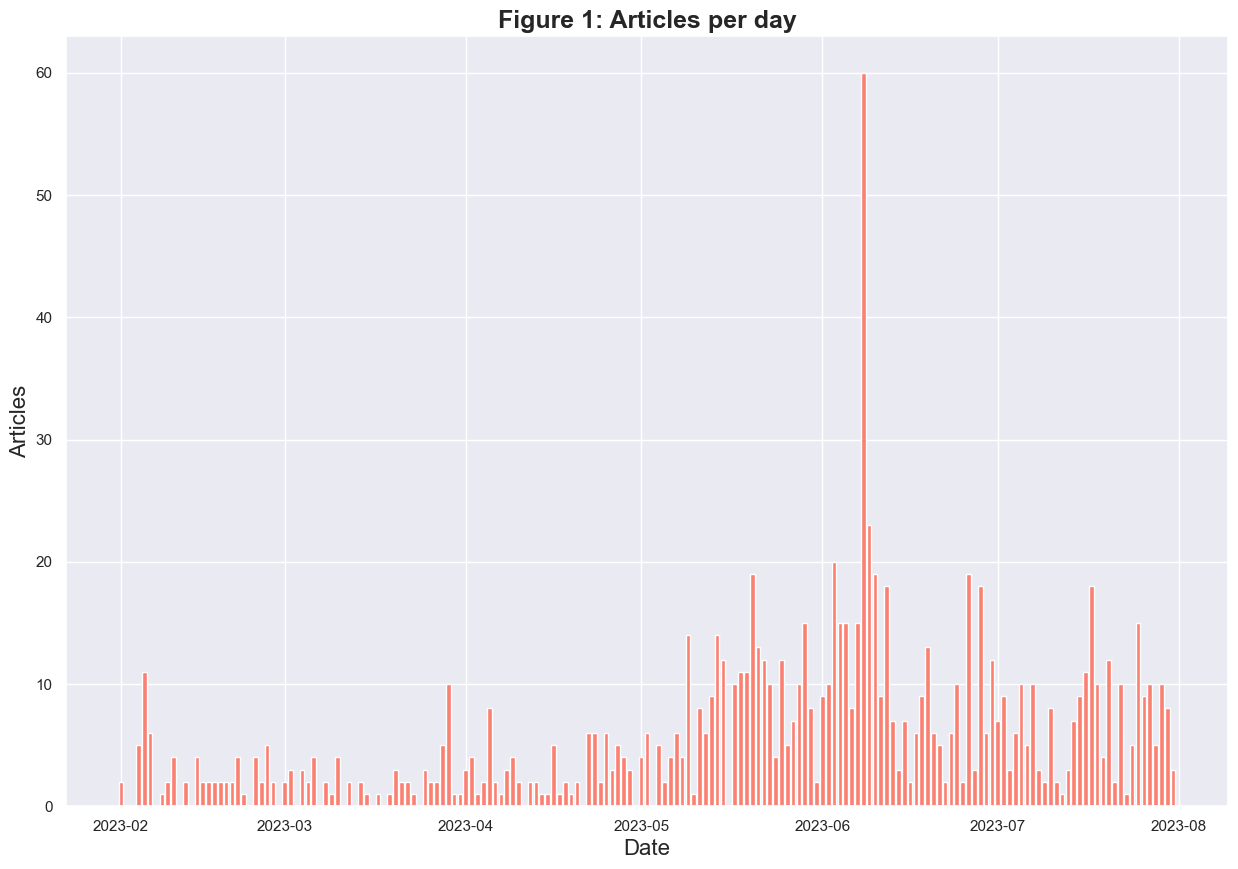

In [10]:
count=wildfire_df.groupby('extract_date').size()
count=pd.DataFrame(count)
count.rename(columns={0:'Articles'}, inplace=True)
count1=count.reset_index()
count1['Articles'].sum()

fig9, ax9 = plt.subplots(1, figsize=(15,10))
ax9.bar(count1['extract_date'], count1['Articles'], color='salmon')
ax9.set_title('Figure 1: Articles per day', fontsize=18, fontweight='bold')
ax9.set_xlabel('Date', fontsize=16)
ax9.set_ylabel('Articles', fontsize=16)
#plt.savefig("1_articles_per_day.png", bbox_inches='tight')

In [11]:
#We group the articles per day merging the data into one text file per day.
wildfire_df1=wildfire_df.groupby('extract_date', as_index=True).agg({'extract_date' : 'first', 'text' : ' '.join})

In [12]:
#making it to a csv file
wildfire_df1.to_csv('clean_wildfire.csv')

In [13]:
#Bag of words

# Load data
data = pd.read_csv('clean_wildfire.csv')

# Drop rows with NaN values in the 'text' column
data = data.dropna(subset=['text'])

# Sort the dataset by the time column
data = data.sort_values(by='extract_date')

# Calculate the index for splitting (2/3 for development, 1/3 for test)
split_index = int(len(data) * 2 / 3)

# Split the dataset
data_dev = data.iloc[:split_index]
data_test = data.iloc[split_index:]

# We split the development data to 1/2 training and 1/2 validation 
split_dev_index=int(len(data) * 1 / 2)

data_train = data_dev.iloc[:split_dev_index]
data_val=data_dev.iloc[split_dev_index:]

In [14]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'text' column for training data
X_train = vectorizer.fit_transform(data_train['text'])

# Transform the 'text' column for validation data
X_val = vectorizer.transform(data_val['text'])

# Transform the 'text' column for test data
X_test = vectorizer.transform(data_test['text'])

# Print the vocabulary (unique words) obtained from training data
print("Vocabulary size:", len(vectorizer.vocabulary_))
print("Sample words from vocabulary:", list(vectorizer.vocabulary_.keys())[:10])

Vocabulary size: 7266
Sample words from vocabulary: ['assistant', 'girl', 'basketball', 'coach', 'relieved', 'duty', 'impersonating', 'yearold', 'player', 'virginia']


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you've loaded and split your data as described

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'text' column for training data
X_train = vectorizer.fit_transform(data_train['text'])

# Get the vocabulary and its corresponding word frequencies
vocabulary = vectorizer.vocabulary_
word_frequencies = X_train.sum(axis=0)

# Create a list of tuples (word, frequency) and sort it by frequency
word_frequency_tuples = [(word, word_frequencies[0, idx]) for word, idx in vocabulary.items()]
word_frequency_tuples.sort(key=lambda x: x[1], reverse=True)

# Extract the top 100 most frequent words
top_100_words = [word for word, frequency in word_frequency_tuples[:100]]

print("Top 100 most frequent words:")
print(top_100_words)

Top 100 most frequent words:
['said', 'fire', 'wildfire', 'people', 'alberta', 'one', 'government', 'mr', 'home', 'day', 'year', 'area', 'air', 'time', 'also', 'may', 'new', 'map', 'city', 'building', 'two', 'data', 'would', 'recent', 'quality', 'official', 'show', 'reported', 'say', 'state', 'within', 'police', 'group', 'last', 'make', 'friday', 'first', 'agency', 'active', 'service', 'property', 'smoke', 'level', 'resident', 'canadian', 'like', 'market', 'community', 'week', 'report', 'tax', 'province', 'team', 'several', 'could', 'estimate', 'emergency', 'according', 'including', 'told', 'saturday', 'population', 'toronto', 'across', 'square', 'month', 'news', 'canada', 'company', 'sensor', 'public', 'department', 'derived', 'season', 'burning', 'condition', 'federal', 'many', 'get', 'dont', 'help', 'press', 'right', 'officer', 'evacuation', 'migrant', 'monday', 'come', 'still', 'work', 'number', 'nan', 'red', 'coach', 'system', 'safety', 'going', 'near', 'national', 'hour']


In [16]:
# Create a dictionary with words as keys and their corresponding counts as values
word_count_dict = {word: word_frequencies[0, idx] for word, idx in vocabulary.items()}

# Print the word count for each word in the top 100 most frequent words
for word in top_100_words:
    print(f"{word}: {word_count_dict.get(word, 0)}")

said: 835
fire: 812
wildfire: 223
people: 204
alberta: 202
one: 190
government: 188
mr: 187
home: 186
day: 181
year: 175
area: 172
air: 172
time: 166
also: 164
may: 158
new: 154
map: 145
city: 143
building: 137
two: 129
data: 126
would: 125
recent: 125
quality: 118
official: 114
show: 112
reported: 112
say: 108
state: 107
within: 105
police: 104
group: 104
last: 103
make: 99
friday: 96
first: 96
agency: 96
active: 96
service: 95
property: 94
smoke: 94
level: 92
resident: 91
canadian: 88
like: 87
market: 86
community: 86
week: 85
report: 85
tax: 83
province: 82
team: 81
several: 80
could: 80
estimate: 80
emergency: 80
according: 79
including: 79
told: 77
saturday: 76
population: 75
toronto: 73
across: 73
square: 73
month: 72
news: 72
canada: 72
company: 71
sensor: 71
public: 70
department: 70
derived: 70
season: 68
burning: 68
condition: 68
federal: 67
many: 67
get: 66
dont: 66
help: 66
press: 65
right: 65
officer: 64
evacuation: 64
migrant: 64
monday: 63
come: 63
still: 63
work: 63
num

In [42]:
#TFIDF SCORE 
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'text' column for training data
X_train_tfidf = tfidf_vectorizer.fit_transform(data_train['text'])

# Get the vocabulary and its corresponding word scores
vocabulary = tfidf_vectorizer.vocabulary_
word_scores = X_train_tfidf.sum(axis=0)

# Create a list of tuples (word, score) and sort it by score
word_score_tuples = [(word, word_scores[0, idx]) for word, idx in vocabulary.items()]
word_score_tuples.sort(key=lambda x: x[1], reverse=True)

# Extract the top 100 words with the highest TF-IDF scores
top_100_words_tfidf = [word for word, score in word_score_tuples[:100]]

print("Top 100 words with the highest TF-IDF scores:")
print(top_100_words_tfidf)

# Create a DataFrame for the top words and their TF-IDF scores
top_words_df = pd.DataFrame(word_score_tuples[:100], columns=['Word', 'TF-IDF Score'])

# Display the DataFrame
print(top_words_df)

Top 100 words with the highest TF-IDF scores:
['fire', 'said', 'map', 'nan', 'quality', 'air', 'data', 'wildfire', 'alberta', 'derived', 'square', 'sensor', 'reported', 'active', 'population', 'estimate', 'level', 'within', 'recent', 'people', 'area', 'day', 'building', 'mr', 'one', 'home', 'police', 'time', 'may', 'city', 'say', 'group', 'government', 'agency', 'year', 'service', 'national', 'also', 'environmental', 'two', 'smoke', 'sudan', 'show', 'property', 'new', 'make', 'reading', 'red', 'includes', 'account', 'several', 'using', 'adjusted', 'company', 'system', 'protection', 'burning', 'mile', 'official', 'database', 'boundary', 'hour', 'firm', 'radius', 'location', 'geospatial', 'approximate', 'satellitebased', 'detection', 'marked', 'indicate', 'reflected', 'exact', 'differ', 'meter', 'purpleair', 'colored', 'particulate', 'micron', 'rounded', 'landscan', 'oak', 'ridge', 'diameter', 'generated', 'nasa', 'shown', 'developed', 'count', 'calculated', 'laboratory', 'nighttime', 'o

In [36]:
#Creating the mask image
mask_image = np.array(Image.open('fire2.png'))

# Set white areas of the mask to 255 and black areas to 0
mask_image[mask_image == 255] = 255
mask_image[mask_image != 255] = 0

In [46]:
words_tfidf = ['fire', 'said', 'map', 'nan', 'quality', 'air', 'data', 'wildfire', 'alberta', 'derived', 'square', 'sensor', 'reported', 'active', 'population', 'estimate', 'level', 'within', 'recent', 'people', 'area', 'day', 'building', 'mr', 'one', 'home', 'police', 'time', 'may', 'city', 'say', 'group', 'government', 'agency', 'year', 'service', 'national', 'also', 'environmental', 'two', 'smoke', 'sudan', 'show', 'property', 'new', 'make', 'reading', 'red', 'includes', 'account', 'several', 'using', 'adjusted', 'company', 'system', 'protection', 'burning', 'mile', 'official', 'database', 'boundary', 'hour', 'firm', 'radius', 'location', 'geospatial', 'approximate', 'satellitebased', 'detection', 'marked', 'indicate', 'reflected', 'exact', 'differ', 'meter', 'purpleair', 'colored', 'particulate', 'micron', 'rounded', 'landscan', 'oak', 'ridge', 'diameter', 'generated', 'nasa', 'shown', 'developed', 'count', 'calculated', 'laboratory', 'nighttime', 'observation', 'detected', 'smaller', 'last', 'average', 'index', 'interagency', 'extent']
# Convert the list of words to a space-separated string
text = " ".join(words_tfidf)
# Generate a WordCloud object with the mask
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='red', contour_width=2, colormap='Reds', mask=mask_image).generate(text)

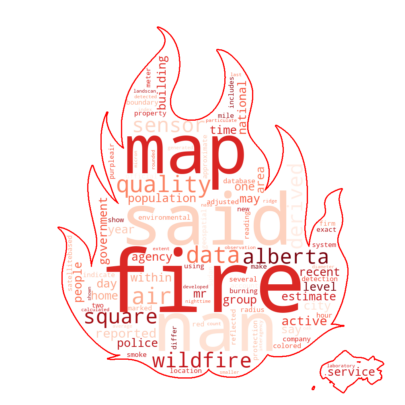

In [47]:
# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axes
plt.show()
